In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from scipy import stats
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Import The Data-Set

In [2]:
# import train data
train = pd.read_excel('capstone_train.xlsx')

# import test data
#test = pd.read_excel('capstone_test.xlsx')

 # Data Understanding

# Read the Dataset

In [3]:
#Show the first 10 row of train data set
train.head(10)

Loan_ID  Loan_Amount_Requested Length_Employed Home_Owner  \
0  10000001.0                 7000.0        < 1 year       Rent   
1  10000002.0                30000.0         4 years   Mortgage   
2  10000003.0                24725.0         7 years   Mortgage   
3  10000004.0                16000.0        < 1 year        NaN   
4  10000005.0                17000.0         8 years        Own   
5  10000006.0                 4500.0         2 years       Rent   
6  10000007.0                18075.0         4 years       Rent   
7  10000008.0                15000.0        < 1 year       Rent   
8  10000009.0                 6300.0       10+ years       Rent   
9  10000010.0                30000.0       10+ years        Own   

   Annual_Income           Income_Verified     Purpose_Of_Loan  \
0        68000.0              not verified                 car   
1            NaN         VERIFIED - income  debt_consolidation   
2        75566.4  VERIFIED - income source  debt_consolidation   
3        56160.0  VERIFIED - income source  debt_consolidation   
4        96000.0  VERIFIED - income source  debt_consolidation   
5        30000.0  VERIFIED - income source         credit_card   
6        85000.0         VERIFIED - income  debt_consolidation   
7       115000.0         VERIFIED - income  debt_consolidation   
8            NaN              not verified  debt_consolidation   
9       163000.0         VERIFIED - income  debt_consolidation   

   Debt_To_Income  Inquiries_Last_6Mo  Months_Since_Deliquency  \
0           18.37                 0.0                      NaN   
1           14.93                 0.0                     17.0   
2           15.88                 0.0                      NaN   
3           14.34                 3.0                      NaN   
4           22.17                 1.0                      NaN   
5           10.88                 1.0                      NaN   
6            5.65                 0.0                      NaN   
7            7.97                 1.0                     16.0   
8           16.12                 3.0                      NaN   
9           11.13                 0.0                      NaN   

   Number_Open_Accounts  Total_Accounts  Gender  Interest_Rate  
0                   9.0            14.0  Female            1.0  
1                  12.0            24.0  Female            3.0  
2                  12.0            16.0    Male            3.0  
3                  16.0            22.0    Male            3.0  
4                  19.0            30.0  Female            1.0  
5                  12.0            15.0    Male            3.0  
6                   9.0            12.0    Male            3.0  
7                  25.0            31.0  Female            2.0  
8                   8.0             9.0  Female            3.0  
9                  24.0            43.0    Male            1.0

# Size

In [4]:
r,c=train.shape
print("There are {} Row and {} Columns is the Data-set".format(r,c))

There are 164309 Row and 14 Columns is the Data-set


# Data-Type

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  float64
 1   Loan_Amount_Requested    164309 non-null  float64
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  float64
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  float64
 11  Total_Accounts           164309 non-null  float64
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  float64
dtypes: f

In [6]:
# The target variable 'Interest_Rate' has 'object' datatype, it is already in encoded form.
# The Inquiries_Last_6Mo has 'object' datatype we will change into object

In [7]:
train['Inquiries_Last_6Mo']=train['Inquiries_Last_6Mo'].astype('object')

In [8]:
cat=train.select_dtypes(include='object') 
num=train.select_dtypes(include=np.number)
print("There are {} category column".format(len(cat.columns)))
print("There are {} Numerical column".format(len(num.columns)))

There are 6 category column
There are 8 Numerical column


# Statistic

In [9]:
summary=train.describe()
five_summary=summary.loc[['min','25%','50%','75%','max']]
five_summary

Loan_ID  Loan_Amount_Requested  Annual_Income  Debt_To_Income  \
min  10000001.0                  500.0         4000.0            0.00   
25%  10041078.0                 8000.0        45000.0           11.37   
50%  10082155.0                12075.0        63000.0           16.84   
75%  10123232.0                20000.0        88697.5           22.78   
max  10164309.0                35000.0      7500000.0           39.99   

     Months_Since_Deliquency  Number_Open_Accounts  Total_Accounts  \
min                      0.0                   0.0             2.0   
25%                     16.0                   8.0            17.0   
50%                     31.0                  10.0            23.0   
75%                     50.0                  14.0            32.0   
max                    180.0                  76.0           156.0   

     Interest_Rate  
min            1.0  
25%            2.0  
50%            2.0  
75%            3.0  
max            3.0

In [10]:
train.describe().T

count          mean           std         min  \
Loan_ID                  164309.0  1.008216e+07  47432.067027  10000001.0   
Loan_Amount_Requested    164309.0  1.434934e+04   8281.868700       500.0   
Annual_Income            139207.0  7.333116e+04  60377.498294      4000.0   
Debt_To_Income           164309.0  1.720719e+01      7.845083         0.0   
Months_Since_Deliquency   75930.0  3.422936e+01     21.761180         0.0   
Number_Open_Accounts     164309.0  1.119382e+01      4.991813         0.0   
Total_Accounts           164309.0  2.506767e+01     11.583067         2.0   
Interest_Rate            164309.0  2.158951e+00      0.738364         1.0   

                                 25%          50%          75%          max  
Loan_ID                  10041078.00  10082155.00  10123232.00  10164309.00  
Loan_Amount_Requested        8000.00     12075.00     20000.00     35000.00  
Annual_Income               45000.00     63000.00     88697.50   7500000.00  
Debt_To_Income                 11.37        16.84        22.78        39.99  
Months_Since_Deliquency        16.00        31.00        50.00       180.00  
Number_Open_Accounts            8.00        10.00        14.00        76.00  
Total_Accounts                 17.00        23.00        32.00       156.00  
Interest_Rate                   2.00         2.00         3.00         3.00

In [11]:
#  transposed 5 point summary of the data.
#  here min. of loan ammount requested is 500  where maximum ammount requested is 35000 
# min of Annual income is 4000 where as maximum 7500000
# min of Debt_To_Income is 0 while max is 39.99
# min of Inquiries_Last_6Mo is 0 while max is 8
# min of Months_Since_Deliquency is 0 where as max 180.00
# min of Number_Open_Accounts of 0 where max 76
# min of Total_Accounts 2 where max 156.00
# min of Interest_Rate is 1.0 where max is 3.00 

In [12]:
for i in cat:
    counts = cat[i].value_counts()
    percentages = round((counts / len(cat)) * 100, 2)
    summary = pd.DataFrame({'counts': counts, 'percentages': percentages})
    print(i)
    print(summary)
    print()

Length_Employed
           counts  percentages
10+ years   52915        32.20
2 years     14620         8.90
3 years     12974         7.90
< 1 year    12805         7.79
5 years     10814         6.58
1 year      10422         6.34
4 years      9784         5.95
7 years      9308         5.66
6 years      9094         5.53
8 years      7917         4.82
9 years      6285         3.83

Home_Owner
          counts  percentages
Mortgage   70345        42.81
Rent       56031        34.10
Own        12525         7.62
Other         49         0.03
None          10         0.01

Income_Verified
                          counts  percentages
VERIFIED - income          59421        36.16
VERIFIED - income source   53015        32.27
not verified               51873        31.57

Purpose_Of_Loan
                    counts  percentages
debt_consolidation   97101        59.10
credit_card          36684        22.33
home_improvement      9269         5.64
other                 8346         5.08
ma

In [13]:
# They are 32%  employed are working more than 10+ years
# the moslty loan is toked for mortgage 42% and for the rent 34%

# Missing  Values

In [14]:
#sum of total missing values and sort to desending
Total = train.isnull().sum().sort_values(ascending=False)          
#total in percent of missing value
Percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)   
#create a Dataframe to show missing value sum and precent format 
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
Months_Since_Deliquency  88379                     53.788289
Home_Owner               25349                     15.427639
Annual_Income            25102                     15.277313
Length_Employed           7371                      4.486060
Loan_ID                      0                      0.000000
Loan_Amount_Requested        0                      0.000000
Income_Verified              0                      0.000000
Purpose_Of_Loan              0                      0.000000
Debt_To_Income               0                      0.000000
Inquiries_Last_6Mo           0                      0.000000
Number_Open_Accounts         0                      0.000000
Total_Accounts               0                      0.000000
Gender                       0                      0.000000
Interest_Rate                0                      0.000000

In [15]:
# Months_Since_Deliquency contain 53% of null values which is very high hence we need to treat all of them by significant approach
# Home_Owner contains 15% while Annual_Income 15% and Length_Employed is 4%

In [16]:
print("Total Missing Null in data-set is:",train.isnull().sum().sum()) 

Total Missing Null in data-set is: 146201


In [17]:
n=np.round(train.isnull().sum().sum()/(train.shape[0]*train.shape[1])*100,2) 
print(n,"% of Total Missing Value")

6.36 % of Total Missing Value


# Skewness

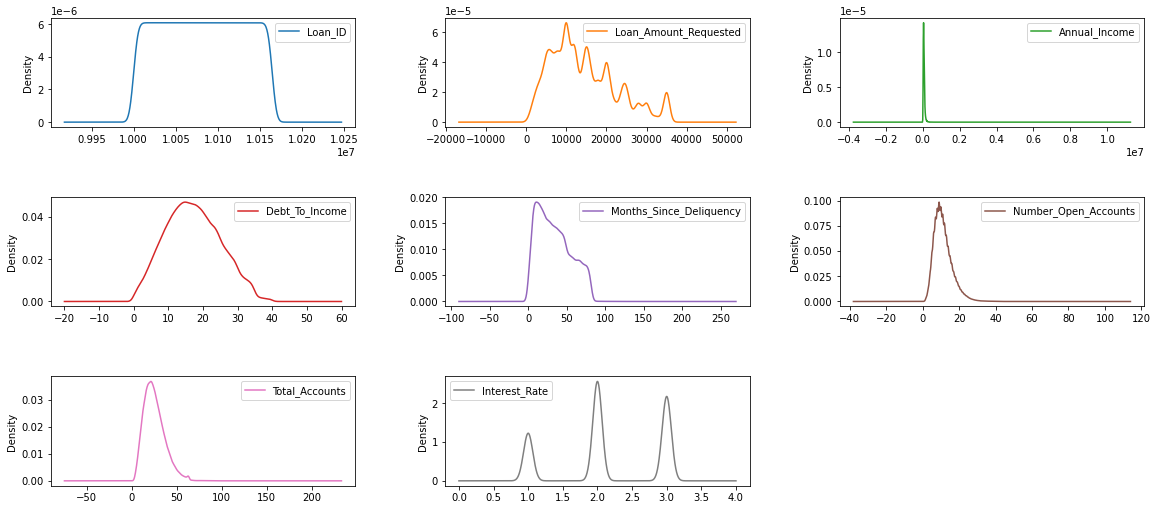

In [18]:
# Plot the skewness 
plt.rcParams["figure.figsize"] = [17,8]
df_num = train.select_dtypes(include = np.number )
df_num.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.tight_layout(pad = 4)
plt.show()

In [19]:
#Skewness values
original_skew=train.skew().sort_values(ascending=False)
original_skew

Annual_Income              40.225306
Inquiries_Last_6Mo          1.550867
Number_Open_Accounts        1.164084
Total_Accounts              0.817347
Loan_Amount_Requested       0.727216
Months_Since_Deliquency     0.460900
Debt_To_Income              0.192204
Loan_ID                     0.000000
Interest_Rate              -0.260932
dtype: float64

### inference - 
'Annual_Income' has a highly asymmetric distribution that is left-skewed. This means that the distribution has a longer tail towards the lower values and a majority of the observations are clustered towards the higher values.

'Inquiries_Last_6Mo' and 'Number_Open_Accounts' are also left-skewed. This implies that the distribution has a longer tail towards the lower values and a majority of the observations are clustered towards the higher values.

'Interest_Rate' and 'Loan_Amount_Requested' have a right-skewed distribution. This indicates that the distribution has a longer tail towards the higher values and a majority of the observations are clustered towards the lower values.

# Standard Deviation

In [20]:
original_std=train.std().sort_values(ascending=False)
original_std

Annual_Income              60377.498294
Loan_ID                    47432.067027
Loan_Amount_Requested       8281.868700
Months_Since_Deliquency       21.761180
Total_Accounts                11.583067
Debt_To_Income                 7.845083
Number_Open_Accounts           4.991813
Inquiries_Last_6Mo             1.034747
Interest_Rate                  0.738364
dtype: float64

# Mean

In [21]:
original_mean=train.mean().sort_values(ascending=False)
original_mean

Loan_ID                    1.008216e+07
Annual_Income              7.333116e+04
Loan_Amount_Requested      1.434934e+04
Months_Since_Deliquency    3.422936e+01
Total_Accounts             2.506767e+01
Debt_To_Income             1.720719e+01
Number_Open_Accounts       1.119382e+01
Interest_Rate              2.158951e+00
Inquiries_Last_6Mo         7.816979e-01
dtype: float64

# UNIVARIATE ANALYSIS for numerical variable

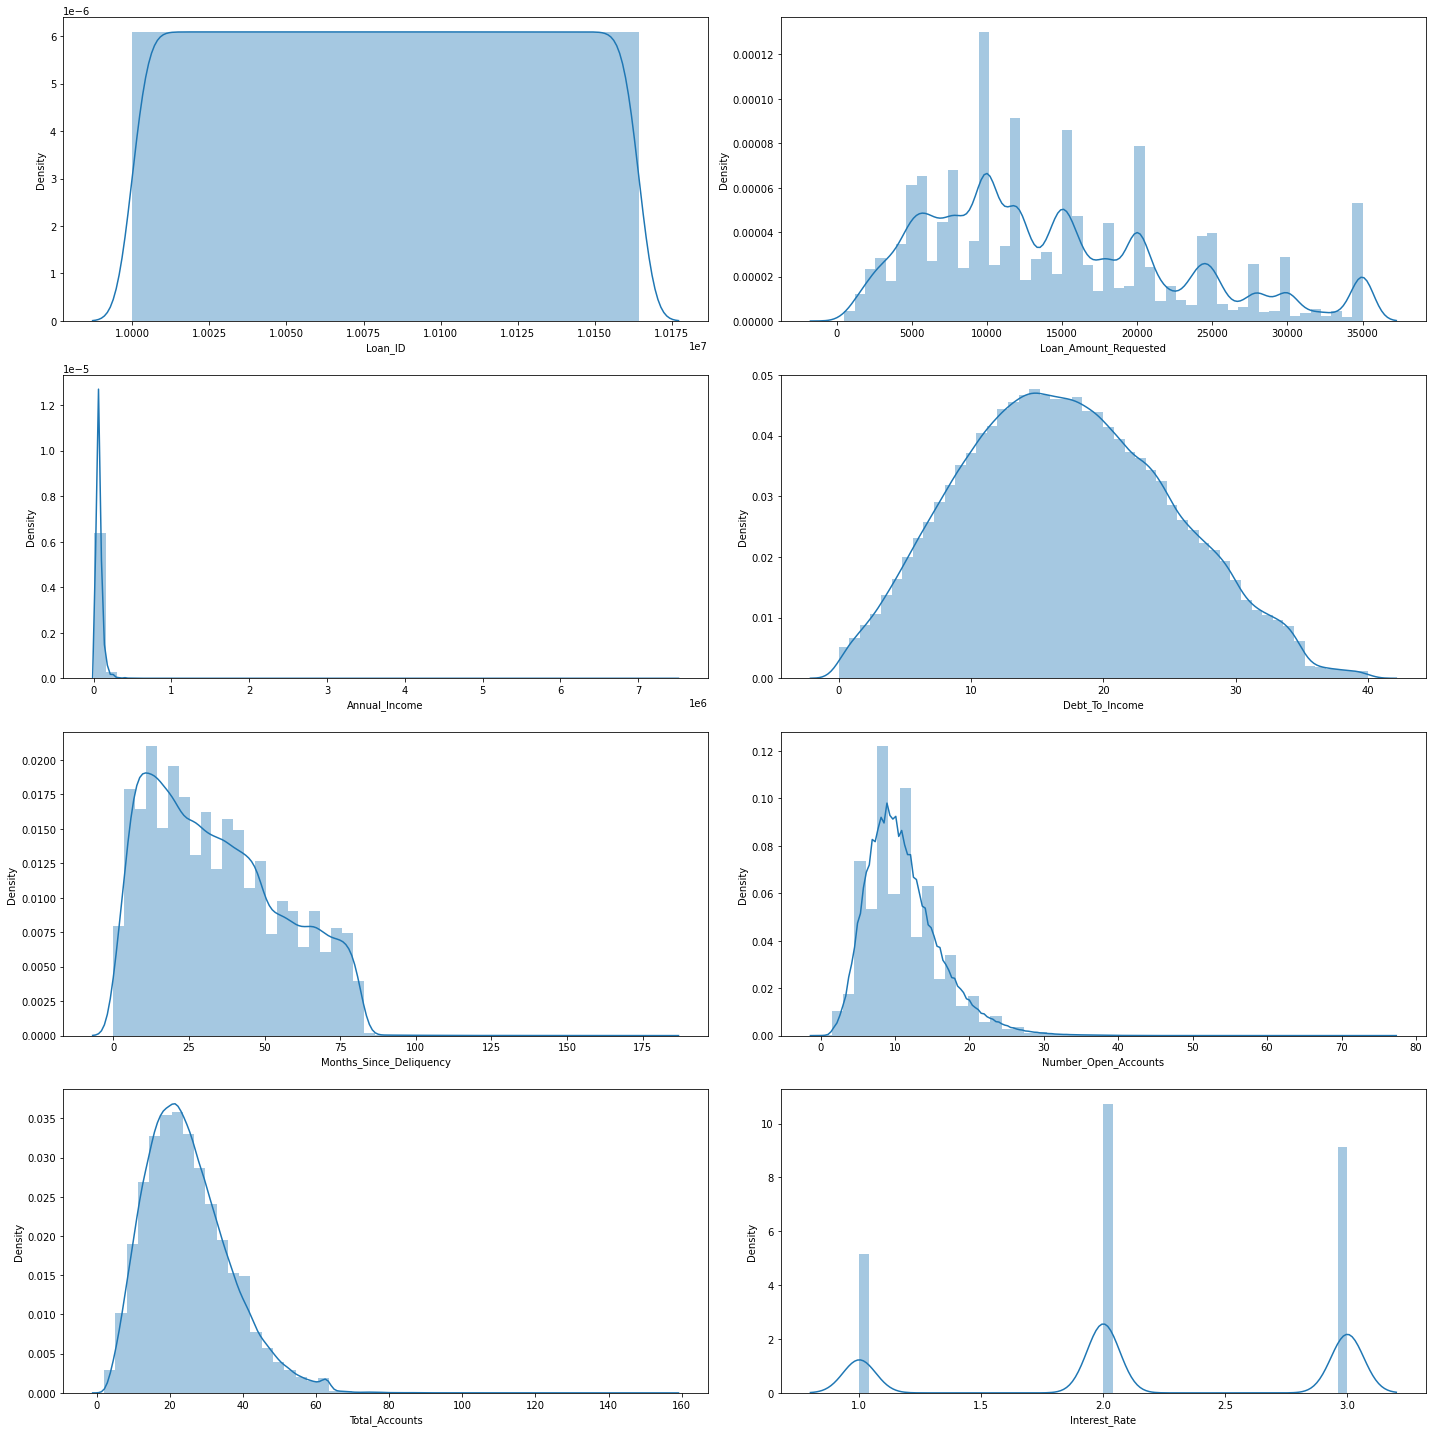

In [22]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
for i,a in zip(train.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.distplot(train[i],ax=a)
    plt.tight_layout()
    fig.show() 

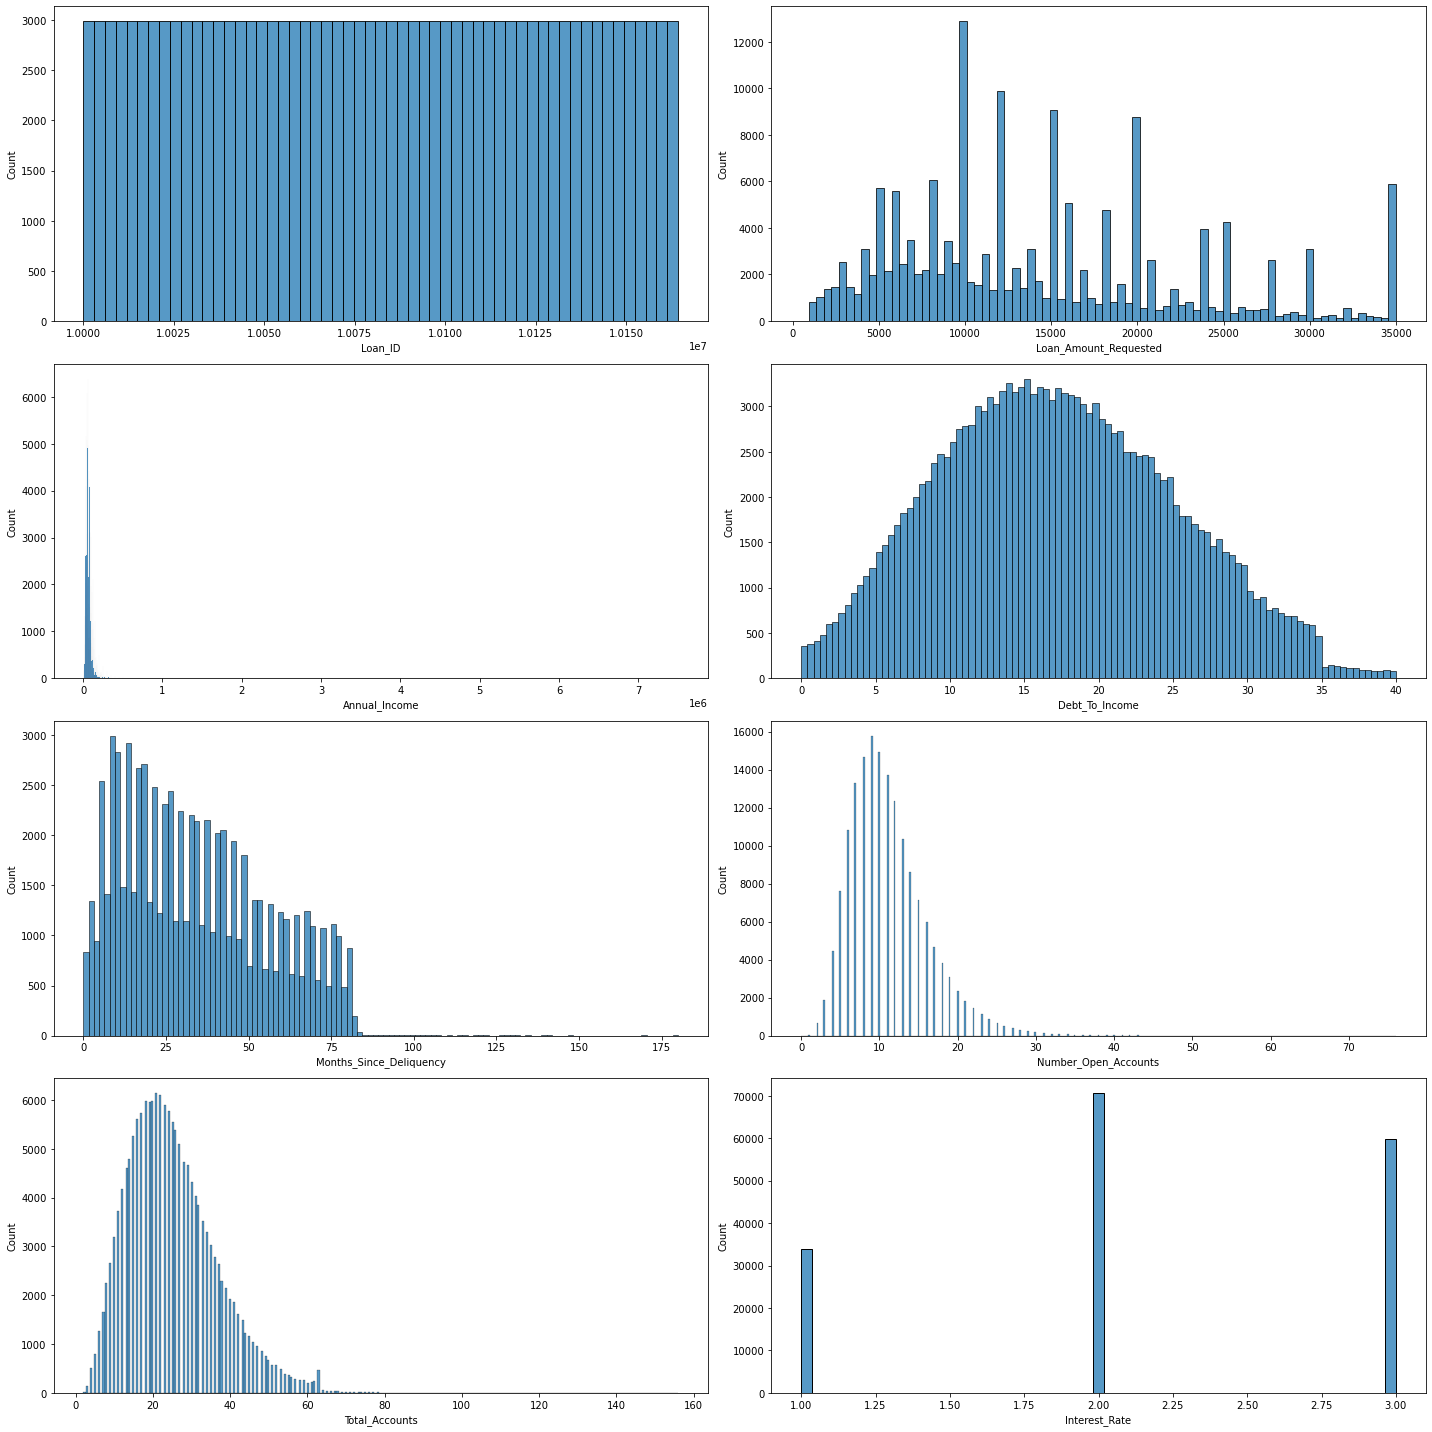

In [23]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
for i,a in zip(train.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.histplot(train[i],ax=a)
    plt.tight_layout()
    fig.show()

# UNIVARIATE ANALYSIS for categorical variable

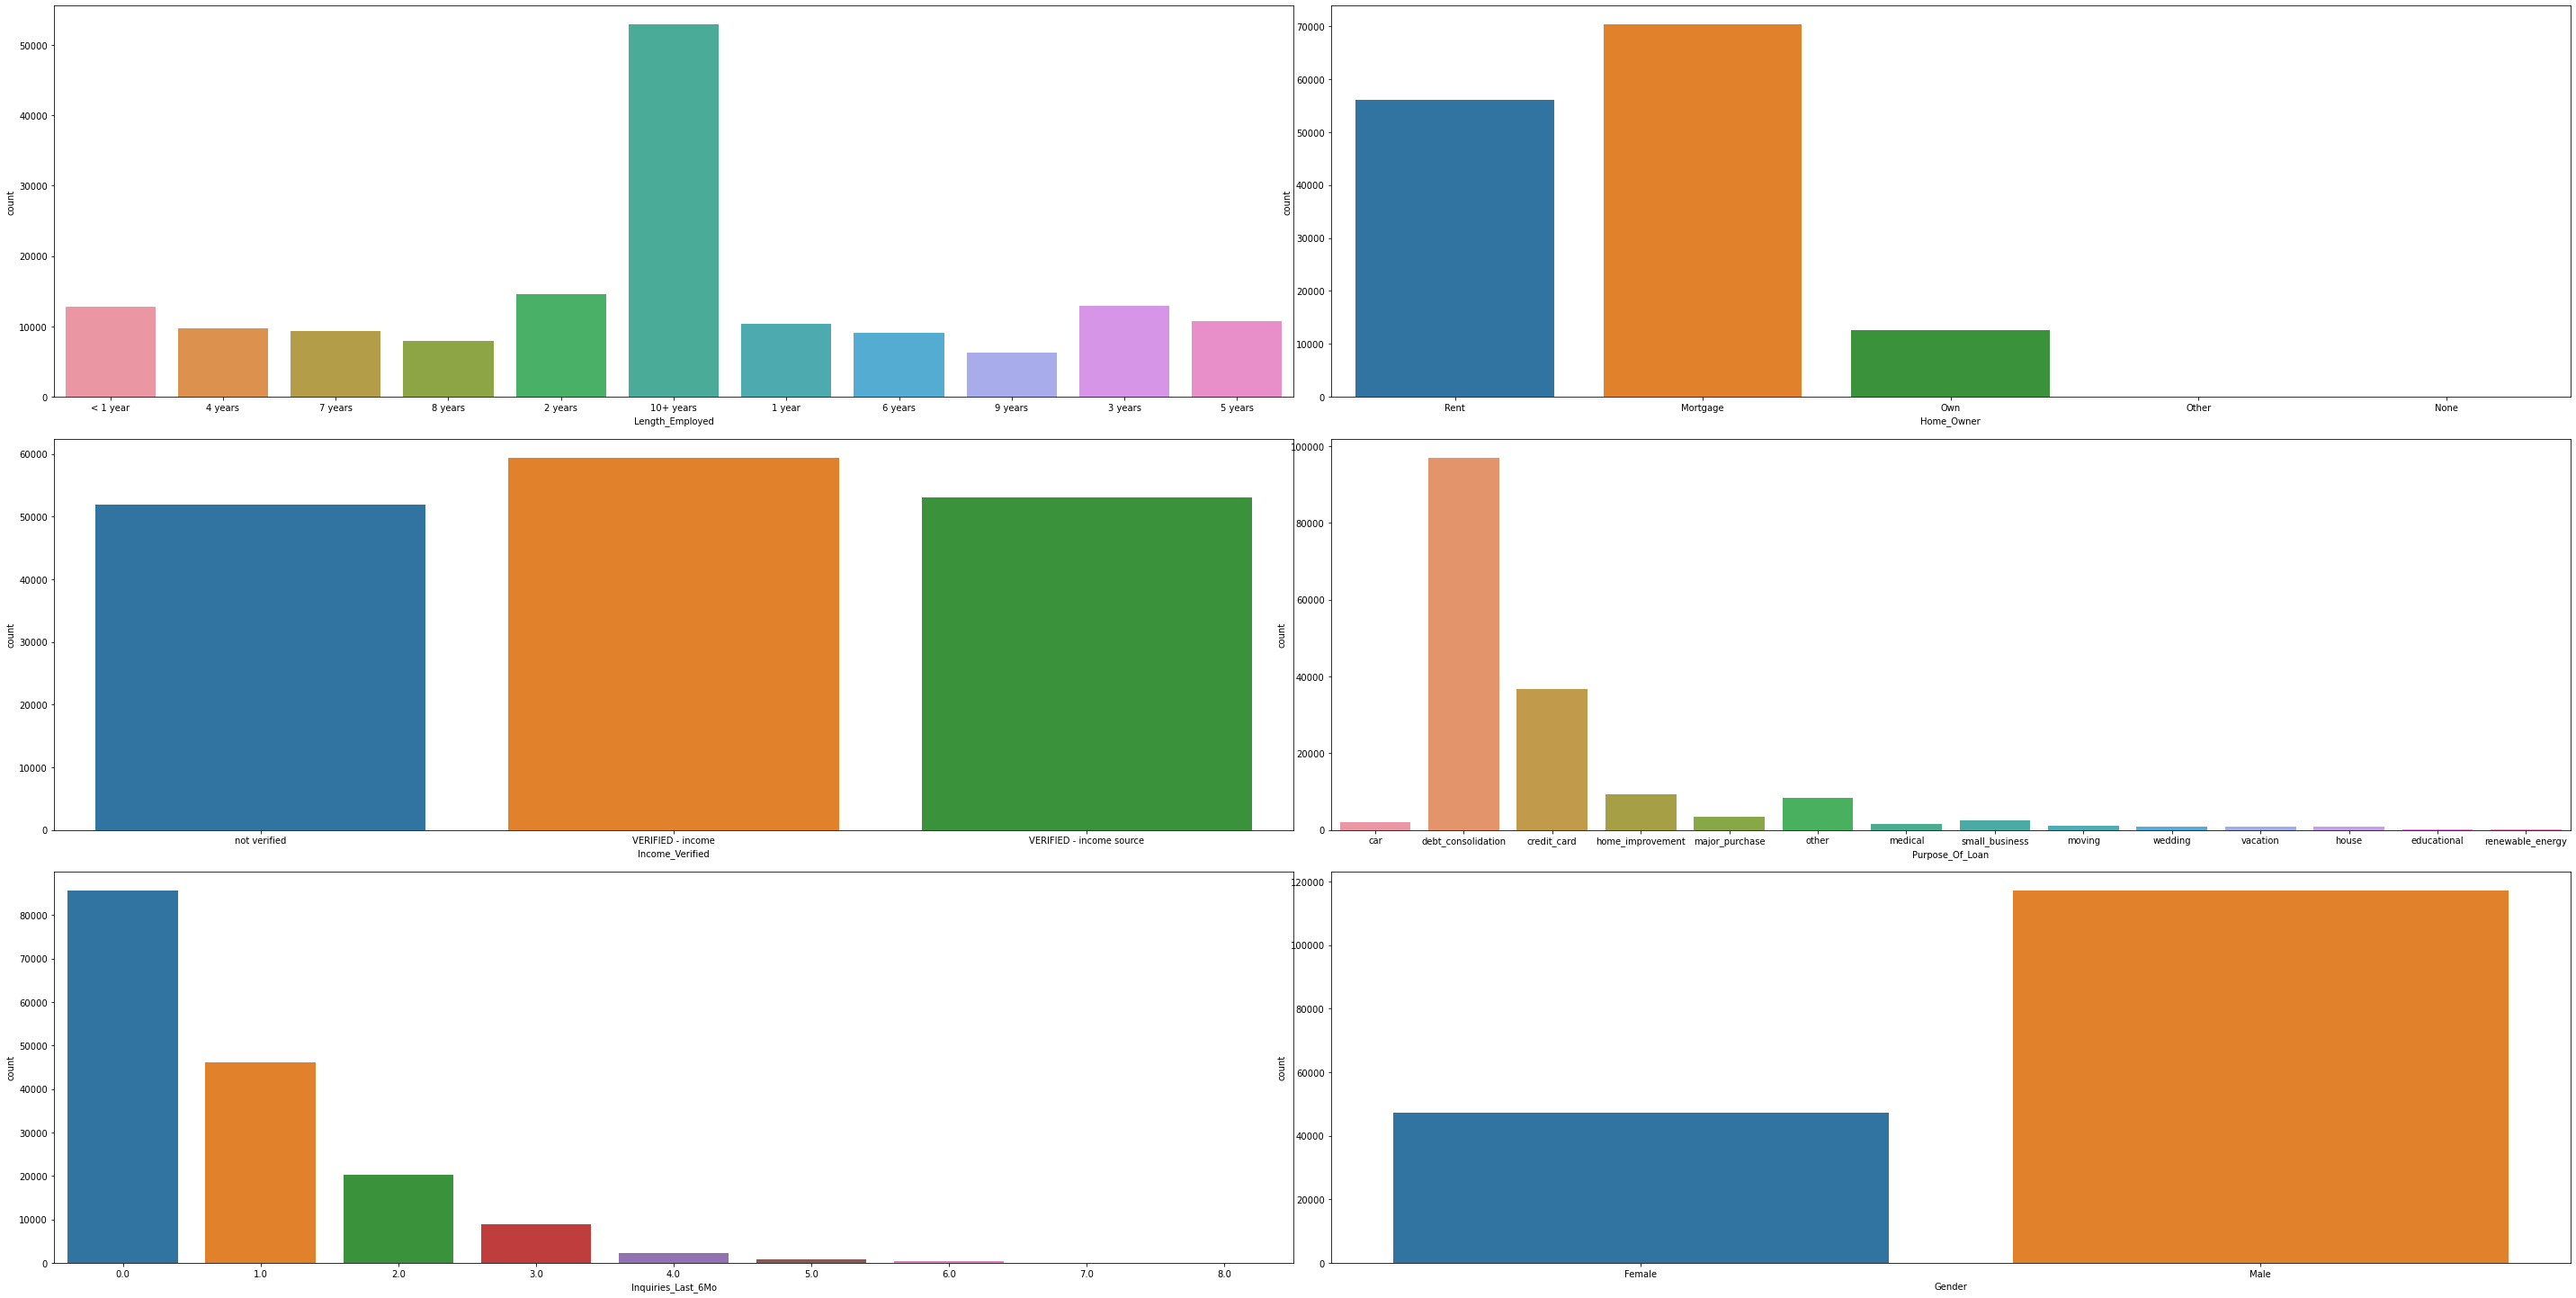

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

In [24]:
fig,ax=plt.subplots(3,2,figsize=(40,20))
for i,a in zip(train.select_dtypes(exclude=np.number).columns,ax.flatten()):
    sns.countplot(train[i],ax=a) 
    plt.tight_layout() 
    plt.figure() 

# Inference-

#Based on the information provided, we can infer the following:

#Among the different categories in 'Length_Employed', '10+ years' has the highest number of entries.

#Majority of the entries in 'Home_Owner' belong to the 'Mortgage' category.

#'VERIFIED - income' is the most common category in 'Income_Verified'.

#'Debt consolidation' is the most common category in 'Purpose_Of_Loan', followed by 'credit_card'.

#'Male' is the dominant gender class among the entries in the dataset.

#The dataset is divided into two parts, 'train' and 'test'. The 'train' part contains the data that will be used for training machine learning models, while the 'test' part contains the data that will be used for evaluating the performance of the models.

#These insights can be useful for feature engineering, exploratory data analysis, and modeling in the context of a loan prediction or credit scoring problem. For instance, knowing that debt consolidation and credit card are the most common loan purposes can help identify relevant features for prediction models. Similarly, knowing that males are the dominant gender class can help in identifying potential biases in the data and model evaluation.

# Bivariate analysis of numeric vaiable

<AxesSubplot:xlabel='Number_Open_Accounts', ylabel='Total_Accounts'>

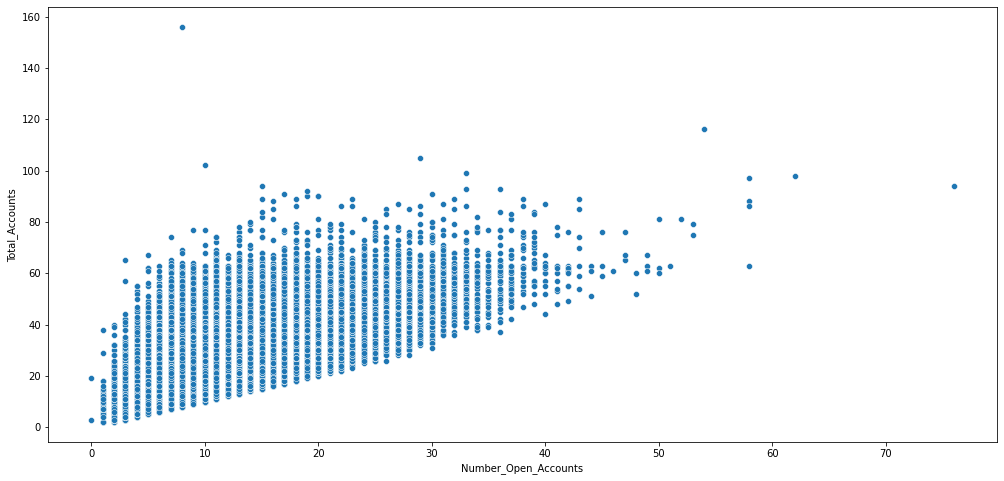

In [25]:
sns.scatterplot(train.Number_Open_Accounts,train.Total_Accounts)

### inference - 
 a positive correlation between 'Number_Open_Accounts' and 'Total_Accounts' indicates that as the number of open accounts increases, the total number of accounts also tends to increase. This correlation makes intuitive sense because the total number of accounts is simply the sum of all open and closed accounts. Therefore, if the number of open accounts increases, the total number of accounts is likely to increase as well.

# Bivariate analysis of Categorical vaiable

<AxesSubplot:xlabel='Length_Employed'>

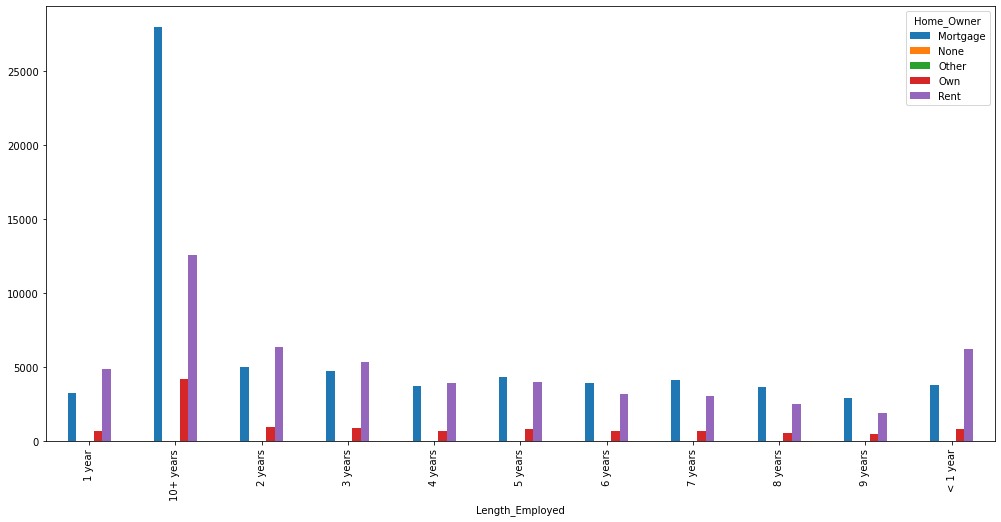

In [26]:
pd.crosstab(train.Length_Employed,train.Home_Owner).plot(kind='bar')

### inference - 
The category '10+ years' is the most common value in the 'Length_Employed' feature, indicating that a significant number of individuals in the dataset have been employed for more than 10 years.

Among the different categories in 'Home_Owner', 'Mortgage' has the highest share, indicating that a majority of individuals in the dataset own a mortgaged property.

The category '9 years' has the lowest value in the 'Length_Employed' feature, indicating that there are fewer individuals who have been employed for 9 years compared to the other categories.

<AxesSubplot:xlabel='Length_Employed'>

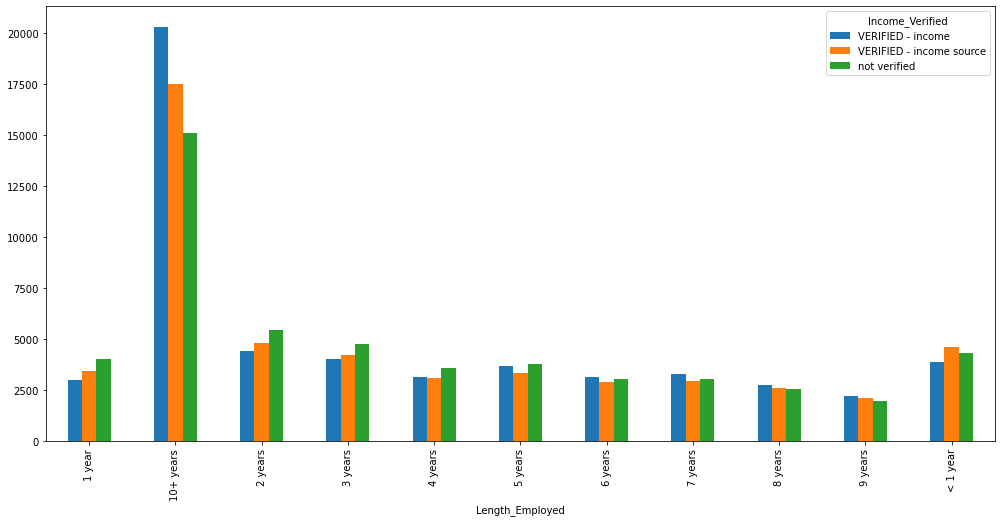

In [27]:
pd.crosstab(train.Length_Employed,train.Income_Verified).plot(kind='bar')

### inference - 
The category '10+ years' is the most common value in the 'Length_Employed' feature, indicating that a significant number of individuals in the dataset have been employed for more than 10 years.

Among the different categories in 'Income_Verified', 'VERIFIED - income' has the highest share, indicating that a majority of individuals in the dataset have their income verified.

The category '9 years' has the lowest value in the 'Length_Employed' feature, indicating that there are fewer individuals who have been employed for 9 years compared to the other categories.

<AxesSubplot:xlabel='Length_Employed'>

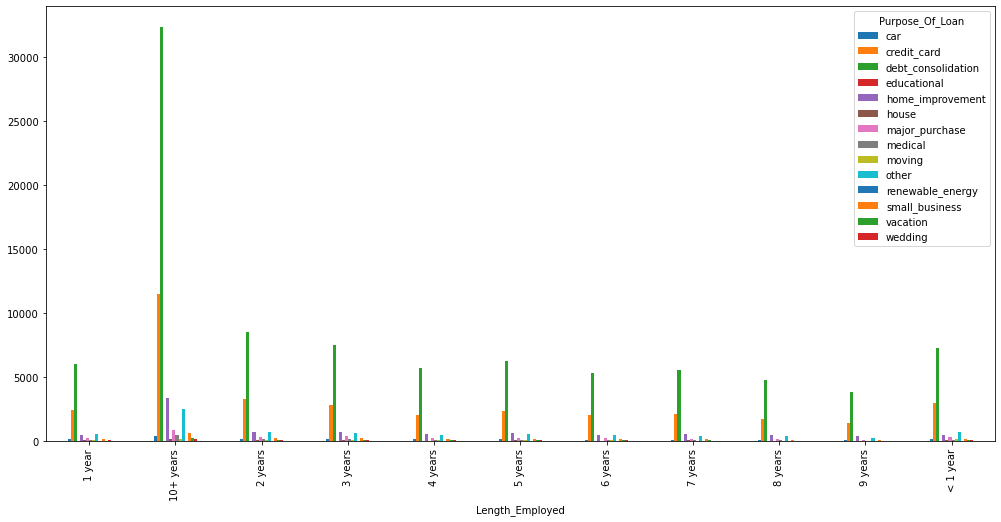

In [28]:
pd.crosstab(train.Length_Employed,train.Purpose_Of_Loan).plot(kind='bar')

### inference - 
10+ years dominating length employed where debt_consolidation has majority where 9 years has lowest value

<AxesSubplot:xlabel='Length_Employed'>

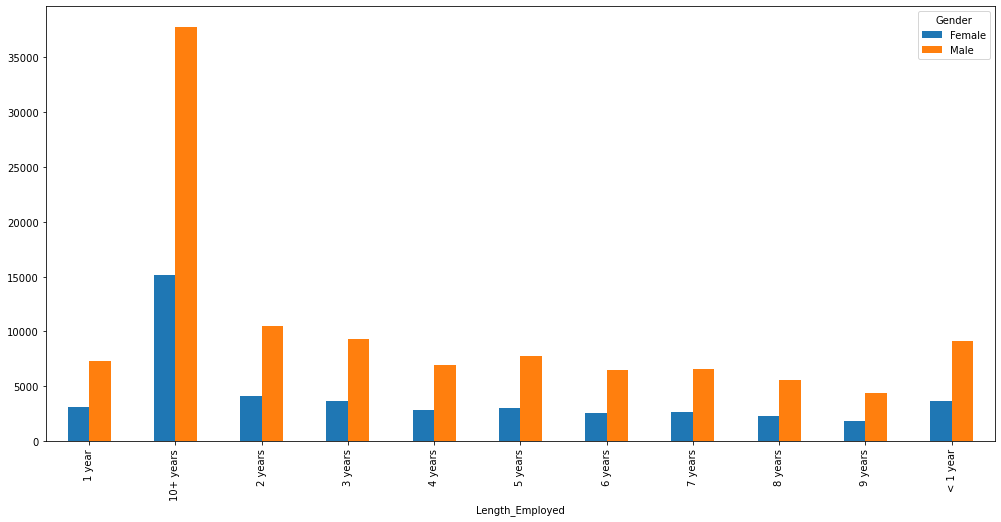

In [29]:
pd.crosstab(train.Length_Employed,train.Gender).plot(kind='bar')

### inference - 
here 10+ years of experiance clearly dominating class and males are majority in that class 9 years has lowest value 

# Bivariate Analysis

<AxesSubplot:xlabel='Length_Employed'>

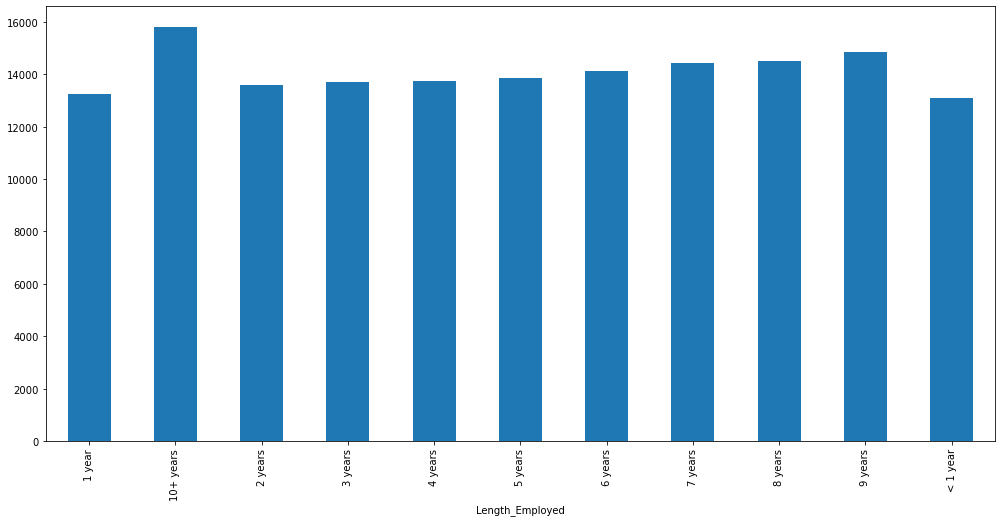

In [30]:
train.groupby('Length_Employed')['Loan_Amount_Requested'].mean().plot(kind='bar')

### inference - 
This indicates that individuals who have been employed for more than 10 years tend to request higher loan amounts compared to other employment categories.

The category '9 years' has the second-highest average value of loan amount requested, which is higher than the values for most other employment categories.

The category '< 1 year' has the lowest average value of loan amount requested, which is $12,500. This indicates that individuals who have been employed for less than a year tend to request lower loan amounts compared to other employment categories.

<AxesSubplot:xlabel='Length_Employed'>

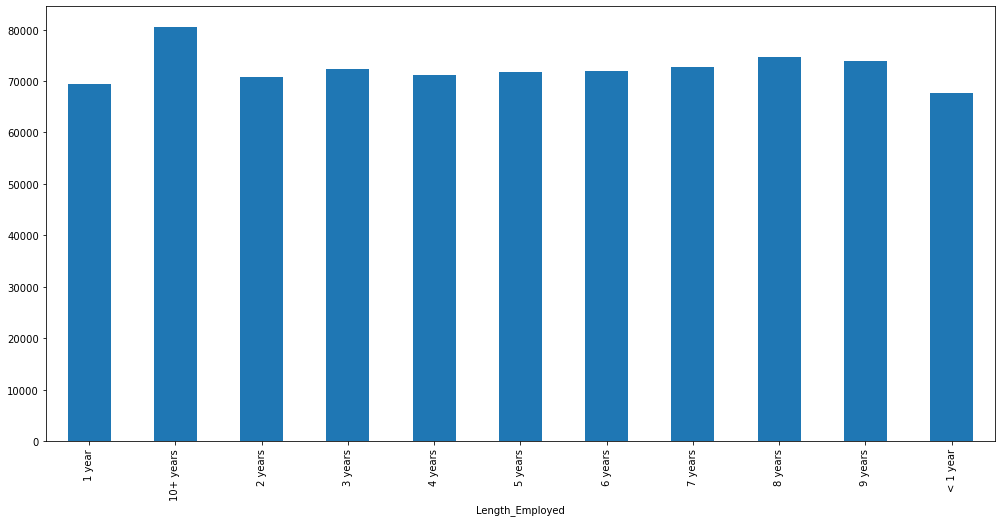

In [31]:
train.groupby('Length_Employed')['Annual_Income'].mean().plot(kind='bar')

The category '10+ years' has the highest average annual income, which is $8000. This indicates that individuals who have been employed for more than 10 years tend to have higher annual incomes compared to other employment categories.

The categories '8 years' and '9 years' have the second-highest average annual income values, indicating that individuals who have been employed for these durations tend to have relatively high annual incomes.

The category '< 1 year' has the lowest average annual income value, which is $6800. This indicates that individuals who have been employed for less than a year tend to have lower annual incomes compared to other employment categories.

<AxesSubplot:xlabel='Income_Verified'>

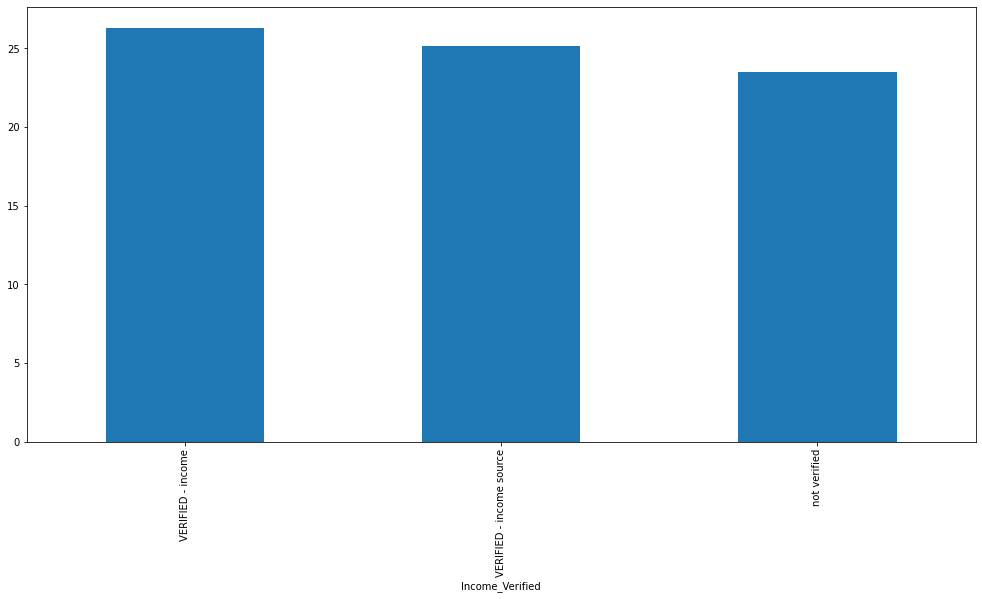

In [32]:
train.groupby('Income_Verified')['Total_Accounts'].mean().plot(kind='bar')

The category 'Verified - income' has the highest average total accounts value, which is 25. This indicates that individuals who have their income verified tend to have more total accounts compared to other income verification categories.

The category 'Verified - income source' has the second-highest average total accounts value, which is 23. This indicates that individuals who have their income and its source verified tend to have relatively high total accounts.

The category 'Not Verified' has the lowest average total accounts value, which is 22. This indicates that individuals who have not had their income verified tend to have fewer total accounts compared to other income verification categories.

<AxesSubplot:xlabel='Income_Verified'>

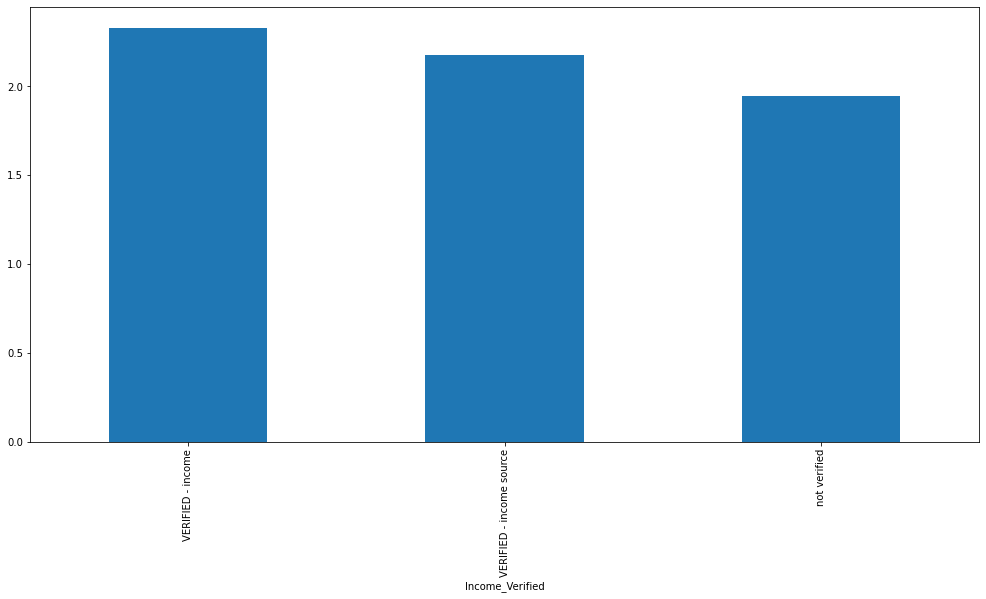

In [33]:
train.groupby('Income_Verified')['Interest_Rate'].mean().plot(kind='bar')

### inference - 
The category 'Verified - income' is the dominating class in the 'Income_Verified' feature. This indicates that a large number of loan applicants have their income verified.

The category 'Verified - income source' is the second-most frequent class in the 'Income_Verified' feature. This indicates that a significant number of loan applicants have both their income and its source verified.

The category 'Not Verified' is the least frequent class in the 'Income_Verified' feature. This indicates that a small number of loan applicants do not have their income verified.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

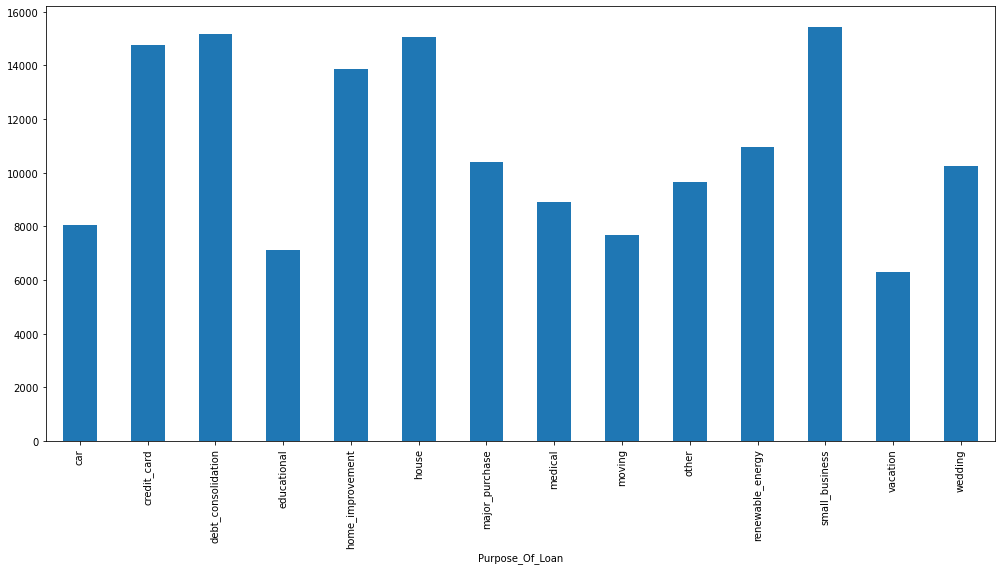

In [34]:
train.groupby('Purpose_Of_Loan')['Loan_Amount_Requested'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Purpose_Of_Loan'>

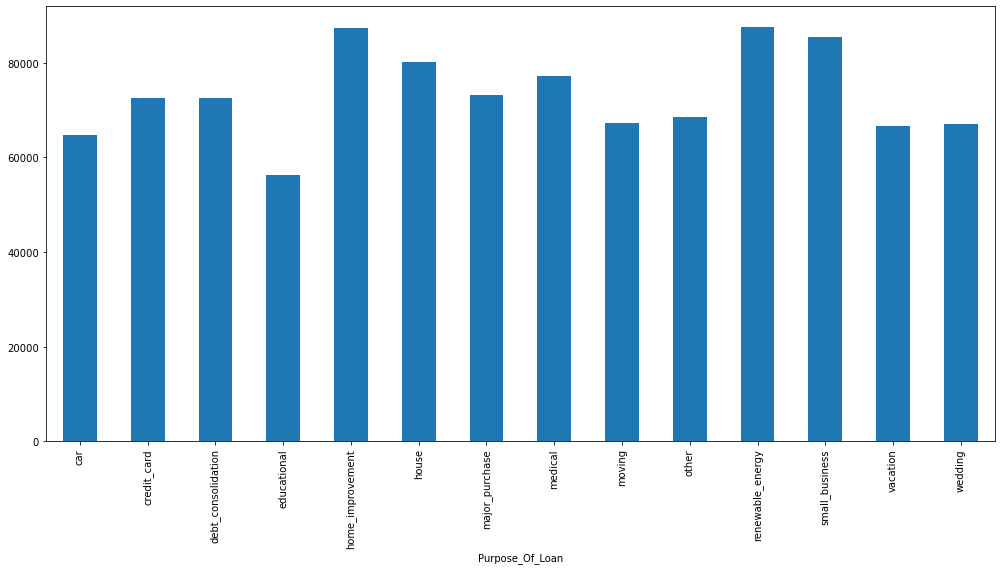

In [35]:
train.groupby('Purpose_Of_Loan')['Annual_Income'].mean().plot(kind='bar')

### inference - 
The category 'Debt Consolidation' is the dominating purpose of loan in the dataset. This indicates that a large number of loan applicants applied for a loan to consolidate their existing debts.

The category 'Credit Card' is the second-most frequent purpose of loan in the dataset. This indicates that a significant number of loan applicants applied for a loan to pay off their credit card debt.

The remaining categories such as 'Home Improvement', 'Major Purchase', 'Medical', etc. have relatively lower frequencies compared to 'Debt Consolidation' and 'Credit Card'.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

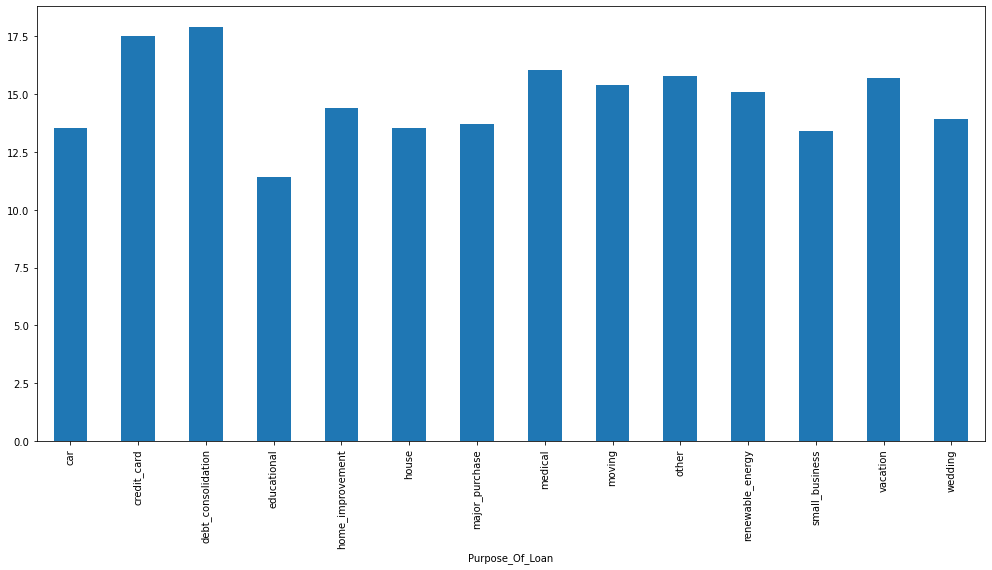

In [36]:
train.groupby('Purpose_Of_Loan')['Debt_To_Income'].mean().plot(kind='bar')

### inference - 
The category 'Debt Consolidation' has the highest debt-to-income ratio in the dataset. This indicates that loan applicants who applied for a loan for debt consolidation purposes have a higher ratio of debt compared to their income.

The category 'Credit Card' has the second-highest debt-to-income ratio in the dataset. This indicates that loan applicants who applied for a loan to pay off their credit card debt have a relatively high ratio of debt compared to their income.

The category 'Wedding' has the least debt-to-income ratio in the dataset. This indicates that loan applicants who applied for a loan for wedding purposes have a relatively low ratio of debt compared to their income.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

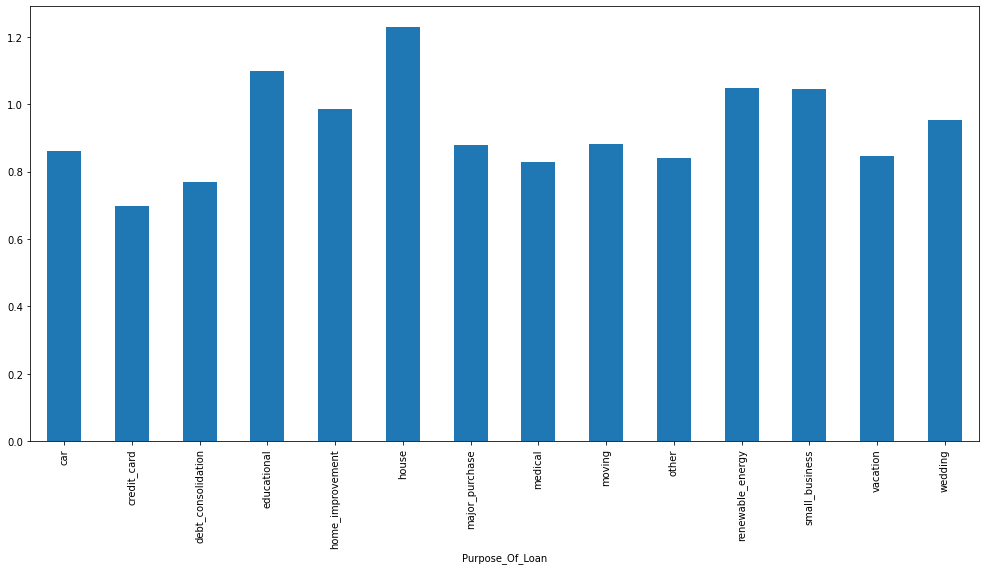

In [37]:
train.groupby('Purpose_Of_Loan')['Inquiries_Last_6Mo'].mean().plot(kind='bar')

### inference - 
The category 'Debt Consolidation' has the highest number of inquiries in the dataset. This suggests that loan applicants who applied for a loan for debt consolidation purposes are more likely to have their credit scores pulled by lenders or financial institutions.

The category 'Credit Card' has the second-highest number of inquiries in the dataset. This suggests that loan applicants who applied for a loan to pay off their credit card debt are also likely to have their credit scores pulled by lenders or financial institutions.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

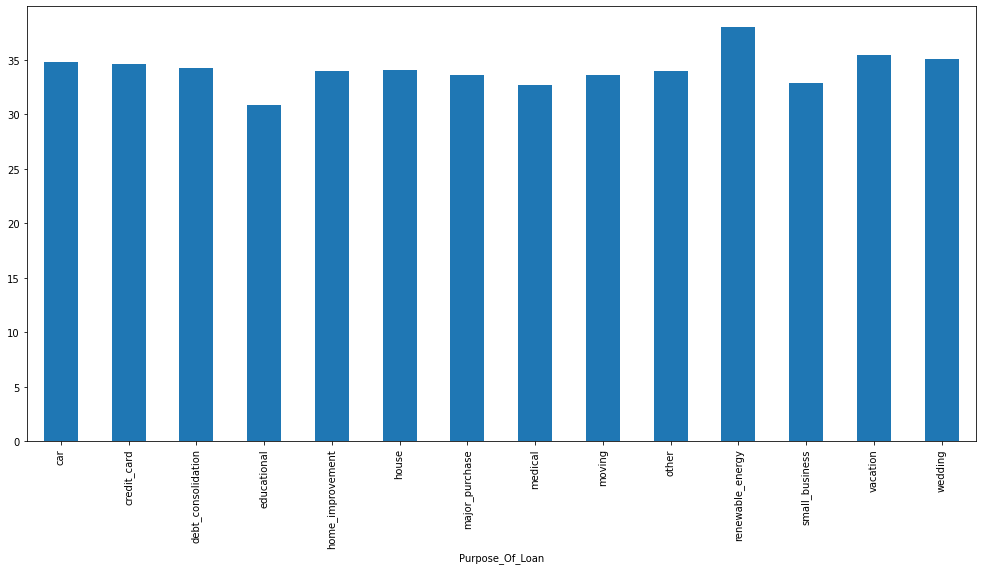

In [38]:
train.groupby('Purpose_Of_Loan')['Months_Since_Deliquency'].mean().plot(kind='bar')

### inference - 
The categories 'Debt Consolidation' and 'Credit Card' have the highest delinquency rates in the dataset. This suggests that borrowers who applied for loans for debt consolidation or credit card purposes are more likely to default on their loans than borrowers who applied for loans for other purposes.

Delinquency can have a negative impact on a borrower's credit score and can lead to late fees, penalties, and even legal action in some cases. Therefore, lenders may be more cautious when approving loans to borrowers who have a history of delinquency.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

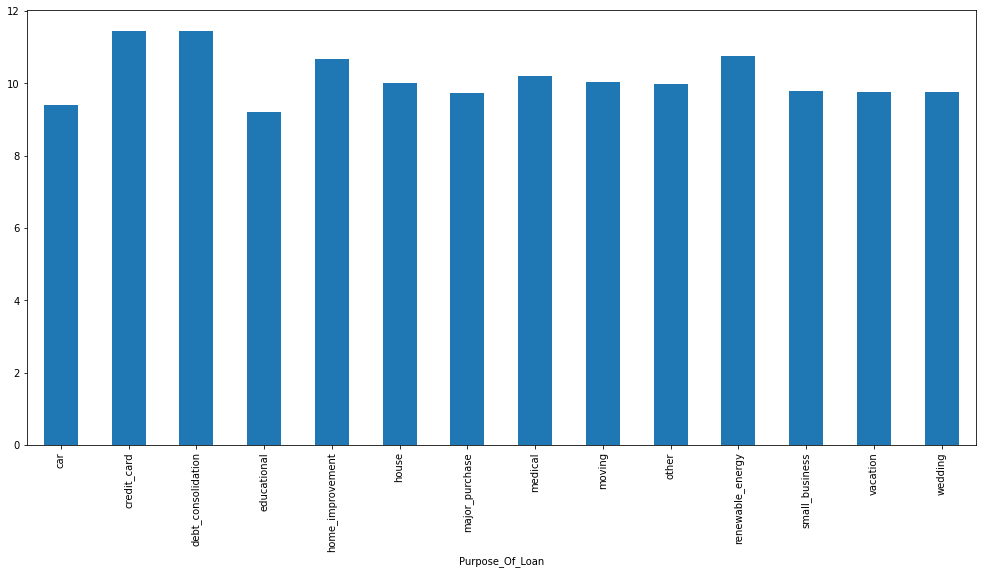

In [39]:
train.groupby('Purpose_Of_Loan')['Number_Open_Accounts'].mean().plot(kind='bar')

### inference - 
The loan purpose category 'Debt Consolidation' is the most common reason for borrowers to open new accounts. This suggests that many borrowers who apply for loans to consolidate their debts are likely to have multiple debts from various sources and are seeking a single loan to simplify their payments.

The number of open accounts can be an important factor in determining a borrower's creditworthiness, as it reflects their ability to manage credit responsibly and make timely payments. Therefore, lenders may take the number of open accounts into account when making loan approval decisions.

However, it is important to note that while 'Debt Consolidation' is the most common loan purpose for opening new accounts, it may not necessarily be the only reason. Borrowers may also open new accounts for other reasons such as home improvement, medical expenses, or education.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

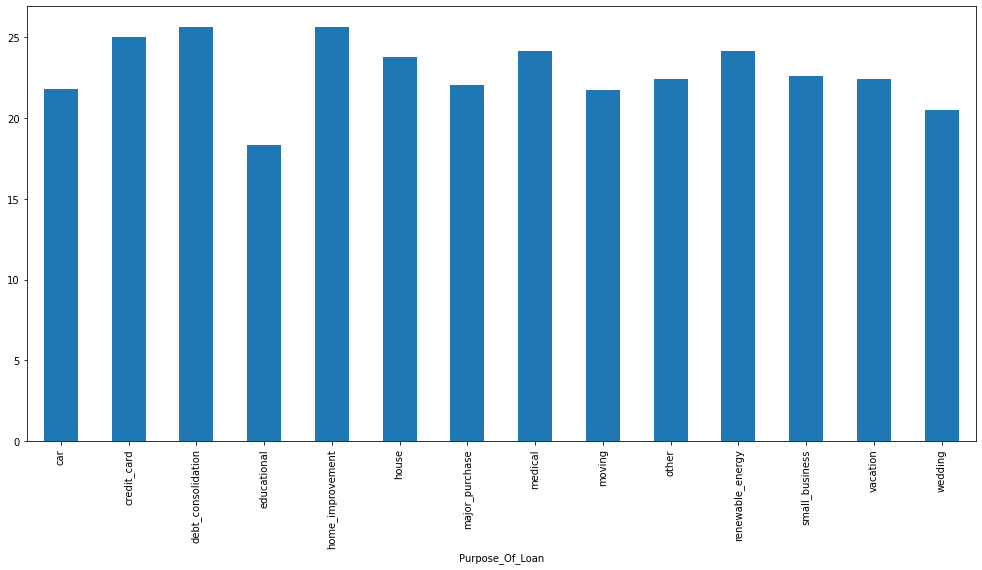

In [40]:
train.groupby('Purpose_Of_Loan')['Total_Accounts'].mean().plot(kind='bar')

### inference - 
 debt consolidation is the main purpose of loan for borrowers who have the most total accounts. This suggests that borrowers who have multiple accounts and are seeking to consolidate their debts may have a higher likelihood of having more debt than borrowers with fewer accounts.

Lenders may take this information into account when assessing a borrower's creditworthiness, as having a high amount of debt and multiple accounts may indicate a higher risk of default. It may also indicate that the borrower is seeking to consolidate their debts to improve their financial situation and make payments more manageable.

<AxesSubplot:xlabel='Purpose_Of_Loan'>

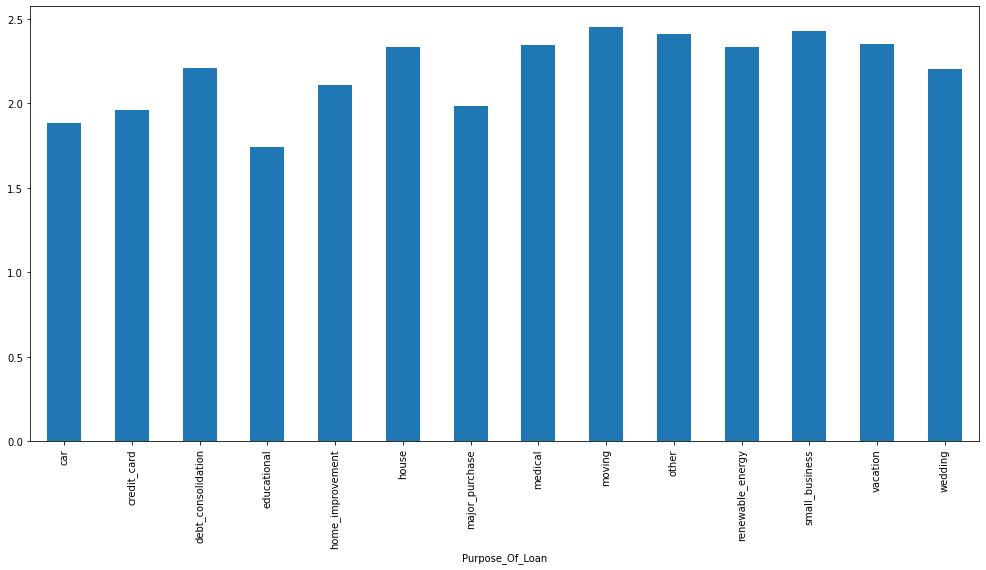

In [41]:
train.groupby('Purpose_Of_Loan')['Interest_Rate'].mean().plot(kind='bar')

### inference - 
debt consolidation is the dominant purpose of loan, followed by credit card, while wedding, car, and house are the least common loan purposes. Additionally, we know that debt consolidation has a high interest rate.

This information may suggest that borrowers who are seeking debt consolidation loans may be more likely to have higher interest rates due to the higher risk associated with consolidating multiple debts into one payment. Credit card loans may also carry a higher interest rate due to their unsecured nature and higher risk of default. Conversely, wedding, car, and house loans may have lower interest rates due to their secured nature and lower risk of default.

Lenders may consider the purpose of the loan when assessing the risk associated with a borrower's application and determining the interest rate they offer. It is important to note, however, that lenders should also consider other factors such as credit score, income, and debt-to-income ratio when making informed loan approval decisions.

<AxesSubplot:xlabel='Gender'>

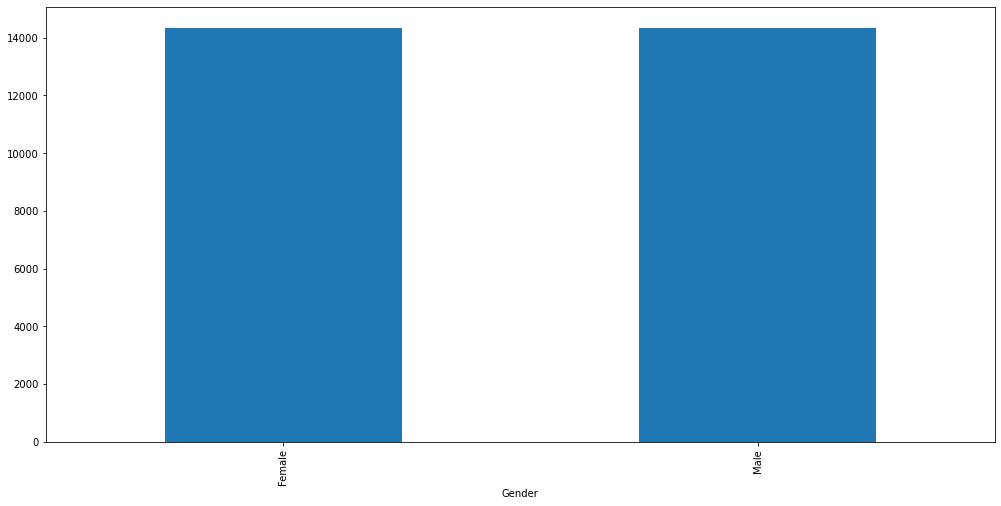

In [42]:
train.groupby('Gender')['Loan_Amount_Requested'].mean().plot(kind='bar')

### inference - 
males requested a higher loan amount compared to females. However, we cannot conclude that this difference is statistically significant without further analysis.

Gender may be one factor that lenders consider when assessing the risk associated with a borrower's application and determining the loan amount they offer. However, it is important to note that lenders should not base loan approval decisions solely on gender.

Lenders should consider other factors such as credit score, income, and debt-to-income ratio when making informed loan approval decisions. By using a data-driven approach to lending, lenders can help ensure that they are making fair and unbiased decisions while minimizing the risk of default.

<AxesSubplot:xlabel='Gender'>

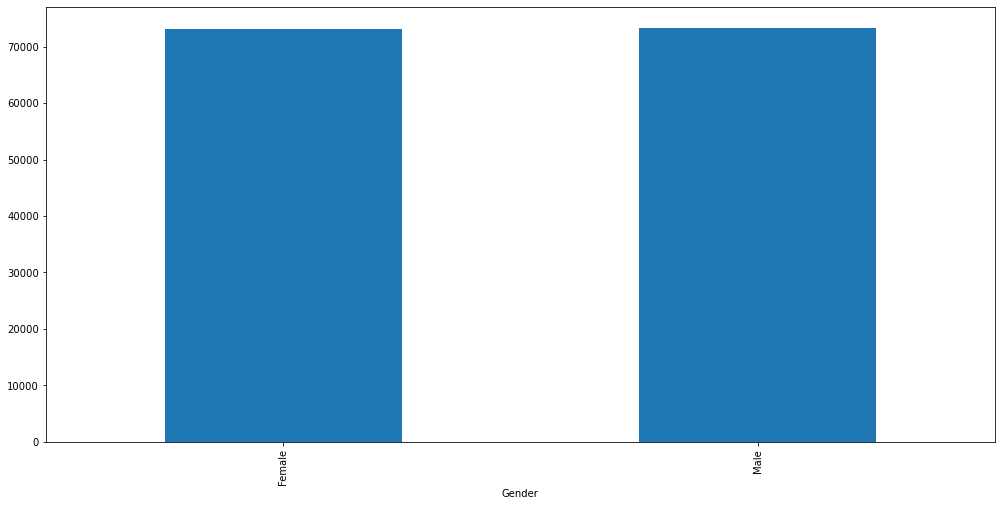

In [43]:
train.groupby('Gender')['Annual_Income'].mean().plot(kind='bar')

### inference - 
males have a higher average annual income compared to females. However, we cannot conclude that this difference is statistically significant without further analysis.
In the context of lending, income is a critical factor that lenders consider when assessing the creditworthiness of a borrower. However, lenders should not discriminate based on gender and should use a data-driven approach to evaluate loan applications based on objective criteria. By doing so, lenders can help promote fairness and equal opportunities for all borrowers.

<AxesSubplot:xlabel='Gender'>

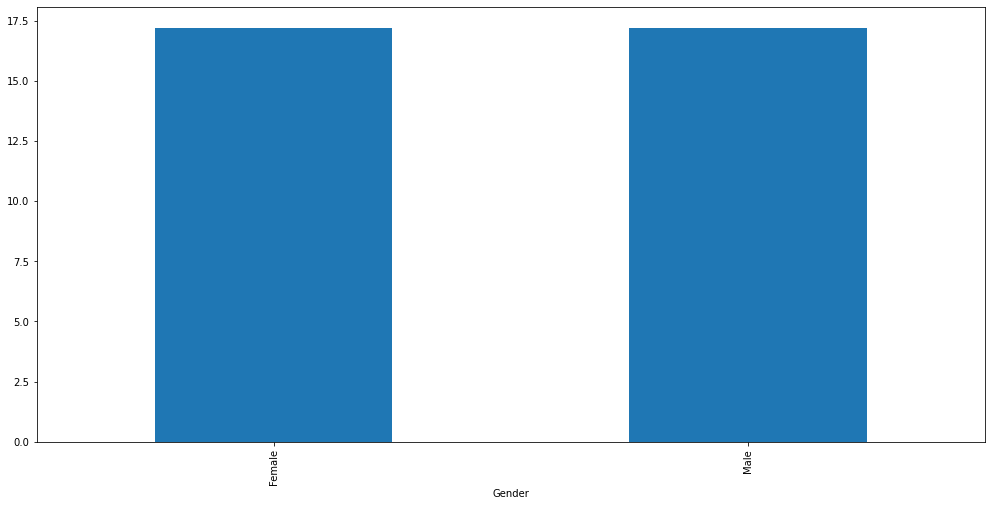

In [44]:
train.groupby('Gender')['Debt_To_Income'].mean().plot(kind='bar')

### inference - 
males have more debt to income.Debt to income ratio is a key factor that lenders use to evaluate creditworthiness of borrowers. A high debt to income ratio indicates that a borrower may have difficulty repaying their debts.

<AxesSubplot:xlabel='Gender'>

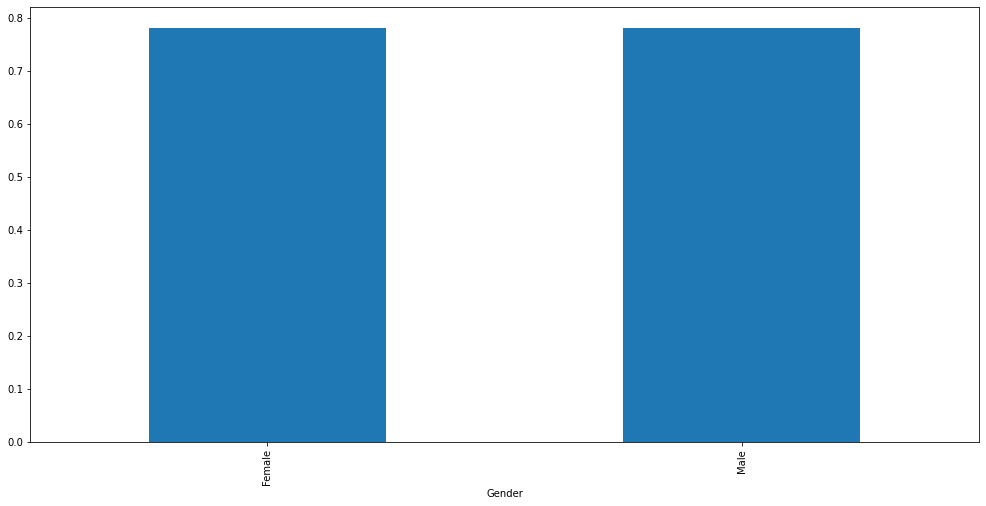

In [45]:
train.groupby('Gender')['Inquiries_Last_6Mo'].mean().plot(kind='bar')

### inference - 
males inquiries in last 6 month compared to females

<AxesSubplot:xlabel='Gender'>

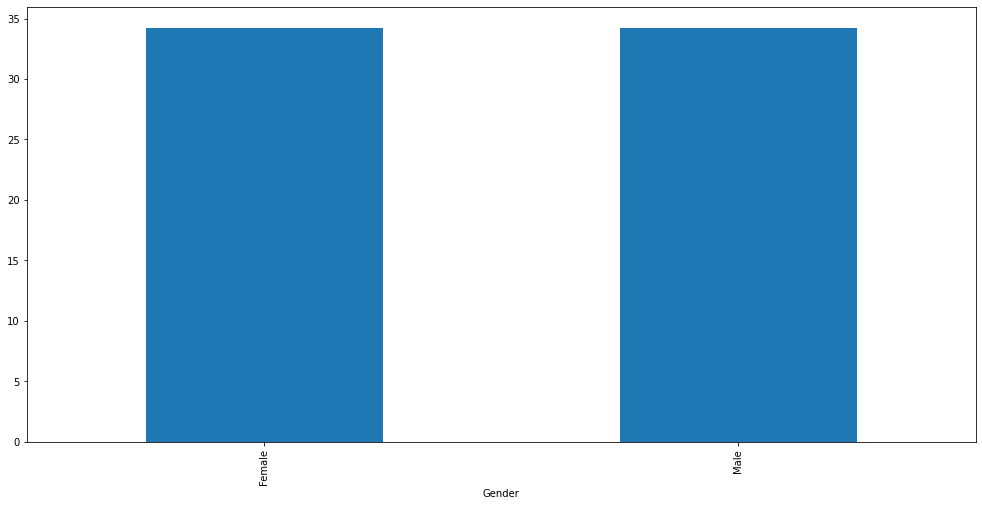

In [46]:
train.groupby('Gender')['Months_Since_Deliquency'].mean().plot(kind='bar')

### inference - 
According to the dataset, males take more default in emi's as compared to females

<AxesSubplot:xlabel='Gender'>

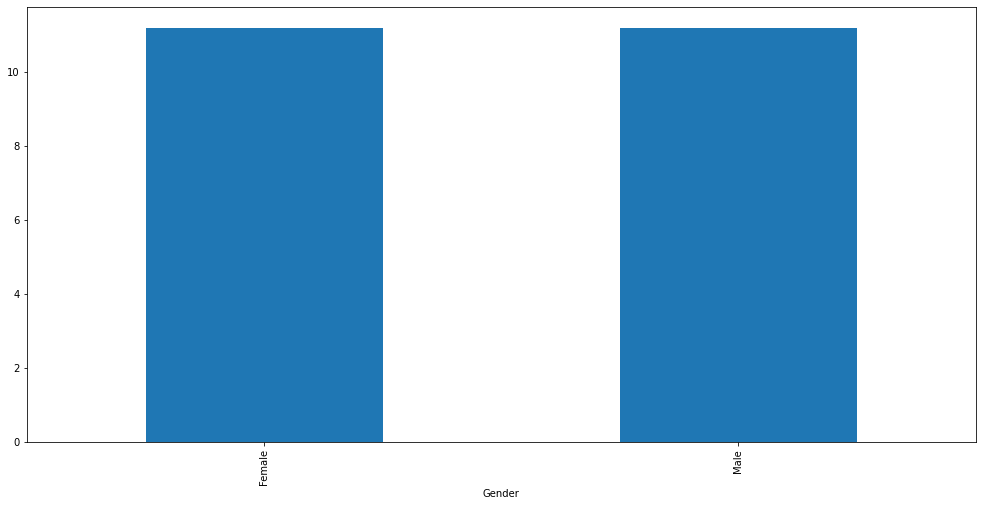

In [47]:
train.groupby('Gender')['Number_Open_Accounts'].mean().plot(kind='bar')

### inference - 
males have more number of open accounts as compared to females. However, it is important to note that having a higher number of open accounts does not necessarily indicate better financial health or creditworthiness.

Having too many open accounts can actually have a negative impact on one's credit score, as it can be seen as a potential indicator of financial instability or a high risk of default. On the other hand, having a moderate number of well-managed accounts can help improve one's credit score by demonstrating responsible borrowing behavior.

<AxesSubplot:xlabel='Gender'>

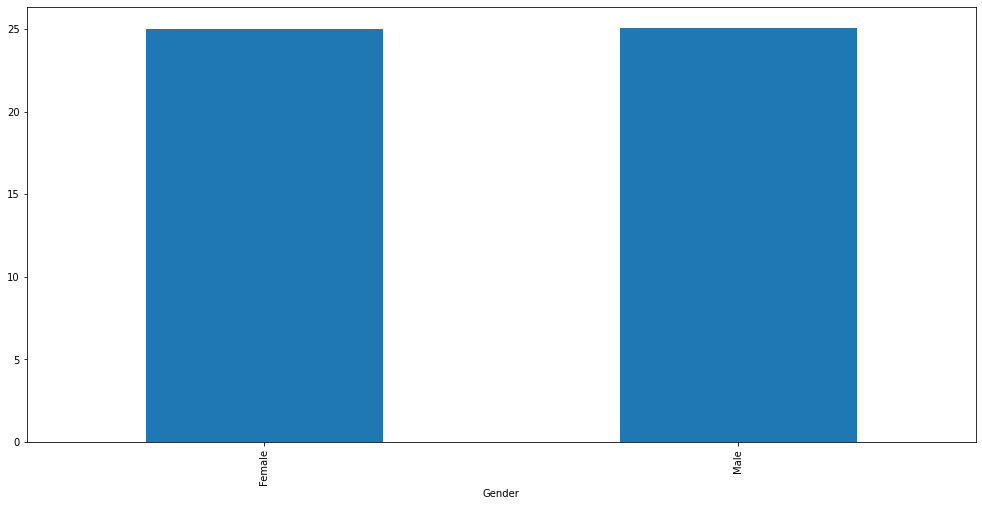

In [48]:
train.groupby('Gender')['Total_Accounts'].mean().plot(kind='bar')

### inference - 
males have more total accounts compared to females. However, it is important to note that the number of total accounts alone does not provide a complete picture of one's creditworthiness or financial health.

The types of accounts, their ages, and their payment histories are also important factors that contribute to a person's credit score and overall financial health. It is possible that males may have more accounts, but those accounts may have a shorter history or a less favorable payment history compared to females.

<AxesSubplot:xlabel='Gender'>

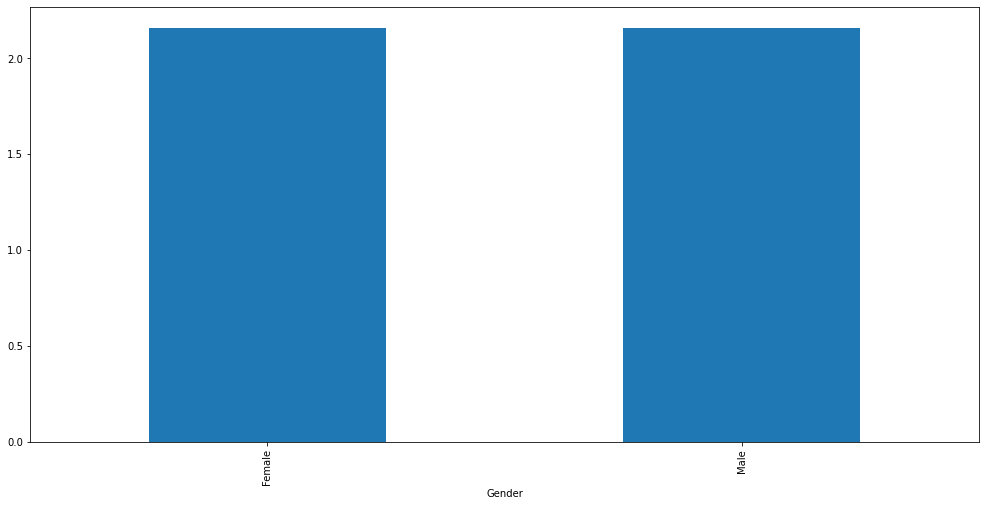

In [49]:
train.groupby('Gender')['Interest_Rate'].mean().plot(kind='bar')

### inference - 
males are the majority in the Gender category, which may indicate that there are more male applicants for loans. Additionally, it appears that females tend to receive lower interest rates on their loans than males. However, it's important to note that there could be other factors at play, such as differences in credit scores or loan repayment history, which may affect the interest rates offered to different applicants.

# Multivariate analysis

<AxesSubplot:>

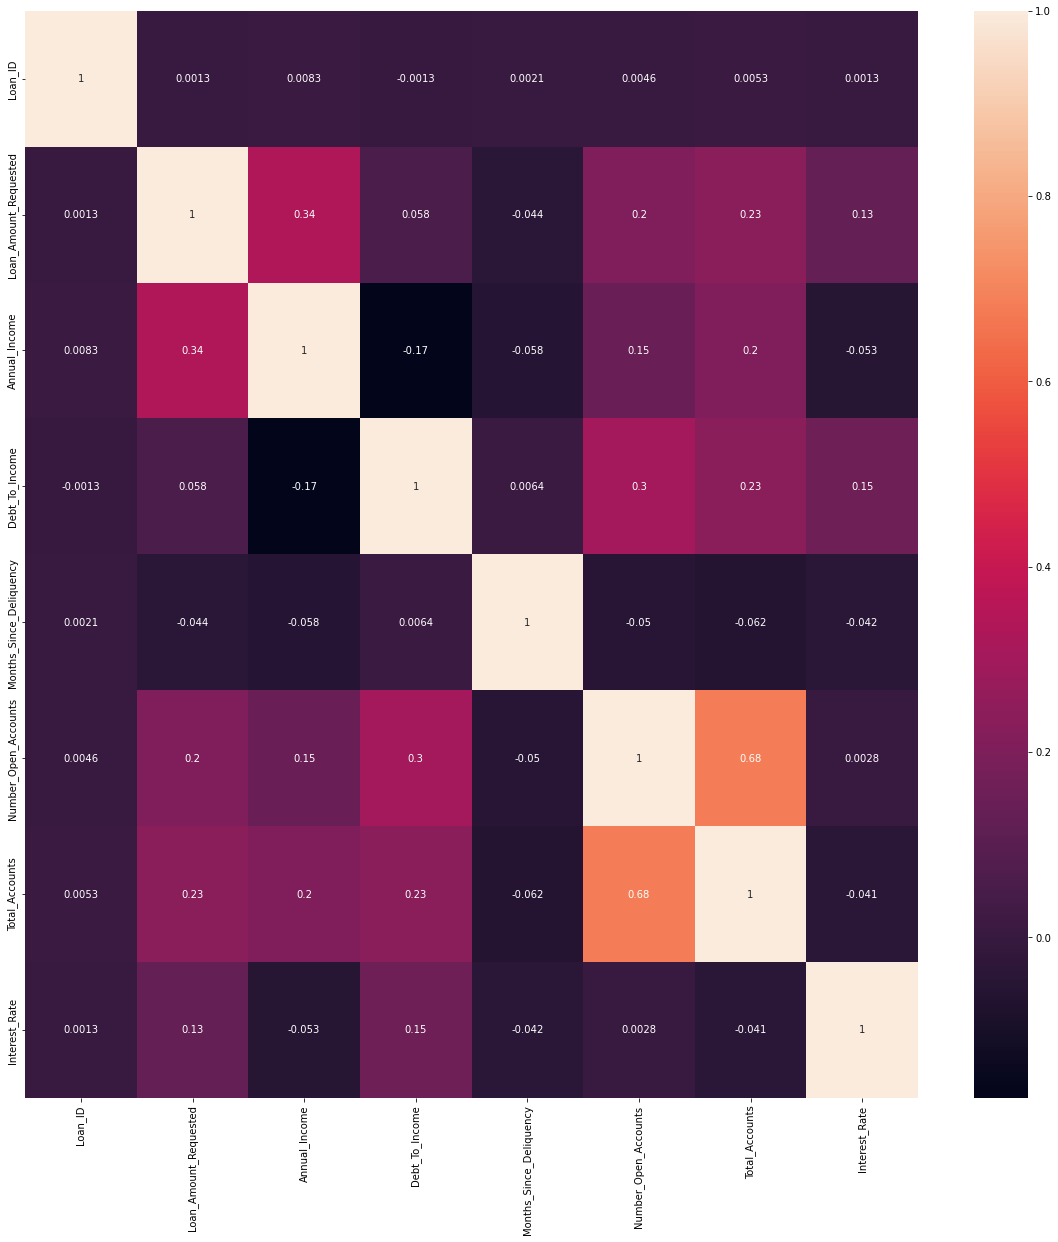

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

### inference - 
there is a strong positive correlation between the loan amount requested and annual income, which suggests that people with higher annual income are more likely to apply for a higher loan amount. On the other hand, there is a weak correlation between the loan amount requested and inquiries last six months, which means that the number of inquiries made in the last six months does not have a significant impact on the loan amount requested. However, we cannot make any assumptions about causality or predictability based solely on the correlation values.

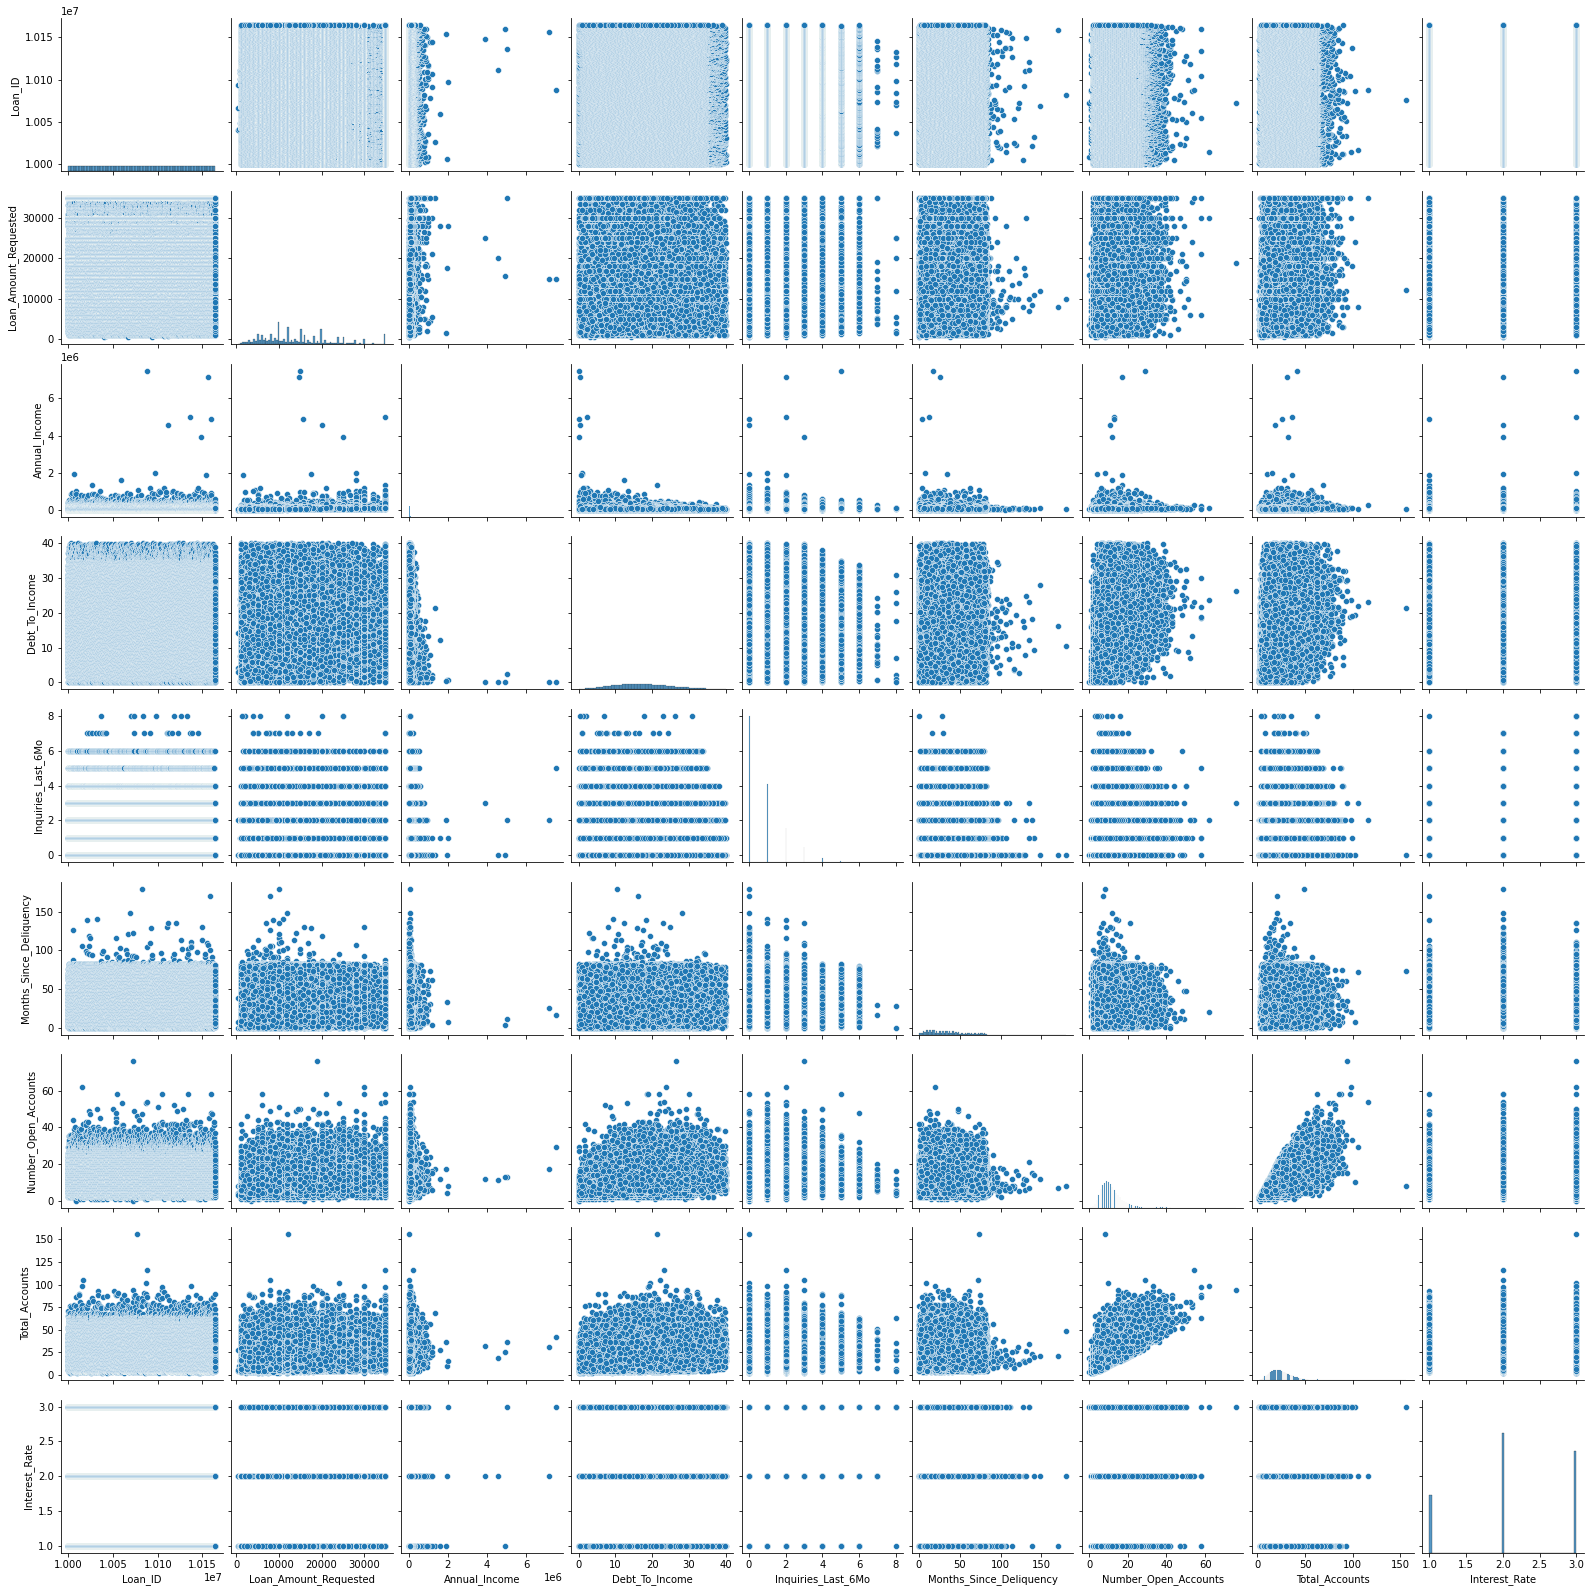

In [51]:
sns.pairplot(train)

# Numerical - categorical


<Figure size 1080x576 with 0 Axes>

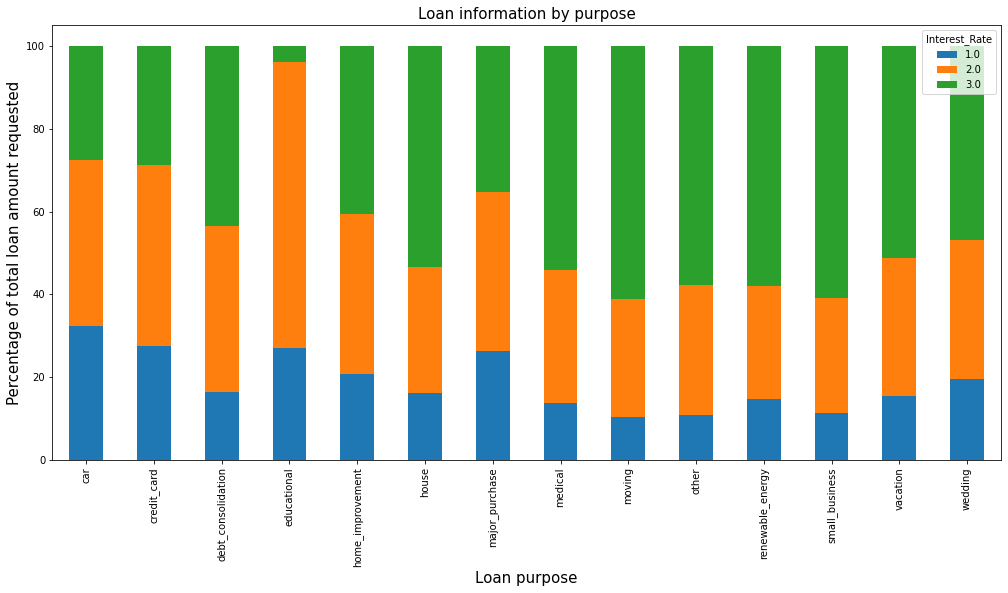

In [52]:
grouped = train.groupby(['Purpose_Of_Loan', 'Interest_Rate'])['Loan_Amount_Requested'].sum().reset_index()

# calculate the total loan amount requested for each purpose
total_by_purpose = grouped.groupby('Purpose_Of_Loan')['Loan_Amount_Requested'].sum()

# add a column for the percentage of loan amount requested for each interest rate within each purpose
grouped['Percent'] = grouped.apply(lambda x: x['Loan_Amount_Requested'] / total_by_purpose[x['Purpose_Of_Loan']] * 100, axis=1)

# pivot the table to create a stacked bar plot
pivot = grouped.pivot(index='Purpose_Of_Loan', columns='Interest_Rate', values='Percent')

# set the figure size
plt.figure(figsize=(15,8))

# create the stacked bar plot
pivot.plot(kind='bar', stacked=True)

# add plot and axes labels
plt.title('Loan information by purpose', fontsize = 15)
plt.xlabel('Loan purpose', fontsize = 15)
plt.ylabel('Percentage of total loan amount requested', fontsize = 15)

# display the plot
plt.show()

### Inference -  
The stacked bar plot gives a clear indication of the distribution of interest rates across different loan purposes. It shows that certain loan purposes tend to have higher interest rates than others. This information can be useful for borrowers who want to make informed decisions about which loan to choose based on their financial goals and the purpose of the loan. The plot also highlights that educational and major_purchase have lower interest rates, indicating that these loan purposes are less risky for lenders.

## Convert string into int 'Length_Employed'

In [53]:
#create are def function for Length_Employed 
def ln_emp(x):
    #convert string into single int form
    if x == '1 year':
        x =1
    elif x == '10+ years':
        x = 11
    elif x =='2 years':
        x=2
    elif x == '3 years':
        x =3
    elif x == '4 years':
        x =4
    elif x == '5 years':
        x =5
    elif x == '6 years':
        x =6
    elif x == '7 years':
        x =7
    elif x == '8 years':
        x =8
    elif x == '9 years':
        x =9
    elif x == '< 1 year':
        x =0
    return(x) 
train.Length_Employed = train.Length_Employed.apply(ln_emp)
#test.Length_Employed = train.Length_Employed.apply(ln_emp)

## Droping the columns

In [54]:
#Months_Since_Deliquency : it have 54% missing value 
train=train.drop('Months_Since_Deliquency',axis=1)
#test=train.drop('Months_Since_Deliquency',axis=1)

In [55]:
#Loan_ID : This is a unique identifier for each order and does not provide any information that can help with the prediction task.
train=train.drop('Loan_ID',axis=1)

# Handle The Missing Value

### 'Home_Owner' Create a new value and fill all Null value in that

In [56]:
train.Home_Owner.unique()

array(['Rent', 'Mortgage', nan, 'Own', 'Other', 'None'], dtype=object)

In [57]:
train['Home_Owner'].fillna('NoHome',inplace=True)
#test['Home_Owner'].fillna('NoHome',inplace=True)

### 'Length_Employed' Hand the null value

In [58]:
# Filling the 'Length_Employed' with Median 
train['Length_Employed'].fillna(train['Length_Employed'].median(),inplace=True)
#test['Length_Employed'].fillna(train['Length_Employed'].median(),inplace=True)

### 'Annual_Income' Predict the missing value with LinearRegression model

In [59]:
print("Annual_Income Null Valuse is:",train['Annual_Income'].isnull().sum())

Annual_Income Null Valuse is: 25102


In [60]:
# Import the necessary packages
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load the dataset and use get_dummies() function to convert categorical features into dummy variables
dummy = pd.get_dummies(train, drop_first=True)

# Separate the data into two subsets: one with non-missing Annual_Income values and one with missing Annual_Income values
train_df_with_income = dummy[dummy['Annual_Income'].notnull()]
train_df_missing_income = dummy[dummy['Annual_Income'].isnull()]

# Define the features (i.e. all features except Annual_Income) and the target variable(i.e. Annual_Income) for the regression model
features = dummy.drop('Annual_Income', axis=1).columns.tolist()

# Fit a linear regression model to the training data with non-missing Annual_Income values
X_train = train_df_with_income[features]
y_train = train_df_with_income['Annual_Income']
reg = LinearRegression().fit(X_train, y_train)

# Predict the missing Annual_Income values using the trained regression model
X_missing = train_df_missing_income[features]
predicted_income = reg.predict(X_missing)

# Fill in the missing Annual_Income values in the original dataset with the predicted values
train.loc[train['Annual_Income'].isnull(), 'Annual_Income'] = predicted_income

In [61]:
print('Predicted values of Annual Income:',list(predicted_income)[:5])

Predicted values of Annual Income: [106702.9582196381, 40841.3187775253, 64447.85555602839, 100954.49306633284, 73750.10521429153]


In [62]:
print("Afther handle the NUll value:",train['Annual_Income'].isnull().sum())

Afther handle the NUll value: 0


In [63]:
after_miss_skew=train.skew().sort_values(ascending=False)
after_miss_skew

Annual_Income            41.461107
Inquiries_Last_6Mo        1.550867
Number_Open_Accounts      1.164084
Total_Accounts            0.817347
Loan_Amount_Requested     0.727216
Debt_To_Income            0.192204
Length_Employed          -0.099300
Interest_Rate            -0.260932
dtype: float64

In [64]:
after_miss_std=train.std().sort_values(ascending=False)
after_miss_std

Annual_Income            56560.175979
Loan_Amount_Requested     8281.868700
Total_Accounts              11.583067
Debt_To_Income               7.845083
Number_Open_Accounts         4.991813
Length_Employed              3.921086
Inquiries_Last_6Mo           1.034747
Interest_Rate                0.738364
dtype: float64

In [65]:
after_miss_mean=train.mean().sort_values(ascending=False)
after_miss_mean

Annual_Income            73348.420209
Loan_Amount_Requested    14349.336920
Total_Accounts              25.067665
Debt_To_Income              17.207189
Number_Open_Accounts        11.193818
Length_Employed              6.315552
Interest_Rate                2.158951
Inquiries_Last_6Mo           0.781698
dtype: float64

# Checking Outliers

In [66]:
## non-parametric test (IQR)

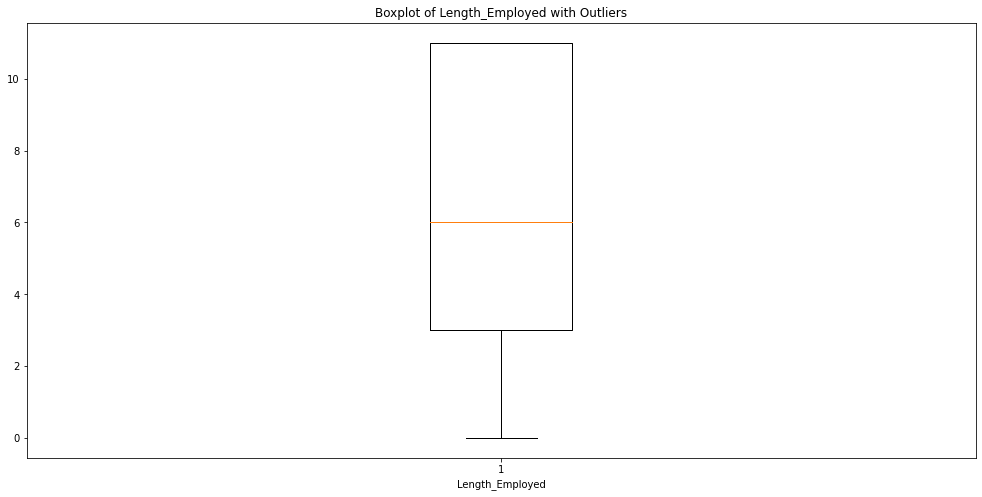

In [67]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Length_Employed'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Length_Employed'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Length_Employed'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Length_Employed'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Length_Employed')
plt.title('Boxplot of Length_Employed with Outliers')

# Show the plot
plt.show()

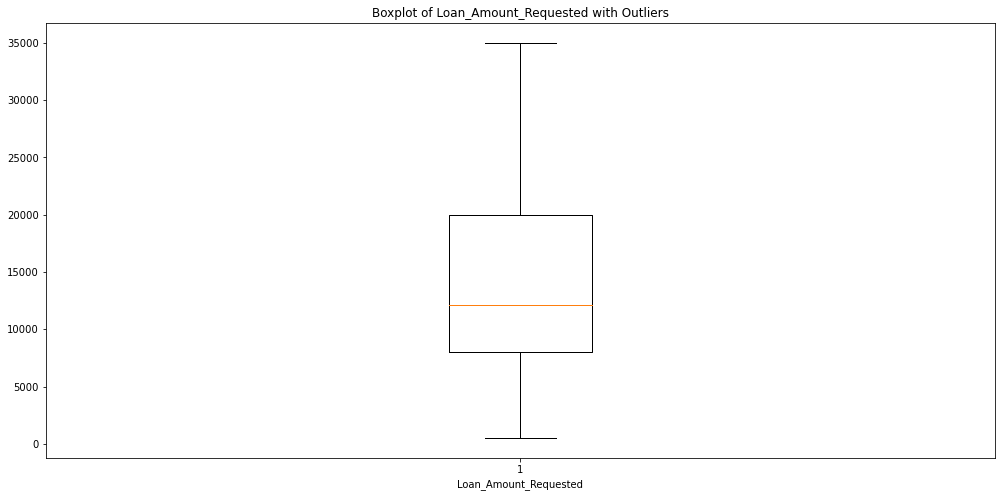

In [68]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Loan_Amount_Requested'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Loan_Amount_Requested'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Loan_Amount_Requested'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Loan_Amount_Requested'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Loan_Amount_Requested')
plt.title('Boxplot of Loan_Amount_Requested with Outliers')

# Show the plot
plt.show()

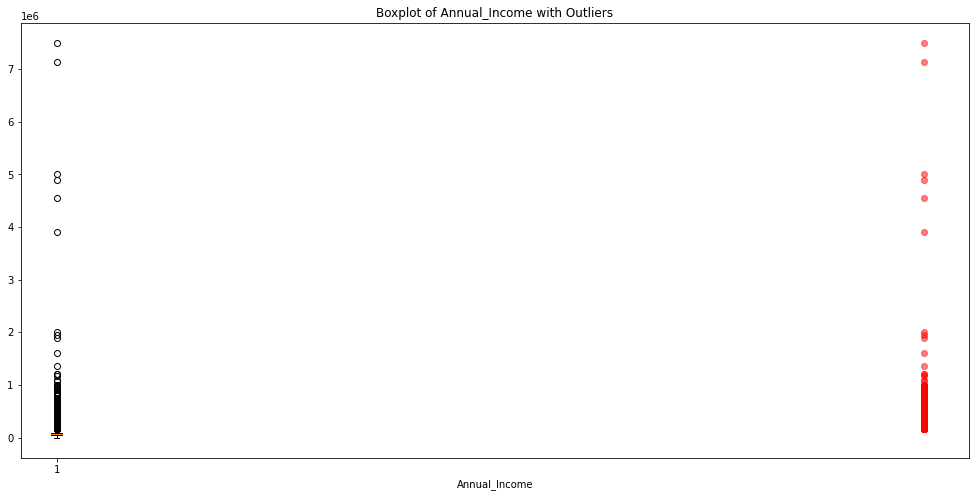

In [69]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Annual_Income'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Annual_Income'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Annual_Income'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Annual_Income'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Annual_Income')
plt.title('Boxplot of Annual_Income with Outliers')

# Show the plot
plt.show()

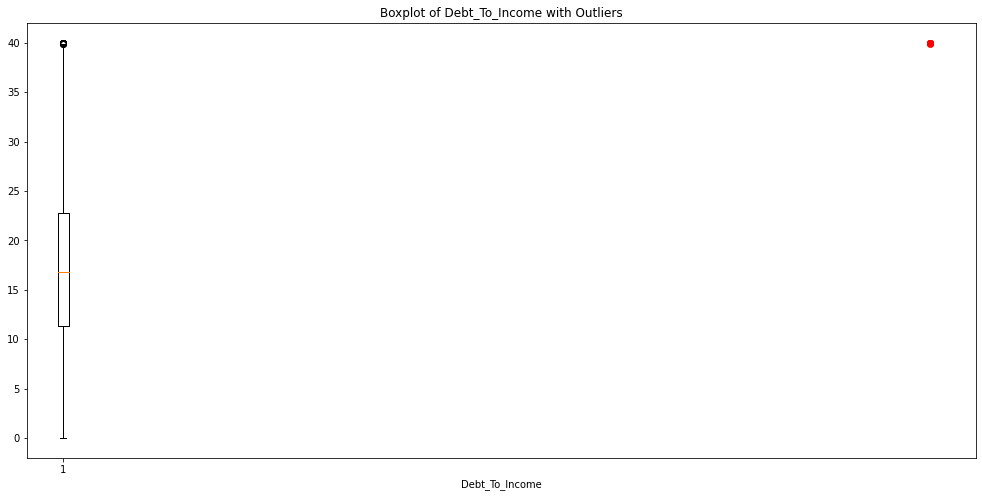

In [70]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Debt_To_Income'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Debt_To_Income'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Debt_To_Income'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Debt_To_Income'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Debt_To_Income')
plt.title('Boxplot of Debt_To_Income with Outliers')

# Show the plot
plt.show()

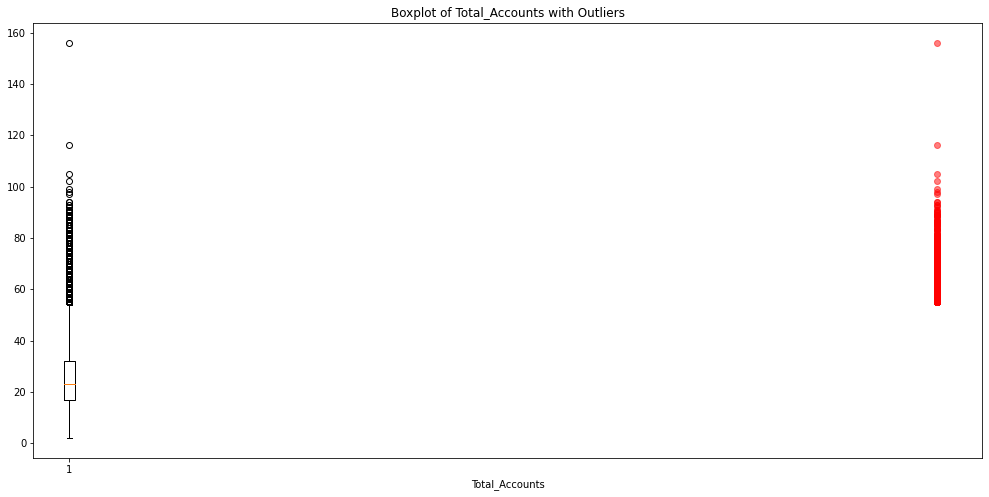

In [71]:
# Calculate the interquartile range (IQR)
q1, q3 = np.percentile(train['Total_Accounts'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Total_Accounts'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Total_Accounts'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Total_Accounts'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Total_Accounts')
plt.title('Boxplot of Total_Accounts with Outliers')

# Show the plot
plt.show()

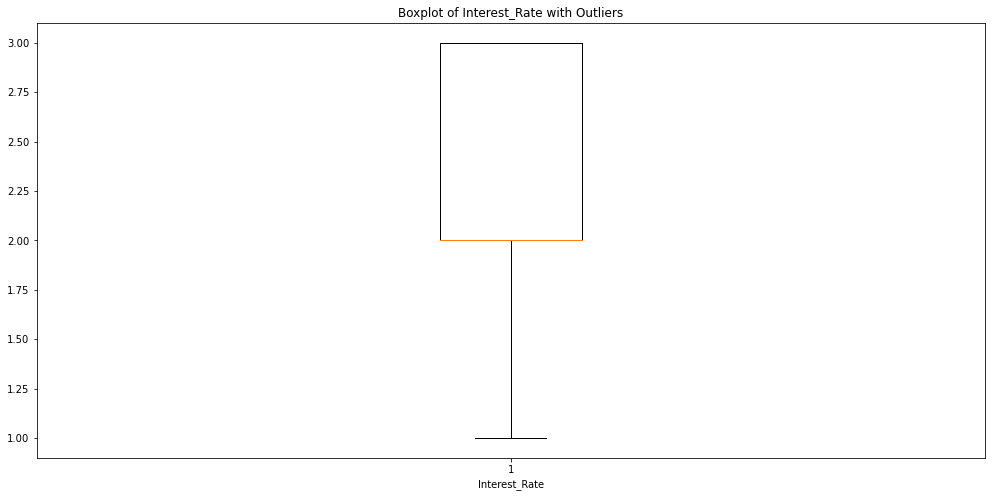

In [72]:
q1, q3 = np.percentile(train['Interest_Rate'], [25, 75])
IQR = q3 - q1

# Set a threshold for outlier detection
threshold = 1.5

# Create a subset of the data containing outliers
outliers_upper = [x for x in train['Interest_Rate'] if x > q3 + threshold*IQR]
outliers_lower = [x for x in train['Interest_Rate'] if x < q1 - threshold*IQR]

# Create a boxplot of the 'Length_Employed' variable
plt.boxplot(train['Interest_Rate'])

# Add markers for the upper and lower outliers
if outliers_upper:
    plt.plot(np.ones(len(outliers_upper))*(len(train.columns)+1), outliers_upper, 'ro', alpha=0.5)
if outliers_lower:
    plt.plot(np.ones(len(outliers_lower))*(len(train.columns)+1), outliers_lower, 'ro', alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Interest_Rate')
plt.title('Boxplot of Interest_Rate with Outliers')

# Show the plot
plt.show()

### Inference - 

numerical variables like ''Annual_Income',Total_Accounts contain outliers,
when we compare the outlier data has very less skewness(Annual_Income -25.675925)as compare to original data(Annual_Income 41.461107), 
it could suggest that the outliers were the main contributors to the skewness of the original data.
Hence , to reduce the skewness we have done transformation.

### Perform ANOVA to test the equality of means

In [73]:
#Loan_Amount_Requested
# Null hypothesis
#𝐻0: The averages of all treatments are the same.
#𝐻1: At least one treatment has a different average.

# we have three groups: 1, 2, 3
# extract the data for each Interest_Rate into separate arrays
class_1=train[train['Interest_Rate']==1]['Loan_Amount_Requested']
class_2=train[train['Interest_Rate']==2]['Loan_Amount_Requested']
class_3=train[train['Interest_Rate']==3]['Loan_Amount_Requested']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 1936.5452716421166
p-value: 0.0


### inference -
as p value is < 0.5 hence  reject null which means all means are different so we can conclude that 
#the col 'Loan_Amount_Requested ' impact on target varible 
#hence we will not drop this col

In [74]:
#Length_Employed

class_1=train[train['Interest_Rate']==1]['Length_Employed']
class_2=train[train['Interest_Rate']==2]['Length_Employed']
class_3=train[train['Interest_Rate']==3]['Length_Employed']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 73.3268708900736
p-value: 1.474851218507049e-32


In [75]:
#Annual_Income

class_1=train[train['Interest_Rate']==1]['Annual_Income']
class_2=train[train['Interest_Rate']==2]['Annual_Income']
class_3=train[train['Interest_Rate']==3]['Annual_Income']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 426.03921890354565
p-value: 2.82899730113007e-185


In [76]:
#Debt_To_Income

class_1=train[train['Interest_Rate']==1]['Debt_To_Income']
class_2=train[train['Interest_Rate']==2]['Debt_To_Income']
class_3=train[train['Interest_Rate']==3]['Debt_To_Income']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 2001.7973519110305
p-value: 0.0


In [77]:
#'Inquiries_Last_6Mo'

class_1=train[train['Interest_Rate']==1]['Inquiries_Last_6Mo']
class_2=train[train['Interest_Rate']==2]['Inquiries_Last_6Mo']
class_3=train[train['Interest_Rate']==3]['Inquiries_Last_6Mo']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 3125.997973994689
p-value: 0.0


In [78]:
#Number_Open_Accounts

class_1=train[train['Interest_Rate']==1]['Number_Open_Accounts']
class_2=train[train['Interest_Rate']==2]['Number_Open_Accounts']
class_3=train[train['Interest_Rate']==3]['Number_Open_Accounts']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 38.89204695156436
p-value: 1.2983609557711249e-17


In [79]:
#'Total_Accounts'

class_1=train[train['Interest_Rate']==1]['Total_Accounts']
class_2=train[train['Interest_Rate']==2]['Total_Accounts']
class_3=train[train['Interest_Rate']==3]['Total_Accounts']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 212.11450799588098
p-value: 9.966895838922742e-93


### Inference 
all numerical colms having p_value < 0.5 that means reject null hypothesis 
which means all means are different and independent vairables having impact on target variables,
hence we will not drop any columns

#  statistical test on categorical vs categorical 

# Chi-Square Test for Independence

This test is used to test whether the categorical variables are independent or not.

𝐻0: The variables are independent

𝐻1: The variables are not independent (i.e. variables are dependent)

In [80]:
train.select_dtypes(exclude=np.number).columns

Index(['Home_Owner', 'Income_Verified', 'Purpose_Of_Loan',
       'Inquiries_Last_6Mo', 'Gender'],
      dtype='object')

In [81]:
test_stat, p, dof, expected_value=stats.chi2_contingency(pd.crosstab(train['Home_Owner'],
                                                                     train['Income_Verified']),correction=False)
print('Test Stats:',test_stat)
print('P Value:', p)
print('Degree of freedom:', dof)
print('Expected Valued:', expected_value)

Test Stats: 1119.4753530964615
P Value: 3.3408100093958267e-234
Degree of freedom: 10
Expected Valued: [[2.54396913e+04 2.26971144e+04 2.22081942e+04]
 [9.16725760e+03 8.17896302e+03 8.00277938e+03]
 [3.61641785e+00 3.22654267e+00 3.15703948e+00]
 [1.77204474e+01 1.58100591e+01 1.54694935e+01]
 [4.52956335e+03 4.04124470e+03 3.95419195e+03]
 [2.02631508e+04 1.80786412e+04 1.76892079e+04]]


#### inference - p_value is < 0.05 reject the null hypothesis which means the two variables are not independent hence we will not drop the variable

In [82]:
test_stat, p, dof, expected_value=stats.chi2_contingency(pd.crosstab(train['Home_Owner'],
                                                                     train['Purpose_Of_Loan']),correction=False)
print('Test Stats:',test_stat)
print('P Value:', p)
print('Degree of freedom:', dof)
print('Expected Valued:', expected_value)

Test Stats: 4747.27036879808
P Value: 0.0
Degree of freedom: 65
Expected Valued: [[8.07018027e+02 1.57053842e+04 4.15714894e+04 5.18032792e+01
  3.96830244e+03 3.30941610e+02 1.47061375e+03 6.59742589e+02
  4.16994991e+02 3.57314189e+03 5.26595317e+01 1.02407805e+03
  3.58341692e+02 3.54488555e+02]
 [2.90811002e+02 5.65947523e+03 1.49803921e+04 1.86674437e+01
  1.42998789e+03 1.19255652e+02 5.29939413e+02 2.37739923e+02
  1.50265208e+02 1.28759078e+03 1.89759964e+01 3.69029134e+02
  1.29129342e+02 1.27740854e+02]
 [1.14722870e-01 2.23262268e+00 5.90965802e+00 7.36417360e-03
  5.64120042e-01 4.70455057e-02 2.09057325e-01 9.37867068e-02
  5.92785544e-02 5.07945396e-01 7.48589548e-03 1.45579366e-01
  5.09406058e-02 5.03928574e-02]
 [5.62142062e-01 1.09398511e+01 2.89573243e+01 3.60844506e-02
  2.76418821e+00 2.30522978e-01 1.02438089e+00 4.59554863e-01
  2.90464917e-01 2.48893244e+00 3.66808878e-02 7.13338892e-01
  2.49608968e-01 2.46925001e-01]
 [1.43690394e+02 2.79635991e+03 7.40184667e

### inference - 
p_value is < 0.05 reject the null hypothesis which means the two variables are not independent 

In [83]:
test_stat, p, dof, expected_value=stats.chi2_contingency(pd.crosstab(train['Home_Owner'],
                                                                     train['Gender']),correction=False)
print('Test Stats:',test_stat)
print('P Value:', p)
print('Degree of freedom:', dof)
print('Expected Valued:', expected_value)

Test Stats: 1.528104822013083
P Value: 0.9098039151710727
Degree of freedom: 5
Expected Valued: [[2.01788757e+04 5.01661243e+04]
 [7.27150927e+03 1.80774907e+04]
 [2.86855863e+00 7.13144137e+00]
 [1.40559373e+01 3.49440627e+01]
 [3.59286968e+03 8.93213032e+03]
 [1.60728209e+04 3.99581791e+04]]


### inference - 
p_value is > 0.05 fail to reject the null hypothesis which means the two variables are independent of each other

In [84]:
test_stat, p, dof, expected_value=stats.chi2_contingency(pd.crosstab(train['Purpose_Of_Loan'],
                                                                     train['Income_Verified']),correction=False)
print('Test Stats:',test_stat)
print('P Value:', p)
print('Degree of freedom:', dof)
print('Expected Valued:', expected_value)

Test Stats: 1551.440418526489
P Value: 1.293837800205e-311
Degree of freedom: 26
Expected Valued: [[  681.69476413   608.20329379   595.10194207]
 [13266.46722943 11836.24914034 11581.28363023]
 [35115.77893481 31330.05200567 30655.16905952]
 [   43.75865595    39.04116634    38.20017771]
 [ 3352.05770226  2990.68240328  2926.25989447]
 [  279.54909956   249.4117486    244.03915184]
 [ 1242.2395304   1108.31740805  1084.44306155]
 [  557.2899902    497.21022585   486.49978394]
 [  352.23909828   314.26525632   307.4956454 ]
 [ 3018.26233499  2692.87251459  2634.86515042]
 [   44.48193952    39.68647487    38.83158561]
 [  865.04714897   771.7890073    755.16384373]
 [  302.69417378   270.0616217    264.24420452]
 [  299.43939772   267.1577333    261.40286898]]


### inference - 
p_value is < 0.05 reject the null hypothesis which means the two variables are not independent hence we will not drop the variable

In [85]:
test_stat, p, dof, expected_value=stats.chi2_contingency(pd.crosstab(train['Gender'],
                                                                     train['Income_Verified']),correction=False)
print('Test Stats:',test_stat)
print('P Value:', p)
print('Degree of freedom:', dof)
print('Expected Valued:', expected_value)

Test Stats: 4.587890744699577
P Value: 0.10086771507482217
Degree of freedom: 2
Expected Valued: [[17045.26223761 15207.66357899 14880.0741834 ]
 [42375.73776239 37807.33642101 36992.9258166 ]]


### inference - 
p_value is > 0.05 fail to reject the null hypothesis which means the two variables are independent of each other

In [86]:
test_stat, p, dof, expected_value=stats.chi2_contingency(pd.crosstab(train['Gender'],
                                                                     train['Purpose_Of_Loan']),correction=False)
print('Test Stats:',test_stat)
print('P Value:', p)
print('Degree of freedom:', dof)
print('Expected Valued:', expected_value)

Test Stats: 7.673038934869507
P Value: 0.8642296614256447
Degree of freedom: 13
Expected Valued: [[5.40723302e+02 1.05230205e+04 2.78539912e+04 3.47095594e+01
  2.65886699e+03 2.21739582e+02 9.85349890e+02 4.42044885e+02
  2.79397611e+02 2.39409903e+03 3.52832712e+01 6.86159224e+02
  2.40098357e+02 2.37516655e+02]
 [1.34427670e+03 2.61609795e+04 6.92470088e+04 8.62904406e+01
  6.61013301e+03 5.51260418e+02 2.44965011e+03 1.09895512e+03
  6.94602389e+02 5.95190097e+03 8.77167288e+01 1.70584078e+03
  5.96901643e+02 5.90483345e+02]]


### inference - 
p_value is > 0.05 fail to reject the null hypothesis which means the two variables are independent of each other

#  Base Model before Transformation

In [87]:
# Define the categorical columns to encode
cat_cols = train.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(train, columns=cat_cols, drop_first=True)

In [88]:
x=df_encoded.drop('Interest_Rate', axis=1)
y=df_encoded['Interest_Rate']
x=sm.add_constant(x)
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

# Evaluate the model on the testing set
accuracy = lr.score(xtest, ytest)
print(f'Testing accuracy: {accuracy:.3f}')

Testing accuracy: 0.455


In [89]:
y_pred = lr.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         1.0       0.26      0.01      0.01      6721
         2.0       0.45      0.71      0.55     14018
         3.0       0.47      0.40      0.44     12123

    accuracy                           0.46     32862
   macro avg       0.39      0.38      0.33     32862
weighted avg       0.42      0.46      0.40     32862



In [90]:
y_pred = lr.predict(xtrain)
print(classification_report(ytrain, y_pred))

              precision    recall  f1-score   support

         1.0       0.30      0.01      0.02     27085
         2.0       0.46      0.72      0.56     56562
         3.0       0.48      0.41      0.44     47800

    accuracy                           0.46    131447
   macro avg       0.41      0.38      0.34    131447
weighted avg       0.43      0.46      0.41    131447



### Inference - 
The accuracy of the logistic regression model with outliers is 0.46 which is very poor.

# Transformation 

 numerical variables like ''Annual_Income',Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts contain outliers.Hence we can treat it by transformation to reduce the skewness of variables which can lead to build a model with better efficiency.

In [91]:
# 'Annual_Income'

skewness in Annual_Income: 41.46110664897909


<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

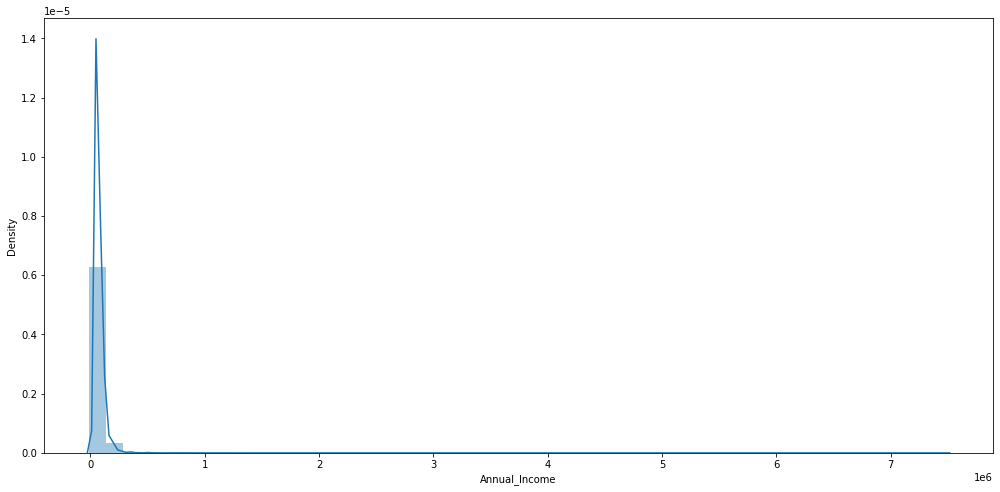

In [92]:
# check the skewness value
print('skewness in Annual_Income:',train['Annual_Income'].skew())

# plot the distribution plot of Annual_income
sns.distplot(train['Annual_Income'])

In [93]:
# check weather data has negative value or not
train[train['Annual_Income']<0]

Loan_Amount_Requested  Length_Employed Home_Owner  Annual_Income  \
9481                   2000.0              6.0       Rent   -4437.785529   
15732                  3600.0              7.0       Rent   -2821.047526   
39348                  2200.0              2.0     NoHome   -1192.324271   
42514                  4725.0              2.0       Rent  -11230.895157   
65540                  3450.0              3.0       Rent    -246.393485   
74045                  5000.0              1.0       Rent   -4427.636323   
85353                  3900.0             11.0       Rent   -3055.778200   
114717                 4200.0              1.0       Rent    -134.830288   
124136                 5375.0              3.0       Rent   -2034.790713   
126408                 5000.0              9.0       Rent   -4622.893859   

                 Income_Verified     Purpose_Of_Loan  Debt_To_Income  \
9481           VERIFIED - income  debt_consolidation           33.60   
15732   VERIFIED - income source  debt_consolidation           35.71   
39348          VERIFIED - income  debt_consolidation           32.24   
42514               not verified  debt_consolidation           38.51   
65540               not verified  debt_consolidation           29.82   
74045   VERIFIED - income source  debt_consolidation           35.81   
85353               not verified  debt_consolidation           34.98   
114717         VERIFIED - income         credit_card           32.71   
124136         VERIFIED - income         credit_card           33.57   
126408  VERIFIED - income source  debt_consolidation           39.20   

       Inquiries_Last_6Mo  Number_Open_Accounts  Total_Accounts  Gender  \
9481                  0.0                   9.0            14.0    Male   
15732                 0.0                   8.0            12.0  Female   
39348                 0.0                   5.0             7.0  Female   
42514                 0.0                   8.0             9.0    Male   
65540                 1.0                   2.0            11.0    Male   
74045                 1.0                   6.0             7.0  Female   
85353                 1.0                   6.0            10.0  Female   
114717                0.0                   9.0            14.0  Female   
124136                0.0                   7.0            10.0    Male   
126408                0.0                   5.0             7.0  Female   

        Interest_Rate  
9481              3.0  
15732             3.0  
39348             2.0  
42514             3.0  
65540             3.0  
74045             3.0  
85353             3.0  
114717            3.0  
124136            3.0  
126408            2.0

### inference - Annual_Income is  highly skeweed and it contains negative values so, for transformation we wwill preffere yeo johnson transformation

skweness in variable after Tranformation: 5.286722941507544


<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

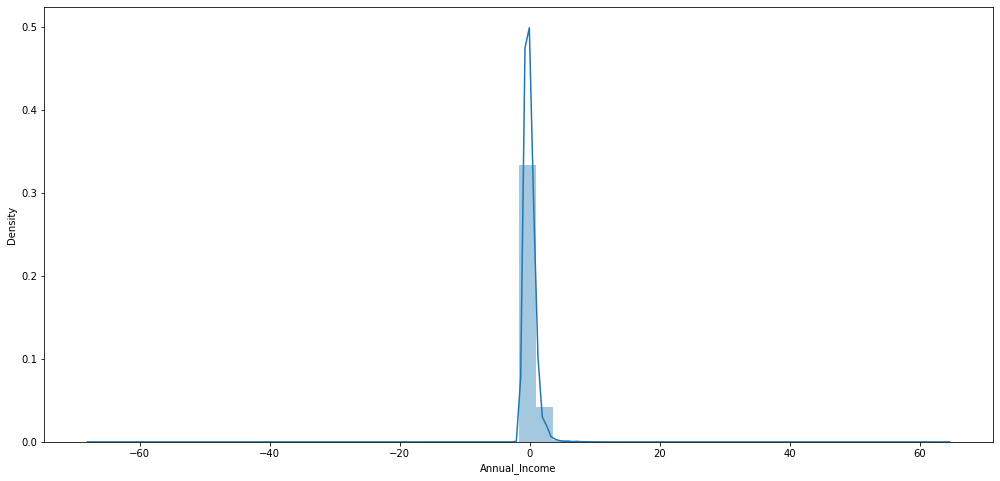

In [94]:
yeo_johnson_PT = PowerTransformer(method='yeo-johnson')
train['Annual_Income'] = yeo_johnson_PT.fit_transform(train[['Annual_Income']])
# print the skewness after transformation
print('skweness in variable after Tranformation:',train['Annual_Income'].skew())
# plot the dist plot to recheck weather data has been get converted into symmetric distribution or not
sns.distplot(train['Annual_Income'])

In [95]:
print('Skweness in data after Transformation:\n',train.skew())

Skweness in data after Transformation:
 Loan_Amount_Requested    0.727216
Length_Employed         -0.099300
Annual_Income            5.286723
Debt_To_Income           0.192204
Inquiries_Last_6Mo       1.550867
Number_Open_Accounts     1.164084
Total_Accounts           0.817347
Interest_Rate           -0.260932
dtype: float64


### Inference - 
The skewness from the variables has been reduced by mean of'YEO_JOHNSON' Transformation

### Perform ANOVA to test After transformation the equality of means

In [96]:
#Annual_Income

class_1=train[train['Interest_Rate']==1]['Annual_Income']
class_2=train[train['Interest_Rate']==2]['Annual_Income']
class_3=train[train['Interest_Rate']==3]['Annual_Income']

# perform one-way ANOVA test
f_value, p_value=stats.f_oneway(class_1,class_2,class_3)

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 717.6768276095036
p-value: 4.6821596903317e-311


# Encoding 

In [97]:
# Define the categorical columns to encode
cat_cols = train.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the categorical variables
df_encoded_train = pd.get_dummies(train, columns=cat_cols, drop_first=True)

# Check balancing of Data (train)

In [98]:
df_encoded_train.groupby('Interest_Rate').count()

Loan_Amount_Requested  Length_Employed  Annual_Income  \
Interest_Rate                                                          
1.0                            33806            33806          33806   
2.0                            70580            70580          70580   
3.0                            59923            59923          59923   

               Debt_To_Income  Number_Open_Accounts  Total_Accounts  \
Interest_Rate                                                         
1.0                     33806                 33806           33806   
2.0                     70580                 70580           70580   
3.0                     59923                 59923           59923   

               Home_Owner_NoHome  Home_Owner_None  Home_Owner_Other  \
Interest_Rate                                                         
1.0                        33806            33806             33806   
2.0                        70580            70580             70580   
3.0                        59923            59923             59923   

               Home_Owner_Own  ...  Purpose_Of_Loan_wedding  \
Interest_Rate                  ...                            
1.0                     33806  ...                    33806   
2.0                     70580  ...                    70580   
3.0                     59923  ...                    59923   

               Inquiries_Last_6Mo_1.0  Inquiries_Last_6Mo_2.0  \
Interest_Rate                                                   
1.0                             33806                   33806   
2.0                             70580                   70580   
3.0                             59923                   59923   

               Inquiries_Last_6Mo_3.0  Inquiries_Last_6Mo_4.0  \
Interest_Rate                                                   
1.0                             33806                   33806   
2.0                             70580                   70580   
3.0                             59923                   59923   

               Inquiries_Last_6Mo_5.0  Inquiries_Last_6Mo_6.0  \
Interest_Rate                                                   
1.0                             33806                   33806   
2.0                             70580                   70580   
3.0                             59923                   59923   

               Inquiries_Last_6Mo_7.0  Inquiries_Last_6Mo_8.0  Gender_Male  
Interest_Rate                                                               
1.0                             33806                   33806        33806  
2.0                             70580                   70580        70580  
3.0                             59923                   59923        59923  

[3 rows x 35 columns]

In [99]:
df_encoded_train['Interest_Rate'].value_counts()/len(df_encoded_train)*100

2.0    42.955651
3.0    36.469700
1.0    20.574649
Name: Interest_Rate, dtype: float64

In [100]:
df_encoded_train['Interest_Rate'].value_counts()

2.0    70580
3.0    59923
1.0    33806
Name: Interest_Rate, dtype: int64

<AxesSubplot:xlabel='Interest_Rate', ylabel='count'>

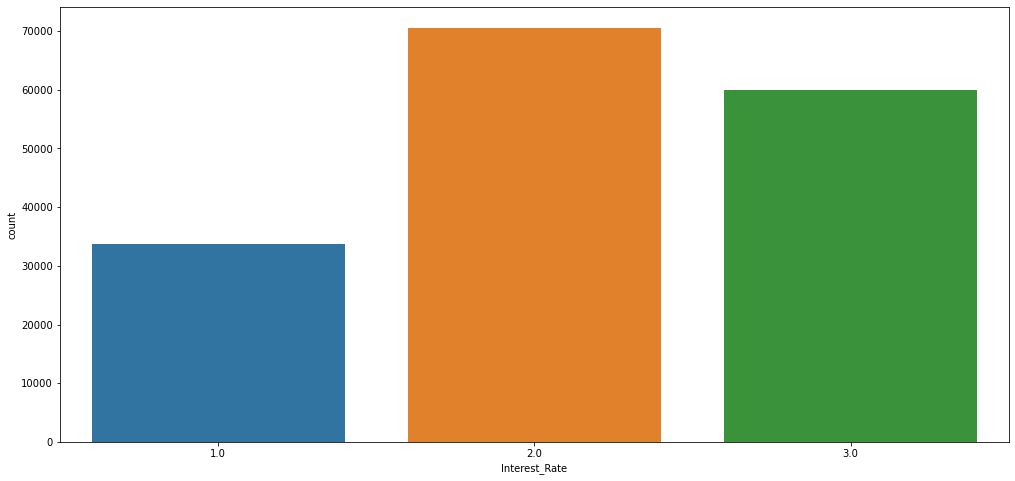

In [101]:
sns.countplot(df_encoded_train['Interest_Rate'])

### Inference - 
Data is not imbalance so, there is no need to balance the data

# Model Building 

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score

In [103]:
# create multiple models
models =  [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Neural Network', MLPClassifier()),
    ('SVM', SVC()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Light Gradient Boost', LGBMClassifier()),
    ('Ridge', RidgeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Quadratic Discriminant', QuadraticDiscriminantAnalysis()),
    ('Linear Discriminant', LinearDiscriminantAnalysis()),
    ('Cat Boost',CatBoostClassifier())
]

# create empty dataframe to store results
train_results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1','Kappa'])
x=df_encoded_train.drop('Interest_Rate', axis=1)
y=df_encoded_train['Interest_Rate']
x=sm.add_constant(x)
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)
for name, model in models:
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtrain)
    accuracy = accuracy_score(ytrain, y_pred)
    precision = precision_score(ytrain, y_pred,average='micro')
    recall = recall_score(ytrain, y_pred,average='micro')
    f1 = f1_score(ytrain, y_pred,average='micro')
    kappa =cohen_kappa_score(ytrain,y_pred)
    train_results_df = train_results_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1,'Kappa':kappa}, ignore_index=True)

# display results dataframe
#print(train_results_df)

Learning rate set to 0.10148
0:	learn: 1.0808215	total: 185ms	remaining: 3m 4s
1:	learn: 1.0667497	total: 212ms	remaining: 1m 45s
2:	learn: 1.0542018	total: 239ms	remaining: 1m 19s
3:	learn: 1.0442462	total: 265ms	remaining: 1m 5s
4:	learn: 1.0352252	total: 292ms	remaining: 58.1s
5:	learn: 1.0278323	total: 318ms	remaining: 52.7s
6:	learn: 1.0213561	total: 345ms	remaining: 49s
7:	learn: 1.0157960	total: 373ms	remaining: 46.2s
8:	learn: 1.0108826	total: 399ms	remaining: 44s
9:	learn: 1.0062248	total: 423ms	remaining: 41.9s
10:	learn: 1.0021132	total: 446ms	remaining: 40.1s
11:	learn: 0.9989124	total: 472ms	remaining: 38.9s
12:	learn: 0.9958567	total: 494ms	remaining: 37.5s
13:	learn: 0.9924472	total: 518ms	remaining: 36.5s
14:	learn: 0.9895872	total: 541ms	remaining: 35.5s
15:	learn: 0.9870921	total: 566ms	remaining: 34.8s
16:	learn: 0.9847376	total: 591ms	remaining: 34.2s
17:	learn: 0.9823337	total: 615ms	remaining: 33.6s
18:	learn: 0.9803003	total: 638ms	remaining: 32.9s
19:	learn: 0.9

167:	learn: 0.9327029	total: 4.12s	remaining: 20.4s
168:	learn: 0.9325484	total: 4.14s	remaining: 20.4s
169:	learn: 0.9324629	total: 4.16s	remaining: 20.3s
170:	learn: 0.9323509	total: 4.19s	remaining: 20.3s
171:	learn: 0.9322302	total: 4.21s	remaining: 20.3s
172:	learn: 0.9321477	total: 4.23s	remaining: 20.2s
173:	learn: 0.9320683	total: 4.26s	remaining: 20.2s
174:	learn: 0.9319842	total: 4.28s	remaining: 20.2s
175:	learn: 0.9319103	total: 4.3s	remaining: 20.1s
176:	learn: 0.9318142	total: 4.32s	remaining: 20.1s
177:	learn: 0.9316910	total: 4.35s	remaining: 20.1s
178:	learn: 0.9315860	total: 4.38s	remaining: 20.1s
179:	learn: 0.9314798	total: 4.41s	remaining: 20.1s
180:	learn: 0.9313904	total: 4.43s	remaining: 20s
181:	learn: 0.9312916	total: 4.45s	remaining: 20s
182:	learn: 0.9311963	total: 4.47s	remaining: 20s
183:	learn: 0.9311122	total: 4.5s	remaining: 19.9s
184:	learn: 0.9309971	total: 4.52s	remaining: 19.9s
185:	learn: 0.9309486	total: 4.54s	remaining: 19.9s
186:	learn: 0.930881

329:	learn: 0.9203325	total: 7.85s	remaining: 15.9s
330:	learn: 0.9202495	total: 7.87s	remaining: 15.9s
331:	learn: 0.9201785	total: 7.9s	remaining: 15.9s
332:	learn: 0.9201127	total: 7.93s	remaining: 15.9s
333:	learn: 0.9200312	total: 7.95s	remaining: 15.9s
334:	learn: 0.9199713	total: 7.97s	remaining: 15.8s
335:	learn: 0.9199086	total: 8s	remaining: 15.8s
336:	learn: 0.9198816	total: 8.02s	remaining: 15.8s
337:	learn: 0.9198023	total: 8.04s	remaining: 15.8s
338:	learn: 0.9197321	total: 8.07s	remaining: 15.7s
339:	learn: 0.9196598	total: 8.09s	remaining: 15.7s
340:	learn: 0.9196108	total: 8.12s	remaining: 15.7s
341:	learn: 0.9195316	total: 8.14s	remaining: 15.7s
342:	learn: 0.9194509	total: 8.17s	remaining: 15.6s
343:	learn: 0.9193748	total: 8.19s	remaining: 15.6s
344:	learn: 0.9193430	total: 8.21s	remaining: 15.6s
345:	learn: 0.9192837	total: 8.24s	remaining: 15.6s
346:	learn: 0.9192461	total: 8.27s	remaining: 15.6s
347:	learn: 0.9192054	total: 8.3s	remaining: 15.5s
348:	learn: 0.919

496:	learn: 0.9111126	total: 11.8s	remaining: 12s
497:	learn: 0.9110767	total: 11.9s	remaining: 12s
498:	learn: 0.9110316	total: 11.9s	remaining: 11.9s
499:	learn: 0.9109611	total: 11.9s	remaining: 11.9s
500:	learn: 0.9108946	total: 11.9s	remaining: 11.9s
501:	learn: 0.9108421	total: 12s	remaining: 11.9s
502:	learn: 0.9107674	total: 12s	remaining: 11.8s
503:	learn: 0.9106966	total: 12s	remaining: 11.8s
504:	learn: 0.9106576	total: 12s	remaining: 11.8s
505:	learn: 0.9105995	total: 12.1s	remaining: 11.8s
506:	learn: 0.9105515	total: 12.1s	remaining: 11.7s
507:	learn: 0.9104782	total: 12.1s	remaining: 11.7s
508:	learn: 0.9103944	total: 12.1s	remaining: 11.7s
509:	learn: 0.9103559	total: 12.2s	remaining: 11.7s
510:	learn: 0.9102865	total: 12.2s	remaining: 11.7s
511:	learn: 0.9102419	total: 12.2s	remaining: 11.6s
512:	learn: 0.9101868	total: 12.2s	remaining: 11.6s
513:	learn: 0.9101396	total: 12.3s	remaining: 11.6s
514:	learn: 0.9100878	total: 12.3s	remaining: 11.6s
515:	learn: 0.9099834	to

656:	learn: 0.9028933	total: 15.6s	remaining: 8.15s
657:	learn: 0.9028587	total: 15.6s	remaining: 8.13s
658:	learn: 0.9028399	total: 15.7s	remaining: 8.1s
659:	learn: 0.9028145	total: 15.7s	remaining: 8.08s
660:	learn: 0.9027727	total: 15.7s	remaining: 8.06s
661:	learn: 0.9027097	total: 15.7s	remaining: 8.03s
662:	learn: 0.9026509	total: 15.8s	remaining: 8.01s
663:	learn: 0.9025870	total: 15.8s	remaining: 7.99s
664:	learn: 0.9025499	total: 15.8s	remaining: 7.96s
665:	learn: 0.9025120	total: 15.8s	remaining: 7.94s
666:	learn: 0.9024363	total: 15.9s	remaining: 7.91s
667:	learn: 0.9023846	total: 15.9s	remaining: 7.89s
668:	learn: 0.9023534	total: 15.9s	remaining: 7.87s
669:	learn: 0.9022969	total: 15.9s	remaining: 7.84s
670:	learn: 0.9022435	total: 15.9s	remaining: 7.82s
671:	learn: 0.9022062	total: 16s	remaining: 7.8s
672:	learn: 0.9021720	total: 16s	remaining: 7.77s
673:	learn: 0.9021094	total: 16s	remaining: 7.75s
674:	learn: 0.9020475	total: 16.1s	remaining: 7.73s
675:	learn: 0.902017

821:	learn: 0.8952123	total: 19.6s	remaining: 4.23s
822:	learn: 0.8951743	total: 19.6s	remaining: 4.21s
823:	learn: 0.8951226	total: 19.6s	remaining: 4.19s
824:	learn: 0.8951007	total: 19.6s	remaining: 4.16s
825:	learn: 0.8950361	total: 19.6s	remaining: 4.14s
826:	learn: 0.8949997	total: 19.7s	remaining: 4.12s
827:	learn: 0.8949649	total: 19.7s	remaining: 4.09s
828:	learn: 0.8949215	total: 19.7s	remaining: 4.07s
829:	learn: 0.8949035	total: 19.7s	remaining: 4.04s
830:	learn: 0.8948498	total: 19.8s	remaining: 4.02s
831:	learn: 0.8948048	total: 19.8s	remaining: 4s
832:	learn: 0.8947806	total: 19.8s	remaining: 3.97s
833:	learn: 0.8947496	total: 19.8s	remaining: 3.95s
834:	learn: 0.8947112	total: 19.9s	remaining: 3.92s
835:	learn: 0.8946373	total: 19.9s	remaining: 3.9s
836:	learn: 0.8945777	total: 19.9s	remaining: 3.88s
837:	learn: 0.8945442	total: 19.9s	remaining: 3.85s
838:	learn: 0.8944890	total: 20s	remaining: 3.83s
839:	learn: 0.8944780	total: 20s	remaining: 3.81s
840:	learn: 0.894450

987:	learn: 0.8883112	total: 23.5s	remaining: 285ms
988:	learn: 0.8882662	total: 23.5s	remaining: 261ms
989:	learn: 0.8882452	total: 23.5s	remaining: 237ms
990:	learn: 0.8881895	total: 23.5s	remaining: 214ms
991:	learn: 0.8881475	total: 23.5s	remaining: 190ms
992:	learn: 0.8881160	total: 23.6s	remaining: 166ms
993:	learn: 0.8880646	total: 23.6s	remaining: 142ms
994:	learn: 0.8880248	total: 23.6s	remaining: 119ms
995:	learn: 0.8879791	total: 23.6s	remaining: 95ms
996:	learn: 0.8879300	total: 23.7s	remaining: 71.2ms
997:	learn: 0.8878989	total: 23.7s	remaining: 47.5ms
998:	learn: 0.8878608	total: 23.7s	remaining: 23.7ms
999:	learn: 0.8878133	total: 23.7s	remaining: 0us


In [104]:
train_results_df.sort_values(by='Accuracy', ascending=False)

Model  Accuracy  Precision    Recall        F1     Kappa
1            Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
2            Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
6              Extra Trees  1.000000   1.000000  1.000000  1.000000  1.000000
3                      KNN  0.614552   0.614552  0.614552  0.614552  0.397132
13               Cat Boost  0.573927   0.573927  0.573927  0.573927  0.305156
8     Light Gradient Boost  0.555281   0.555281  0.555281  0.555281  0.273875
7                 AdaBoost  0.525314   0.525314  0.525314  0.525314  0.219687
12     Linear Discriminant  0.520126   0.520126  0.520126  0.520126  0.208926
9                    Ridge  0.513698   0.513698  0.513698  0.513698  0.187234
10             Naive Bayes  0.493088   0.493088  0.493088  0.493088  0.162352
5                      SVM  0.463244   0.463244  0.463244  0.463244  0.078794
0      Logistic Regression  0.451543   0.451543  0.451543  0.451543  0.082702
11  Quadratic Discriminant  0.364413   0.364413  0.364413  0.364413  0.061890
4           Neural Network  0.230937   0.230937  0.230937  0.230937  0.022305

In [105]:
# create multiple models
models =  [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Neural Network', MLPClassifier()),
    ('SVM', SVC()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Light Gradient Boost', LGBMClassifier()),
    ('Ridge', RidgeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Quadratic Discriminant', QuadraticDiscriminantAnalysis()),
    ('Linear Discriminant', LinearDiscriminantAnalysis()),
    ('Cat Boost',CatBoostClassifier())
]

# create empty dataframe to store results
test_results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1','Kappa'])
x=df_encoded_train.drop('Interest_Rate', axis=1)
y=df_encoded_train['Interest_Rate']
x=sm.add_constant(x)
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)
for name, model in models:
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred,average='micro')
    recall = recall_score(ytest, y_pred,average='micro')
    f1 = f1_score(ytest, y_pred,average='micro')
    kappa =cohen_kappa_score(ytest,y_pred)
    test_results_df = test_results_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1,'Kappa':kappa}, ignore_index=True)

# display results dataframe
#test_results_df

Learning rate set to 0.10148
0:	learn: 1.0808215	total: 26.3ms	remaining: 26.3s
1:	learn: 1.0667497	total: 52.1ms	remaining: 26s
2:	learn: 1.0542018	total: 77ms	remaining: 25.6s
3:	learn: 1.0442462	total: 100ms	remaining: 25s
4:	learn: 1.0352252	total: 125ms	remaining: 24.9s
5:	learn: 1.0278323	total: 149ms	remaining: 24.8s
6:	learn: 1.0213561	total: 174ms	remaining: 24.7s
7:	learn: 1.0157960	total: 200ms	remaining: 24.8s
8:	learn: 1.0108826	total: 224ms	remaining: 24.7s
9:	learn: 1.0062248	total: 248ms	remaining: 24.6s
10:	learn: 1.0021132	total: 272ms	remaining: 24.5s
11:	learn: 0.9989124	total: 298ms	remaining: 24.5s
12:	learn: 0.9958567	total: 321ms	remaining: 24.3s
13:	learn: 0.9924472	total: 344ms	remaining: 24.2s
14:	learn: 0.9895872	total: 367ms	remaining: 24.1s
15:	learn: 0.9870921	total: 392ms	remaining: 24.1s
16:	learn: 0.9847376	total: 418ms	remaining: 24.1s
17:	learn: 0.9823337	total: 441ms	remaining: 24s
18:	learn: 0.9803003	total: 463ms	remaining: 23.9s
19:	learn: 0.9786

170:	learn: 0.9323509	total: 4.01s	remaining: 19.5s
171:	learn: 0.9322302	total: 4.03s	remaining: 19.4s
172:	learn: 0.9321477	total: 4.05s	remaining: 19.4s
173:	learn: 0.9320683	total: 4.08s	remaining: 19.3s
174:	learn: 0.9319842	total: 4.09s	remaining: 19.3s
175:	learn: 0.9319103	total: 4.12s	remaining: 19.3s
176:	learn: 0.9318142	total: 4.14s	remaining: 19.2s
177:	learn: 0.9316910	total: 4.16s	remaining: 19.2s
178:	learn: 0.9315860	total: 4.18s	remaining: 19.2s
179:	learn: 0.9314798	total: 4.21s	remaining: 19.2s
180:	learn: 0.9313904	total: 4.23s	remaining: 19.1s
181:	learn: 0.9312916	total: 4.25s	remaining: 19.1s
182:	learn: 0.9311963	total: 4.27s	remaining: 19.1s
183:	learn: 0.9311122	total: 4.29s	remaining: 19.1s
184:	learn: 0.9309971	total: 4.32s	remaining: 19s
185:	learn: 0.9309486	total: 4.34s	remaining: 19s
186:	learn: 0.9308819	total: 4.36s	remaining: 19s
187:	learn: 0.9307873	total: 4.38s	remaining: 18.9s
188:	learn: 0.9306721	total: 4.41s	remaining: 18.9s
189:	learn: 0.9306

333:	learn: 0.9200312	total: 7.76s	remaining: 15.5s
334:	learn: 0.9199713	total: 7.78s	remaining: 15.5s
335:	learn: 0.9199086	total: 7.81s	remaining: 15.4s
336:	learn: 0.9198816	total: 7.83s	remaining: 15.4s
337:	learn: 0.9198023	total: 7.85s	remaining: 15.4s
338:	learn: 0.9197321	total: 7.87s	remaining: 15.3s
339:	learn: 0.9196598	total: 7.89s	remaining: 15.3s
340:	learn: 0.9196108	total: 7.91s	remaining: 15.3s
341:	learn: 0.9195316	total: 7.94s	remaining: 15.3s
342:	learn: 0.9194509	total: 7.96s	remaining: 15.3s
343:	learn: 0.9193748	total: 7.99s	remaining: 15.2s
344:	learn: 0.9193430	total: 8.01s	remaining: 15.2s
345:	learn: 0.9192837	total: 8.03s	remaining: 15.2s
346:	learn: 0.9192461	total: 8.05s	remaining: 15.1s
347:	learn: 0.9192054	total: 8.07s	remaining: 15.1s
348:	learn: 0.9191443	total: 8.1s	remaining: 15.1s
349:	learn: 0.9190732	total: 8.12s	remaining: 15.1s
350:	learn: 0.9190258	total: 8.14s	remaining: 15.1s
351:	learn: 0.9189791	total: 8.16s	remaining: 15s
352:	learn: 0.9

498:	learn: 0.9110316	total: 11.7s	remaining: 11.7s
499:	learn: 0.9109611	total: 11.7s	remaining: 11.7s
500:	learn: 0.9108946	total: 11.7s	remaining: 11.7s
501:	learn: 0.9108421	total: 11.8s	remaining: 11.7s
502:	learn: 0.9107674	total: 11.8s	remaining: 11.6s
503:	learn: 0.9106966	total: 11.8s	remaining: 11.6s
504:	learn: 0.9106576	total: 11.8s	remaining: 11.6s
505:	learn: 0.9105995	total: 11.9s	remaining: 11.6s
506:	learn: 0.9105515	total: 11.9s	remaining: 11.5s
507:	learn: 0.9104782	total: 11.9s	remaining: 11.5s
508:	learn: 0.9103944	total: 11.9s	remaining: 11.5s
509:	learn: 0.9103559	total: 11.9s	remaining: 11.5s
510:	learn: 0.9102865	total: 12s	remaining: 11.5s
511:	learn: 0.9102419	total: 12s	remaining: 11.4s
512:	learn: 0.9101868	total: 12s	remaining: 11.4s
513:	learn: 0.9101396	total: 12s	remaining: 11.4s
514:	learn: 0.9100878	total: 12.1s	remaining: 11.4s
515:	learn: 0.9099834	total: 12.1s	remaining: 11.3s
516:	learn: 0.9099271	total: 12.1s	remaining: 11.3s
517:	learn: 0.909867

659:	learn: 0.9028145	total: 15.5s	remaining: 7.98s
660:	learn: 0.9027727	total: 15.5s	remaining: 7.96s
661:	learn: 0.9027097	total: 15.5s	remaining: 7.93s
662:	learn: 0.9026509	total: 15.6s	remaining: 7.91s
663:	learn: 0.9025870	total: 15.6s	remaining: 7.89s
664:	learn: 0.9025499	total: 15.6s	remaining: 7.86s
665:	learn: 0.9025120	total: 15.6s	remaining: 7.84s
666:	learn: 0.9024363	total: 15.7s	remaining: 7.81s
667:	learn: 0.9023846	total: 15.7s	remaining: 7.79s
668:	learn: 0.9023534	total: 15.7s	remaining: 7.77s
669:	learn: 0.9022969	total: 15.7s	remaining: 7.74s
670:	learn: 0.9022435	total: 15.7s	remaining: 7.72s
671:	learn: 0.9022062	total: 15.8s	remaining: 7.7s
672:	learn: 0.9021720	total: 15.8s	remaining: 7.67s
673:	learn: 0.9021094	total: 15.8s	remaining: 7.65s
674:	learn: 0.9020475	total: 15.8s	remaining: 7.63s
675:	learn: 0.9020173	total: 15.9s	remaining: 7.61s
676:	learn: 0.9019639	total: 15.9s	remaining: 7.58s
677:	learn: 0.9018977	total: 15.9s	remaining: 7.56s
678:	learn: 0

825:	learn: 0.8950361	total: 19.5s	remaining: 4.1s
826:	learn: 0.8949997	total: 19.5s	remaining: 4.07s
827:	learn: 0.8949649	total: 19.5s	remaining: 4.05s
828:	learn: 0.8949215	total: 19.5s	remaining: 4.03s
829:	learn: 0.8949035	total: 19.5s	remaining: 4s
830:	learn: 0.8948498	total: 19.6s	remaining: 3.98s
831:	learn: 0.8948048	total: 19.6s	remaining: 3.96s
832:	learn: 0.8947806	total: 19.6s	remaining: 3.93s
833:	learn: 0.8947496	total: 19.6s	remaining: 3.91s
834:	learn: 0.8947112	total: 19.7s	remaining: 3.88s
835:	learn: 0.8946373	total: 19.7s	remaining: 3.86s
836:	learn: 0.8945777	total: 19.7s	remaining: 3.84s
837:	learn: 0.8945442	total: 19.7s	remaining: 3.81s
838:	learn: 0.8944890	total: 19.8s	remaining: 3.79s
839:	learn: 0.8944780	total: 19.8s	remaining: 3.77s
840:	learn: 0.8944509	total: 19.8s	remaining: 3.74s
841:	learn: 0.8944053	total: 19.8s	remaining: 3.72s
842:	learn: 0.8943640	total: 19.8s	remaining: 3.69s
843:	learn: 0.8943334	total: 19.9s	remaining: 3.67s
844:	learn: 0.89

984:	learn: 0.8884197	total: 23.2s	remaining: 353ms
985:	learn: 0.8883797	total: 23.2s	remaining: 330ms
986:	learn: 0.8883416	total: 23.2s	remaining: 306ms
987:	learn: 0.8883112	total: 23.3s	remaining: 283ms
988:	learn: 0.8882662	total: 23.3s	remaining: 259ms
989:	learn: 0.8882452	total: 23.3s	remaining: 236ms
990:	learn: 0.8881895	total: 23.3s	remaining: 212ms
991:	learn: 0.8881475	total: 23.4s	remaining: 188ms
992:	learn: 0.8881160	total: 23.4s	remaining: 165ms
993:	learn: 0.8880646	total: 23.4s	remaining: 141ms
994:	learn: 0.8880248	total: 23.4s	remaining: 118ms
995:	learn: 0.8879791	total: 23.5s	remaining: 94.2ms
996:	learn: 0.8879300	total: 23.5s	remaining: 70.7ms
997:	learn: 0.8878989	total: 23.5s	remaining: 47.1ms
998:	learn: 0.8878608	total: 23.5s	remaining: 23.6ms
999:	learn: 0.8878133	total: 23.6s	remaining: 0us


In [106]:
test_results_df.sort_values(by='Accuracy', ascending=False)

Model  Accuracy  Precision    Recall        F1     Kappa
13               Cat Boost  0.530948   0.530948  0.530948  0.530948  0.234743
8     Light Gradient Boost  0.529517   0.529517  0.529517  0.529517  0.231573
7                 AdaBoost  0.516737   0.516737  0.516737  0.516737  0.205648
12     Linear Discriminant  0.511990   0.511990  0.511990  0.511990  0.195520
9                    Ridge  0.508186   0.508186  0.508186  0.508186  0.178686
2            Random Forest  0.502161   0.502161  0.502161  0.502161  0.192289
6              Extra Trees  0.488741   0.488741  0.488741  0.488741  0.174148
10             Naive Bayes  0.484481   0.484481  0.484481  0.484481  0.149259
5                      SVM  0.457154   0.457154  0.457154  0.457154  0.071500
0      Logistic Regression  0.446656   0.446656  0.446656  0.446656  0.074983
4           Neural Network  0.443978   0.443978  0.443978  0.443978  0.149935
1            Decision Tree  0.423742   0.423742  0.423742  0.423742  0.101636
3                      KNN  0.422129   0.422129  0.422129  0.422129  0.096852
11  Quadratic Discriminant  0.365924   0.365924  0.365924  0.365924  0.066422

## 1.LogisticRegression

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
x=df_encoded_train.drop('Interest_Rate', axis=1)
y=df_encoded_train['Interest_Rate']
x=sm.add_constant(x)
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr = LogisticRegression()
lr_model=lr.fit(xtrain, ytrain)

# Evaluate the model on the testing set
accuracy = lr.score(xtest, ytest)
print(f'Testing accuracy: {accuracy:.3f}')
print("f1_score",precision_score(ytest,lr_model.predict(xtest),average =None))
print("f1_score",precision_score(ytrain,lr_model.predict(xtrain),average =None))

Testing accuracy: 0.447
f1_score [0.34957983 0.44560219 0.45336152]
f1_score [0.38835759 0.45234269 0.45336924]


In [108]:
classification_report(ytest, lr_model.predict(xtest))
print(classification_report(ytest, lr_model.predict(xtest)))
print(classification_report(ytrain, lr_model.predict(xtrain)))

              precision    recall  f1-score   support

         1.0       0.35      0.03      0.06      6721
         2.0       0.45      0.65      0.53     14018
         3.0       0.45      0.44      0.45     12123

    accuracy                           0.45     32862
   macro avg       0.42      0.37      0.34     32862
weighted avg       0.43      0.45      0.40     32862

              precision    recall  f1-score   support

         1.0       0.39      0.03      0.06     27085
         2.0       0.45      0.65      0.53     56562
         3.0       0.45      0.45      0.45     47800

    accuracy                           0.45    131447
   macro avg       0.43      0.38      0.35    131447
weighted avg       0.44      0.45      0.41    131447



In [109]:
print(f1_score(ytest,lr_model.predict(xtest),average='micro'))

0.4466557117643479


## 2.Decision Tree

In [110]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(xtrain, ytrain)

In [111]:
print(classification_report(ytrain,decision_tree.predict(xtrain)))
print(classification_report(ytest,decision_tree.predict(xtest)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     27085
         2.0       1.00      1.00      1.00     56562
         3.0       1.00      1.00      1.00     47800

    accuracy                           1.00    131447
   macro avg       1.00      1.00      1.00    131447
weighted avg       1.00      1.00      1.00    131447

              precision    recall  f1-score   support

         1.0       0.30      0.31      0.30      6721
         2.0       0.45      0.45      0.45     14018
         3.0       0.47      0.46      0.47     12123

    accuracy                           0.43     32862
   macro avg       0.41      0.41      0.41     32862
weighted avg       0.43      0.43      0.43     32862



                        Features  Importance
4                 Debt_To_Income    0.202628
3                  Annual_Income    0.169216
1          Loan_Amount_Requested    0.140443
6                 Total_Accounts    0.131346
5           Number_Open_Accounts    0.106414
2                Length_Employed    0.082281
35                   Gender_Male    0.022889
13  Income_Verified_not verified    0.019603
11               Home_Owner_Rent    0.019586
7              Home_Owner_NoHome    0.016533


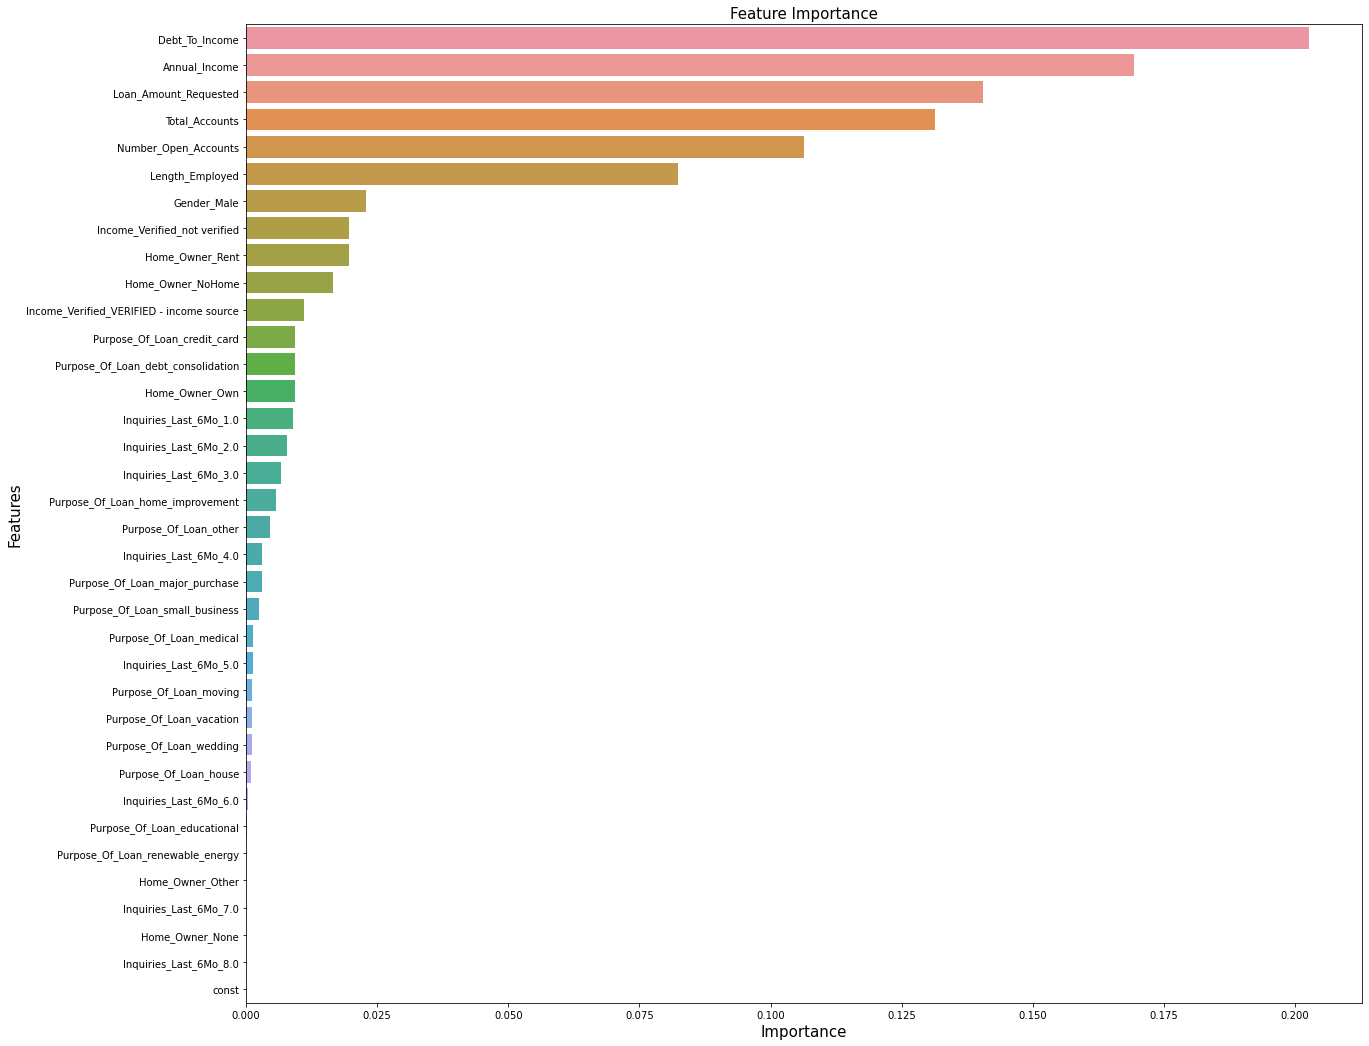

In [113]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': decision_tree.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)
# print the top 10 significant features
print(important_features.head(10))
# create a barplot to visualize the features based on their importance
plt.figure(figsize=(20,18))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### Feature Importances of Decision Tree

In [114]:
x=df_encoded_train[['Debt_To_Income','Annual_Income', 'Loan_Amount_Requested','Total_Accounts','Number_Open_Accounts'] ]
y=df_encoded_train['Interest_Rate']
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(xtrain, ytrain)
print(classification_report(ytrain,decision_tree.predict(xtrain)))
print(classification_report(ytest,decision_tree.predict(xtest)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     27085
         2.0       1.00      1.00      1.00     56562
         3.0       1.00      1.00      1.00     47800

    accuracy                           1.00    131447
   macro avg       1.00      1.00      1.00    131447
weighted avg       1.00      1.00      1.00    131447

              precision    recall  f1-score   support

         1.0       0.30      0.31      0.30      6721
         2.0       0.45      0.45      0.45     14018
         3.0       0.47      0.46      0.47     12123

    accuracy                           0.43     32862
   macro avg       0.41      0.41      0.41     32862
weighted avg       0.43      0.43      0.43     32862



## 3.Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
Random_forest=rf.fit(xtrain,ytrain)
rf_train_pred=Random_forest.predict(xtrain)
print(classification_report(ytrain,rf_train_pred))
rf_test_pred=Random_forest.predict(xtest)
print(classification_report(ytest,rf_test_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     27085
         2.0       1.00      1.00      1.00     56562
         3.0       1.00      1.00      1.00     47800

    accuracy                           1.00    131447
   macro avg       1.00      1.00      1.00    131447
weighted avg       1.00      1.00      1.00    131447

              precision    recall  f1-score   support

         1.0       0.44      0.21      0.28      6721
         2.0       0.48      0.60      0.54     14018
         3.0       0.55      0.55      0.55     12123

    accuracy                           0.50     32862
   macro avg       0.49      0.45      0.46     32862
weighted avg       0.50      0.50      0.49     32862



                        Features  Importance
4                 Debt_To_Income    0.173469
3                  Annual_Income    0.163237
1          Loan_Amount_Requested    0.153761
6                 Total_Accounts    0.136150
5           Number_Open_Accounts    0.116469
2                Length_Employed    0.086351
35                   Gender_Male    0.022902
13  Income_Verified_not verified    0.018506
11               Home_Owner_Rent    0.015201
7              Home_Owner_NoHome    0.015142


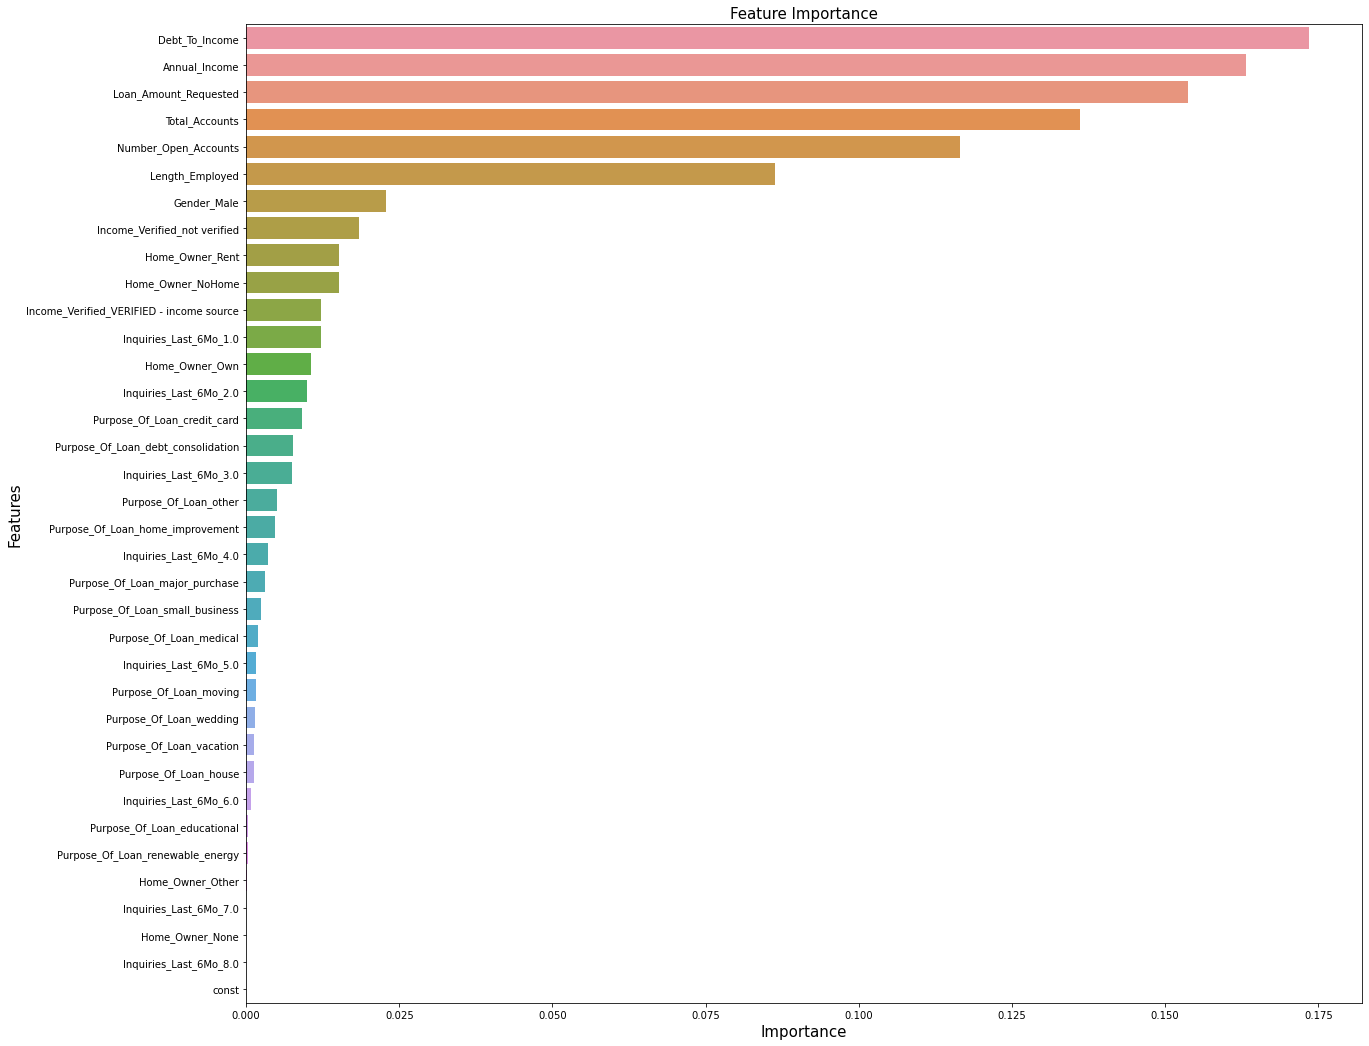

In [116]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': Random_forest.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)
# print the top 10 significant features
print(important_features.head(10))
# create a barplot to visualize the features based on their importance
plt.figure(figsize=(20,18))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### Feature Importances of Random Forest

In [117]:
x=df_encoded_train[['Debt_To_Income',
'Annual_Income',
'Loan_Amount_Requested',
'Total_Accounts',
'Number_Open_Accounts']]
y=df_encoded_train['Interest_Rate']
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)
print(classification_report(y_train,rf_model.predict(x_train)))
print(classification_report(y_test,rf_model.predict(x_test)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     27085
         2.0       1.00      1.00      1.00     56562
         3.0       1.00      1.00      1.00     47800

    accuracy                           1.00    131447
   macro avg       1.00      1.00      1.00    131447
weighted avg       1.00      1.00      1.00    131447

              precision    recall  f1-score   support

         1.0       0.31      0.18      0.23      6721
         2.0       0.45      0.58      0.51     14018
         3.0       0.48      0.43      0.45     12123

    accuracy                           0.44     32862
   macro avg       0.41      0.40      0.40     32862
weighted avg       0.43      0.44      0.43     32862



## 4.Gradient Boosting

In [118]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc=GradientBoostingClassifier()
gbc_model=gbc.fit(xtrain,ytrain)
print(classification_report(ytrain,gbc_model.predict(xtrain)))
print(classification_report(ytest,gbc_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.55      0.15      0.23     27085
         2.0       0.50      0.70      0.58     56562
         3.0       0.59      0.56      0.57     47800

    accuracy                           0.53    131447
   macro avg       0.54      0.47      0.46    131447
weighted avg       0.54      0.53      0.51    131447

              precision    recall  f1-score   support

         1.0       0.50      0.13      0.21      6721
         2.0       0.48      0.68      0.57     14018
         3.0       0.58      0.55      0.56     12123

    accuracy                           0.52     32862
   macro avg       0.52      0.45      0.45     32862
weighted avg       0.52      0.52      0.49     32862



                        Features  Importance
1          Loan_Amount_Requested    0.193210
13  Income_Verified_not verified    0.174224
3                  Annual_Income    0.118677
14   Purpose_Of_Loan_credit_card    0.091885
4                 Debt_To_Income    0.083889
28        Inquiries_Last_6Mo_2.0    0.060134
29        Inquiries_Last_6Mo_3.0    0.058952
27        Inquiries_Last_6Mo_1.0    0.050593
6                 Total_Accounts    0.043920
22         Purpose_Of_Loan_other    0.032405


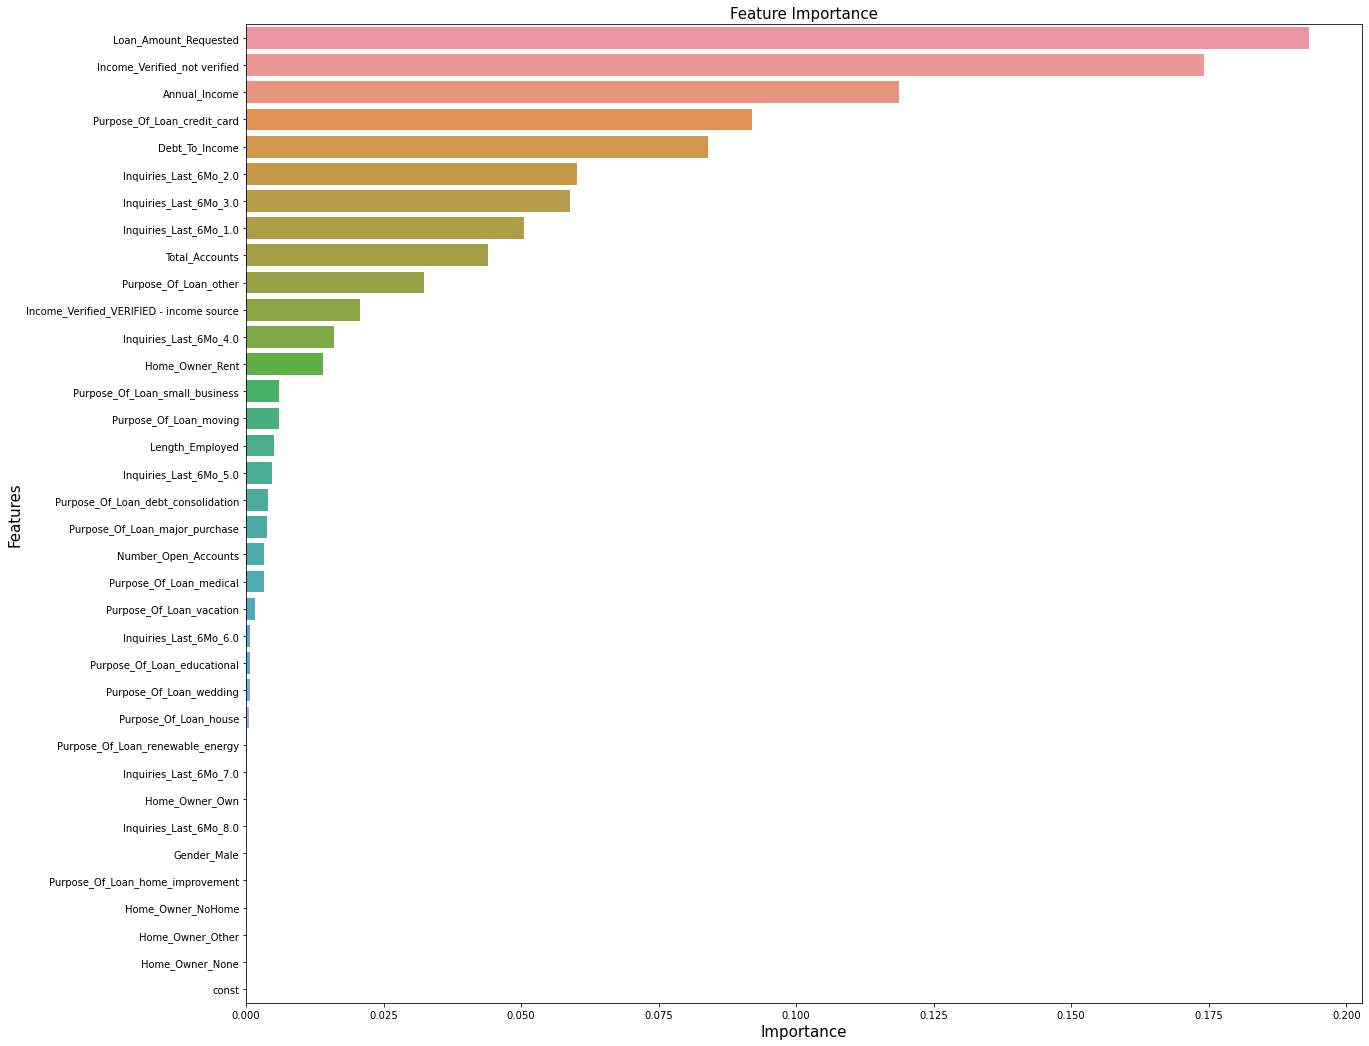

In [119]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': gbc_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)
# print the top 10 significant features
print(important_features.head(10))
# create a barplot to visualize the features based on their importance
plt.figure(figsize=(20,18))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### Feature Importances of Gradient Boosting

In [120]:
x=df_encoded_train[['Loan_Amount_Requested', 
'Income_Verified_not verified',
'Annual_Income',
'Purpose_Of_Loan_credit_card']]
y=df_encoded_train['Interest_Rate']
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
from sklearn.ensemble import GradientBoostingClassifier 
gbc=GradientBoostingClassifier()
gbc_model=gbc.fit(x_train,y_train)
print(classification_report(y_train,gbc_model.predict(x_train)))
print(classification_report(y_test,gbc_model.predict(x_test)))

              precision    recall  f1-score   support

         1.0       0.50      0.09      0.15     27085
         2.0       0.48      0.71      0.57     56562
         3.0       0.55      0.50      0.52     47800

    accuracy                           0.50    131447
   macro avg       0.51      0.43      0.41    131447
weighted avg       0.51      0.50      0.47    131447

              precision    recall  f1-score   support

         1.0       0.47      0.08      0.13      6721
         2.0       0.47      0.70      0.56     14018
         3.0       0.55      0.49      0.52     12123

    accuracy                           0.49     32862
   macro avg       0.49      0.42      0.40     32862
weighted avg       0.50      0.49      0.46     32862



## 5.KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
knn_model=kn.fit(xtrain,ytrain)
print(classification_report(ytrain,knn_model.predict(xtrain)))
print(classification_report(ytest,knn_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.50      0.56      0.53     27085
         2.0       0.61      0.70      0.66     56562
         3.0       0.71      0.54      0.61     47800

    accuracy                           0.61    131447
   macro avg       0.61      0.60      0.60    131447
weighted avg       0.62      0.61      0.61    131447

              precision    recall  f1-score   support

         1.0       0.28      0.31      0.29      6721
         2.0       0.45      0.52      0.48     14018
         3.0       0.50      0.37      0.43     12123

    accuracy                           0.42     32862
   macro avg       0.41      0.40      0.40     32862
weighted avg       0.43      0.42      0.42     32862



## 6.Extra Trees

In [122]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
et_model=et.fit(xtrain,ytrain)
print(classification_report(ytrain,et_model.predict(xtrain)))
print(classification_report(ytest,et_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     27085
         2.0       1.00      1.00      1.00     56562
         3.0       1.00      1.00      1.00     47800

    accuracy                           1.00    131447
   macro avg       1.00      1.00      1.00    131447
weighted avg       1.00      1.00      1.00    131447

              precision    recall  f1-score   support

         1.0       0.41      0.21      0.28      6721
         2.0       0.47      0.58      0.52     14018
         3.0       0.53      0.54      0.53     12123

    accuracy                           0.49     32862
   macro avg       0.47      0.44      0.45     32862
weighted avg       0.48      0.49      0.48     32862



                                    Features  Importance
4                             Debt_To_Income    0.164535
3                              Annual_Income    0.162181
1                      Loan_Amount_Requested    0.154601
6                             Total_Accounts    0.147625
5                       Number_Open_Accounts    0.133946
2                            Length_Employed    0.095826
35                               Gender_Male    0.022618
13              Income_Verified_not verified    0.019079
7                          Home_Owner_NoHome    0.012540
12  Income_Verified_VERIFIED - income source    0.009690


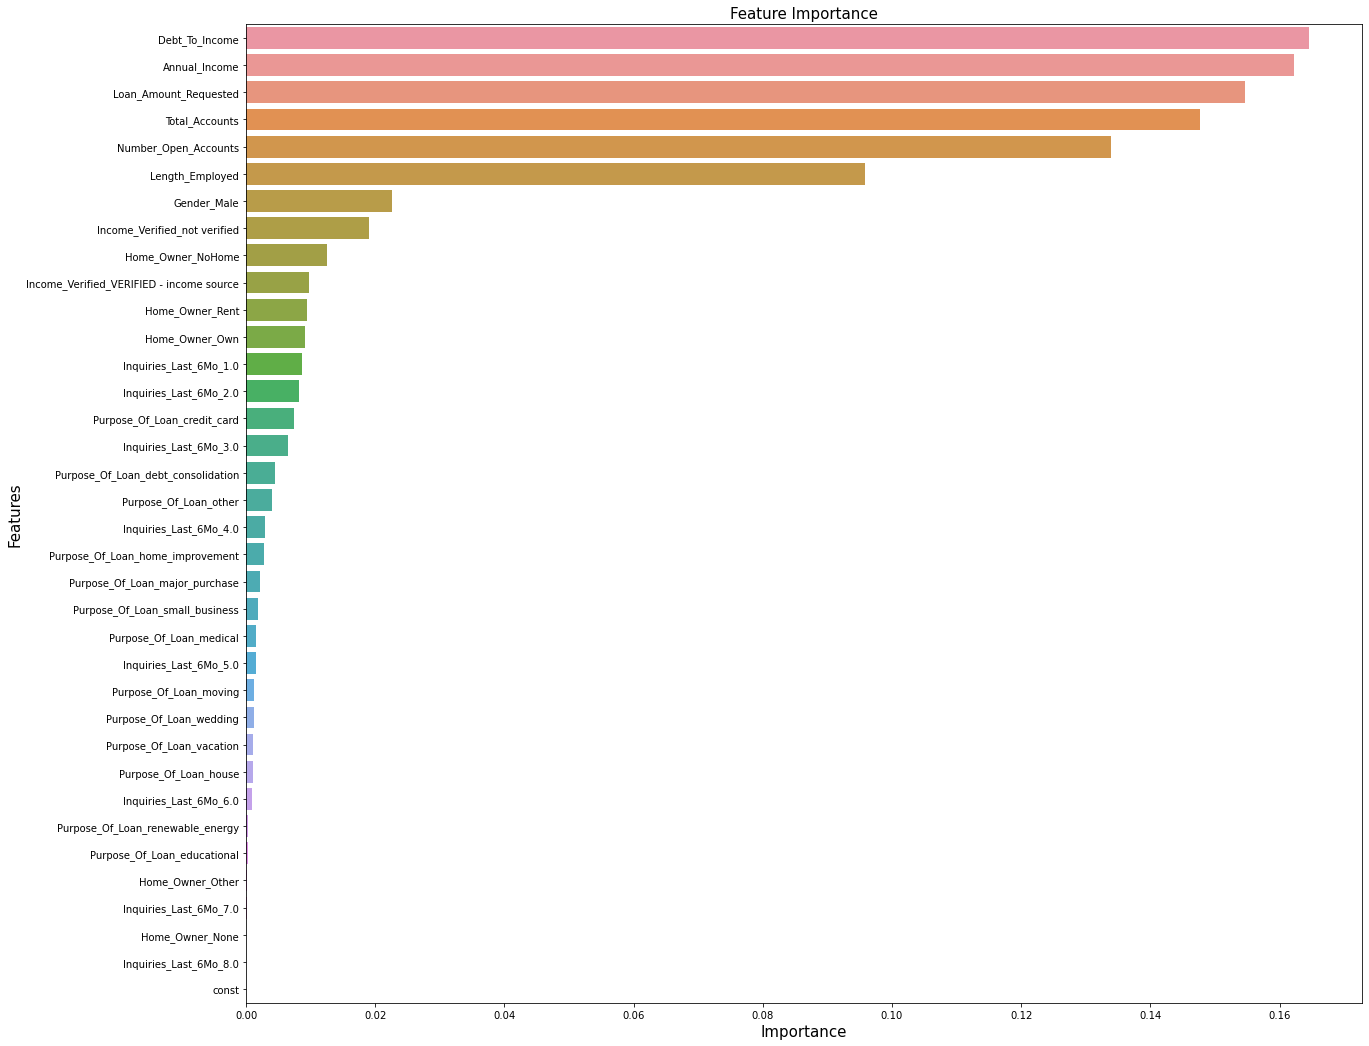

In [123]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': et_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)
# print the top 10 significant features
print(important_features.head(10))
# create a barplot to visualize the features based on their importance
plt.figure(figsize=(20,18))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### Feature Importances of KNN

In [124]:
x=df_encoded_train[['Debt_To_Income',
'Annual_Income',
'Loan_Amount_Requested',
'Total_Accounts',
'Number_Open_Accounts']]
y=df_encoded_train['Interest_Rate']
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
et_model=gbc.fit(x_train,y_train)
print(classification_report(y_train,et_model.predict(x_train)))
print(classification_report(y_test,et_model.predict(x_test)))

              precision    recall  f1-score   support

         1.0       0.45      0.06      0.11     27085
         2.0       0.47      0.76      0.58     56562
         3.0       0.55      0.42      0.48     47800

    accuracy                           0.49    131447
   macro avg       0.49      0.41      0.39    131447
weighted avg       0.50      0.49      0.45    131447

              precision    recall  f1-score   support

         1.0       0.41      0.06      0.10      6721
         2.0       0.46      0.75      0.57     14018
         3.0       0.54      0.41      0.46     12123

    accuracy                           0.48     32862
   macro avg       0.47      0.40      0.38     32862
weighted avg       0.48      0.48      0.43     32862



## 7.Ada Boost

In [125]:
from sklearn.ensemble import  AdaBoostClassifier
ad=AdaBoostClassifier()
ad_model=ad.fit(xtrain,ytrain)
print(classification_report(ytrain,ad_model.predict(xtrain)))
print(classification_report(ytest,ad_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.51      0.17      0.26     27085
         2.0       0.49      0.67      0.57     56562
         3.0       0.58      0.56      0.57     47800

    accuracy                           0.53    131447
   macro avg       0.53      0.47      0.46    131447
weighted avg       0.53      0.53      0.50    131447

              precision    recall  f1-score   support

         1.0       0.49      0.16      0.24      6721
         2.0       0.48      0.66      0.56     14018
         3.0       0.58      0.55      0.56     12123

    accuracy                           0.52     32862
   macro avg       0.52      0.46      0.45     32862
weighted avg       0.52      0.52      0.49     32862



                              Features  Importance
1                Loan_Amount_Requested        0.22
4                       Debt_To_Income        0.14
3                        Annual_Income        0.12
28              Inquiries_Last_6Mo_2.0        0.06
6                       Total_Accounts        0.06
29              Inquiries_Last_6Mo_3.0        0.04
27              Inquiries_Last_6Mo_1.0        0.04
13        Income_Verified_not verified        0.02
15  Purpose_Of_Loan_debt_consolidation        0.02
24      Purpose_Of_Loan_small_business        0.02


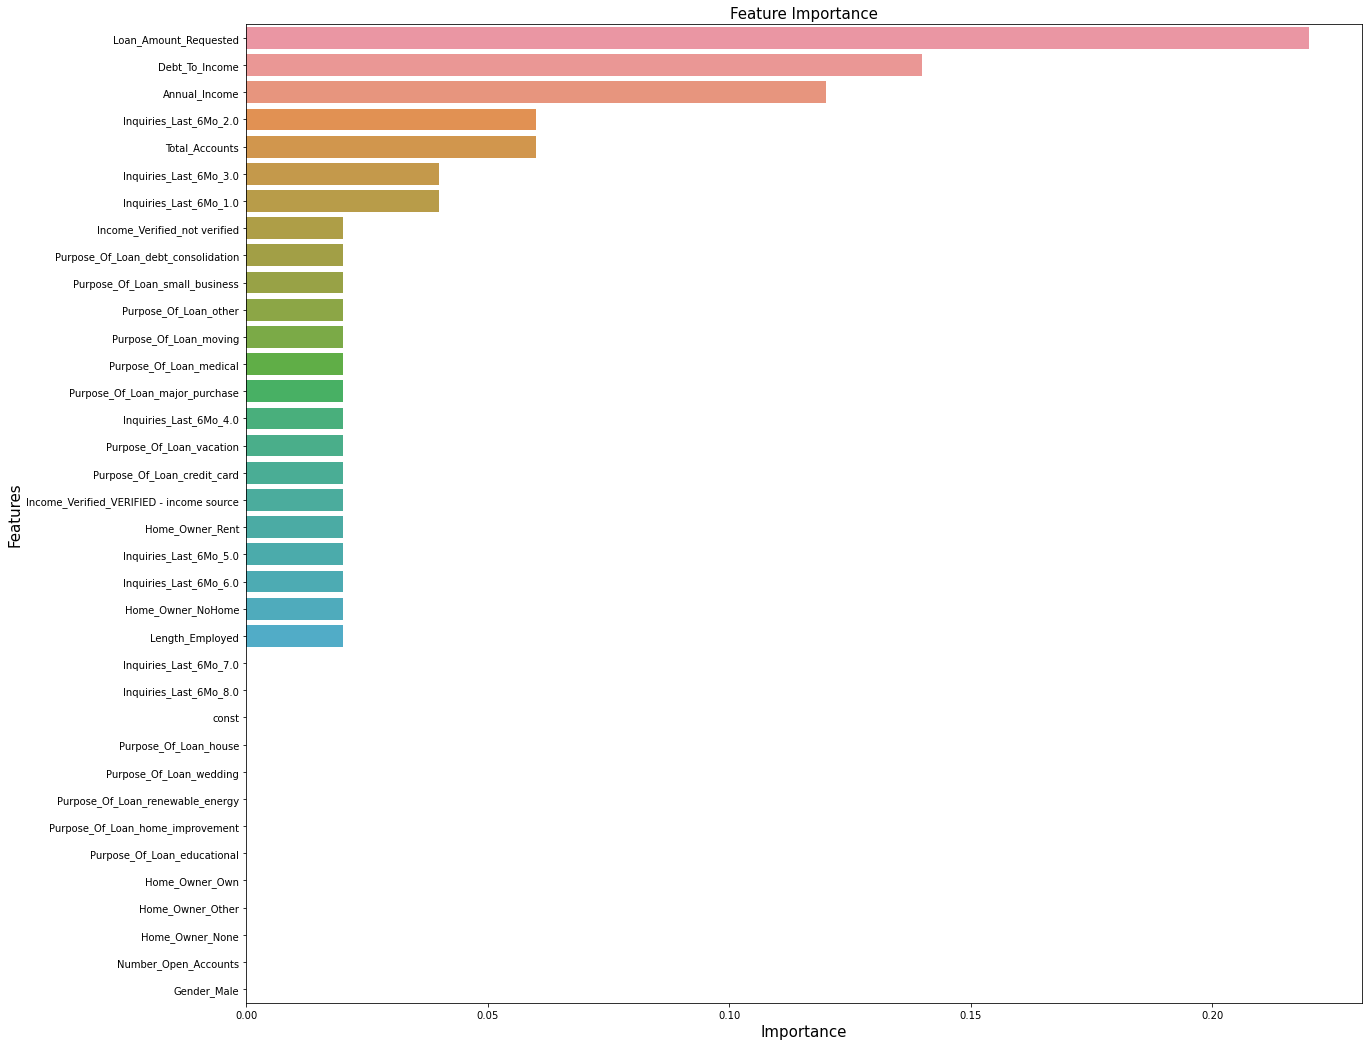

In [126]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': ad_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)
# print the top 10 significant features
print(important_features.head(10))
# create a barplot to visualize the features based on their importance
plt.figure(figsize=(20,18))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### Feature Importances of Ada Boost

In [127]:
x=df_encoded_train[['Loan_Amount_Requested', 
'Debt_To_Income' ,
'Annual_Income' ]]
y=df_encoded_train['Interest_Rate']
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
from sklearn.ensemble import  AdaBoostClassifier
ad=AdaBoostClassifier()
df_model=gbc.fit(x_train,y_train)
print(classification_report(y_train,df_model.predict(x_train)))
print(classification_report(y_test,df_model.predict(x_test)))

              precision    recall  f1-score   support

         1.0       0.45      0.05      0.10     27085
         2.0       0.47      0.77      0.58     56562
         3.0       0.56      0.41      0.47     47800

    accuracy                           0.49    131447
   macro avg       0.49      0.41      0.38    131447
weighted avg       0.50      0.49      0.44    131447

              precision    recall  f1-score   support

         1.0       0.41      0.05      0.08      6721
         2.0       0.46      0.76      0.57     14018
         3.0       0.54      0.40      0.46     12123

    accuracy                           0.48     32862
   macro avg       0.47      0.40      0.37     32862
weighted avg       0.48      0.48      0.43     32862



## 8.Neural Network

In [128]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp_model=mlp.fit(xtrain,ytrain)
print(classification_report(ytrain,mlp_model.predict(xtrain)))
print(classification_report(ytest,mlp_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.63      0.01      0.01     27085
         2.0       0.49      0.64      0.56     56562
         3.0       0.54      0.64      0.59     47800

    accuracy                           0.51    131447
   macro avg       0.55      0.43      0.38    131447
weighted avg       0.54      0.51      0.45    131447

              precision    recall  f1-score   support

         1.0       0.67      0.01      0.01      6721
         2.0       0.48      0.63      0.55     14018
         3.0       0.54      0.64      0.58     12123

    accuracy                           0.51     32862
   macro avg       0.56      0.43      0.38     32862
weighted avg       0.54      0.51      0.45     32862



## 9.SVC

In [129]:
from sklearn.svm import SVC
svc=MLPClassifier()
svc_model=svc.fit(xtrain,ytrain)
print(classification_report(ytrain,svc_model.predict(xtrain)))
print(classification_report(ytest,svc_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.56      0.02      0.04     27085
         2.0       0.50      0.32      0.39     56562
         3.0       0.44      0.86      0.58     47800

    accuracy                           0.46    131447
   macro avg       0.50      0.40      0.34    131447
weighted avg       0.49      0.46      0.39    131447

              precision    recall  f1-score   support

         1.0       0.58      0.02      0.04      6721
         2.0       0.50      0.32      0.39     14018
         3.0       0.44      0.86      0.58     12123

    accuracy                           0.46     32862
   macro avg       0.51      0.40      0.34     32862
weighted avg       0.49      0.46      0.39     32862



## 10.Naive Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB
gnb=MLPClassifier()
gnb_model=gnb.fit(xtrain,ytrain)
print(classification_report(ytrain,gnb_model.predict(xtrain)))
print(classification_report(ytest,gnb_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.27      0.86      0.41     27085
         2.0       0.47      0.00      0.00     56562
         3.0       0.57      0.54      0.55     47800

    accuracy                           0.37    131447
   macro avg       0.44      0.47      0.32    131447
weighted avg       0.47      0.37      0.29    131447

              precision    recall  f1-score   support

         1.0       0.27      0.86      0.41      6721
         2.0       0.48      0.00      0.00     14018
         3.0       0.57      0.54      0.55     12123

    accuracy                           0.38     32862
   macro avg       0.44      0.47      0.32     32862
weighted avg       0.47      0.38      0.29     32862



## 11.Quadratic Discriminant

In [131]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qd=MLPClassifier()
qd_model=qd.fit(xtrain,ytrain)
print(classification_report(ytrain,qd_model.predict(xtrain)))
print(classification_report(ytest,qd_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.57      0.02      0.04     27085
         2.0       0.45      0.94      0.60     56562
         3.0       0.66      0.16      0.25     47800

    accuracy                           0.47    131447
   macro avg       0.56      0.37      0.30    131447
weighted avg       0.55      0.47      0.36    131447

              precision    recall  f1-score   support

         1.0       0.56      0.02      0.04      6721
         2.0       0.44      0.94      0.60     14018
         3.0       0.66      0.16      0.26     12123

    accuracy                           0.46     32862
   macro avg       0.55      0.37      0.30     32862
weighted avg       0.55      0.46      0.36     32862



## 12.Linear Discriminant

In [132]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ld=MLPClassifier()
ld_model=ld.fit(xtrain,ytrain)
print(classification_report(ytrain,ld_model.predict(xtrain)))
print(classification_report(ytest,ld_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.33      0.61      0.43     27085
         2.0       0.52      0.30      0.38     56562
         3.0       0.56      0.58      0.57     47800

    accuracy                           0.47    131447
   macro avg       0.47      0.50      0.46    131447
weighted avg       0.50      0.47      0.46    131447

              precision    recall  f1-score   support

         1.0       0.34      0.61      0.43      6721
         2.0       0.51      0.30      0.38     14018
         3.0       0.56      0.57      0.57     12123

    accuracy                           0.46     32862
   macro avg       0.47      0.49      0.46     32862
weighted avg       0.49      0.46      0.46     32862



## 13.Catboost

In [133]:
from catboost import CatBoostClassifier
cb=CatBoostClassifier()
cb_model=cb.fit(xtrain,ytrain)


Learning rate set to 0.10148
0:	learn: 1.0808215	total: 53.7ms	remaining: 53.6s
1:	learn: 1.0667497	total: 86.8ms	remaining: 43.3s
2:	learn: 1.0542018	total: 122ms	remaining: 40.4s
3:	learn: 1.0442462	total: 154ms	remaining: 38.3s
4:	learn: 1.0352252	total: 194ms	remaining: 38.6s
5:	learn: 1.0278323	total: 229ms	remaining: 38s
6:	learn: 1.0213561	total: 274ms	remaining: 38.8s
7:	learn: 1.0157960	total: 307ms	remaining: 38.1s
8:	learn: 1.0108826	total: 343ms	remaining: 37.8s
9:	learn: 1.0062248	total: 377ms	remaining: 37.4s
10:	learn: 1.0021132	total: 414ms	remaining: 37.3s
11:	learn: 0.9989124	total: 457ms	remaining: 37.6s
12:	learn: 0.9958567	total: 496ms	remaining: 37.7s
13:	learn: 0.9924472	total: 532ms	remaining: 37.5s
14:	learn: 0.9895872	total: 568ms	remaining: 37.3s
15:	learn: 0.9870921	total: 606ms	remaining: 37.2s
16:	learn: 0.9847376	total: 648ms	remaining: 37.5s
17:	learn: 0.9823337	total: 685ms	remaining: 37.4s
18:	learn: 0.9803003	total: 724ms	remaining: 37.4s
19:	learn: 0

162:	learn: 0.9332360	total: 5.77s	remaining: 29.7s
163:	learn: 0.9331047	total: 5.81s	remaining: 29.6s
164:	learn: 0.9330051	total: 5.84s	remaining: 29.6s
165:	learn: 0.9329196	total: 5.87s	remaining: 29.5s
166:	learn: 0.9327977	total: 5.9s	remaining: 29.4s
167:	learn: 0.9327029	total: 5.93s	remaining: 29.4s
168:	learn: 0.9325484	total: 5.96s	remaining: 29.3s
169:	learn: 0.9324629	total: 6s	remaining: 29.3s
170:	learn: 0.9323509	total: 6.03s	remaining: 29.2s
171:	learn: 0.9322302	total: 6.05s	remaining: 29.2s
172:	learn: 0.9321477	total: 6.08s	remaining: 29.1s
173:	learn: 0.9320683	total: 6.12s	remaining: 29s
174:	learn: 0.9319842	total: 6.14s	remaining: 29s
175:	learn: 0.9319103	total: 6.17s	remaining: 28.9s
176:	learn: 0.9318142	total: 6.21s	remaining: 28.9s
177:	learn: 0.9316910	total: 6.24s	remaining: 28.8s
178:	learn: 0.9315860	total: 6.28s	remaining: 28.8s
179:	learn: 0.9314798	total: 6.31s	remaining: 28.7s
180:	learn: 0.9313904	total: 6.34s	remaining: 28.7s
181:	learn: 0.931291

321:	learn: 0.9209051	total: 11.1s	remaining: 23.4s
322:	learn: 0.9207837	total: 11.1s	remaining: 23.3s
323:	learn: 0.9207458	total: 11.2s	remaining: 23.3s
324:	learn: 0.9206584	total: 11.2s	remaining: 23.3s
325:	learn: 0.9206277	total: 11.2s	remaining: 23.2s
326:	learn: 0.9205955	total: 11.3s	remaining: 23.2s
327:	learn: 0.9205136	total: 11.3s	remaining: 23.1s
328:	learn: 0.9204284	total: 11.3s	remaining: 23.1s
329:	learn: 0.9203325	total: 11.4s	remaining: 23.1s
330:	learn: 0.9202495	total: 11.4s	remaining: 23s
331:	learn: 0.9201785	total: 11.4s	remaining: 23s
332:	learn: 0.9201127	total: 11.5s	remaining: 22.9s
333:	learn: 0.9200312	total: 11.5s	remaining: 22.9s
334:	learn: 0.9199713	total: 11.5s	remaining: 22.9s
335:	learn: 0.9199086	total: 11.6s	remaining: 22.8s
336:	learn: 0.9198816	total: 11.6s	remaining: 22.8s
337:	learn: 0.9198023	total: 11.6s	remaining: 22.7s
338:	learn: 0.9197321	total: 11.6s	remaining: 22.7s
339:	learn: 0.9196598	total: 11.7s	remaining: 22.7s
340:	learn: 0.91

484:	learn: 0.9116742	total: 16.5s	remaining: 17.5s
485:	learn: 0.9116188	total: 16.5s	remaining: 17.5s
486:	learn: 0.9115918	total: 16.6s	remaining: 17.4s
487:	learn: 0.9115326	total: 16.6s	remaining: 17.4s
488:	learn: 0.9114914	total: 16.6s	remaining: 17.4s
489:	learn: 0.9114555	total: 16.7s	remaining: 17.3s
490:	learn: 0.9114170	total: 16.7s	remaining: 17.3s
491:	learn: 0.9113774	total: 16.7s	remaining: 17.3s
492:	learn: 0.9113413	total: 16.8s	remaining: 17.2s
493:	learn: 0.9112854	total: 16.8s	remaining: 17.2s
494:	learn: 0.9112211	total: 16.8s	remaining: 17.2s
495:	learn: 0.9111594	total: 16.9s	remaining: 17.1s
496:	learn: 0.9111126	total: 16.9s	remaining: 17.1s
497:	learn: 0.9110767	total: 16.9s	remaining: 17.1s
498:	learn: 0.9110316	total: 17s	remaining: 17s
499:	learn: 0.9109611	total: 17s	remaining: 17s
500:	learn: 0.9108946	total: 17s	remaining: 17s
501:	learn: 0.9108421	total: 17.1s	remaining: 16.9s
502:	learn: 0.9107674	total: 17.1s	remaining: 16.9s
503:	learn: 0.9106966	to

648:	learn: 0.9032885	total: 22s	remaining: 11.9s
649:	learn: 0.9032320	total: 22s	remaining: 11.9s
650:	learn: 0.9031873	total: 22.1s	remaining: 11.8s
651:	learn: 0.9031376	total: 22.1s	remaining: 11.8s
652:	learn: 0.9030874	total: 22.1s	remaining: 11.8s
653:	learn: 0.9030549	total: 22.2s	remaining: 11.7s
654:	learn: 0.9029858	total: 22.2s	remaining: 11.7s
655:	learn: 0.9029288	total: 22.2s	remaining: 11.7s
656:	learn: 0.9028933	total: 22.3s	remaining: 11.6s
657:	learn: 0.9028587	total: 22.3s	remaining: 11.6s
658:	learn: 0.9028399	total: 22.3s	remaining: 11.6s
659:	learn: 0.9028145	total: 22.4s	remaining: 11.5s
660:	learn: 0.9027727	total: 22.4s	remaining: 11.5s
661:	learn: 0.9027097	total: 22.4s	remaining: 11.5s
662:	learn: 0.9026509	total: 22.5s	remaining: 11.4s
663:	learn: 0.9025870	total: 22.5s	remaining: 11.4s
664:	learn: 0.9025499	total: 22.5s	remaining: 11.4s
665:	learn: 0.9025120	total: 22.6s	remaining: 11.3s
666:	learn: 0.9024363	total: 22.6s	remaining: 11.3s
667:	learn: 0.90

807:	learn: 0.8959225	total: 27.4s	remaining: 6.51s
808:	learn: 0.8958601	total: 27.4s	remaining: 6.47s
809:	learn: 0.8958021	total: 27.4s	remaining: 6.44s
810:	learn: 0.8957463	total: 27.5s	remaining: 6.4s
811:	learn: 0.8956905	total: 27.5s	remaining: 6.37s
812:	learn: 0.8956350	total: 27.5s	remaining: 6.33s
813:	learn: 0.8956009	total: 27.6s	remaining: 6.3s
814:	learn: 0.8955663	total: 27.6s	remaining: 6.27s
815:	learn: 0.8955192	total: 27.6s	remaining: 6.23s
816:	learn: 0.8954887	total: 27.7s	remaining: 6.2s
817:	learn: 0.8954468	total: 27.7s	remaining: 6.16s
818:	learn: 0.8953675	total: 27.7s	remaining: 6.13s
819:	learn: 0.8953034	total: 27.8s	remaining: 6.09s
820:	learn: 0.8952522	total: 27.8s	remaining: 6.06s
821:	learn: 0.8952123	total: 27.8s	remaining: 6.03s
822:	learn: 0.8951743	total: 27.9s	remaining: 5.99s
823:	learn: 0.8951226	total: 27.9s	remaining: 5.96s
824:	learn: 0.8951007	total: 27.9s	remaining: 5.92s
825:	learn: 0.8950361	total: 27.9s	remaining: 5.89s
826:	learn: 0.8

969:	learn: 0.8890665	total: 32.8s	remaining: 1.01s
970:	learn: 0.8890087	total: 32.8s	remaining: 980ms
971:	learn: 0.8889646	total: 32.9s	remaining: 947ms
972:	learn: 0.8889344	total: 32.9s	remaining: 913ms
973:	learn: 0.8888938	total: 32.9s	remaining: 879ms
974:	learn: 0.8888449	total: 33s	remaining: 845ms
975:	learn: 0.8887801	total: 33s	remaining: 812ms
976:	learn: 0.8887333	total: 33s	remaining: 778ms
977:	learn: 0.8887026	total: 33.1s	remaining: 744ms
978:	learn: 0.8886576	total: 33.1s	remaining: 710ms
979:	learn: 0.8886293	total: 33.1s	remaining: 676ms
980:	learn: 0.8885564	total: 33.2s	remaining: 642ms
981:	learn: 0.8884995	total: 33.2s	remaining: 609ms
982:	learn: 0.8884634	total: 33.2s	remaining: 575ms
983:	learn: 0.8884269	total: 33.3s	remaining: 541ms
984:	learn: 0.8884197	total: 33.3s	remaining: 507ms
985:	learn: 0.8883797	total: 33.3s	remaining: 473ms
986:	learn: 0.8883416	total: 33.4s	remaining: 439ms
987:	learn: 0.8883112	total: 33.4s	remaining: 406ms
988:	learn: 0.8882

In [134]:
print(classification_report(ytrain,cb_model.predict(xtrain)))
print(classification_report(ytest,cb_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.59      0.25      0.36     27085
         2.0       0.53      0.69      0.60     56562
         3.0       0.63      0.61      0.62     47800

    accuracy                           0.57    131447
   macro avg       0.59      0.52      0.53    131447
weighted avg       0.58      0.57      0.56    131447

              precision    recall  f1-score   support

         1.0       0.51      0.21      0.30      6721
         2.0       0.50      0.65      0.56     14018
         3.0       0.59      0.57      0.58     12123

    accuracy                           0.53     32862
   macro avg       0.53      0.48      0.48     32862
weighted avg       0.53      0.53      0.52     32862



                        Features  Importance
1          Loan_Amount_Requested   20.528214
3                  Annual_Income   13.559270
4                 Debt_To_Income   11.008006
6                 Total_Accounts    8.274897
13  Income_Verified_not verified    7.363556
5           Number_Open_Accounts    5.146186
28        Inquiries_Last_6Mo_2.0    4.473156
14   Purpose_Of_Loan_credit_card    4.183114
27        Inquiries_Last_6Mo_1.0    3.969855
2                Length_Employed    3.919607


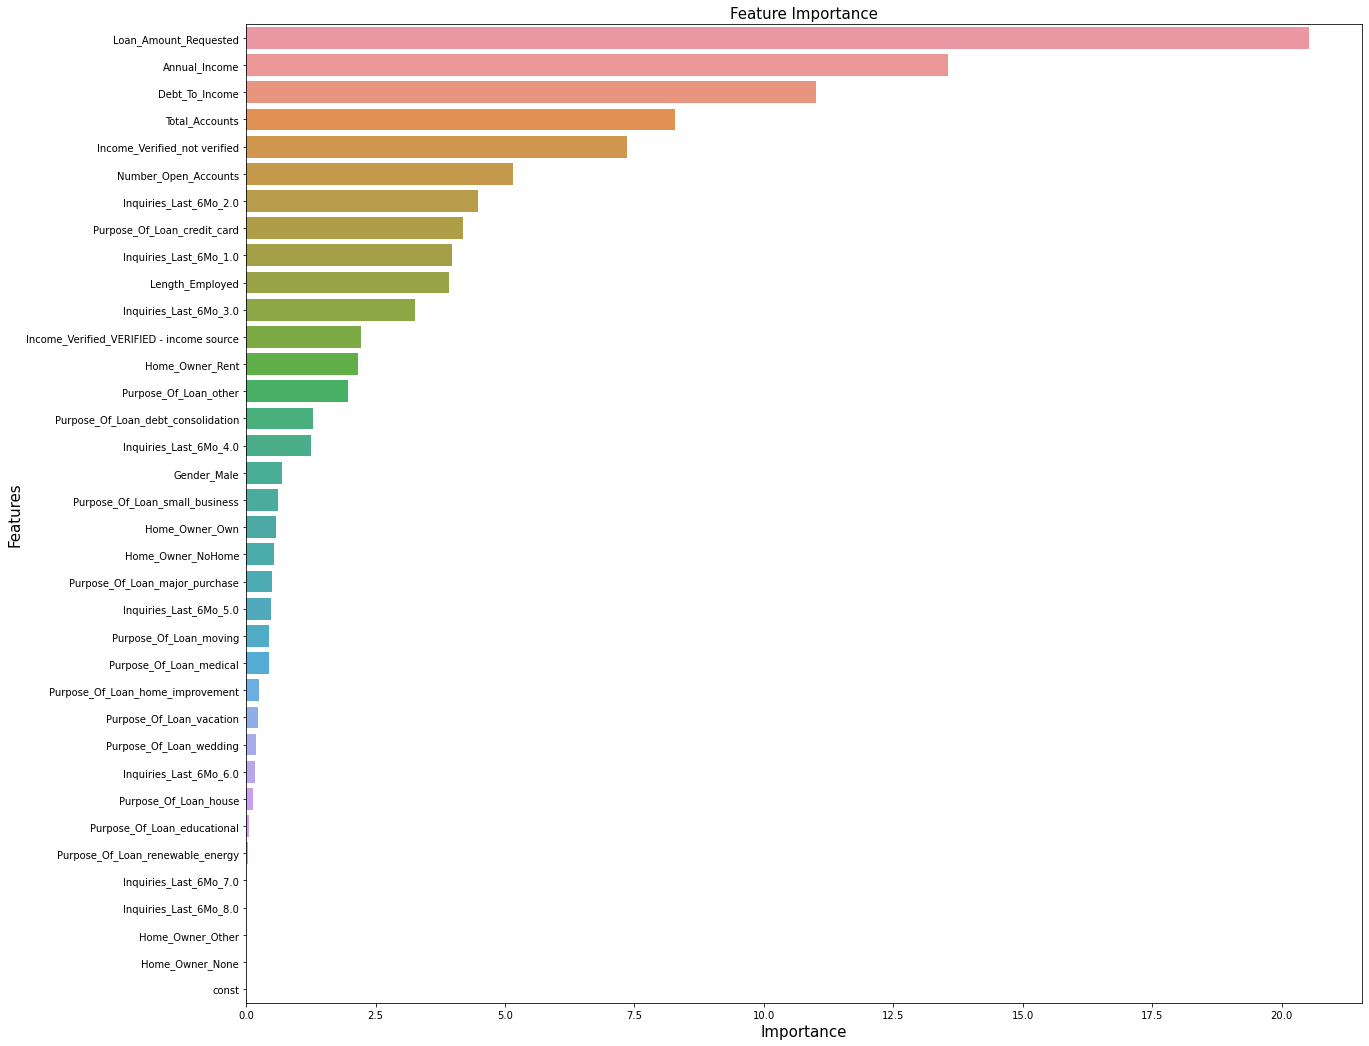

In [135]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': cb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)
# print the top 10 significant features
print(important_features.head(10))
# create a barplot to visualize the features based on their importance
plt.figure(figsize=(20,18))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

## 14.Light Gradient Boost 

In [136]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
lbg_model=lgb.fit(xtrain,ytrain)

In [137]:
print(classification_report(ytrain,lbg_model.predict(xtrain)))
print(classification_report(ytest,lbg_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.56      0.23      0.33     27085
         2.0       0.52      0.67      0.59     56562
         3.0       0.61      0.60      0.60     47800

    accuracy                           0.56    131447
   macro avg       0.56      0.50      0.51    131447
weighted avg       0.56      0.56      0.54    131447

              precision    recall  f1-score   support

         1.0       0.51      0.20      0.29      6721
         2.0       0.50      0.65      0.56     14018
         3.0       0.59      0.58      0.58     12123

    accuracy                           0.53     32862
   macro avg       0.53      0.47      0.48     32862
weighted avg       0.53      0.53      0.51     32862



## Hyper Parmeters Tunning on top 4 models

1. Light Gradient Boosting

2. Ada Boost

3. Linear Discriminant

4. Cat Boost


### Light Gradient Boosting

In [144]:
from lightgbm import LGBMClassifier
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'num_leaves': [31, 63, 127]
}
lgbm = LGBMClassifier()
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5)
grid_search.fit(xtrain, ytrain)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 4, 'num_leaves': 31}


In [147]:
#set the best hyperparameters obtained from grid search
lgbm = LGBMClassifier(learning_rate=0.3,max_depth=4,num_leaves=31)
# use fit() to fit the model on the train set
lgbm_model=lgbm.fit(xtrain,ytrain)
print(classification_report(ytrain,lgbm_model.predict(xtrain)))
print(classification_report(ytest,lgbm_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.55      0.23      0.32     27085
         2.0       0.52      0.68      0.59     56562
         3.0       0.61      0.59      0.60     47800

    accuracy                           0.56    131447
   macro avg       0.56      0.50      0.51    131447
weighted avg       0.56      0.56      0.54    131447

              precision    recall  f1-score   support

         1.0       0.50      0.20      0.29      6721
         2.0       0.49      0.65      0.56     14018
         3.0       0.59      0.57      0.58     12123

    accuracy                           0.53     32862
   macro avg       0.53      0.47      0.48     32862
weighted avg       0.53      0.53      0.51     32862



### Ada Boost

In [140]:
params = {'n_estimators': [50, 100, 200], 
          'learning_rate': [0.01, 0.1, 1]}
ada = AdaBoostClassifier()
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=ada, param_grid=params, cv=5)
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 1, 'n_estimators': 200}


In [143]:
#set the best hyperparameters obtained from grid search
ad = AdaBoostClassifier(n_estimators=1,learning_rate=200)

# use fit() to fit the model on the train set
ad_model = ad.fit(xtrain, ytrain)
print(classification_report(ytrain,ad_model.predict(xtrain)))
print(classification_report(ytest,ad_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     27085
         2.0       0.48      0.35      0.41     56562
         3.0       0.43      0.80      0.56     47800

    accuracy                           0.44    131447
   macro avg       0.30      0.38      0.32    131447
weighted avg       0.36      0.44      0.38    131447

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      6721
         2.0       0.48      0.35      0.41     14018
         3.0       0.43      0.80      0.56     12123

    accuracy                           0.45     32862
   macro avg       0.30      0.38      0.32     32862
weighted avg       0.36      0.45      0.38     32862



### Linear Discriminant

In [148]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
param_grid = {'solver': ['svd', 'lsqr', 'eigen']}
# perform grid search with 5-fold cross validation
grid = GridSearchCV(LDA, param_grid=param_grid, cv=5)
grid.fit(xtrain, ytrain)
print("Best Hyperparameters:", grid.best_params_)

Best Hyperparameters: {'solver': 'svd'}


In [149]:
#set the best hyperparameters obtained from grid search
LDA = LinearDiscriminantAnalysis(solver='svd')
# use fit() to fit the model on the train set
LDA_model=LDA.fit(xtrain,ytrain)
print(classification_report(ytrain,LDA_model.predict(xtrain)))
print(classification_report(ytest,LDA_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.51      0.15      0.24     27085
         2.0       0.49      0.67      0.57     56562
         3.0       0.57      0.54      0.56     47800

    accuracy                           0.52    131447
   macro avg       0.53      0.46      0.45    131447
weighted avg       0.52      0.52      0.50    131447

              precision    recall  f1-score   support

         1.0       0.49      0.14      0.22      6721
         2.0       0.48      0.66      0.56     14018
         3.0       0.57      0.54      0.56     12123

    accuracy                           0.51     32862
   macro avg       0.51      0.45      0.44     32862
weighted avg       0.52      0.51      0.49     32862



### Catboost

In [194]:
from catboost import CatBoostClassifier
cb=CatBoostClassifier()
cb_model=cb.fit(xtrain,ytrain)
parameter={'depth':[6,8,9],'learning_rate':[0.01,0.05,0.10],'iterations':[300,500]}
grid=GridSearchCV(estimator=cb_model,param_grid=parameter,cv=3)
grid.fit(xtrain,ytrain)
print("The best parameters across All searched params:/n",grid.best_params_)

Learning rate set to 0.10148
0:	learn: 1.0808215	total: 31.4ms	remaining: 31.4s
1:	learn: 1.0667497	total: 59ms	remaining: 29.5s
2:	learn: 1.0542018	total: 84.2ms	remaining: 28s
3:	learn: 1.0442462	total: 108ms	remaining: 26.9s
4:	learn: 1.0352252	total: 133ms	remaining: 26.5s
5:	learn: 1.0278323	total: 158ms	remaining: 26.1s
6:	learn: 1.0213561	total: 183ms	remaining: 25.9s
7:	learn: 1.0157960	total: 212ms	remaining: 26.3s
8:	learn: 1.0108826	total: 238ms	remaining: 26.2s
9:	learn: 1.0062248	total: 262ms	remaining: 25.9s
10:	learn: 1.0021132	total: 286ms	remaining: 25.7s
11:	learn: 0.9989124	total: 310ms	remaining: 25.5s
12:	learn: 0.9958567	total: 333ms	remaining: 25.3s
13:	learn: 0.9924472	total: 356ms	remaining: 25.1s
14:	learn: 0.9895872	total: 380ms	remaining: 25s
15:	learn: 0.9870921	total: 405ms	remaining: 24.9s
16:	learn: 0.9847376	total: 435ms	remaining: 25.1s
17:	learn: 0.9823337	total: 459ms	remaining: 25s
18:	learn: 0.9803003	total: 481ms	remaining: 24.8s
19:	learn: 0.9786

161:	learn: 0.9333128	total: 4.07s	remaining: 21.1s
162:	learn: 0.9332360	total: 4.1s	remaining: 21s
163:	learn: 0.9331047	total: 4.12s	remaining: 21s
164:	learn: 0.9330051	total: 4.14s	remaining: 21s
165:	learn: 0.9329196	total: 4.17s	remaining: 20.9s
166:	learn: 0.9327977	total: 4.19s	remaining: 20.9s
167:	learn: 0.9327029	total: 4.21s	remaining: 20.9s
168:	learn: 0.9325484	total: 4.24s	remaining: 20.8s
169:	learn: 0.9324629	total: 4.26s	remaining: 20.8s
170:	learn: 0.9323509	total: 4.29s	remaining: 20.8s
171:	learn: 0.9322302	total: 4.31s	remaining: 20.7s
172:	learn: 0.9321477	total: 4.33s	remaining: 20.7s
173:	learn: 0.9320683	total: 4.35s	remaining: 20.6s
174:	learn: 0.9319842	total: 4.37s	remaining: 20.6s
175:	learn: 0.9319103	total: 4.39s	remaining: 20.6s
176:	learn: 0.9318142	total: 4.41s	remaining: 20.5s
177:	learn: 0.9316910	total: 4.43s	remaining: 20.5s
178:	learn: 0.9315860	total: 4.46s	remaining: 20.5s
179:	learn: 0.9314798	total: 4.48s	remaining: 20.4s
180:	learn: 0.93139

327:	learn: 0.9205136	total: 8.01s	remaining: 16.4s
328:	learn: 0.9204284	total: 8.03s	remaining: 16.4s
329:	learn: 0.9203325	total: 8.06s	remaining: 16.4s
330:	learn: 0.9202495	total: 8.08s	remaining: 16.3s
331:	learn: 0.9201785	total: 8.1s	remaining: 16.3s
332:	learn: 0.9201127	total: 8.13s	remaining: 16.3s
333:	learn: 0.9200312	total: 8.15s	remaining: 16.2s
334:	learn: 0.9199713	total: 8.17s	remaining: 16.2s
335:	learn: 0.9199086	total: 8.19s	remaining: 16.2s
336:	learn: 0.9198816	total: 8.22s	remaining: 16.2s
337:	learn: 0.9198023	total: 8.24s	remaining: 16.1s
338:	learn: 0.9197321	total: 8.26s	remaining: 16.1s
339:	learn: 0.9196598	total: 8.29s	remaining: 16.1s
340:	learn: 0.9196108	total: 8.31s	remaining: 16.1s
341:	learn: 0.9195316	total: 8.33s	remaining: 16s
342:	learn: 0.9194509	total: 8.36s	remaining: 16s
343:	learn: 0.9193748	total: 8.38s	remaining: 16s
344:	learn: 0.9193430	total: 8.4s	remaining: 15.9s
345:	learn: 0.9192837	total: 8.42s	remaining: 15.9s
346:	learn: 0.919246

489:	learn: 0.9114555	total: 11.9s	remaining: 12.4s
490:	learn: 0.9114170	total: 11.9s	remaining: 12.3s
491:	learn: 0.9113774	total: 11.9s	remaining: 12.3s
492:	learn: 0.9113413	total: 11.9s	remaining: 12.3s
493:	learn: 0.9112854	total: 12s	remaining: 12.3s
494:	learn: 0.9112211	total: 12s	remaining: 12.2s
495:	learn: 0.9111594	total: 12s	remaining: 12.2s
496:	learn: 0.9111126	total: 12s	remaining: 12.2s
497:	learn: 0.9110767	total: 12.1s	remaining: 12.2s
498:	learn: 0.9110316	total: 12.1s	remaining: 12.1s
499:	learn: 0.9109611	total: 12.1s	remaining: 12.1s
500:	learn: 0.9108946	total: 12.2s	remaining: 12.1s
501:	learn: 0.9108421	total: 12.2s	remaining: 12.1s
502:	learn: 0.9107674	total: 12.2s	remaining: 12.1s
503:	learn: 0.9106966	total: 12.3s	remaining: 12.1s
504:	learn: 0.9106576	total: 12.3s	remaining: 12s
505:	learn: 0.9105995	total: 12.3s	remaining: 12s
506:	learn: 0.9105515	total: 12.3s	remaining: 12s
507:	learn: 0.9104782	total: 12.4s	remaining: 12s
508:	learn: 0.9103944	total:

654:	learn: 0.9029858	total: 16s	remaining: 8.45s
655:	learn: 0.9029288	total: 16.1s	remaining: 8.43s
656:	learn: 0.9028933	total: 16.1s	remaining: 8.4s
657:	learn: 0.9028587	total: 16.1s	remaining: 8.38s
658:	learn: 0.9028399	total: 16.1s	remaining: 8.35s
659:	learn: 0.9028145	total: 16.2s	remaining: 8.33s
660:	learn: 0.9027727	total: 16.2s	remaining: 8.3s
661:	learn: 0.9027097	total: 16.2s	remaining: 8.28s
662:	learn: 0.9026509	total: 16.2s	remaining: 8.25s
663:	learn: 0.9025870	total: 16.3s	remaining: 8.23s
664:	learn: 0.9025499	total: 16.3s	remaining: 8.2s
665:	learn: 0.9025120	total: 16.3s	remaining: 8.18s
666:	learn: 0.9024363	total: 16.3s	remaining: 8.15s
667:	learn: 0.9023846	total: 16.4s	remaining: 8.13s
668:	learn: 0.9023534	total: 16.4s	remaining: 8.1s
669:	learn: 0.9022969	total: 16.4s	remaining: 8.08s
670:	learn: 0.9022435	total: 16.4s	remaining: 8.05s
671:	learn: 0.9022062	total: 16.4s	remaining: 8.03s
672:	learn: 0.9021720	total: 16.5s	remaining: 8s
673:	learn: 0.9021094

813:	learn: 0.8956009	total: 19.9s	remaining: 4.55s
814:	learn: 0.8955663	total: 19.9s	remaining: 4.53s
815:	learn: 0.8955192	total: 20s	remaining: 4.5s
816:	learn: 0.8954887	total: 20s	remaining: 4.47s
817:	learn: 0.8954468	total: 20s	remaining: 4.45s
818:	learn: 0.8953675	total: 20s	remaining: 4.43s
819:	learn: 0.8953034	total: 20.1s	remaining: 4.4s
820:	learn: 0.8952522	total: 20.1s	remaining: 4.38s
821:	learn: 0.8952123	total: 20.1s	remaining: 4.35s
822:	learn: 0.8951743	total: 20.1s	remaining: 4.33s
823:	learn: 0.8951226	total: 20.1s	remaining: 4.3s
824:	learn: 0.8951007	total: 20.2s	remaining: 4.28s
825:	learn: 0.8950361	total: 20.2s	remaining: 4.25s
826:	learn: 0.8949997	total: 20.2s	remaining: 4.23s
827:	learn: 0.8949649	total: 20.2s	remaining: 4.2s
828:	learn: 0.8949215	total: 20.3s	remaining: 4.18s
829:	learn: 0.8949035	total: 20.3s	remaining: 4.15s
830:	learn: 0.8948498	total: 20.3s	remaining: 4.13s
831:	learn: 0.8948048	total: 20.3s	remaining: 4.1s
832:	learn: 0.8947806	tot

976:	learn: 0.8887333	total: 24.1s	remaining: 568ms
977:	learn: 0.8887026	total: 24.1s	remaining: 543ms
978:	learn: 0.8886576	total: 24.2s	remaining: 519ms
979:	learn: 0.8886293	total: 24.2s	remaining: 494ms
980:	learn: 0.8885564	total: 24.2s	remaining: 469ms
981:	learn: 0.8884995	total: 24.2s	remaining: 444ms
982:	learn: 0.8884634	total: 24.3s	remaining: 420ms
983:	learn: 0.8884269	total: 24.3s	remaining: 395ms
984:	learn: 0.8884197	total: 24.3s	remaining: 370ms
985:	learn: 0.8883797	total: 24.3s	remaining: 346ms
986:	learn: 0.8883416	total: 24.4s	remaining: 321ms
987:	learn: 0.8883112	total: 24.4s	remaining: 296ms
988:	learn: 0.8882662	total: 24.4s	remaining: 271ms
989:	learn: 0.8882452	total: 24.4s	remaining: 247ms
990:	learn: 0.8881895	total: 24.4s	remaining: 222ms
991:	learn: 0.8881475	total: 24.5s	remaining: 197ms
992:	learn: 0.8881160	total: 24.5s	remaining: 173ms
993:	learn: 0.8880646	total: 24.5s	remaining: 148ms
994:	learn: 0.8880248	total: 24.5s	remaining: 123ms
995:	learn: 

138:	learn: 0.9941358	total: 2.37s	remaining: 2.75s
139:	learn: 0.9938784	total: 2.39s	remaining: 2.74s
140:	learn: 0.9935885	total: 2.41s	remaining: 2.72s
141:	learn: 0.9933310	total: 2.43s	remaining: 2.7s
142:	learn: 0.9930713	total: 2.45s	remaining: 2.69s
143:	learn: 0.9927930	total: 2.46s	remaining: 2.67s
144:	learn: 0.9924672	total: 2.48s	remaining: 2.65s
145:	learn: 0.9921582	total: 2.5s	remaining: 2.63s
146:	learn: 0.9919011	total: 2.51s	remaining: 2.62s
147:	learn: 0.9916130	total: 2.53s	remaining: 2.6s
148:	learn: 0.9913281	total: 2.55s	remaining: 2.58s
149:	learn: 0.9910108	total: 2.56s	remaining: 2.56s
150:	learn: 0.9907594	total: 2.58s	remaining: 2.55s
151:	learn: 0.9904802	total: 2.6s	remaining: 2.53s
152:	learn: 0.9902254	total: 2.62s	remaining: 2.52s
153:	learn: 0.9899678	total: 2.64s	remaining: 2.5s
154:	learn: 0.9896877	total: 2.65s	remaining: 2.48s
155:	learn: 0.9894450	total: 2.67s	remaining: 2.46s
156:	learn: 0.9892102	total: 2.69s	remaining: 2.45s
157:	learn: 0.988

0:	learn: 1.0968083	total: 21.2ms	remaining: 6.35s
1:	learn: 1.0950827	total: 41.6ms	remaining: 6.2s
2:	learn: 1.0934093	total: 63.5ms	remaining: 6.28s
3:	learn: 1.0917388	total: 84.2ms	remaining: 6.23s
4:	learn: 1.0901584	total: 105ms	remaining: 6.18s
5:	learn: 1.0886087	total: 126ms	remaining: 6.17s
6:	learn: 1.0870327	total: 145ms	remaining: 6.08s
7:	learn: 1.0854692	total: 161ms	remaining: 5.88s
8:	learn: 1.0839491	total: 177ms	remaining: 5.71s
9:	learn: 1.0824060	total: 193ms	remaining: 5.59s
10:	learn: 1.0808443	total: 209ms	remaining: 5.49s
11:	learn: 1.0793660	total: 229ms	remaining: 5.49s
12:	learn: 1.0779041	total: 245ms	remaining: 5.4s
13:	learn: 1.0765312	total: 261ms	remaining: 5.33s
14:	learn: 1.0751732	total: 281ms	remaining: 5.33s
15:	learn: 1.0737108	total: 297ms	remaining: 5.27s
16:	learn: 1.0724039	total: 313ms	remaining: 5.21s
17:	learn: 1.0710920	total: 329ms	remaining: 5.15s
18:	learn: 1.0697796	total: 345ms	remaining: 5.1s
19:	learn: 1.0685562	total: 361ms	remain

171:	learn: 0.9850265	total: 2.92s	remaining: 2.17s
172:	learn: 0.9848227	total: 2.94s	remaining: 2.16s
173:	learn: 0.9845812	total: 2.96s	remaining: 2.14s
174:	learn: 0.9843119	total: 2.97s	remaining: 2.12s
175:	learn: 0.9840966	total: 2.99s	remaining: 2.1s
176:	learn: 0.9838302	total: 3s	remaining: 2.09s
177:	learn: 0.9836152	total: 3.02s	remaining: 2.07s
178:	learn: 0.9833679	total: 3.04s	remaining: 2.05s
179:	learn: 0.9831579	total: 3.05s	remaining: 2.04s
180:	learn: 0.9829679	total: 3.07s	remaining: 2.02s
181:	learn: 0.9827637	total: 3.09s	remaining: 2s
182:	learn: 0.9825617	total: 3.1s	remaining: 1.99s
183:	learn: 0.9823559	total: 3.13s	remaining: 1.97s
184:	learn: 0.9820934	total: 3.14s	remaining: 1.95s
185:	learn: 0.9819055	total: 3.16s	remaining: 1.94s
186:	learn: 0.9817120	total: 3.17s	remaining: 1.92s
187:	learn: 0.9814803	total: 3.19s	remaining: 1.9s
188:	learn: 0.9812385	total: 3.21s	remaining: 1.88s
189:	learn: 0.9810035	total: 3.23s	remaining: 1.87s
190:	learn: 0.9807606

35:	learn: 1.0511397	total: 649ms	remaining: 4.76s
36:	learn: 1.0501790	total: 668ms	remaining: 4.75s
37:	learn: 1.0491638	total: 684ms	remaining: 4.72s
38:	learn: 1.0482389	total: 701ms	remaining: 4.69s
39:	learn: 1.0472360	total: 717ms	remaining: 4.66s
40:	learn: 1.0463172	total: 733ms	remaining: 4.63s
41:	learn: 1.0454023	total: 750ms	remaining: 4.61s
42:	learn: 1.0444802	total: 766ms	remaining: 4.58s
43:	learn: 1.0435867	total: 782ms	remaining: 4.55s
44:	learn: 1.0427342	total: 798ms	remaining: 4.52s
45:	learn: 1.0418882	total: 814ms	remaining: 4.5s
46:	learn: 1.0410439	total: 830ms	remaining: 4.47s
47:	learn: 1.0401753	total: 846ms	remaining: 4.44s
48:	learn: 1.0393574	total: 866ms	remaining: 4.44s
49:	learn: 1.0385688	total: 884ms	remaining: 4.42s
50:	learn: 1.0377044	total: 902ms	remaining: 4.41s
51:	learn: 1.0369342	total: 919ms	remaining: 4.38s
52:	learn: 1.0361735	total: 935ms	remaining: 4.36s
53:	learn: 1.0353784	total: 951ms	remaining: 4.33s
54:	learn: 1.0345475	total: 967m

200:	learn: 0.9807954	total: 3.38s	remaining: 1.66s
201:	learn: 0.9806109	total: 3.4s	remaining: 1.65s
202:	learn: 0.9804240	total: 3.41s	remaining: 1.63s
203:	learn: 0.9802468	total: 3.43s	remaining: 1.61s
204:	learn: 0.9800914	total: 3.45s	remaining: 1.6s
205:	learn: 0.9798938	total: 3.46s	remaining: 1.58s
206:	learn: 0.9797001	total: 3.48s	remaining: 1.56s
207:	learn: 0.9795264	total: 3.49s	remaining: 1.54s
208:	learn: 0.9793578	total: 3.51s	remaining: 1.53s
209:	learn: 0.9792004	total: 3.52s	remaining: 1.51s
210:	learn: 0.9790323	total: 3.54s	remaining: 1.49s
211:	learn: 0.9788554	total: 3.56s	remaining: 1.48s
212:	learn: 0.9786977	total: 3.58s	remaining: 1.46s
213:	learn: 0.9785362	total: 3.59s	remaining: 1.44s
214:	learn: 0.9783657	total: 3.61s	remaining: 1.43s
215:	learn: 0.9782058	total: 3.63s	remaining: 1.41s
216:	learn: 0.9780508	total: 3.65s	remaining: 1.39s
217:	learn: 0.9778913	total: 3.66s	remaining: 1.38s
218:	learn: 0.9777344	total: 3.68s	remaining: 1.36s
219:	learn: 0.

61:	learn: 0.9660920	total: 1.05s	remaining: 4.03s
62:	learn: 0.9655580	total: 1.07s	remaining: 4.03s
63:	learn: 0.9650519	total: 1.09s	remaining: 4.03s
64:	learn: 0.9644852	total: 1.11s	remaining: 4.03s
65:	learn: 0.9640749	total: 1.14s	remaining: 4.04s
66:	learn: 0.9637038	total: 1.16s	remaining: 4.04s
67:	learn: 0.9633404	total: 1.18s	remaining: 4.04s
68:	learn: 0.9629284	total: 1.2s	remaining: 4.03s
69:	learn: 0.9625615	total: 1.23s	remaining: 4.03s
70:	learn: 0.9622095	total: 1.25s	remaining: 4.02s
71:	learn: 0.9618024	total: 1.26s	remaining: 4s
72:	learn: 0.9614058	total: 1.28s	remaining: 3.98s
73:	learn: 0.9610648	total: 1.29s	remaining: 3.96s
74:	learn: 0.9606831	total: 1.31s	remaining: 3.93s
75:	learn: 0.9605514	total: 1.32s	remaining: 3.9s
76:	learn: 0.9602511	total: 1.34s	remaining: 3.87s
77:	learn: 0.9599180	total: 1.35s	remaining: 3.85s
78:	learn: 0.9595604	total: 1.37s	remaining: 3.83s
79:	learn: 0.9592737	total: 1.38s	remaining: 3.81s
80:	learn: 0.9589872	total: 1.4s	rem

227:	learn: 0.9387883	total: 3.84s	remaining: 1.21s
228:	learn: 0.9386977	total: 3.86s	remaining: 1.2s
229:	learn: 0.9386096	total: 3.87s	remaining: 1.18s
230:	learn: 0.9385325	total: 3.88s	remaining: 1.16s
231:	learn: 0.9384767	total: 3.9s	remaining: 1.14s
232:	learn: 0.9383667	total: 3.92s	remaining: 1.13s
233:	learn: 0.9382841	total: 3.93s	remaining: 1.11s
234:	learn: 0.9382172	total: 3.94s	remaining: 1.09s
235:	learn: 0.9381504	total: 3.96s	remaining: 1.07s
236:	learn: 0.9380963	total: 3.97s	remaining: 1.05s
237:	learn: 0.9380321	total: 3.99s	remaining: 1.04s
238:	learn: 0.9379628	total: 4s	remaining: 1.02s
239:	learn: 0.9378768	total: 4.01s	remaining: 1s
240:	learn: 0.9377665	total: 4.03s	remaining: 987ms
241:	learn: 0.9376760	total: 4.05s	remaining: 971ms
242:	learn: 0.9375792	total: 4.07s	remaining: 954ms
243:	learn: 0.9375347	total: 4.08s	remaining: 936ms
244:	learn: 0.9374484	total: 4.09s	remaining: 919ms
245:	learn: 0.9373724	total: 4.11s	remaining: 902ms
246:	learn: 0.937253

91:	learn: 0.9546516	total: 1.53s	remaining: 3.46s
92:	learn: 0.9543314	total: 1.55s	remaining: 3.45s
93:	learn: 0.9540567	total: 1.56s	remaining: 3.43s
94:	learn: 0.9537660	total: 1.58s	remaining: 3.41s
95:	learn: 0.9535768	total: 1.59s	remaining: 3.39s
96:	learn: 0.9533575	total: 1.61s	remaining: 3.37s
97:	learn: 0.9530844	total: 1.63s	remaining: 3.35s
98:	learn: 0.9528630	total: 1.64s	remaining: 3.34s
99:	learn: 0.9526226	total: 1.66s	remaining: 3.32s
100:	learn: 0.9524072	total: 1.67s	remaining: 3.3s
101:	learn: 0.9521914	total: 1.69s	remaining: 3.28s
102:	learn: 0.9519546	total: 1.7s	remaining: 3.26s
103:	learn: 0.9517324	total: 1.72s	remaining: 3.24s
104:	learn: 0.9515534	total: 1.74s	remaining: 3.23s
105:	learn: 0.9513640	total: 1.76s	remaining: 3.22s
106:	learn: 0.9511983	total: 1.77s	remaining: 3.2s
107:	learn: 0.9509823	total: 1.79s	remaining: 3.18s
108:	learn: 0.9507916	total: 1.81s	remaining: 3.17s
109:	learn: 0.9505909	total: 1.82s	remaining: 3.15s
110:	learn: 0.9504362	to

251:	learn: 0.9350993	total: 4.06s	remaining: 773ms
252:	learn: 0.9350149	total: 4.08s	remaining: 758ms
253:	learn: 0.9349189	total: 4.09s	remaining: 742ms
254:	learn: 0.9348445	total: 4.11s	remaining: 726ms
255:	learn: 0.9347837	total: 4.13s	remaining: 709ms
256:	learn: 0.9346882	total: 4.14s	remaining: 693ms
257:	learn: 0.9346258	total: 4.15s	remaining: 676ms
258:	learn: 0.9345770	total: 4.17s	remaining: 660ms
259:	learn: 0.9345035	total: 4.18s	remaining: 644ms
260:	learn: 0.9344479	total: 4.2s	remaining: 627ms
261:	learn: 0.9343555	total: 4.21s	remaining: 611ms
262:	learn: 0.9342922	total: 4.22s	remaining: 595ms
263:	learn: 0.9342341	total: 4.24s	remaining: 578ms
264:	learn: 0.9341425	total: 4.25s	remaining: 562ms
265:	learn: 0.9340448	total: 4.28s	remaining: 547ms
266:	learn: 0.9339914	total: 4.29s	remaining: 530ms
267:	learn: 0.9339428	total: 4.31s	remaining: 514ms
268:	learn: 0.9338601	total: 4.32s	remaining: 498ms
269:	learn: 0.9337685	total: 4.34s	remaining: 482ms
270:	learn: 0

116:	learn: 0.9513473	total: 1.91s	remaining: 2.99s
117:	learn: 0.9511798	total: 1.93s	remaining: 2.97s
118:	learn: 0.9509947	total: 1.94s	remaining: 2.95s
119:	learn: 0.9508184	total: 1.96s	remaining: 2.94s
120:	learn: 0.9506410	total: 1.97s	remaining: 2.92s
121:	learn: 0.9505300	total: 1.99s	remaining: 2.9s
122:	learn: 0.9503961	total: 2s	remaining: 2.88s
123:	learn: 0.9502116	total: 2.02s	remaining: 2.86s
124:	learn: 0.9500221	total: 2.03s	remaining: 2.84s
125:	learn: 0.9498611	total: 2.05s	remaining: 2.83s
126:	learn: 0.9497347	total: 2.06s	remaining: 2.81s
127:	learn: 0.9496104	total: 2.08s	remaining: 2.79s
128:	learn: 0.9494527	total: 2.09s	remaining: 2.77s
129:	learn: 0.9492788	total: 2.11s	remaining: 2.75s
130:	learn: 0.9491662	total: 2.13s	remaining: 2.74s
131:	learn: 0.9490289	total: 2.14s	remaining: 2.73s
132:	learn: 0.9489012	total: 2.15s	remaining: 2.71s
133:	learn: 0.9487887	total: 2.17s	remaining: 2.69s
134:	learn: 0.9486277	total: 2.19s	remaining: 2.67s
135:	learn: 0.94

278:	learn: 0.9349687	total: 4.45s	remaining: 335ms
279:	learn: 0.9349247	total: 4.46s	remaining: 319ms
280:	learn: 0.9348452	total: 4.48s	remaining: 303ms
281:	learn: 0.9347604	total: 4.49s	remaining: 287ms
282:	learn: 0.9346904	total: 4.51s	remaining: 271ms
283:	learn: 0.9346366	total: 4.52s	remaining: 255ms
284:	learn: 0.9345569	total: 4.54s	remaining: 239ms
285:	learn: 0.9344889	total: 4.55s	remaining: 223ms
286:	learn: 0.9344315	total: 4.57s	remaining: 207ms
287:	learn: 0.9343533	total: 4.59s	remaining: 191ms
288:	learn: 0.9342965	total: 4.6s	remaining: 175ms
289:	learn: 0.9342502	total: 4.62s	remaining: 159ms
290:	learn: 0.9341786	total: 4.63s	remaining: 143ms
291:	learn: 0.9341285	total: 4.64s	remaining: 127ms
292:	learn: 0.9340687	total: 4.66s	remaining: 111ms
293:	learn: 0.9340100	total: 4.68s	remaining: 95.5ms
294:	learn: 0.9339479	total: 4.69s	remaining: 79.5ms
295:	learn: 0.9338685	total: 4.71s	remaining: 63.6ms
296:	learn: 0.9337909	total: 4.72s	remaining: 47.7ms
297:	lear

147:	learn: 0.9336344	total: 2.35s	remaining: 2.42s
148:	learn: 0.9335413	total: 2.37s	remaining: 2.4s
149:	learn: 0.9334290	total: 2.38s	remaining: 2.38s
150:	learn: 0.9333128	total: 2.4s	remaining: 2.37s
151:	learn: 0.9331380	total: 2.41s	remaining: 2.35s
152:	learn: 0.9330621	total: 2.43s	remaining: 2.33s
153:	learn: 0.9329636	total: 2.44s	remaining: 2.31s
154:	learn: 0.9327595	total: 2.46s	remaining: 2.3s
155:	learn: 0.9326622	total: 2.47s	remaining: 2.28s
156:	learn: 0.9324852	total: 2.49s	remaining: 2.27s
157:	learn: 0.9323522	total: 2.5s	remaining: 2.25s
158:	learn: 0.9322307	total: 2.52s	remaining: 2.23s
159:	learn: 0.9321202	total: 2.53s	remaining: 2.22s
160:	learn: 0.9319407	total: 2.55s	remaining: 2.2s
161:	learn: 0.9318181	total: 2.57s	remaining: 2.19s
162:	learn: 0.9317474	total: 2.58s	remaining: 2.17s
163:	learn: 0.9316625	total: 2.6s	remaining: 2.15s
164:	learn: 0.9315756	total: 2.61s	remaining: 2.13s
165:	learn: 0.9313639	total: 2.63s	remaining: 2.12s
166:	learn: 0.9312

14:	learn: 0.9902995	total: 242ms	remaining: 4.6s
15:	learn: 0.9877481	total: 261ms	remaining: 4.63s
16:	learn: 0.9851059	total: 276ms	remaining: 4.59s
17:	learn: 0.9829895	total: 290ms	remaining: 4.55s
18:	learn: 0.9812985	total: 305ms	remaining: 4.51s
19:	learn: 0.9796165	total: 323ms	remaining: 4.52s
20:	learn: 0.9778631	total: 340ms	remaining: 4.51s
21:	learn: 0.9760793	total: 355ms	remaining: 4.49s
22:	learn: 0.9743297	total: 371ms	remaining: 4.47s
23:	learn: 0.9730163	total: 388ms	remaining: 4.46s
24:	learn: 0.9717722	total: 402ms	remaining: 4.42s
25:	learn: 0.9704493	total: 419ms	remaining: 4.42s
26:	learn: 0.9690719	total: 436ms	remaining: 4.41s
27:	learn: 0.9678126	total: 456ms	remaining: 4.43s
28:	learn: 0.9667149	total: 473ms	remaining: 4.42s
29:	learn: 0.9656055	total: 489ms	remaining: 4.4s
30:	learn: 0.9647222	total: 504ms	remaining: 4.38s
31:	learn: 0.9639979	total: 520ms	remaining: 4.35s
32:	learn: 0.9631724	total: 539ms	remaining: 4.36s
33:	learn: 0.9623857	total: 556ms

184:	learn: 0.9274034	total: 3.04s	remaining: 1.89s
185:	learn: 0.9273098	total: 3.05s	remaining: 1.87s
186:	learn: 0.9271703	total: 3.07s	remaining: 1.85s
187:	learn: 0.9270823	total: 3.09s	remaining: 1.84s
188:	learn: 0.9269921	total: 3.1s	remaining: 1.82s
189:	learn: 0.9268792	total: 3.12s	remaining: 1.81s
190:	learn: 0.9267949	total: 3.13s	remaining: 1.79s
191:	learn: 0.9267278	total: 3.15s	remaining: 1.77s
192:	learn: 0.9266253	total: 3.17s	remaining: 1.75s
193:	learn: 0.9265126	total: 3.18s	remaining: 1.74s
194:	learn: 0.9264095	total: 3.2s	remaining: 1.72s
195:	learn: 0.9262211	total: 3.22s	remaining: 1.71s
196:	learn: 0.9261283	total: 3.24s	remaining: 1.69s
197:	learn: 0.9260480	total: 3.25s	remaining: 1.68s
198:	learn: 0.9259768	total: 3.27s	remaining: 1.66s
199:	learn: 0.9258975	total: 3.29s	remaining: 1.64s
200:	learn: 0.9258146	total: 3.3s	remaining: 1.63s
201:	learn: 0.9257302	total: 3.32s	remaining: 1.61s
202:	learn: 0.9256482	total: 3.33s	remaining: 1.59s
203:	learn: 0.9

49:	learn: 0.9548066	total: 839ms	remaining: 4.19s
50:	learn: 0.9543869	total: 857ms	remaining: 4.18s
51:	learn: 0.9538704	total: 873ms	remaining: 4.16s
52:	learn: 0.9535222	total: 892ms	remaining: 4.16s
53:	learn: 0.9531069	total: 909ms	remaining: 4.14s
54:	learn: 0.9528549	total: 925ms	remaining: 4.12s
55:	learn: 0.9524739	total: 940ms	remaining: 4.09s
56:	learn: 0.9520424	total: 956ms	remaining: 4.07s
57:	learn: 0.9516979	total: 971ms	remaining: 4.05s
58:	learn: 0.9514075	total: 986ms	remaining: 4.03s
59:	learn: 0.9510882	total: 1s	remaining: 4.01s
60:	learn: 0.9507261	total: 1.02s	remaining: 3.98s
61:	learn: 0.9504116	total: 1.03s	remaining: 3.96s
62:	learn: 0.9500394	total: 1.05s	remaining: 3.95s
63:	learn: 0.9498368	total: 1.06s	remaining: 3.93s
64:	learn: 0.9495595	total: 1.08s	remaining: 3.91s
65:	learn: 0.9493106	total: 1.1s	remaining: 3.89s
66:	learn: 0.9489674	total: 1.11s	remaining: 3.86s
67:	learn: 0.9486854	total: 1.13s	remaining: 3.84s
68:	learn: 0.9484057	total: 1.14s	r

218:	learn: 0.9257304	total: 3.59s	remaining: 1.33s
219:	learn: 0.9255970	total: 3.6s	remaining: 1.31s
220:	learn: 0.9255222	total: 3.62s	remaining: 1.29s
221:	learn: 0.9254510	total: 3.64s	remaining: 1.28s
222:	learn: 0.9253609	total: 3.65s	remaining: 1.26s
223:	learn: 0.9252859	total: 3.67s	remaining: 1.25s
224:	learn: 0.9252071	total: 3.69s	remaining: 1.23s
225:	learn: 0.9251150	total: 3.7s	remaining: 1.21s
226:	learn: 0.9249936	total: 3.72s	remaining: 1.2s
227:	learn: 0.9249417	total: 3.73s	remaining: 1.18s
228:	learn: 0.9248454	total: 3.75s	remaining: 1.16s
229:	learn: 0.9247957	total: 3.77s	remaining: 1.15s
230:	learn: 0.9247476	total: 3.78s	remaining: 1.13s
231:	learn: 0.9245776	total: 3.8s	remaining: 1.11s
232:	learn: 0.9244626	total: 3.82s	remaining: 1.1s
233:	learn: 0.9243778	total: 3.84s	remaining: 1.08s
234:	learn: 0.9243010	total: 3.85s	remaining: 1.06s
235:	learn: 0.9242233	total: 3.87s	remaining: 1.05s
236:	learn: 0.9241349	total: 3.89s	remaining: 1.03s
237:	learn: 0.924

88:	learn: 1.0130694	total: 1.6s	remaining: 7.39s
89:	learn: 1.0125270	total: 1.62s	remaining: 7.38s
90:	learn: 1.0120637	total: 1.64s	remaining: 7.35s
91:	learn: 1.0116099	total: 1.65s	remaining: 7.33s
92:	learn: 1.0111382	total: 1.67s	remaining: 7.3s
93:	learn: 1.0106947	total: 1.69s	remaining: 7.28s
94:	learn: 1.0102446	total: 1.7s	remaining: 7.25s
95:	learn: 1.0098064	total: 1.72s	remaining: 7.22s
96:	learn: 1.0094006	total: 1.73s	remaining: 7.2s
97:	learn: 1.0089801	total: 1.75s	remaining: 7.18s
98:	learn: 1.0085488	total: 1.77s	remaining: 7.16s
99:	learn: 1.0081316	total: 1.78s	remaining: 7.14s
100:	learn: 1.0077039	total: 1.8s	remaining: 7.11s
101:	learn: 1.0072518	total: 1.83s	remaining: 7.14s
102:	learn: 1.0068360	total: 1.85s	remaining: 7.12s
103:	learn: 1.0064285	total: 1.86s	remaining: 7.1s
104:	learn: 1.0060684	total: 1.88s	remaining: 7.08s
105:	learn: 1.0056362	total: 1.9s	remaining: 7.05s
106:	learn: 1.0052597	total: 1.91s	remaining: 7.03s
107:	learn: 1.0048710	total: 1.

252:	learn: 0.9719514	total: 4.4s	remaining: 4.3s
253:	learn: 0.9718144	total: 4.42s	remaining: 4.28s
254:	learn: 0.9716962	total: 4.44s	remaining: 4.26s
255:	learn: 0.9715884	total: 4.45s	remaining: 4.25s
256:	learn: 0.9714824	total: 4.47s	remaining: 4.23s
257:	learn: 0.9713604	total: 4.49s	remaining: 4.21s
258:	learn: 0.9712239	total: 4.5s	remaining: 4.19s
259:	learn: 0.9711193	total: 4.52s	remaining: 4.17s
260:	learn: 0.9710133	total: 4.54s	remaining: 4.15s
261:	learn: 0.9709008	total: 4.55s	remaining: 4.14s
262:	learn: 0.9707771	total: 4.57s	remaining: 4.12s
263:	learn: 0.9706513	total: 4.59s	remaining: 4.1s
264:	learn: 0.9705202	total: 4.61s	remaining: 4.08s
265:	learn: 0.9703898	total: 4.63s	remaining: 4.07s
266:	learn: 0.9702716	total: 4.64s	remaining: 4.05s
267:	learn: 0.9701568	total: 4.66s	remaining: 4.03s
268:	learn: 0.9700547	total: 4.68s	remaining: 4.02s
269:	learn: 0.9699321	total: 4.69s	remaining: 4s
270:	learn: 0.9698259	total: 4.71s	remaining: 3.98s
271:	learn: 0.96969

414:	learn: 0.9583147	total: 7.16s	remaining: 1.47s
415:	learn: 0.9582570	total: 7.17s	remaining: 1.45s
416:	learn: 0.9581983	total: 7.19s	remaining: 1.43s
417:	learn: 0.9581389	total: 7.2s	remaining: 1.41s
418:	learn: 0.9580854	total: 7.22s	remaining: 1.4s
419:	learn: 0.9580363	total: 7.23s	remaining: 1.38s
420:	learn: 0.9579842	total: 7.25s	remaining: 1.36s
421:	learn: 0.9579240	total: 7.26s	remaining: 1.34s
422:	learn: 0.9578705	total: 7.28s	remaining: 1.32s
423:	learn: 0.9578162	total: 7.3s	remaining: 1.31s
424:	learn: 0.9577783	total: 7.31s	remaining: 1.29s
425:	learn: 0.9577181	total: 7.33s	remaining: 1.27s
426:	learn: 0.9576565	total: 7.34s	remaining: 1.25s
427:	learn: 0.9575930	total: 7.36s	remaining: 1.24s
428:	learn: 0.9575247	total: 7.38s	remaining: 1.22s
429:	learn: 0.9574789	total: 7.39s	remaining: 1.2s
430:	learn: 0.9574252	total: 7.41s	remaining: 1.19s
431:	learn: 0.9573754	total: 7.43s	remaining: 1.17s
432:	learn: 0.9573155	total: 7.44s	remaining: 1.15s
433:	learn: 0.95

84:	learn: 1.0146872	total: 1.49s	remaining: 7.27s
85:	learn: 1.0141526	total: 1.51s	remaining: 7.26s
86:	learn: 1.0137007	total: 1.52s	remaining: 7.24s
87:	learn: 1.0131902	total: 1.54s	remaining: 7.22s
88:	learn: 1.0127273	total: 1.56s	remaining: 7.2s
89:	learn: 1.0121726	total: 1.57s	remaining: 7.18s
90:	learn: 1.0116999	total: 1.59s	remaining: 7.16s
91:	learn: 1.0112300	total: 1.61s	remaining: 7.14s
92:	learn: 1.0107134	total: 1.63s	remaining: 7.12s
93:	learn: 1.0102248	total: 1.65s	remaining: 7.11s
94:	learn: 1.0097085	total: 1.66s	remaining: 7.08s
95:	learn: 1.0092957	total: 1.68s	remaining: 7.07s
96:	learn: 1.0088778	total: 1.7s	remaining: 7.07s
97:	learn: 1.0084295	total: 1.72s	remaining: 7.06s
98:	learn: 1.0079951	total: 1.74s	remaining: 7.04s
99:	learn: 1.0075606	total: 1.75s	remaining: 7.02s
100:	learn: 1.0071289	total: 1.77s	remaining: 7s
101:	learn: 1.0066985	total: 1.79s	remaining: 6.98s
102:	learn: 1.0062170	total: 1.81s	remaining: 6.96s
103:	learn: 1.0057994	total: 1.82

243:	learn: 0.9722048	total: 4.2s	remaining: 4.41s
244:	learn: 0.9720696	total: 4.22s	remaining: 4.39s
245:	learn: 0.9719284	total: 4.24s	remaining: 4.37s
246:	learn: 0.9718230	total: 4.25s	remaining: 4.36s
247:	learn: 0.9717045	total: 4.27s	remaining: 4.34s
248:	learn: 0.9715335	total: 4.29s	remaining: 4.32s
249:	learn: 0.9714033	total: 4.3s	remaining: 4.3s
250:	learn: 0.9712761	total: 4.32s	remaining: 4.29s
251:	learn: 0.9711464	total: 4.34s	remaining: 4.27s
252:	learn: 0.9709988	total: 4.36s	remaining: 4.25s
253:	learn: 0.9708553	total: 4.37s	remaining: 4.23s
254:	learn: 0.9707601	total: 4.39s	remaining: 4.21s
255:	learn: 0.9706603	total: 4.41s	remaining: 4.2s
256:	learn: 0.9705493	total: 4.42s	remaining: 4.18s
257:	learn: 0.9704307	total: 4.44s	remaining: 4.17s
258:	learn: 0.9702696	total: 4.46s	remaining: 4.15s
259:	learn: 0.9701622	total: 4.47s	remaining: 4.13s
260:	learn: 0.9700452	total: 4.49s	remaining: 4.11s
261:	learn: 0.9699240	total: 4.5s	remaining: 4.09s
262:	learn: 0.969

412:	learn: 0.9573163	total: 6.97s	remaining: 1.47s
413:	learn: 0.9572587	total: 6.99s	remaining: 1.45s
414:	learn: 0.9571920	total: 7s	remaining: 1.43s
415:	learn: 0.9571382	total: 7.02s	remaining: 1.42s
416:	learn: 0.9570803	total: 7.03s	remaining: 1.4s
417:	learn: 0.9570227	total: 7.05s	remaining: 1.38s
418:	learn: 0.9569761	total: 7.06s	remaining: 1.36s
419:	learn: 0.9569274	total: 7.08s	remaining: 1.35s
420:	learn: 0.9568660	total: 7.09s	remaining: 1.33s
421:	learn: 0.9568042	total: 7.11s	remaining: 1.31s
422:	learn: 0.9567431	total: 7.13s	remaining: 1.3s
423:	learn: 0.9566946	total: 7.14s	remaining: 1.28s
424:	learn: 0.9566525	total: 7.15s	remaining: 1.26s
425:	learn: 0.9565998	total: 7.17s	remaining: 1.25s
426:	learn: 0.9565265	total: 7.19s	remaining: 1.23s
427:	learn: 0.9564668	total: 7.21s	remaining: 1.21s
428:	learn: 0.9564124	total: 7.22s	remaining: 1.2s
429:	learn: 0.9563506	total: 7.24s	remaining: 1.18s
430:	learn: 0.9563084	total: 7.25s	remaining: 1.16s
431:	learn: 0.9562

72:	learn: 1.0228174	total: 1.26s	remaining: 7.35s
73:	learn: 1.0222256	total: 1.27s	remaining: 7.34s
74:	learn: 1.0216022	total: 1.29s	remaining: 7.32s
75:	learn: 1.0210126	total: 1.31s	remaining: 7.32s
76:	learn: 1.0204324	total: 1.33s	remaining: 7.29s
77:	learn: 1.0199034	total: 1.34s	remaining: 7.28s
78:	learn: 1.0193508	total: 1.36s	remaining: 7.26s
79:	learn: 1.0188037	total: 1.38s	remaining: 7.25s
80:	learn: 1.0182742	total: 1.4s	remaining: 7.23s
81:	learn: 1.0177622	total: 1.42s	remaining: 7.22s
82:	learn: 1.0172369	total: 1.43s	remaining: 7.2s
83:	learn: 1.0166474	total: 1.45s	remaining: 7.18s
84:	learn: 1.0161341	total: 1.47s	remaining: 7.18s
85:	learn: 1.0156019	total: 1.49s	remaining: 7.17s
86:	learn: 1.0151119	total: 1.51s	remaining: 7.16s
87:	learn: 1.0146217	total: 1.52s	remaining: 7.13s
88:	learn: 1.0141347	total: 1.54s	remaining: 7.12s
89:	learn: 1.0136343	total: 1.56s	remaining: 7.1s
90:	learn: 1.0131231	total: 1.57s	remaining: 7.08s
91:	learn: 1.0126891	total: 1.59s	

242:	learn: 0.9743075	total: 4.16s	remaining: 4.4s
243:	learn: 0.9741383	total: 4.18s	remaining: 4.39s
244:	learn: 0.9740129	total: 4.2s	remaining: 4.37s
245:	learn: 0.9738911	total: 4.21s	remaining: 4.35s
246:	learn: 0.9737556	total: 4.23s	remaining: 4.33s
247:	learn: 0.9736284	total: 4.25s	remaining: 4.31s
248:	learn: 0.9735142	total: 4.26s	remaining: 4.29s
249:	learn: 0.9733560	total: 4.28s	remaining: 4.28s
250:	learn: 0.9732239	total: 4.29s	remaining: 4.26s
251:	learn: 0.9731117	total: 4.31s	remaining: 4.24s
252:	learn: 0.9729599	total: 4.32s	remaining: 4.22s
253:	learn: 0.9728089	total: 4.34s	remaining: 4.2s
254:	learn: 0.9726815	total: 4.36s	remaining: 4.18s
255:	learn: 0.9725659	total: 4.38s	remaining: 4.17s
256:	learn: 0.9724124	total: 4.39s	remaining: 4.15s
257:	learn: 0.9722986	total: 4.41s	remaining: 4.13s
258:	learn: 0.9721875	total: 4.42s	remaining: 4.12s
259:	learn: 0.9720457	total: 4.44s	remaining: 4.1s
260:	learn: 0.9719227	total: 4.46s	remaining: 4.08s
261:	learn: 0.97

408:	learn: 0.9593574	total: 6.9s	remaining: 1.53s
409:	learn: 0.9593014	total: 6.91s	remaining: 1.52s
410:	learn: 0.9592319	total: 6.93s	remaining: 1.5s
411:	learn: 0.9591740	total: 6.95s	remaining: 1.48s
412:	learn: 0.9591192	total: 6.96s	remaining: 1.47s
413:	learn: 0.9590739	total: 6.98s	remaining: 1.45s
414:	learn: 0.9590232	total: 7s	remaining: 1.43s
415:	learn: 0.9589611	total: 7.01s	remaining: 1.42s
416:	learn: 0.9589116	total: 7.03s	remaining: 1.4s
417:	learn: 0.9588404	total: 7.05s	remaining: 1.38s
418:	learn: 0.9587873	total: 7.07s	remaining: 1.37s
419:	learn: 0.9587280	total: 7.08s	remaining: 1.35s
420:	learn: 0.9586714	total: 7.1s	remaining: 1.33s
421:	learn: 0.9586246	total: 7.12s	remaining: 1.31s
422:	learn: 0.9585652	total: 7.13s	remaining: 1.3s
423:	learn: 0.9585249	total: 7.15s	remaining: 1.28s
424:	learn: 0.9584734	total: 7.17s	remaining: 1.26s
425:	learn: 0.9584189	total: 7.18s	remaining: 1.25s
426:	learn: 0.9583588	total: 7.2s	remaining: 1.23s
427:	learn: 0.9582936

72:	learn: 0.9614058	total: 1.25s	remaining: 7.35s
73:	learn: 0.9610648	total: 1.27s	remaining: 7.34s
74:	learn: 0.9606831	total: 1.29s	remaining: 7.33s
75:	learn: 0.9605514	total: 1.31s	remaining: 7.29s
76:	learn: 0.9602511	total: 1.32s	remaining: 7.27s
77:	learn: 0.9599180	total: 1.34s	remaining: 7.24s
78:	learn: 0.9595604	total: 1.35s	remaining: 7.22s
79:	learn: 0.9592737	total: 1.37s	remaining: 7.19s
80:	learn: 0.9589872	total: 1.39s	remaining: 7.16s
81:	learn: 0.9587061	total: 1.4s	remaining: 7.14s
82:	learn: 0.9583961	total: 1.42s	remaining: 7.12s
83:	learn: 0.9581305	total: 1.43s	remaining: 7.1s
84:	learn: 0.9577731	total: 1.45s	remaining: 7.08s
85:	learn: 0.9574944	total: 1.47s	remaining: 7.08s
86:	learn: 0.9572723	total: 1.49s	remaining: 7.05s
87:	learn: 0.9570565	total: 1.5s	remaining: 7.03s
88:	learn: 0.9567506	total: 1.52s	remaining: 7.01s
89:	learn: 0.9565011	total: 1.53s	remaining: 6.98s
90:	learn: 0.9562658	total: 1.55s	remaining: 6.96s
91:	learn: 0.9559851	total: 1.56s	

242:	learn: 0.9375792	total: 3.99s	remaining: 4.22s
243:	learn: 0.9375347	total: 4.01s	remaining: 4.21s
244:	learn: 0.9374484	total: 4.03s	remaining: 4.19s
245:	learn: 0.9373724	total: 4.04s	remaining: 4.17s
246:	learn: 0.9372537	total: 4.05s	remaining: 4.15s
247:	learn: 0.9371757	total: 4.07s	remaining: 4.13s
248:	learn: 0.9370901	total: 4.08s	remaining: 4.12s
249:	learn: 0.9370065	total: 4.1s	remaining: 4.1s
250:	learn: 0.9369100	total: 4.12s	remaining: 4.08s
251:	learn: 0.9368287	total: 4.13s	remaining: 4.07s
252:	learn: 0.9367592	total: 4.15s	remaining: 4.05s
253:	learn: 0.9366874	total: 4.16s	remaining: 4.03s
254:	learn: 0.9366020	total: 4.18s	remaining: 4.01s
255:	learn: 0.9365621	total: 4.19s	remaining: 3.99s
256:	learn: 0.9364654	total: 4.21s	remaining: 3.98s
257:	learn: 0.9363601	total: 4.22s	remaining: 3.96s
258:	learn: 0.9363008	total: 4.24s	remaining: 3.94s
259:	learn: 0.9362221	total: 4.26s	remaining: 3.93s
260:	learn: 0.9361423	total: 4.27s	remaining: 3.91s
261:	learn: 0.

410:	learn: 0.9265992	total: 6.7s	remaining: 1.45s
411:	learn: 0.9265472	total: 6.71s	remaining: 1.43s
412:	learn: 0.9265039	total: 6.73s	remaining: 1.42s
413:	learn: 0.9264456	total: 6.75s	remaining: 1.4s
414:	learn: 0.9263853	total: 6.76s	remaining: 1.39s
415:	learn: 0.9263496	total: 6.78s	remaining: 1.37s
416:	learn: 0.9263102	total: 6.79s	remaining: 1.35s
417:	learn: 0.9262308	total: 6.81s	remaining: 1.34s
418:	learn: 0.9261740	total: 6.83s	remaining: 1.32s
419:	learn: 0.9261091	total: 6.85s	remaining: 1.3s
420:	learn: 0.9260589	total: 6.86s	remaining: 1.29s
421:	learn: 0.9259873	total: 6.88s	remaining: 1.27s
422:	learn: 0.9259379	total: 6.9s	remaining: 1.26s
423:	learn: 0.9258416	total: 6.92s	remaining: 1.24s
424:	learn: 0.9257931	total: 6.94s	remaining: 1.22s
425:	learn: 0.9257631	total: 6.95s	remaining: 1.21s
426:	learn: 0.9256872	total: 6.97s	remaining: 1.19s
427:	learn: 0.9256212	total: 6.99s	remaining: 1.18s
428:	learn: 0.9255572	total: 7s	remaining: 1.16s
429:	learn: 0.92551

73:	learn: 0.9599956	total: 1.27s	remaining: 7.3s
74:	learn: 0.9596343	total: 1.29s	remaining: 7.29s
75:	learn: 0.9593519	total: 1.3s	remaining: 7.26s
76:	learn: 0.9590423	total: 1.32s	remaining: 7.24s
77:	learn: 0.9587699	total: 1.33s	remaining: 7.2s
78:	learn: 0.9584162	total: 1.35s	remaining: 7.18s
79:	learn: 0.9581344	total: 1.36s	remaining: 7.16s
80:	learn: 0.9578319	total: 1.38s	remaining: 7.13s
81:	learn: 0.9574806	total: 1.39s	remaining: 7.11s
82:	learn: 0.9572096	total: 1.41s	remaining: 7.08s
83:	learn: 0.9569867	total: 1.42s	remaining: 7.05s
84:	learn: 0.9567144	total: 1.44s	remaining: 7.02s
85:	learn: 0.9564367	total: 1.45s	remaining: 7s
86:	learn: 0.9561320	total: 1.47s	remaining: 6.98s
87:	learn: 0.9558242	total: 1.49s	remaining: 6.97s
88:	learn: 0.9554836	total: 1.5s	remaining: 6.95s
89:	learn: 0.9552044	total: 1.52s	remaining: 6.92s
90:	learn: 0.9549192	total: 1.53s	remaining: 6.9s
91:	learn: 0.9546516	total: 1.55s	remaining: 6.87s
92:	learn: 0.9543314	total: 1.57s	remai

233:	learn: 0.9364996	total: 3.83s	remaining: 4.36s
234:	learn: 0.9364396	total: 3.85s	remaining: 4.34s
235:	learn: 0.9363692	total: 3.87s	remaining: 4.33s
236:	learn: 0.9362859	total: 3.88s	remaining: 4.31s
237:	learn: 0.9362031	total: 3.9s	remaining: 4.29s
238:	learn: 0.9361314	total: 3.91s	remaining: 4.27s
239:	learn: 0.9360127	total: 3.93s	remaining: 4.25s
240:	learn: 0.9359354	total: 3.94s	remaining: 4.24s
241:	learn: 0.9358548	total: 3.96s	remaining: 4.22s
242:	learn: 0.9357857	total: 3.98s	remaining: 4.21s
243:	learn: 0.9357278	total: 3.99s	remaining: 4.19s
244:	learn: 0.9356660	total: 4.01s	remaining: 4.17s
245:	learn: 0.9355423	total: 4.02s	remaining: 4.15s
246:	learn: 0.9354503	total: 4.04s	remaining: 4.14s
247:	learn: 0.9353789	total: 4.06s	remaining: 4.12s
248:	learn: 0.9353049	total: 4.07s	remaining: 4.11s
249:	learn: 0.9352446	total: 4.09s	remaining: 4.09s
250:	learn: 0.9351624	total: 4.11s	remaining: 4.07s
251:	learn: 0.9350993	total: 4.12s	remaining: 4.05s
252:	learn: 0

394:	learn: 0.9260049	total: 6.42s	remaining: 1.71s
395:	learn: 0.9259354	total: 6.43s	remaining: 1.69s
396:	learn: 0.9258880	total: 6.45s	remaining: 1.67s
397:	learn: 0.9258395	total: 6.47s	remaining: 1.66s
398:	learn: 0.9257852	total: 6.48s	remaining: 1.64s
399:	learn: 0.9257543	total: 6.5s	remaining: 1.62s
400:	learn: 0.9257127	total: 6.51s	remaining: 1.61s
401:	learn: 0.9256255	total: 6.53s	remaining: 1.59s
402:	learn: 0.9255713	total: 6.55s	remaining: 1.57s
403:	learn: 0.9255070	total: 6.56s	remaining: 1.56s
404:	learn: 0.9254279	total: 6.58s	remaining: 1.54s
405:	learn: 0.9253480	total: 6.6s	remaining: 1.53s
406:	learn: 0.9253072	total: 6.62s	remaining: 1.51s
407:	learn: 0.9252494	total: 6.63s	remaining: 1.5s
408:	learn: 0.9252238	total: 6.65s	remaining: 1.48s
409:	learn: 0.9251369	total: 6.67s	remaining: 1.46s
410:	learn: 0.9250900	total: 6.68s	remaining: 1.45s
411:	learn: 0.9250655	total: 6.7s	remaining: 1.43s
412:	learn: 0.9250234	total: 6.71s	remaining: 1.41s
413:	learn: 0.92

62:	learn: 0.9661813	total: 1.07s	remaining: 7.44s
63:	learn: 0.9658203	total: 1.09s	remaining: 7.44s
64:	learn: 0.9654336	total: 1.11s	remaining: 7.42s
65:	learn: 0.9650333	total: 1.12s	remaining: 7.38s
66:	learn: 0.9647020	total: 1.14s	remaining: 7.36s
67:	learn: 0.9642732	total: 1.15s	remaining: 7.33s
68:	learn: 0.9638826	total: 1.17s	remaining: 7.3s
69:	learn: 0.9635028	total: 1.18s	remaining: 7.27s
70:	learn: 0.9631678	total: 1.2s	remaining: 7.24s
71:	learn: 0.9627426	total: 1.21s	remaining: 7.21s
72:	learn: 0.9623954	total: 1.23s	remaining: 7.19s
73:	learn: 0.9620793	total: 1.24s	remaining: 7.16s
74:	learn: 0.9616785	total: 1.26s	remaining: 7.13s
75:	learn: 0.9613332	total: 1.27s	remaining: 7.11s
76:	learn: 0.9610177	total: 1.29s	remaining: 7.11s
77:	learn: 0.9607077	total: 1.31s	remaining: 7.09s
78:	learn: 0.9603491	total: 1.33s	remaining: 7.07s
79:	learn: 0.9600563	total: 1.34s	remaining: 7.05s
80:	learn: 0.9597129	total: 1.36s	remaining: 7.03s
81:	learn: 0.9593656	total: 1.37s

222:	learn: 0.9395539	total: 3.64s	remaining: 4.52s
223:	learn: 0.9394879	total: 3.66s	remaining: 4.5s
224:	learn: 0.9394126	total: 3.67s	remaining: 4.49s
225:	learn: 0.9393451	total: 3.69s	remaining: 4.47s
226:	learn: 0.9392731	total: 3.7s	remaining: 4.45s
227:	learn: 0.9392051	total: 3.72s	remaining: 4.43s
228:	learn: 0.9391179	total: 3.73s	remaining: 4.42s
229:	learn: 0.9390127	total: 3.75s	remaining: 4.4s
230:	learn: 0.9389170	total: 3.77s	remaining: 4.39s
231:	learn: 0.9388293	total: 3.79s	remaining: 4.37s
232:	learn: 0.9387548	total: 3.8s	remaining: 4.36s
233:	learn: 0.9387078	total: 3.81s	remaining: 4.34s
234:	learn: 0.9386049	total: 3.83s	remaining: 4.32s
235:	learn: 0.9385367	total: 3.85s	remaining: 4.31s
236:	learn: 0.9384336	total: 3.87s	remaining: 4.29s
237:	learn: 0.9383011	total: 3.88s	remaining: 4.28s
238:	learn: 0.9382046	total: 3.9s	remaining: 4.26s
239:	learn: 0.9381502	total: 3.92s	remaining: 4.24s
240:	learn: 0.9380888	total: 3.93s	remaining: 4.22s
241:	learn: 0.937

381:	learn: 0.9285327	total: 6.17s	remaining: 1.91s
382:	learn: 0.9284519	total: 6.19s	remaining: 1.89s
383:	learn: 0.9284016	total: 6.21s	remaining: 1.88s
384:	learn: 0.9283151	total: 6.22s	remaining: 1.86s
385:	learn: 0.9282447	total: 6.24s	remaining: 1.84s
386:	learn: 0.9282012	total: 6.26s	remaining: 1.83s
387:	learn: 0.9281531	total: 6.27s	remaining: 1.81s
388:	learn: 0.9281283	total: 6.29s	remaining: 1.79s
389:	learn: 0.9280837	total: 6.3s	remaining: 1.78s
390:	learn: 0.9280282	total: 6.32s	remaining: 1.76s
391:	learn: 0.9279656	total: 6.34s	remaining: 1.75s
392:	learn: 0.9279080	total: 6.36s	remaining: 1.73s
393:	learn: 0.9278349	total: 6.38s	remaining: 1.72s
394:	learn: 0.9277928	total: 6.39s	remaining: 1.7s
395:	learn: 0.9277382	total: 6.41s	remaining: 1.68s
396:	learn: 0.9276907	total: 6.42s	remaining: 1.67s
397:	learn: 0.9276418	total: 6.44s	remaining: 1.65s
398:	learn: 0.9275804	total: 6.46s	remaining: 1.63s
399:	learn: 0.9275373	total: 6.47s	remaining: 1.62s
400:	learn: 0.

50:	learn: 0.9534044	total: 851ms	remaining: 7.49s
51:	learn: 0.9529148	total: 866ms	remaining: 7.46s
52:	learn: 0.9525347	total: 883ms	remaining: 7.44s
53:	learn: 0.9521649	total: 900ms	remaining: 7.43s
54:	learn: 0.9517759	total: 916ms	remaining: 7.41s
55:	learn: 0.9514689	total: 931ms	remaining: 7.38s
56:	learn: 0.9511056	total: 946ms	remaining: 7.35s
57:	learn: 0.9508147	total: 961ms	remaining: 7.32s
58:	learn: 0.9504723	total: 976ms	remaining: 7.3s
59:	learn: 0.9502316	total: 991ms	remaining: 7.27s
60:	learn: 0.9498550	total: 1.01s	remaining: 7.25s
61:	learn: 0.9494752	total: 1.02s	remaining: 7.22s
62:	learn: 0.9491683	total: 1.04s	remaining: 7.19s
63:	learn: 0.9489049	total: 1.05s	remaining: 7.15s
64:	learn: 0.9486069	total: 1.07s	remaining: 7.16s
65:	learn: 0.9482482	total: 1.09s	remaining: 7.15s
66:	learn: 0.9480172	total: 1.1s	remaining: 7.13s
67:	learn: 0.9477178	total: 1.12s	remaining: 7.1s
68:	learn: 0.9474638	total: 1.13s	remaining: 7.08s
69:	learn: 0.9472625	total: 1.15s	

222:	learn: 0.9251246	total: 3.6s	remaining: 4.48s
223:	learn: 0.9250291	total: 3.62s	remaining: 4.46s
224:	learn: 0.9249575	total: 3.64s	remaining: 4.45s
225:	learn: 0.9248695	total: 3.65s	remaining: 4.43s
226:	learn: 0.9247725	total: 3.67s	remaining: 4.42s
227:	learn: 0.9246786	total: 3.69s	remaining: 4.4s
228:	learn: 0.9245954	total: 3.7s	remaining: 4.38s
229:	learn: 0.9244528	total: 3.72s	remaining: 4.37s
230:	learn: 0.9243318	total: 3.74s	remaining: 4.35s
231:	learn: 0.9242369	total: 3.75s	remaining: 4.33s
232:	learn: 0.9241226	total: 3.77s	remaining: 4.32s
233:	learn: 0.9240236	total: 3.79s	remaining: 4.31s
234:	learn: 0.9239406	total: 3.8s	remaining: 4.29s
235:	learn: 0.9238490	total: 3.82s	remaining: 4.28s
236:	learn: 0.9237914	total: 3.84s	remaining: 4.26s
237:	learn: 0.9237341	total: 3.85s	remaining: 4.24s
238:	learn: 0.9236585	total: 3.87s	remaining: 4.23s
239:	learn: 0.9235288	total: 3.89s	remaining: 4.21s
240:	learn: 0.9234434	total: 3.9s	remaining: 4.2s
241:	learn: 0.9233

391:	learn: 0.9107903	total: 6.37s	remaining: 1.75s
392:	learn: 0.9107141	total: 6.38s	remaining: 1.74s
393:	learn: 0.9106096	total: 6.4s	remaining: 1.72s
394:	learn: 0.9105242	total: 6.42s	remaining: 1.71s
395:	learn: 0.9104193	total: 6.43s	remaining: 1.69s
396:	learn: 0.9103267	total: 6.45s	remaining: 1.67s
397:	learn: 0.9102483	total: 6.47s	remaining: 1.66s
398:	learn: 0.9101700	total: 6.48s	remaining: 1.64s
399:	learn: 0.9100659	total: 6.5s	remaining: 1.62s
400:	learn: 0.9099818	total: 6.51s	remaining: 1.61s
401:	learn: 0.9099403	total: 6.53s	remaining: 1.59s
402:	learn: 0.9098919	total: 6.54s	remaining: 1.57s
403:	learn: 0.9098043	total: 6.56s	remaining: 1.56s
404:	learn: 0.9097566	total: 6.58s	remaining: 1.54s
405:	learn: 0.9096849	total: 6.59s	remaining: 1.53s
406:	learn: 0.9096110	total: 6.61s	remaining: 1.51s
407:	learn: 0.9095466	total: 6.63s	remaining: 1.49s
408:	learn: 0.9094431	total: 6.64s	remaining: 1.48s
409:	learn: 0.9093565	total: 6.66s	remaining: 1.46s
410:	learn: 0.

54:	learn: 0.9505616	total: 894ms	remaining: 7.24s
55:	learn: 0.9502090	total: 915ms	remaining: 7.25s
56:	learn: 0.9498597	total: 931ms	remaining: 7.24s
57:	learn: 0.9494712	total: 947ms	remaining: 7.21s
58:	learn: 0.9491396	total: 961ms	remaining: 7.19s
59:	learn: 0.9488008	total: 977ms	remaining: 7.16s
60:	learn: 0.9484496	total: 993ms	remaining: 7.14s
61:	learn: 0.9480929	total: 1.01s	remaining: 7.12s
62:	learn: 0.9477894	total: 1.02s	remaining: 7.09s
63:	learn: 0.9475030	total: 1.04s	remaining: 7.06s
64:	learn: 0.9472111	total: 1.05s	remaining: 7.04s
65:	learn: 0.9469217	total: 1.07s	remaining: 7.02s
66:	learn: 0.9466576	total: 1.08s	remaining: 7s
67:	learn: 0.9463795	total: 1.1s	remaining: 6.98s
68:	learn: 0.9460972	total: 1.12s	remaining: 6.98s
69:	learn: 0.9457920	total: 1.13s	remaining: 6.97s
70:	learn: 0.9454702	total: 1.15s	remaining: 6.95s
71:	learn: 0.9451792	total: 1.17s	remaining: 6.94s
72:	learn: 0.9448438	total: 1.19s	remaining: 6.94s
73:	learn: 0.9445803	total: 1.2s	re

224:	learn: 0.9232536	total: 3.81s	remaining: 4.66s
225:	learn: 0.9231466	total: 3.83s	remaining: 4.64s
226:	learn: 0.9230404	total: 3.85s	remaining: 4.63s
227:	learn: 0.9229292	total: 3.86s	remaining: 4.61s
228:	learn: 0.9228685	total: 3.88s	remaining: 4.59s
229:	learn: 0.9227571	total: 3.9s	remaining: 4.57s
230:	learn: 0.9226849	total: 3.91s	remaining: 4.56s
231:	learn: 0.9226141	total: 3.93s	remaining: 4.54s
232:	learn: 0.9224538	total: 3.94s	remaining: 4.52s
233:	learn: 0.9224014	total: 3.96s	remaining: 4.5s
234:	learn: 0.9222920	total: 3.98s	remaining: 4.48s
235:	learn: 0.9222031	total: 3.99s	remaining: 4.46s
236:	learn: 0.9221079	total: 4.01s	remaining: 4.45s
237:	learn: 0.9220227	total: 4.03s	remaining: 4.44s
238:	learn: 0.9219564	total: 4.04s	remaining: 4.42s
239:	learn: 0.9218593	total: 4.06s	remaining: 4.4s
240:	learn: 0.9217516	total: 4.08s	remaining: 4.38s
241:	learn: 0.9216817	total: 4.09s	remaining: 4.36s
242:	learn: 0.9215721	total: 4.11s	remaining: 4.34s
243:	learn: 0.9

394:	learn: 0.9095102	total: 6.58s	remaining: 1.75s
395:	learn: 0.9094051	total: 6.6s	remaining: 1.73s
396:	learn: 0.9093340	total: 6.61s	remaining: 1.72s
397:	learn: 0.9092833	total: 6.63s	remaining: 1.7s
398:	learn: 0.9091888	total: 6.64s	remaining: 1.68s
399:	learn: 0.9091334	total: 6.66s	remaining: 1.66s
400:	learn: 0.9090777	total: 6.67s	remaining: 1.65s
401:	learn: 0.9089732	total: 6.69s	remaining: 1.63s
402:	learn: 0.9088459	total: 6.7s	remaining: 1.61s
403:	learn: 0.9087716	total: 6.72s	remaining: 1.6s
404:	learn: 0.9087210	total: 6.74s	remaining: 1.58s
405:	learn: 0.9086034	total: 6.75s	remaining: 1.56s
406:	learn: 0.9085485	total: 6.77s	remaining: 1.55s
407:	learn: 0.9084468	total: 6.79s	remaining: 1.53s
408:	learn: 0.9083588	total: 6.8s	remaining: 1.51s
409:	learn: 0.9082645	total: 6.82s	remaining: 1.5s
410:	learn: 0.9081543	total: 6.83s	remaining: 1.48s
411:	learn: 0.9081167	total: 6.85s	remaining: 1.46s
412:	learn: 0.9080438	total: 6.87s	remaining: 1.45s
413:	learn: 0.9079

63:	learn: 0.9498368	total: 1.09s	remaining: 7.43s
64:	learn: 0.9495595	total: 1.11s	remaining: 7.42s
65:	learn: 0.9493106	total: 1.12s	remaining: 7.39s
66:	learn: 0.9489674	total: 1.14s	remaining: 7.37s
67:	learn: 0.9486854	total: 1.16s	remaining: 7.34s
68:	learn: 0.9484057	total: 1.17s	remaining: 7.32s
69:	learn: 0.9480274	total: 1.19s	remaining: 7.3s
70:	learn: 0.9477975	total: 1.21s	remaining: 7.28s
71:	learn: 0.9475315	total: 1.22s	remaining: 7.27s
72:	learn: 0.9471638	total: 1.24s	remaining: 7.25s
73:	learn: 0.9468795	total: 1.26s	remaining: 7.23s
74:	learn: 0.9467064	total: 1.27s	remaining: 7.21s
75:	learn: 0.9464663	total: 1.29s	remaining: 7.2s
76:	learn: 0.9461710	total: 1.31s	remaining: 7.19s
77:	learn: 0.9459505	total: 1.33s	remaining: 7.18s
78:	learn: 0.9457218	total: 1.34s	remaining: 7.16s
79:	learn: 0.9455288	total: 1.36s	remaining: 7.14s
80:	learn: 0.9452382	total: 1.38s	remaining: 7.12s
81:	learn: 0.9450033	total: 1.39s	remaining: 7.1s
82:	learn: 0.9447951	total: 1.41s	

228:	learn: 0.9248454	total: 3.81s	remaining: 4.51s
229:	learn: 0.9247957	total: 3.83s	remaining: 4.5s
230:	learn: 0.9247476	total: 3.85s	remaining: 4.48s
231:	learn: 0.9245776	total: 3.86s	remaining: 4.46s
232:	learn: 0.9244626	total: 3.88s	remaining: 4.45s
233:	learn: 0.9243778	total: 3.89s	remaining: 4.43s
234:	learn: 0.9243010	total: 3.91s	remaining: 4.41s
235:	learn: 0.9242233	total: 3.92s	remaining: 4.39s
236:	learn: 0.9241349	total: 3.94s	remaining: 4.37s
237:	learn: 0.9240576	total: 3.96s	remaining: 4.35s
238:	learn: 0.9239780	total: 3.97s	remaining: 4.33s
239:	learn: 0.9238515	total: 3.98s	remaining: 4.32s
240:	learn: 0.9237726	total: 4s	remaining: 4.3s
241:	learn: 0.9236642	total: 4.02s	remaining: 4.29s
242:	learn: 0.9235187	total: 4.04s	remaining: 4.27s
243:	learn: 0.9233915	total: 4.05s	remaining: 4.25s
244:	learn: 0.9232511	total: 4.07s	remaining: 4.23s
245:	learn: 0.9231789	total: 4.08s	remaining: 4.22s
246:	learn: 0.9231260	total: 4.1s	remaining: 4.2s
247:	learn: 0.92302

387:	learn: 0.9117022	total: 6.38s	remaining: 1.84s
388:	learn: 0.9116141	total: 6.4s	remaining: 1.83s
389:	learn: 0.9115403	total: 6.41s	remaining: 1.81s
390:	learn: 0.9114728	total: 6.43s	remaining: 1.79s
391:	learn: 0.9113780	total: 6.45s	remaining: 1.77s
392:	learn: 0.9112756	total: 6.46s	remaining: 1.76s
393:	learn: 0.9111782	total: 6.48s	remaining: 1.74s
394:	learn: 0.9111329	total: 6.49s	remaining: 1.73s
395:	learn: 0.9110703	total: 6.51s	remaining: 1.71s
396:	learn: 0.9109526	total: 6.53s	remaining: 1.69s
397:	learn: 0.9108569	total: 6.54s	remaining: 1.68s
398:	learn: 0.9107760	total: 6.56s	remaining: 1.66s
399:	learn: 0.9107406	total: 6.57s	remaining: 1.64s
400:	learn: 0.9106797	total: 6.59s	remaining: 1.63s
401:	learn: 0.9106548	total: 6.61s	remaining: 1.61s
402:	learn: 0.9105849	total: 6.62s	remaining: 1.59s
403:	learn: 0.9105235	total: 6.64s	remaining: 1.58s
404:	learn: 0.9104472	total: 6.66s	remaining: 1.56s
405:	learn: 0.9103812	total: 6.67s	remaining: 1.54s
406:	learn: 0

47:	learn: 1.0342198	total: 1.63s	remaining: 8.55s
48:	learn: 1.0333315	total: 1.66s	remaining: 8.51s
49:	learn: 1.0324399	total: 1.69s	remaining: 8.46s
50:	learn: 1.0314944	total: 1.72s	remaining: 8.42s
51:	learn: 1.0306438	total: 1.76s	remaining: 8.38s
52:	learn: 1.0297284	total: 1.79s	remaining: 8.35s
53:	learn: 1.0288854	total: 1.82s	remaining: 8.31s
54:	learn: 1.0280760	total: 1.86s	remaining: 8.28s
55:	learn: 1.0272421	total: 1.89s	remaining: 8.25s
56:	learn: 1.0263647	total: 1.93s	remaining: 8.21s
57:	learn: 1.0255189	total: 1.96s	remaining: 8.16s
58:	learn: 1.0247579	total: 1.99s	remaining: 8.13s
59:	learn: 1.0240120	total: 2.02s	remaining: 8.09s
60:	learn: 1.0233242	total: 2.06s	remaining: 8.06s
61:	learn: 1.0225596	total: 2.09s	remaining: 8.03s
62:	learn: 1.0217920	total: 2.12s	remaining: 7.99s
63:	learn: 1.0210208	total: 2.16s	remaining: 7.96s
64:	learn: 1.0202541	total: 2.19s	remaining: 7.92s
65:	learn: 1.0194429	total: 2.23s	remaining: 7.89s
66:	learn: 1.0186636	total: 2.2

209:	learn: 0.9691064	total: 7.08s	remaining: 3.03s
210:	learn: 0.9689687	total: 7.11s	remaining: 3s
211:	learn: 0.9687969	total: 7.14s	remaining: 2.96s
212:	learn: 0.9686570	total: 7.17s	remaining: 2.93s
213:	learn: 0.9684717	total: 7.21s	remaining: 2.9s
214:	learn: 0.9682990	total: 7.24s	remaining: 2.86s
215:	learn: 0.9680981	total: 7.27s	remaining: 2.83s
216:	learn: 0.9679392	total: 7.3s	remaining: 2.79s
217:	learn: 0.9677689	total: 7.34s	remaining: 2.76s
218:	learn: 0.9675824	total: 7.37s	remaining: 2.73s
219:	learn: 0.9674293	total: 7.4s	remaining: 2.69s
220:	learn: 0.9672753	total: 7.43s	remaining: 2.66s
221:	learn: 0.9671651	total: 7.46s	remaining: 2.62s
222:	learn: 0.9669899	total: 7.5s	remaining: 2.59s
223:	learn: 0.9668426	total: 7.53s	remaining: 2.56s
224:	learn: 0.9666915	total: 7.56s	remaining: 2.52s
225:	learn: 0.9665121	total: 7.59s	remaining: 2.49s
226:	learn: 0.9663760	total: 7.62s	remaining: 2.45s
227:	learn: 0.9662403	total: 7.66s	remaining: 2.42s
228:	learn: 0.96610

69:	learn: 1.0162111	total: 2.4s	remaining: 7.87s
70:	learn: 1.0155015	total: 2.43s	remaining: 7.84s
71:	learn: 1.0148374	total: 2.47s	remaining: 7.81s
72:	learn: 1.0142030	total: 2.5s	remaining: 7.78s
73:	learn: 1.0135647	total: 2.53s	remaining: 7.74s
74:	learn: 1.0129054	total: 2.57s	remaining: 7.71s
75:	learn: 1.0122571	total: 2.61s	remaining: 7.68s
76:	learn: 1.0116665	total: 2.64s	remaining: 7.65s
77:	learn: 1.0110601	total: 2.68s	remaining: 7.62s
78:	learn: 1.0104390	total: 2.71s	remaining: 7.58s
79:	learn: 1.0098084	total: 2.74s	remaining: 7.54s
80:	learn: 1.0091905	total: 2.78s	remaining: 7.51s
81:	learn: 1.0085829	total: 2.81s	remaining: 7.48s
82:	learn: 1.0080161	total: 2.85s	remaining: 7.45s
83:	learn: 1.0074850	total: 2.88s	remaining: 7.41s
84:	learn: 1.0069052	total: 2.92s	remaining: 7.37s
85:	learn: 1.0063682	total: 2.95s	remaining: 7.34s
86:	learn: 1.0058482	total: 2.98s	remaining: 7.3s
87:	learn: 1.0052448	total: 3.02s	remaining: 7.27s
88:	learn: 1.0046902	total: 3.05s	

233:	learn: 0.9640810	total: 7.89s	remaining: 2.22s
234:	learn: 0.9639752	total: 7.92s	remaining: 2.19s
235:	learn: 0.9638122	total: 7.96s	remaining: 2.16s
236:	learn: 0.9636460	total: 7.99s	remaining: 2.12s
237:	learn: 0.9634936	total: 8.02s	remaining: 2.09s
238:	learn: 0.9633663	total: 8.06s	remaining: 2.06s
239:	learn: 0.9632166	total: 8.09s	remaining: 2.02s
240:	learn: 0.9631084	total: 8.13s	remaining: 1.99s
241:	learn: 0.9629710	total: 8.16s	remaining: 1.96s
242:	learn: 0.9628431	total: 8.2s	remaining: 1.92s
243:	learn: 0.9626909	total: 8.23s	remaining: 1.89s
244:	learn: 0.9625598	total: 8.26s	remaining: 1.85s
245:	learn: 0.9624070	total: 8.3s	remaining: 1.82s
246:	learn: 0.9622886	total: 8.33s	remaining: 1.79s
247:	learn: 0.9621755	total: 8.37s	remaining: 1.75s
248:	learn: 0.9620397	total: 8.4s	remaining: 1.72s
249:	learn: 0.9619610	total: 8.43s	remaining: 1.69s
250:	learn: 0.9618542	total: 8.47s	remaining: 1.65s
251:	learn: 0.9617394	total: 8.5s	remaining: 1.62s
252:	learn: 0.96

94:	learn: 1.0027989	total: 3.21s	remaining: 6.92s
95:	learn: 1.0023043	total: 3.24s	remaining: 6.88s
96:	learn: 1.0017775	total: 3.27s	remaining: 6.85s
97:	learn: 1.0013325	total: 3.3s	remaining: 6.81s
98:	learn: 1.0008719	total: 3.34s	remaining: 6.78s
99:	learn: 1.0004249	total: 3.37s	remaining: 6.74s
100:	learn: 0.9999068	total: 3.4s	remaining: 6.71s
101:	learn: 0.9994851	total: 3.44s	remaining: 6.67s
102:	learn: 0.9990260	total: 3.47s	remaining: 6.64s
103:	learn: 0.9985834	total: 3.5s	remaining: 6.6s
104:	learn: 0.9981603	total: 3.54s	remaining: 6.57s
105:	learn: 0.9977007	total: 3.57s	remaining: 6.53s
106:	learn: 0.9972793	total: 3.6s	remaining: 6.49s
107:	learn: 0.9968306	total: 3.63s	remaining: 6.46s
108:	learn: 0.9963991	total: 3.67s	remaining: 6.43s
109:	learn: 0.9959983	total: 3.7s	remaining: 6.39s
110:	learn: 0.9956087	total: 3.74s	remaining: 6.36s
111:	learn: 0.9951848	total: 3.77s	remaining: 6.33s
112:	learn: 0.9947839	total: 3.81s	remaining: 6.3s
113:	learn: 0.9943759	tot

258:	learn: 0.9622985	total: 8.83s	remaining: 1.4s
259:	learn: 0.9621742	total: 8.86s	remaining: 1.36s
260:	learn: 0.9620525	total: 8.89s	remaining: 1.33s
261:	learn: 0.9619405	total: 8.93s	remaining: 1.29s
262:	learn: 0.9618263	total: 8.96s	remaining: 1.26s
263:	learn: 0.9617062	total: 8.99s	remaining: 1.23s
264:	learn: 0.9615964	total: 9.02s	remaining: 1.19s
265:	learn: 0.9614733	total: 9.06s	remaining: 1.16s
266:	learn: 0.9613426	total: 9.09s	remaining: 1.12s
267:	learn: 0.9612301	total: 9.12s	remaining: 1.09s
268:	learn: 0.9611240	total: 9.15s	remaining: 1.05s
269:	learn: 0.9610108	total: 9.19s	remaining: 1.02s
270:	learn: 0.9609006	total: 9.22s	remaining: 987ms
271:	learn: 0.9607840	total: 9.26s	remaining: 953ms
272:	learn: 0.9606709	total: 9.29s	remaining: 918ms
273:	learn: 0.9605520	total: 9.32s	remaining: 884ms
274:	learn: 0.9604334	total: 9.35s	remaining: 850ms
275:	learn: 0.9603201	total: 9.38s	remaining: 816ms
276:	learn: 0.9602036	total: 9.42s	remaining: 782ms
277:	learn: 0

120:	learn: 0.9395359	total: 4.05s	remaining: 5.99s
121:	learn: 0.9393918	total: 4.08s	remaining: 5.96s
122:	learn: 0.9391857	total: 4.12s	remaining: 5.93s
123:	learn: 0.9389927	total: 4.15s	remaining: 5.89s
124:	learn: 0.9388146	total: 4.18s	remaining: 5.86s
125:	learn: 0.9386571	total: 4.21s	remaining: 5.82s
126:	learn: 0.9384555	total: 4.25s	remaining: 5.79s
127:	learn: 0.9382751	total: 4.28s	remaining: 5.76s
128:	learn: 0.9380571	total: 4.32s	remaining: 5.72s
129:	learn: 0.9379222	total: 4.35s	remaining: 5.69s
130:	learn: 0.9377586	total: 4.38s	remaining: 5.65s
131:	learn: 0.9375434	total: 4.41s	remaining: 5.62s
132:	learn: 0.9373189	total: 4.45s	remaining: 5.58s
133:	learn: 0.9371687	total: 4.48s	remaining: 5.55s
134:	learn: 0.9369516	total: 4.51s	remaining: 5.52s
135:	learn: 0.9367629	total: 4.54s	remaining: 5.48s
136:	learn: 0.9365947	total: 4.58s	remaining: 5.44s
137:	learn: 0.9364149	total: 4.61s	remaining: 5.41s
138:	learn: 0.9362543	total: 4.64s	remaining: 5.37s
139:	learn: 

281:	learn: 0.9180169	total: 9.31s	remaining: 594ms
282:	learn: 0.9179364	total: 9.36s	remaining: 562ms
283:	learn: 0.9178695	total: 9.39s	remaining: 529ms
284:	learn: 0.9177760	total: 9.43s	remaining: 496ms
285:	learn: 0.9177054	total: 9.46s	remaining: 463ms
286:	learn: 0.9176176	total: 9.49s	remaining: 430ms
287:	learn: 0.9175135	total: 9.53s	remaining: 397ms
288:	learn: 0.9174119	total: 9.56s	remaining: 364ms
289:	learn: 0.9173024	total: 9.6s	remaining: 331ms
290:	learn: 0.9172165	total: 9.63s	remaining: 298ms
291:	learn: 0.9170608	total: 9.66s	remaining: 265ms
292:	learn: 0.9169877	total: 9.7s	remaining: 232ms
293:	learn: 0.9168681	total: 9.73s	remaining: 199ms
294:	learn: 0.9167807	total: 9.77s	remaining: 166ms
295:	learn: 0.9166283	total: 9.8s	remaining: 132ms
296:	learn: 0.9165238	total: 9.83s	remaining: 99.3ms
297:	learn: 0.9164529	total: 9.86s	remaining: 66.2ms
298:	learn: 0.9163011	total: 9.89s	remaining: 33.1ms
299:	learn: 0.9162190	total: 9.93s	remaining: 0us
0:	learn: 1.08

142:	learn: 0.9349085	total: 4.71s	remaining: 5.17s
143:	learn: 0.9347714	total: 4.74s	remaining: 5.14s
144:	learn: 0.9345885	total: 4.77s	remaining: 5.1s
145:	learn: 0.9344310	total: 4.8s	remaining: 5.07s
146:	learn: 0.9342734	total: 4.84s	remaining: 5.03s
147:	learn: 0.9341087	total: 4.87s	remaining: 5s
148:	learn: 0.9339839	total: 4.9s	remaining: 4.96s
149:	learn: 0.9338510	total: 4.93s	remaining: 4.93s
150:	learn: 0.9337276	total: 4.96s	remaining: 4.9s
151:	learn: 0.9335668	total: 5s	remaining: 4.87s
152:	learn: 0.9334357	total: 5.03s	remaining: 4.83s
153:	learn: 0.9332837	total: 5.06s	remaining: 4.8s
154:	learn: 0.9331262	total: 5.09s	remaining: 4.76s
155:	learn: 0.9329703	total: 5.12s	remaining: 4.73s
156:	learn: 0.9328059	total: 5.16s	remaining: 4.7s
157:	learn: 0.9326384	total: 5.19s	remaining: 4.67s
158:	learn: 0.9325127	total: 5.22s	remaining: 4.63s
159:	learn: 0.9323768	total: 5.25s	remaining: 4.6s
160:	learn: 0.9322187	total: 5.29s	remaining: 4.57s
161:	learn: 0.9321109	tot

6:	learn: 1.0477261	total: 234ms	remaining: 9.8s
7:	learn: 1.0426928	total: 269ms	remaining: 9.82s
8:	learn: 1.0376670	total: 300ms	remaining: 9.71s
9:	learn: 1.0328913	total: 334ms	remaining: 9.68s
10:	learn: 1.0287686	total: 366ms	remaining: 9.61s
11:	learn: 1.0250112	total: 398ms	remaining: 9.55s
12:	learn: 1.0210743	total: 429ms	remaining: 9.47s
13:	learn: 1.0176102	total: 464ms	remaining: 9.48s
14:	learn: 1.0141287	total: 496ms	remaining: 9.43s
15:	learn: 1.0110450	total: 529ms	remaining: 9.4s
16:	learn: 1.0082329	total: 561ms	remaining: 9.34s
17:	learn: 1.0053695	total: 594ms	remaining: 9.31s
18:	learn: 1.0028750	total: 626ms	remaining: 9.26s
19:	learn: 1.0002755	total: 657ms	remaining: 9.2s
20:	learn: 0.9978920	total: 693ms	remaining: 9.2s
21:	learn: 0.9958752	total: 724ms	remaining: 9.15s
22:	learn: 0.9940560	total: 757ms	remaining: 9.12s
23:	learn: 0.9922865	total: 790ms	remaining: 9.09s
24:	learn: 0.9904304	total: 821ms	remaining: 9.04s
25:	learn: 0.9887675	total: 853ms	remai

167:	learn: 0.9327250	total: 5.55s	remaining: 4.36s
168:	learn: 0.9325391	total: 5.59s	remaining: 4.33s
169:	learn: 0.9324195	total: 5.62s	remaining: 4.3s
170:	learn: 0.9323344	total: 5.65s	remaining: 4.26s
171:	learn: 0.9322148	total: 5.69s	remaining: 4.23s
172:	learn: 0.9320791	total: 5.72s	remaining: 4.2s
173:	learn: 0.9319548	total: 5.76s	remaining: 4.17s
174:	learn: 0.9317738	total: 5.79s	remaining: 4.14s
175:	learn: 0.9316621	total: 5.83s	remaining: 4.1s
176:	learn: 0.9314574	total: 5.86s	remaining: 4.07s
177:	learn: 0.9313134	total: 5.89s	remaining: 4.04s
178:	learn: 0.9311844	total: 5.93s	remaining: 4s
179:	learn: 0.9310980	total: 5.96s	remaining: 3.97s
180:	learn: 0.9309654	total: 5.99s	remaining: 3.94s
181:	learn: 0.9308517	total: 6.03s	remaining: 3.91s
182:	learn: 0.9307318	total: 6.06s	remaining: 3.88s
183:	learn: 0.9305826	total: 6.09s	remaining: 3.84s
184:	learn: 0.9304642	total: 6.13s	remaining: 3.81s
185:	learn: 0.9303055	total: 6.16s	remaining: 3.78s
186:	learn: 0.9301

27:	learn: 0.9596177	total: 921ms	remaining: 8.95s
28:	learn: 0.9587120	total: 953ms	remaining: 8.91s
29:	learn: 0.9576948	total: 986ms	remaining: 8.87s
30:	learn: 0.9567353	total: 1.02s	remaining: 8.83s
31:	learn: 0.9557909	total: 1.05s	remaining: 8.79s
32:	learn: 0.9548607	total: 1.08s	remaining: 8.75s
33:	learn: 0.9540369	total: 1.11s	remaining: 8.71s
34:	learn: 0.9532757	total: 1.15s	remaining: 8.71s
35:	learn: 0.9526669	total: 1.18s	remaining: 8.67s
36:	learn: 0.9520023	total: 1.22s	remaining: 8.66s
37:	learn: 0.9513106	total: 1.25s	remaining: 8.63s
38:	learn: 0.9504452	total: 1.28s	remaining: 8.59s
39:	learn: 0.9498069	total: 1.32s	remaining: 8.57s
40:	learn: 0.9491495	total: 1.35s	remaining: 8.55s
41:	learn: 0.9485792	total: 1.39s	remaining: 8.53s
42:	learn: 0.9479854	total: 1.42s	remaining: 8.51s
43:	learn: 0.9474870	total: 1.46s	remaining: 8.47s
44:	learn: 0.9470504	total: 1.49s	remaining: 8.45s
45:	learn: 0.9464784	total: 1.52s	remaining: 8.41s
46:	learn: 0.9459897	total: 1.5

191:	learn: 0.9089846	total: 6.38s	remaining: 3.59s
192:	learn: 0.9087808	total: 6.41s	remaining: 3.55s
193:	learn: 0.9085287	total: 6.44s	remaining: 3.52s
194:	learn: 0.9082070	total: 6.47s	remaining: 3.48s
195:	learn: 0.9080655	total: 6.5s	remaining: 3.45s
196:	learn: 0.9078170	total: 6.53s	remaining: 3.42s
197:	learn: 0.9076604	total: 6.57s	remaining: 3.38s
198:	learn: 0.9074446	total: 6.6s	remaining: 3.35s
199:	learn: 0.9072897	total: 6.63s	remaining: 3.32s
200:	learn: 0.9071117	total: 6.66s	remaining: 3.28s
201:	learn: 0.9069683	total: 6.7s	remaining: 3.25s
202:	learn: 0.9065808	total: 6.73s	remaining: 3.21s
203:	learn: 0.9063567	total: 6.76s	remaining: 3.18s
204:	learn: 0.9061573	total: 6.79s	remaining: 3.15s
205:	learn: 0.9060583	total: 6.83s	remaining: 3.11s
206:	learn: 0.9059697	total: 6.86s	remaining: 3.08s
207:	learn: 0.9057962	total: 6.89s	remaining: 3.05s
208:	learn: 0.9056477	total: 6.92s	remaining: 3.01s
209:	learn: 0.9055052	total: 6.95s	remaining: 2.98s
210:	learn: 0.9

54:	learn: 0.9405599	total: 1.88s	remaining: 8.37s
55:	learn: 0.9402745	total: 1.92s	remaining: 8.34s
56:	learn: 0.9398135	total: 1.95s	remaining: 8.31s
57:	learn: 0.9395166	total: 1.99s	remaining: 8.28s
58:	learn: 0.9391279	total: 2.02s	remaining: 8.24s
59:	learn: 0.9388123	total: 2.05s	remaining: 8.2s
60:	learn: 0.9385368	total: 2.08s	remaining: 8.15s
61:	learn: 0.9381706	total: 2.12s	remaining: 8.12s
62:	learn: 0.9378558	total: 2.15s	remaining: 8.08s
63:	learn: 0.9374581	total: 2.18s	remaining: 8.03s
64:	learn: 0.9370479	total: 2.21s	remaining: 7.99s
65:	learn: 0.9367300	total: 2.24s	remaining: 7.95s
66:	learn: 0.9364556	total: 2.27s	remaining: 7.9s
67:	learn: 0.9360769	total: 2.3s	remaining: 7.86s
68:	learn: 0.9356028	total: 2.34s	remaining: 7.83s
69:	learn: 0.9353764	total: 2.37s	remaining: 7.79s
70:	learn: 0.9351006	total: 2.4s	remaining: 7.75s
71:	learn: 0.9347350	total: 2.44s	remaining: 7.71s
72:	learn: 0.9344068	total: 2.47s	remaining: 7.67s
73:	learn: 0.9341111	total: 2.5s	re

216:	learn: 0.9018430	total: 7.24s	remaining: 2.77s
217:	learn: 0.9017403	total: 7.28s	remaining: 2.74s
218:	learn: 0.9015527	total: 7.32s	remaining: 2.71s
219:	learn: 0.9013636	total: 7.36s	remaining: 2.68s
220:	learn: 0.9012390	total: 7.39s	remaining: 2.64s
221:	learn: 0.9009493	total: 7.42s	remaining: 2.61s
222:	learn: 0.9007859	total: 7.46s	remaining: 2.58s
223:	learn: 0.9006520	total: 7.5s	remaining: 2.54s
224:	learn: 0.9003937	total: 7.53s	remaining: 2.51s
225:	learn: 0.9002165	total: 7.56s	remaining: 2.48s
226:	learn: 0.9001059	total: 7.59s	remaining: 2.44s
227:	learn: 0.8999674	total: 7.63s	remaining: 2.41s
228:	learn: 0.8997910	total: 7.66s	remaining: 2.38s
229:	learn: 0.8996315	total: 7.7s	remaining: 2.34s
230:	learn: 0.8994249	total: 7.73s	remaining: 2.31s
231:	learn: 0.8992761	total: 7.76s	remaining: 2.27s
232:	learn: 0.8991223	total: 7.8s	remaining: 2.24s
233:	learn: 0.8989939	total: 7.83s	remaining: 2.21s
234:	learn: 0.8988938	total: 7.86s	remaining: 2.17s
235:	learn: 0.8

77:	learn: 0.9340879	total: 2.59s	remaining: 7.37s
78:	learn: 0.9338502	total: 2.62s	remaining: 7.33s
79:	learn: 0.9336420	total: 2.65s	remaining: 7.29s
80:	learn: 0.9333242	total: 2.68s	remaining: 7.25s
81:	learn: 0.9331039	total: 2.72s	remaining: 7.22s
82:	learn: 0.9328420	total: 2.75s	remaining: 7.19s
83:	learn: 0.9326153	total: 2.78s	remaining: 7.15s
84:	learn: 0.9321459	total: 2.82s	remaining: 7.13s
85:	learn: 0.9318435	total: 2.85s	remaining: 7.09s
86:	learn: 0.9316371	total: 2.88s	remaining: 7.07s
87:	learn: 0.9313284	total: 2.92s	remaining: 7.03s
88:	learn: 0.9311405	total: 2.95s	remaining: 7s
89:	learn: 0.9308452	total: 2.98s	remaining: 6.97s
90:	learn: 0.9305053	total: 3.02s	remaining: 6.94s
91:	learn: 0.9302156	total: 3.06s	remaining: 6.91s
92:	learn: 0.9298983	total: 3.09s	remaining: 6.88s
93:	learn: 0.9295794	total: 3.13s	remaining: 6.85s
94:	learn: 0.9293185	total: 3.16s	remaining: 6.81s
95:	learn: 0.9291279	total: 3.19s	remaining: 6.78s
96:	learn: 0.9288470	total: 3.23s	

239:	learn: 0.8998198	total: 7.99s	remaining: 2s
240:	learn: 0.8996356	total: 8.02s	remaining: 1.96s
241:	learn: 0.8994788	total: 8.05s	remaining: 1.93s
242:	learn: 0.8991599	total: 8.09s	remaining: 1.9s
243:	learn: 0.8990323	total: 8.12s	remaining: 1.86s
244:	learn: 0.8988808	total: 8.15s	remaining: 1.83s
245:	learn: 0.8986586	total: 8.18s	remaining: 1.79s
246:	learn: 0.8985467	total: 8.21s	remaining: 1.76s
247:	learn: 0.8984094	total: 8.25s	remaining: 1.73s
248:	learn: 0.8982615	total: 8.28s	remaining: 1.7s
249:	learn: 0.8981230	total: 8.31s	remaining: 1.66s
250:	learn: 0.8979036	total: 8.34s	remaining: 1.63s
251:	learn: 0.8977522	total: 8.37s	remaining: 1.59s
252:	learn: 0.8975324	total: 8.4s	remaining: 1.56s
253:	learn: 0.8972912	total: 8.44s	remaining: 1.53s
254:	learn: 0.8971713	total: 8.47s	remaining: 1.49s
255:	learn: 0.8969260	total: 8.5s	remaining: 1.46s
256:	learn: 0.8967833	total: 8.53s	remaining: 1.43s
257:	learn: 0.8966197	total: 8.56s	remaining: 1.39s
258:	learn: 0.89650

105:	learn: 0.9971159	total: 3.57s	remaining: 13.3s
106:	learn: 0.9967017	total: 3.6s	remaining: 13.2s
107:	learn: 0.9962745	total: 3.63s	remaining: 13.2s
108:	learn: 0.9959001	total: 3.67s	remaining: 13.2s
109:	learn: 0.9955463	total: 3.7s	remaining: 13.1s
110:	learn: 0.9951603	total: 3.73s	remaining: 13.1s
111:	learn: 0.9947420	total: 3.77s	remaining: 13.1s
112:	learn: 0.9942777	total: 3.8s	remaining: 13s
113:	learn: 0.9938337	total: 3.84s	remaining: 13s
114:	learn: 0.9934866	total: 3.87s	remaining: 12.9s
115:	learn: 0.9931127	total: 3.9s	remaining: 12.9s
116:	learn: 0.9927743	total: 3.93s	remaining: 12.9s
117:	learn: 0.9924023	total: 3.97s	remaining: 12.8s
118:	learn: 0.9920393	total: 4s	remaining: 12.8s
119:	learn: 0.9916637	total: 4.04s	remaining: 12.8s
120:	learn: 0.9912726	total: 4.07s	remaining: 12.7s
121:	learn: 0.9908660	total: 4.1s	remaining: 12.7s
122:	learn: 0.9904244	total: 4.13s	remaining: 12.7s
123:	learn: 0.9900818	total: 4.16s	remaining: 12.6s
124:	learn: 0.9897366	to

265:	learn: 0.9611810	total: 8.89s	remaining: 7.82s
266:	learn: 0.9610673	total: 8.93s	remaining: 7.79s
267:	learn: 0.9609478	total: 8.96s	remaining: 7.76s
268:	learn: 0.9608168	total: 8.99s	remaining: 7.72s
269:	learn: 0.9607117	total: 9.03s	remaining: 7.69s
270:	learn: 0.9605774	total: 9.06s	remaining: 7.66s
271:	learn: 0.9604591	total: 9.09s	remaining: 7.62s
272:	learn: 0.9603653	total: 9.13s	remaining: 7.59s
273:	learn: 0.9602544	total: 9.16s	remaining: 7.56s
274:	learn: 0.9601265	total: 9.2s	remaining: 7.52s
275:	learn: 0.9600155	total: 9.23s	remaining: 7.49s
276:	learn: 0.9598834	total: 9.26s	remaining: 7.46s
277:	learn: 0.9597740	total: 9.29s	remaining: 7.42s
278:	learn: 0.9596871	total: 9.33s	remaining: 7.39s
279:	learn: 0.9595754	total: 9.37s	remaining: 7.36s
280:	learn: 0.9594777	total: 9.4s	remaining: 7.32s
281:	learn: 0.9593750	total: 9.43s	remaining: 7.29s
282:	learn: 0.9592456	total: 9.46s	remaining: 7.26s
283:	learn: 0.9591173	total: 9.5s	remaining: 7.22s
284:	learn: 0.9

429:	learn: 0.9479191	total: 14.4s	remaining: 2.35s
430:	learn: 0.9478560	total: 14.5s	remaining: 2.31s
431:	learn: 0.9477936	total: 14.5s	remaining: 2.28s
432:	learn: 0.9477399	total: 14.5s	remaining: 2.25s
433:	learn: 0.9476979	total: 14.6s	remaining: 2.21s
434:	learn: 0.9476444	total: 14.6s	remaining: 2.18s
435:	learn: 0.9475770	total: 14.6s	remaining: 2.15s
436:	learn: 0.9475188	total: 14.7s	remaining: 2.12s
437:	learn: 0.9474653	total: 14.7s	remaining: 2.08s
438:	learn: 0.9474059	total: 14.8s	remaining: 2.05s
439:	learn: 0.9473548	total: 14.8s	remaining: 2.02s
440:	learn: 0.9473144	total: 14.9s	remaining: 1.99s
441:	learn: 0.9472581	total: 14.9s	remaining: 1.96s
442:	learn: 0.9472121	total: 14.9s	remaining: 1.92s
443:	learn: 0.9471567	total: 15s	remaining: 1.89s
444:	learn: 0.9471058	total: 15s	remaining: 1.86s
445:	learn: 0.9470433	total: 15.1s	remaining: 1.82s
446:	learn: 0.9469935	total: 15.1s	remaining: 1.79s
447:	learn: 0.9469443	total: 15.1s	remaining: 1.76s
448:	learn: 0.94

94:	learn: 1.0016188	total: 3.21s	remaining: 13.7s
95:	learn: 1.0011546	total: 3.25s	remaining: 13.7s
96:	learn: 1.0006363	total: 3.28s	remaining: 13.6s
97:	learn: 1.0001793	total: 3.31s	remaining: 13.6s
98:	learn: 0.9997511	total: 3.34s	remaining: 13.5s
99:	learn: 0.9993009	total: 3.38s	remaining: 13.5s
100:	learn: 0.9987781	total: 3.41s	remaining: 13.5s
101:	learn: 0.9984044	total: 3.45s	remaining: 13.4s
102:	learn: 0.9979574	total: 3.48s	remaining: 13.4s
103:	learn: 0.9975334	total: 3.51s	remaining: 13.4s
104:	learn: 0.9970656	total: 3.54s	remaining: 13.3s
105:	learn: 0.9965754	total: 3.58s	remaining: 13.3s
106:	learn: 0.9961512	total: 3.61s	remaining: 13.3s
107:	learn: 0.9957520	total: 3.65s	remaining: 13.2s
108:	learn: 0.9953085	total: 3.68s	remaining: 13.2s
109:	learn: 0.9948874	total: 3.71s	remaining: 13.2s
110:	learn: 0.9944779	total: 3.75s	remaining: 13.1s
111:	learn: 0.9940860	total: 3.78s	remaining: 13.1s
112:	learn: 0.9936631	total: 3.82s	remaining: 13.1s
113:	learn: 0.9932

255:	learn: 0.9612653	total: 8.72s	remaining: 8.31s
256:	learn: 0.9611408	total: 8.76s	remaining: 8.28s
257:	learn: 0.9610141	total: 8.79s	remaining: 8.24s
258:	learn: 0.9608818	total: 8.82s	remaining: 8.21s
259:	learn: 0.9607671	total: 8.85s	remaining: 8.17s
260:	learn: 0.9606570	total: 8.88s	remaining: 8.13s
261:	learn: 0.9605524	total: 8.91s	remaining: 8.1s
262:	learn: 0.9604375	total: 8.95s	remaining: 8.06s
263:	learn: 0.9603303	total: 8.98s	remaining: 8.03s
264:	learn: 0.9602323	total: 9.01s	remaining: 7.99s
265:	learn: 0.9601058	total: 9.04s	remaining: 7.96s
266:	learn: 0.9599581	total: 9.08s	remaining: 7.92s
267:	learn: 0.9598286	total: 9.11s	remaining: 7.88s
268:	learn: 0.9597041	total: 9.14s	remaining: 7.85s
269:	learn: 0.9595846	total: 9.18s	remaining: 7.82s
270:	learn: 0.9594632	total: 9.21s	remaining: 7.78s
271:	learn: 0.9593529	total: 9.24s	remaining: 7.75s
272:	learn: 0.9592501	total: 9.27s	remaining: 7.71s
273:	learn: 0.9591406	total: 9.3s	remaining: 7.67s
274:	learn: 0.

418:	learn: 0.9471694	total: 14.2s	remaining: 2.74s
419:	learn: 0.9471114	total: 14.2s	remaining: 2.71s
420:	learn: 0.9470476	total: 14.2s	remaining: 2.67s
421:	learn: 0.9469966	total: 14.3s	remaining: 2.64s
422:	learn: 0.9469454	total: 14.3s	remaining: 2.6s
423:	learn: 0.9468902	total: 14.3s	remaining: 2.57s
424:	learn: 0.9468319	total: 14.4s	remaining: 2.54s
425:	learn: 0.9467649	total: 14.4s	remaining: 2.5s
426:	learn: 0.9467075	total: 14.5s	remaining: 2.47s
427:	learn: 0.9466590	total: 14.5s	remaining: 2.44s
428:	learn: 0.9466068	total: 14.5s	remaining: 2.4s
429:	learn: 0.9465614	total: 14.6s	remaining: 2.37s
430:	learn: 0.9465010	total: 14.6s	remaining: 2.33s
431:	learn: 0.9464399	total: 14.6s	remaining: 2.3s
432:	learn: 0.9463882	total: 14.7s	remaining: 2.27s
433:	learn: 0.9463371	total: 14.7s	remaining: 2.23s
434:	learn: 0.9462953	total: 14.7s	remaining: 2.2s
435:	learn: 0.9462411	total: 14.7s	remaining: 2.16s
436:	learn: 0.9461821	total: 14.8s	remaining: 2.13s
437:	learn: 0.946

79:	learn: 1.0108144	total: 2.72s	remaining: 14.3s
80:	learn: 1.0102186	total: 2.76s	remaining: 14.3s
81:	learn: 1.0096610	total: 2.79s	remaining: 14.2s
82:	learn: 1.0090092	total: 2.82s	remaining: 14.2s
83:	learn: 1.0084876	total: 2.86s	remaining: 14.2s
84:	learn: 1.0079356	total: 2.89s	remaining: 14.1s
85:	learn: 1.0074313	total: 2.93s	remaining: 14.1s
86:	learn: 1.0069059	total: 2.97s	remaining: 14.1s
87:	learn: 1.0063395	total: 3s	remaining: 14s
88:	learn: 1.0058226	total: 3.03s	remaining: 14s
89:	learn: 1.0052876	total: 3.07s	remaining: 14s
90:	learn: 1.0047881	total: 3.1s	remaining: 13.9s
91:	learn: 1.0042804	total: 3.14s	remaining: 13.9s
92:	learn: 1.0037735	total: 3.17s	remaining: 13.9s
93:	learn: 1.0032818	total: 3.21s	remaining: 13.8s
94:	learn: 1.0027989	total: 3.24s	remaining: 13.8s
95:	learn: 1.0023043	total: 3.27s	remaining: 13.8s
96:	learn: 1.0017775	total: 3.31s	remaining: 13.7s
97:	learn: 1.0013325	total: 3.34s	remaining: 13.7s
98:	learn: 1.0008719	total: 3.38s	remaini

239:	learn: 0.9647383	total: 8.11s	remaining: 8.79s
240:	learn: 0.9646007	total: 8.14s	remaining: 8.75s
241:	learn: 0.9644583	total: 8.17s	remaining: 8.71s
242:	learn: 0.9643128	total: 8.21s	remaining: 8.68s
243:	learn: 0.9641824	total: 8.24s	remaining: 8.64s
244:	learn: 0.9640346	total: 8.27s	remaining: 8.61s
245:	learn: 0.9638771	total: 8.3s	remaining: 8.57s
246:	learn: 0.9637588	total: 8.34s	remaining: 8.54s
247:	learn: 0.9636233	total: 8.37s	remaining: 8.5s
248:	learn: 0.9634842	total: 8.4s	remaining: 8.47s
249:	learn: 0.9633882	total: 8.43s	remaining: 8.43s
250:	learn: 0.9632775	total: 8.46s	remaining: 8.4s
251:	learn: 0.9631385	total: 8.5s	remaining: 8.36s
252:	learn: 0.9630221	total: 8.53s	remaining: 8.33s
253:	learn: 0.9629080	total: 8.57s	remaining: 8.3s
254:	learn: 0.9627886	total: 8.6s	remaining: 8.26s
255:	learn: 0.9626680	total: 8.63s	remaining: 8.23s
256:	learn: 0.9625578	total: 8.67s	remaining: 8.2s
257:	learn: 0.9624270	total: 8.7s	remaining: 8.16s
258:	learn: 0.9622985

399:	learn: 0.9499234	total: 13.6s	remaining: 3.39s
400:	learn: 0.9498544	total: 13.6s	remaining: 3.35s
401:	learn: 0.9497785	total: 13.6s	remaining: 3.32s
402:	learn: 0.9497077	total: 13.7s	remaining: 3.29s
403:	learn: 0.9496448	total: 13.7s	remaining: 3.25s
404:	learn: 0.9495870	total: 13.7s	remaining: 3.22s
405:	learn: 0.9495186	total: 13.7s	remaining: 3.18s
406:	learn: 0.9494481	total: 13.8s	remaining: 3.15s
407:	learn: 0.9493857	total: 13.8s	remaining: 3.12s
408:	learn: 0.9493464	total: 13.8s	remaining: 3.08s
409:	learn: 0.9492810	total: 13.9s	remaining: 3.05s
410:	learn: 0.9492181	total: 13.9s	remaining: 3.01s
411:	learn: 0.9491539	total: 13.9s	remaining: 2.98s
412:	learn: 0.9490816	total: 14s	remaining: 2.94s
413:	learn: 0.9490227	total: 14s	remaining: 2.91s
414:	learn: 0.9489616	total: 14s	remaining: 2.88s
415:	learn: 0.9488995	total: 14.1s	remaining: 2.84s
416:	learn: 0.9488418	total: 14.1s	remaining: 2.81s
417:	learn: 0.9487969	total: 14.1s	remaining: 2.77s
418:	learn: 0.9487

64:	learn: 0.9550082	total: 2.22s	remaining: 14.9s
65:	learn: 0.9546249	total: 2.26s	remaining: 14.9s
66:	learn: 0.9540857	total: 2.29s	remaining: 14.8s
67:	learn: 0.9537473	total: 2.33s	remaining: 14.8s
68:	learn: 0.9533716	total: 2.36s	remaining: 14.8s
69:	learn: 0.9529722	total: 2.4s	remaining: 14.7s
70:	learn: 0.9526060	total: 2.43s	remaining: 14.7s
71:	learn: 0.9522182	total: 2.46s	remaining: 14.6s
72:	learn: 0.9518229	total: 2.5s	remaining: 14.6s
73:	learn: 0.9515297	total: 2.53s	remaining: 14.5s
74:	learn: 0.9512013	total: 2.56s	remaining: 14.5s
75:	learn: 0.9507915	total: 2.59s	remaining: 14.5s
76:	learn: 0.9505058	total: 2.62s	remaining: 14.4s
77:	learn: 0.9501315	total: 2.66s	remaining: 14.4s
78:	learn: 0.9497945	total: 2.69s	remaining: 14.4s
79:	learn: 0.9494773	total: 2.72s	remaining: 14.3s
80:	learn: 0.9491499	total: 2.76s	remaining: 14.3s
81:	learn: 0.9488635	total: 2.79s	remaining: 14.2s
82:	learn: 0.9485690	total: 2.82s	remaining: 14.2s
83:	learn: 0.9483186	total: 2.85s

228:	learn: 0.9245229	total: 7.71s	remaining: 9.12s
229:	learn: 0.9243780	total: 7.74s	remaining: 9.09s
230:	learn: 0.9243065	total: 7.78s	remaining: 9.05s
231:	learn: 0.9241774	total: 7.81s	remaining: 9.02s
232:	learn: 0.9240314	total: 7.84s	remaining: 8.99s
233:	learn: 0.9239510	total: 7.88s	remaining: 8.95s
234:	learn: 0.9237827	total: 7.91s	remaining: 8.92s
235:	learn: 0.9236537	total: 7.95s	remaining: 8.89s
236:	learn: 0.9235639	total: 7.98s	remaining: 8.86s
237:	learn: 0.9234349	total: 8.01s	remaining: 8.82s
238:	learn: 0.9233100	total: 8.05s	remaining: 8.79s
239:	learn: 0.9231020	total: 8.08s	remaining: 8.76s
240:	learn: 0.9229431	total: 8.12s	remaining: 8.72s
241:	learn: 0.9228206	total: 8.15s	remaining: 8.69s
242:	learn: 0.9226856	total: 8.19s	remaining: 8.66s
243:	learn: 0.9225442	total: 8.22s	remaining: 8.63s
244:	learn: 0.9224280	total: 8.25s	remaining: 8.59s
245:	learn: 0.9222638	total: 8.29s	remaining: 8.56s
246:	learn: 0.9221371	total: 8.32s	remaining: 8.53s
247:	learn: 

388:	learn: 0.9071018	total: 13s	remaining: 3.71s
389:	learn: 0.9070093	total: 13s	remaining: 3.68s
390:	learn: 0.9068980	total: 13.1s	remaining: 3.65s
391:	learn: 0.9067423	total: 13.1s	remaining: 3.61s
392:	learn: 0.9066607	total: 13.1s	remaining: 3.58s
393:	learn: 0.9065634	total: 13.2s	remaining: 3.54s
394:	learn: 0.9064650	total: 13.2s	remaining: 3.51s
395:	learn: 0.9063826	total: 13.2s	remaining: 3.48s
396:	learn: 0.9062055	total: 13.3s	remaining: 3.44s
397:	learn: 0.9060697	total: 13.3s	remaining: 3.41s
398:	learn: 0.9059377	total: 13.3s	remaining: 3.38s
399:	learn: 0.9058507	total: 13.4s	remaining: 3.34s
400:	learn: 0.9057694	total: 13.4s	remaining: 3.31s
401:	learn: 0.9057122	total: 13.4s	remaining: 3.27s
402:	learn: 0.9056208	total: 13.5s	remaining: 3.24s
403:	learn: 0.9054992	total: 13.5s	remaining: 3.21s
404:	learn: 0.9054400	total: 13.5s	remaining: 3.17s
405:	learn: 0.9053681	total: 13.6s	remaining: 3.14s
406:	learn: 0.9052144	total: 13.6s	remaining: 3.11s
407:	learn: 0.90

50:	learn: 0.9611606	total: 1.73s	remaining: 15.2s
51:	learn: 0.9605480	total: 1.76s	remaining: 15.2s
52:	learn: 0.9599374	total: 1.79s	remaining: 15.1s
53:	learn: 0.9593433	total: 1.83s	remaining: 15.1s
54:	learn: 0.9587992	total: 1.86s	remaining: 15s
55:	learn: 0.9581751	total: 1.89s	remaining: 15s
56:	learn: 0.9577178	total: 1.92s	remaining: 14.9s
57:	learn: 0.9571136	total: 1.96s	remaining: 14.9s
58:	learn: 0.9566410	total: 1.99s	remaining: 14.9s
59:	learn: 0.9561625	total: 2.02s	remaining: 14.8s
60:	learn: 0.9557389	total: 2.06s	remaining: 14.8s
61:	learn: 0.9552410	total: 2.09s	remaining: 14.7s
62:	learn: 0.9548004	total: 2.12s	remaining: 14.7s
63:	learn: 0.9543145	total: 2.15s	remaining: 14.7s
64:	learn: 0.9538379	total: 2.19s	remaining: 14.6s
65:	learn: 0.9534434	total: 2.22s	remaining: 14.6s
66:	learn: 0.9530433	total: 2.25s	remaining: 14.5s
67:	learn: 0.9525457	total: 2.28s	remaining: 14.5s
68:	learn: 0.9521755	total: 2.31s	remaining: 14.5s
69:	learn: 0.9517666	total: 2.35s	r

213:	learn: 0.9251174	total: 7.24s	remaining: 9.67s
214:	learn: 0.9250035	total: 7.27s	remaining: 9.64s
215:	learn: 0.9249082	total: 7.3s	remaining: 9.61s
216:	learn: 0.9247434	total: 7.34s	remaining: 9.57s
217:	learn: 0.9246286	total: 7.37s	remaining: 9.54s
218:	learn: 0.9245437	total: 7.41s	remaining: 9.5s
219:	learn: 0.9243992	total: 7.44s	remaining: 9.47s
220:	learn: 0.9243056	total: 7.48s	remaining: 9.44s
221:	learn: 0.9241426	total: 7.51s	remaining: 9.4s
222:	learn: 0.9240423	total: 7.54s	remaining: 9.37s
223:	learn: 0.9238758	total: 7.57s	remaining: 9.33s
224:	learn: 0.9237389	total: 7.61s	remaining: 9.29s
225:	learn: 0.9236318	total: 7.64s	remaining: 9.26s
226:	learn: 0.9235283	total: 7.67s	remaining: 9.22s
227:	learn: 0.9234403	total: 7.7s	remaining: 9.19s
228:	learn: 0.9232117	total: 7.74s	remaining: 9.15s
229:	learn: 0.9231092	total: 7.77s	remaining: 9.12s
230:	learn: 0.9229548	total: 7.8s	remaining: 9.08s
231:	learn: 0.9228491	total: 7.83s	remaining: 9.04s
232:	learn: 0.922

376:	learn: 0.9068551	total: 12.6s	remaining: 4.12s
377:	learn: 0.9067636	total: 12.7s	remaining: 4.09s
378:	learn: 0.9066627	total: 12.7s	remaining: 4.05s
379:	learn: 0.9065805	total: 12.7s	remaining: 4.02s
380:	learn: 0.9064041	total: 12.8s	remaining: 3.99s
381:	learn: 0.9063008	total: 12.8s	remaining: 3.95s
382:	learn: 0.9062128	total: 12.8s	remaining: 3.92s
383:	learn: 0.9060990	total: 12.9s	remaining: 3.89s
384:	learn: 0.9059605	total: 12.9s	remaining: 3.85s
385:	learn: 0.9058781	total: 12.9s	remaining: 3.82s
386:	learn: 0.9057712	total: 13s	remaining: 3.79s
387:	learn: 0.9056892	total: 13s	remaining: 3.75s
388:	learn: 0.9054957	total: 13s	remaining: 3.72s
389:	learn: 0.9054046	total: 13.1s	remaining: 3.69s
390:	learn: 0.9053115	total: 13.1s	remaining: 3.65s
391:	learn: 0.9051912	total: 13.1s	remaining: 3.62s
392:	learn: 0.9050751	total: 13.2s	remaining: 3.59s
393:	learn: 0.9049440	total: 13.2s	remaining: 3.55s
394:	learn: 0.9048797	total: 13.2s	remaining: 3.52s
395:	learn: 0.9047

40:	learn: 0.9702173	total: 1.39s	remaining: 15.5s
41:	learn: 0.9692927	total: 1.42s	remaining: 15.5s
42:	learn: 0.9684280	total: 1.45s	remaining: 15.4s
43:	learn: 0.9676166	total: 1.48s	remaining: 15.4s
44:	learn: 0.9669271	total: 1.51s	remaining: 15.3s
45:	learn: 0.9662210	total: 1.55s	remaining: 15.3s
46:	learn: 0.9654451	total: 1.58s	remaining: 15.2s
47:	learn: 0.9647512	total: 1.62s	remaining: 15.3s
48:	learn: 0.9640103	total: 1.65s	remaining: 15.2s
49:	learn: 0.9632797	total: 1.69s	remaining: 15.2s
50:	learn: 0.9626297	total: 1.72s	remaining: 15.1s
51:	learn: 0.9619887	total: 1.75s	remaining: 15.1s
52:	learn: 0.9615336	total: 1.79s	remaining: 15.1s
53:	learn: 0.9609211	total: 1.82s	remaining: 15.1s
54:	learn: 0.9603183	total: 1.86s	remaining: 15.1s
55:	learn: 0.9597537	total: 1.89s	remaining: 15s
56:	learn: 0.9593118	total: 1.93s	remaining: 15s
57:	learn: 0.9587137	total: 1.96s	remaining: 14.9s
58:	learn: 0.9582660	total: 2s	remaining: 14.9s
59:	learn: 0.9578093	total: 2.03s	rema

203:	learn: 0.9278403	total: 6.84s	remaining: 9.92s
204:	learn: 0.9277321	total: 6.87s	remaining: 9.88s
205:	learn: 0.9275813	total: 6.9s	remaining: 9.85s
206:	learn: 0.9274460	total: 6.93s	remaining: 9.81s
207:	learn: 0.9272640	total: 6.96s	remaining: 9.78s
208:	learn: 0.9271465	total: 7s	remaining: 9.74s
209:	learn: 0.9270593	total: 7.03s	remaining: 9.71s
210:	learn: 0.9269392	total: 7.07s	remaining: 9.68s
211:	learn: 0.9268115	total: 7.1s	remaining: 9.64s
212:	learn: 0.9267167	total: 7.13s	remaining: 9.61s
213:	learn: 0.9265764	total: 7.16s	remaining: 9.57s
214:	learn: 0.9264153	total: 7.19s	remaining: 9.54s
215:	learn: 0.9263423	total: 7.22s	remaining: 9.5s
216:	learn: 0.9262393	total: 7.26s	remaining: 9.46s
217:	learn: 0.9260738	total: 7.3s	remaining: 9.44s
218:	learn: 0.9259690	total: 7.33s	remaining: 9.4s
219:	learn: 0.9258453	total: 7.36s	remaining: 9.37s
220:	learn: 0.9257157	total: 7.39s	remaining: 9.34s
221:	learn: 0.9255846	total: 7.43s	remaining: 9.3s
222:	learn: 0.9254667

368:	learn: 0.9093854	total: 12.3s	remaining: 4.37s
369:	learn: 0.9092894	total: 12.3s	remaining: 4.34s
370:	learn: 0.9091828	total: 12.4s	remaining: 4.3s
371:	learn: 0.9090520	total: 12.4s	remaining: 4.27s
372:	learn: 0.9089645	total: 12.4s	remaining: 4.24s
373:	learn: 0.9088805	total: 12.5s	remaining: 4.2s
374:	learn: 0.9088325	total: 12.5s	remaining: 4.17s
375:	learn: 0.9086924	total: 12.5s	remaining: 4.14s
376:	learn: 0.9086060	total: 12.6s	remaining: 4.1s
377:	learn: 0.9084889	total: 12.6s	remaining: 4.07s
378:	learn: 0.9084345	total: 12.6s	remaining: 4.03s
379:	learn: 0.9082860	total: 12.7s	remaining: 4s
380:	learn: 0.9081769	total: 12.7s	remaining: 3.96s
381:	learn: 0.9081046	total: 12.7s	remaining: 3.93s
382:	learn: 0.9080389	total: 12.8s	remaining: 3.9s
383:	learn: 0.9079364	total: 12.8s	remaining: 3.87s
384:	learn: 0.9078232	total: 12.8s	remaining: 3.83s
385:	learn: 0.9077724	total: 12.9s	remaining: 3.8s
386:	learn: 0.9076583	total: 12.9s	remaining: 3.76s
387:	learn: 0.907536

28:	learn: 0.9587120	total: 967ms	remaining: 15.7s
29:	learn: 0.9576948	total: 1s	remaining: 15.7s
30:	learn: 0.9567353	total: 1.04s	remaining: 15.7s
31:	learn: 0.9557909	total: 1.07s	remaining: 15.7s
32:	learn: 0.9548607	total: 1.1s	remaining: 15.6s
33:	learn: 0.9540369	total: 1.14s	remaining: 15.6s
34:	learn: 0.9532757	total: 1.17s	remaining: 15.6s
35:	learn: 0.9526669	total: 1.21s	remaining: 15.6s
36:	learn: 0.9520023	total: 1.24s	remaining: 15.5s
37:	learn: 0.9513106	total: 1.27s	remaining: 15.5s
38:	learn: 0.9504452	total: 1.3s	remaining: 15.4s
39:	learn: 0.9498069	total: 1.34s	remaining: 15.4s
40:	learn: 0.9491495	total: 1.37s	remaining: 15.3s
41:	learn: 0.9485792	total: 1.41s	remaining: 15.3s
42:	learn: 0.9479854	total: 1.44s	remaining: 15.3s
43:	learn: 0.9474870	total: 1.47s	remaining: 15.3s
44:	learn: 0.9470504	total: 1.5s	remaining: 15.2s
45:	learn: 0.9464784	total: 1.54s	remaining: 15.2s
46:	learn: 0.9459897	total: 1.57s	remaining: 15.1s
47:	learn: 0.9454262	total: 1.6s	rema

193:	learn: 0.9085287	total: 6.39s	remaining: 10.1s
194:	learn: 0.9082070	total: 6.42s	remaining: 10s
195:	learn: 0.9080655	total: 6.46s	remaining: 10s
196:	learn: 0.9078170	total: 6.49s	remaining: 9.98s
197:	learn: 0.9076604	total: 6.52s	remaining: 9.94s
198:	learn: 0.9074446	total: 6.55s	remaining: 9.91s
199:	learn: 0.9072897	total: 6.58s	remaining: 9.87s
200:	learn: 0.9071117	total: 6.62s	remaining: 9.84s
201:	learn: 0.9069683	total: 6.65s	remaining: 9.81s
202:	learn: 0.9065808	total: 6.68s	remaining: 9.77s
203:	learn: 0.9063567	total: 6.71s	remaining: 9.74s
204:	learn: 0.9061573	total: 6.75s	remaining: 9.71s
205:	learn: 0.9060583	total: 6.78s	remaining: 9.67s
206:	learn: 0.9059697	total: 6.81s	remaining: 9.64s
207:	learn: 0.9057962	total: 6.85s	remaining: 9.61s
208:	learn: 0.9056477	total: 6.88s	remaining: 9.58s
209:	learn: 0.9055052	total: 6.91s	remaining: 9.54s
210:	learn: 0.9053948	total: 6.94s	remaining: 9.51s
211:	learn: 0.9050372	total: 6.98s	remaining: 9.48s
212:	learn: 0.90

354:	learn: 0.8810183	total: 11.7s	remaining: 4.79s
355:	learn: 0.8808500	total: 11.8s	remaining: 4.76s
356:	learn: 0.8807695	total: 11.8s	remaining: 4.73s
357:	learn: 0.8806993	total: 11.8s	remaining: 4.7s
358:	learn: 0.8804995	total: 11.9s	remaining: 4.66s
359:	learn: 0.8802101	total: 11.9s	remaining: 4.63s
360:	learn: 0.8800036	total: 11.9s	remaining: 4.6s
361:	learn: 0.8798486	total: 12s	remaining: 4.57s
362:	learn: 0.8796990	total: 12s	remaining: 4.53s
363:	learn: 0.8794332	total: 12s	remaining: 4.5s
364:	learn: 0.8792939	total: 12.1s	remaining: 4.46s
365:	learn: 0.8791752	total: 12.1s	remaining: 4.43s
366:	learn: 0.8790079	total: 12.1s	remaining: 4.4s
367:	learn: 0.8788979	total: 12.2s	remaining: 4.36s
368:	learn: 0.8786901	total: 12.2s	remaining: 4.33s
369:	learn: 0.8785863	total: 12.2s	remaining: 4.3s
370:	learn: 0.8784877	total: 12.3s	remaining: 4.26s
371:	learn: 0.8783888	total: 12.3s	remaining: 4.23s
372:	learn: 0.8782925	total: 12.3s	remaining: 4.2s
373:	learn: 0.8780982	to

18:	learn: 0.9713363	total: 651ms	remaining: 16.5s
19:	learn: 0.9695638	total: 687ms	remaining: 16.5s
20:	learn: 0.9675080	total: 722ms	remaining: 16.5s
21:	learn: 0.9657713	total: 754ms	remaining: 16.4s
22:	learn: 0.9646928	total: 787ms	remaining: 16.3s
23:	learn: 0.9632148	total: 820ms	remaining: 16.3s
24:	learn: 0.9618127	total: 853ms	remaining: 16.2s
25:	learn: 0.9605604	total: 892ms	remaining: 16.3s
26:	learn: 0.9596619	total: 926ms	remaining: 16.2s
27:	learn: 0.9584833	total: 960ms	remaining: 16.2s
28:	learn: 0.9575559	total: 993ms	remaining: 16.1s
29:	learn: 0.9564100	total: 1.02s	remaining: 16.1s
30:	learn: 0.9555248	total: 1.06s	remaining: 16s
31:	learn: 0.9545117	total: 1.09s	remaining: 15.9s
32:	learn: 0.9536042	total: 1.12s	remaining: 15.9s
33:	learn: 0.9526838	total: 1.15s	remaining: 15.8s
34:	learn: 0.9518016	total: 1.19s	remaining: 15.8s
35:	learn: 0.9511532	total: 1.22s	remaining: 15.7s
36:	learn: 0.9502927	total: 1.25s	remaining: 15.7s
37:	learn: 0.9495967	total: 1.28s

181:	learn: 0.9090894	total: 6.02s	remaining: 10.5s
182:	learn: 0.9088987	total: 6.05s	remaining: 10.5s
183:	learn: 0.9087550	total: 6.09s	remaining: 10.5s
184:	learn: 0.9085620	total: 6.12s	remaining: 10.4s
185:	learn: 0.9083591	total: 6.15s	remaining: 10.4s
186:	learn: 0.9080625	total: 6.19s	remaining: 10.4s
187:	learn: 0.9078434	total: 6.22s	remaining: 10.3s
188:	learn: 0.9076942	total: 6.26s	remaining: 10.3s
189:	learn: 0.9075715	total: 6.29s	remaining: 10.3s
190:	learn: 0.9072306	total: 6.33s	remaining: 10.2s
191:	learn: 0.9070575	total: 6.36s	remaining: 10.2s
192:	learn: 0.9066989	total: 6.39s	remaining: 10.2s
193:	learn: 0.9064924	total: 6.43s	remaining: 10.1s
194:	learn: 0.9061908	total: 6.46s	remaining: 10.1s
195:	learn: 0.9059997	total: 6.5s	remaining: 10.1s
196:	learn: 0.9058453	total: 6.53s	remaining: 10s
197:	learn: 0.9056647	total: 6.56s	remaining: 10s
198:	learn: 0.9055147	total: 6.59s	remaining: 9.97s
199:	learn: 0.9052810	total: 6.63s	remaining: 9.94s
200:	learn: 0.904

344:	learn: 0.8799891	total: 11.4s	remaining: 5.12s
345:	learn: 0.8797050	total: 11.4s	remaining: 5.09s
346:	learn: 0.8796198	total: 11.5s	remaining: 5.06s
347:	learn: 0.8794551	total: 11.5s	remaining: 5.02s
348:	learn: 0.8793374	total: 11.5s	remaining: 4.99s
349:	learn: 0.8792229	total: 11.6s	remaining: 4.95s
350:	learn: 0.8789886	total: 11.6s	remaining: 4.92s
351:	learn: 0.8788579	total: 11.6s	remaining: 4.89s
352:	learn: 0.8786842	total: 11.7s	remaining: 4.86s
353:	learn: 0.8785243	total: 11.7s	remaining: 4.82s
354:	learn: 0.8783889	total: 11.7s	remaining: 4.79s
355:	learn: 0.8782639	total: 11.8s	remaining: 4.75s
356:	learn: 0.8781112	total: 11.8s	remaining: 4.72s
357:	learn: 0.8779764	total: 11.8s	remaining: 4.69s
358:	learn: 0.8778416	total: 11.9s	remaining: 4.66s
359:	learn: 0.8776594	total: 11.9s	remaining: 4.62s
360:	learn: 0.8775154	total: 11.9s	remaining: 4.59s
361:	learn: 0.8773342	total: 11.9s	remaining: 4.55s
362:	learn: 0.8771648	total: 12s	remaining: 4.52s
363:	learn: 0.

9:	learn: 0.9990656	total: 328ms	remaining: 16.1s
10:	learn: 0.9949606	total: 361ms	remaining: 16.1s
11:	learn: 0.9914878	total: 393ms	remaining: 16s
12:	learn: 0.9874626	total: 424ms	remaining: 15.9s
13:	learn: 0.9840942	total: 461ms	remaining: 16s
14:	learn: 0.9813400	total: 494ms	remaining: 16s
15:	learn: 0.9783978	total: 528ms	remaining: 16s
16:	learn: 0.9761340	total: 561ms	remaining: 16s
17:	learn: 0.9736357	total: 594ms	remaining: 15.9s
18:	learn: 0.9718886	total: 625ms	remaining: 15.8s
19:	learn: 0.9698766	total: 658ms	remaining: 15.8s
20:	learn: 0.9681492	total: 691ms	remaining: 15.8s
21:	learn: 0.9666025	total: 723ms	remaining: 15.7s
22:	learn: 0.9653927	total: 757ms	remaining: 15.7s
23:	learn: 0.9642508	total: 789ms	remaining: 15.6s
24:	learn: 0.9629657	total: 821ms	remaining: 15.6s
25:	learn: 0.9619122	total: 853ms	remaining: 15.6s
26:	learn: 0.9609385	total: 884ms	remaining: 15.5s
27:	learn: 0.9597624	total: 917ms	remaining: 15.4s
28:	learn: 0.9589230	total: 949ms	remainin

174:	learn: 0.9118010	total: 5.85s	remaining: 10.9s
175:	learn: 0.9116804	total: 5.89s	remaining: 10.8s
176:	learn: 0.9115294	total: 5.92s	remaining: 10.8s
177:	learn: 0.9112793	total: 5.95s	remaining: 10.8s
178:	learn: 0.9110926	total: 5.99s	remaining: 10.7s
179:	learn: 0.9109588	total: 6.02s	remaining: 10.7s
180:	learn: 0.9108115	total: 6.05s	remaining: 10.7s
181:	learn: 0.9106589	total: 6.08s	remaining: 10.6s
182:	learn: 0.9105158	total: 6.11s	remaining: 10.6s
183:	learn: 0.9104377	total: 6.14s	remaining: 10.6s
184:	learn: 0.9102729	total: 6.18s	remaining: 10.5s
185:	learn: 0.9100700	total: 6.21s	remaining: 10.5s
186:	learn: 0.9098174	total: 6.24s	remaining: 10.4s
187:	learn: 0.9096380	total: 6.27s	remaining: 10.4s
188:	learn: 0.9094402	total: 6.31s	remaining: 10.4s
189:	learn: 0.9093128	total: 6.34s	remaining: 10.3s
190:	learn: 0.9090812	total: 6.37s	remaining: 10.3s
191:	learn: 0.9088468	total: 6.4s	remaining: 10.3s
192:	learn: 0.9085803	total: 6.43s	remaining: 10.2s
193:	learn: 0

334:	learn: 0.8840270	total: 11.2s	remaining: 5.53s
335:	learn: 0.8839051	total: 11.3s	remaining: 5.49s
336:	learn: 0.8838735	total: 11.3s	remaining: 5.46s
337:	learn: 0.8837148	total: 11.3s	remaining: 5.43s
338:	learn: 0.8834563	total: 11.4s	remaining: 5.39s
339:	learn: 0.8833596	total: 11.4s	remaining: 5.36s
340:	learn: 0.8832285	total: 11.4s	remaining: 5.33s
341:	learn: 0.8830409	total: 11.5s	remaining: 5.29s
342:	learn: 0.8828798	total: 11.5s	remaining: 5.26s
343:	learn: 0.8827238	total: 11.5s	remaining: 5.23s
344:	learn: 0.8824588	total: 11.6s	remaining: 5.19s
345:	learn: 0.8823190	total: 11.6s	remaining: 5.16s
346:	learn: 0.8821753	total: 11.6s	remaining: 5.13s
347:	learn: 0.8819358	total: 11.7s	remaining: 5.09s
348:	learn: 0.8817539	total: 11.7s	remaining: 5.06s
349:	learn: 0.8816190	total: 11.7s	remaining: 5.03s
350:	learn: 0.8815271	total: 11.8s	remaining: 5s
351:	learn: 0.8813439	total: 11.8s	remaining: 4.96s
352:	learn: 0.8810828	total: 11.8s	remaining: 4.93s
353:	learn: 0.8

499:	learn: 0.8574769	total: 16.7s	remaining: 0us
0:	learn: 1.0967147	total: 46.6ms	remaining: 13.9s
1:	learn: 1.0947354	total: 96ms	remaining: 14.3s
2:	learn: 1.0927751	total: 143ms	remaining: 14.2s
3:	learn: 1.0909669	total: 192ms	remaining: 14.2s
4:	learn: 1.0891286	total: 237ms	remaining: 14s
5:	learn: 1.0873656	total: 287ms	remaining: 14s
6:	learn: 1.0855725	total: 337ms	remaining: 14.1s
7:	learn: 1.0839118	total: 387ms	remaining: 14.1s
8:	learn: 1.0821921	total: 433ms	remaining: 14s
9:	learn: 1.0804614	total: 481ms	remaining: 13.9s
10:	learn: 1.0786643	total: 528ms	remaining: 13.9s
11:	learn: 1.0769067	total: 578ms	remaining: 13.9s
12:	learn: 1.0753198	total: 627ms	remaining: 13.8s
13:	learn: 1.0737652	total: 673ms	remaining: 13.7s
14:	learn: 1.0721769	total: 720ms	remaining: 13.7s
15:	learn: 1.0706726	total: 769ms	remaining: 13.7s
16:	learn: 1.0691341	total: 820ms	remaining: 13.6s
17:	learn: 1.0676217	total: 867ms	remaining: 13.6s
18:	learn: 1.0660767	total: 920ms	remaining: 13.

163:	learn: 0.9741320	total: 7.75s	remaining: 6.43s
164:	learn: 0.9738556	total: 7.8s	remaining: 6.38s
165:	learn: 0.9736010	total: 7.84s	remaining: 6.33s
166:	learn: 0.9733416	total: 7.89s	remaining: 6.28s
167:	learn: 0.9730725	total: 7.94s	remaining: 6.24s
168:	learn: 0.9728540	total: 7.99s	remaining: 6.19s
169:	learn: 0.9726201	total: 8.03s	remaining: 6.14s
170:	learn: 0.9723864	total: 8.07s	remaining: 6.09s
171:	learn: 0.9721652	total: 8.12s	remaining: 6.04s
172:	learn: 0.9719638	total: 8.16s	remaining: 5.99s
173:	learn: 0.9717041	total: 8.22s	remaining: 5.95s
174:	learn: 0.9714970	total: 8.27s	remaining: 5.9s
175:	learn: 0.9712906	total: 8.31s	remaining: 5.86s
176:	learn: 0.9710682	total: 8.36s	remaining: 5.81s
177:	learn: 0.9708660	total: 8.41s	remaining: 5.76s
178:	learn: 0.9706101	total: 8.46s	remaining: 5.72s
179:	learn: 0.9703751	total: 8.51s	remaining: 5.67s
180:	learn: 0.9701477	total: 8.55s	remaining: 5.62s
181:	learn: 0.9698986	total: 8.6s	remaining: 5.57s
182:	learn: 0.9

23:	learn: 1.0588877	total: 1.17s	remaining: 13.4s
24:	learn: 1.0575040	total: 1.21s	remaining: 13.3s
25:	learn: 1.0562284	total: 1.25s	remaining: 13.2s
26:	learn: 1.0549712	total: 1.3s	remaining: 13.2s
27:	learn: 1.0537245	total: 1.35s	remaining: 13.1s
28:	learn: 1.0524136	total: 1.4s	remaining: 13s
29:	learn: 1.0511746	total: 1.44s	remaining: 13s
30:	learn: 1.0498995	total: 1.49s	remaining: 12.9s
31:	learn: 1.0486259	total: 1.53s	remaining: 12.8s
32:	learn: 1.0474157	total: 1.58s	remaining: 12.8s
33:	learn: 1.0462574	total: 1.63s	remaining: 12.7s
34:	learn: 1.0451302	total: 1.67s	remaining: 12.7s
35:	learn: 1.0439915	total: 1.72s	remaining: 12.6s
36:	learn: 1.0428099	total: 1.76s	remaining: 12.5s
37:	learn: 1.0416392	total: 1.81s	remaining: 12.5s
38:	learn: 1.0405577	total: 1.86s	remaining: 12.4s
39:	learn: 1.0394847	total: 1.91s	remaining: 12.4s
40:	learn: 1.0384303	total: 1.96s	remaining: 12.4s
41:	learn: 1.0373985	total: 2s	remaining: 12.3s
42:	learn: 1.0363834	total: 2.05s	remain

187:	learn: 0.9674598	total: 8.82s	remaining: 5.26s
188:	learn: 0.9672565	total: 8.87s	remaining: 5.21s
189:	learn: 0.9670614	total: 8.91s	remaining: 5.16s
190:	learn: 0.9668554	total: 8.96s	remaining: 5.11s
191:	learn: 0.9666585	total: 9s	remaining: 5.06s
192:	learn: 0.9664596	total: 9.05s	remaining: 5.02s
193:	learn: 0.9662859	total: 9.1s	remaining: 4.97s
194:	learn: 0.9661187	total: 9.14s	remaining: 4.92s
195:	learn: 0.9659303	total: 9.19s	remaining: 4.88s
196:	learn: 0.9657678	total: 9.23s	remaining: 4.83s
197:	learn: 0.9655630	total: 9.28s	remaining: 4.78s
198:	learn: 0.9653645	total: 9.32s	remaining: 4.73s
199:	learn: 0.9651671	total: 9.37s	remaining: 4.68s
200:	learn: 0.9649880	total: 9.41s	remaining: 4.64s
201:	learn: 0.9648206	total: 9.46s	remaining: 4.59s
202:	learn: 0.9646477	total: 9.51s	remaining: 4.54s
203:	learn: 0.9644872	total: 9.55s	remaining: 4.49s
204:	learn: 0.9642969	total: 9.59s	remaining: 4.45s
205:	learn: 0.9641362	total: 9.64s	remaining: 4.4s
206:	learn: 0.963

50:	learn: 1.0294092	total: 2.42s	remaining: 11.8s
51:	learn: 1.0285596	total: 2.47s	remaining: 11.8s
52:	learn: 1.0276242	total: 2.51s	remaining: 11.7s
53:	learn: 1.0267633	total: 2.56s	remaining: 11.7s
54:	learn: 1.0259257	total: 2.61s	remaining: 11.6s
55:	learn: 1.0251031	total: 2.66s	remaining: 11.6s
56:	learn: 1.0242749	total: 2.7s	remaining: 11.5s
57:	learn: 1.0234095	total: 2.75s	remaining: 11.5s
58:	learn: 1.0225799	total: 2.8s	remaining: 11.4s
59:	learn: 1.0217952	total: 2.84s	remaining: 11.4s
60:	learn: 1.0210382	total: 2.89s	remaining: 11.3s
61:	learn: 1.0202608	total: 2.94s	remaining: 11.3s
62:	learn: 1.0195092	total: 2.98s	remaining: 11.2s
63:	learn: 1.0187731	total: 3.03s	remaining: 11.2s
64:	learn: 1.0181114	total: 3.07s	remaining: 11.1s
65:	learn: 1.0173319	total: 3.12s	remaining: 11.1s
66:	learn: 1.0165620	total: 3.17s	remaining: 11s
67:	learn: 1.0159221	total: 3.21s	remaining: 11s
68:	learn: 1.0151899	total: 3.26s	remaining: 10.9s
69:	learn: 1.0145451	total: 3.31s	rem

212:	learn: 0.9642915	total: 10s	remaining: 4.1s
213:	learn: 0.9641344	total: 10.1s	remaining: 4.05s
214:	learn: 0.9639460	total: 10.1s	remaining: 4.01s
215:	learn: 0.9637504	total: 10.2s	remaining: 3.96s
216:	learn: 0.9636045	total: 10.2s	remaining: 3.92s
217:	learn: 0.9634547	total: 10.3s	remaining: 3.87s
218:	learn: 0.9632952	total: 10.3s	remaining: 3.82s
219:	learn: 0.9631433	total: 10.4s	remaining: 3.77s
220:	learn: 0.9629683	total: 10.4s	remaining: 3.73s
221:	learn: 0.9628031	total: 10.5s	remaining: 3.68s
222:	learn: 0.9626379	total: 10.5s	remaining: 3.63s
223:	learn: 0.9624888	total: 10.6s	remaining: 3.59s
224:	learn: 0.9623285	total: 10.6s	remaining: 3.54s
225:	learn: 0.9621843	total: 10.7s	remaining: 3.49s
226:	learn: 0.9620552	total: 10.7s	remaining: 3.44s
227:	learn: 0.9619167	total: 10.8s	remaining: 3.4s
228:	learn: 0.9617535	total: 10.8s	remaining: 3.35s
229:	learn: 0.9615954	total: 10.8s	remaining: 3.3s
230:	learn: 0.9614374	total: 10.9s	remaining: 3.25s
231:	learn: 0.961

73:	learn: 0.9464647	total: 3.44s	remaining: 10.5s
74:	learn: 0.9461304	total: 3.49s	remaining: 10.5s
75:	learn: 0.9457927	total: 3.54s	remaining: 10.4s
76:	learn: 0.9454373	total: 3.58s	remaining: 10.4s
77:	learn: 0.9450739	total: 3.63s	remaining: 10.3s
78:	learn: 0.9446854	total: 3.68s	remaining: 10.3s
79:	learn: 0.9443341	total: 3.73s	remaining: 10.2s
80:	learn: 0.9440102	total: 3.77s	remaining: 10.2s
81:	learn: 0.9436780	total: 3.82s	remaining: 10.2s
82:	learn: 0.9433379	total: 3.87s	remaining: 10.1s
83:	learn: 0.9429532	total: 3.92s	remaining: 10.1s
84:	learn: 0.9426420	total: 3.96s	remaining: 10s
85:	learn: 0.9423308	total: 4.01s	remaining: 9.98s
86:	learn: 0.9419963	total: 4.06s	remaining: 9.93s
87:	learn: 0.9417014	total: 4.1s	remaining: 9.88s
88:	learn: 0.9414356	total: 4.15s	remaining: 9.85s
89:	learn: 0.9410523	total: 4.2s	remaining: 9.79s
90:	learn: 0.9407342	total: 4.24s	remaining: 9.75s
91:	learn: 0.9404614	total: 4.29s	remaining: 9.7s
92:	learn: 0.9401165	total: 4.34s	re

232:	learn: 0.9132475	total: 10.8s	remaining: 3.11s
233:	learn: 0.9130862	total: 10.9s	remaining: 3.06s
234:	learn: 0.9129843	total: 10.9s	remaining: 3.02s
235:	learn: 0.9128795	total: 11s	remaining: 2.97s
236:	learn: 0.9126933	total: 11s	remaining: 2.92s
237:	learn: 0.9125532	total: 11s	remaining: 2.88s
238:	learn: 0.9123853	total: 11.1s	remaining: 2.83s
239:	learn: 0.9122744	total: 11.1s	remaining: 2.78s
240:	learn: 0.9120534	total: 11.2s	remaining: 2.74s
241:	learn: 0.9119423	total: 11.2s	remaining: 2.69s
242:	learn: 0.9117886	total: 11.3s	remaining: 2.64s
243:	learn: 0.9116640	total: 11.3s	remaining: 2.6s
244:	learn: 0.9114987	total: 11.4s	remaining: 2.55s
245:	learn: 0.9113373	total: 11.4s	remaining: 2.5s
246:	learn: 0.9111913	total: 11.5s	remaining: 2.46s
247:	learn: 0.9110932	total: 11.5s	remaining: 2.41s
248:	learn: 0.9109480	total: 11.6s	remaining: 2.37s
249:	learn: 0.9107369	total: 11.6s	remaining: 2.32s
250:	learn: 0.9105213	total: 11.6s	remaining: 2.27s
251:	learn: 0.910303

93:	learn: 0.9384463	total: 4.41s	remaining: 9.67s
94:	learn: 0.9379800	total: 4.46s	remaining: 9.62s
95:	learn: 0.9376874	total: 4.5s	remaining: 9.57s
96:	learn: 0.9374311	total: 4.54s	remaining: 9.51s
97:	learn: 0.9371851	total: 4.59s	remaining: 9.46s
98:	learn: 0.9369819	total: 4.63s	remaining: 9.41s
99:	learn: 0.9367117	total: 4.68s	remaining: 9.36s
100:	learn: 0.9364574	total: 4.72s	remaining: 9.31s
101:	learn: 0.9361463	total: 4.77s	remaining: 9.26s
102:	learn: 0.9358431	total: 4.82s	remaining: 9.21s
103:	learn: 0.9355665	total: 4.87s	remaining: 9.17s
104:	learn: 0.9353645	total: 4.91s	remaining: 9.12s
105:	learn: 0.9351289	total: 4.95s	remaining: 9.07s
106:	learn: 0.9349029	total: 5s	remaining: 9.02s
107:	learn: 0.9347185	total: 5.05s	remaining: 8.97s
108:	learn: 0.9344472	total: 5.1s	remaining: 8.93s
109:	learn: 0.9342339	total: 5.14s	remaining: 8.89s
110:	learn: 0.9339222	total: 5.19s	remaining: 8.84s
111:	learn: 0.9336438	total: 5.24s	remaining: 8.79s
112:	learn: 0.9333794	to

254:	learn: 0.9086653	total: 11.9s	remaining: 2.1s
255:	learn: 0.9084528	total: 11.9s	remaining: 2.05s
256:	learn: 0.9083051	total: 12s	remaining: 2.01s
257:	learn: 0.9081940	total: 12s	remaining: 1.96s
258:	learn: 0.9080856	total: 12.1s	remaining: 1.91s
259:	learn: 0.9079397	total: 12.1s	remaining: 1.87s
260:	learn: 0.9077919	total: 12.2s	remaining: 1.82s
261:	learn: 0.9076413	total: 12.2s	remaining: 1.77s
262:	learn: 0.9075023	total: 12.3s	remaining: 1.73s
263:	learn: 0.9072884	total: 12.3s	remaining: 1.68s
264:	learn: 0.9071844	total: 12.4s	remaining: 1.63s
265:	learn: 0.9070587	total: 12.4s	remaining: 1.58s
266:	learn: 0.9069346	total: 12.4s	remaining: 1.54s
267:	learn: 0.9068243	total: 12.5s	remaining: 1.49s
268:	learn: 0.9066908	total: 12.5s	remaining: 1.44s
269:	learn: 0.9065062	total: 12.6s	remaining: 1.4s
270:	learn: 0.9063236	total: 12.6s	remaining: 1.35s
271:	learn: 0.9062116	total: 12.7s	remaining: 1.3s
272:	learn: 0.9060515	total: 12.7s	remaining: 1.26s
273:	learn: 0.90593

117:	learn: 0.9341375	total: 5.55s	remaining: 8.56s
118:	learn: 0.9338569	total: 5.59s	remaining: 8.51s
119:	learn: 0.9336286	total: 5.64s	remaining: 8.46s
120:	learn: 0.9333850	total: 5.69s	remaining: 8.41s
121:	learn: 0.9331620	total: 5.73s	remaining: 8.37s
122:	learn: 0.9329662	total: 5.78s	remaining: 8.32s
123:	learn: 0.9326636	total: 5.83s	remaining: 8.28s
124:	learn: 0.9324689	total: 5.88s	remaining: 8.23s
125:	learn: 0.9322232	total: 5.92s	remaining: 8.18s
126:	learn: 0.9320354	total: 5.96s	remaining: 8.12s
127:	learn: 0.9318758	total: 6.01s	remaining: 8.08s
128:	learn: 0.9316683	total: 6.06s	remaining: 8.03s
129:	learn: 0.9314555	total: 6.1s	remaining: 7.98s
130:	learn: 0.9312989	total: 6.14s	remaining: 7.93s
131:	learn: 0.9309301	total: 6.19s	remaining: 7.88s
132:	learn: 0.9307362	total: 6.24s	remaining: 7.83s
133:	learn: 0.9305905	total: 6.28s	remaining: 7.78s
134:	learn: 0.9304161	total: 6.33s	remaining: 7.73s
135:	learn: 0.9302115	total: 6.37s	remaining: 7.68s
136:	learn: 0

276:	learn: 0.9073543	total: 12.9s	remaining: 1.07s
277:	learn: 0.9072144	total: 12.9s	remaining: 1.02s
278:	learn: 0.9070761	total: 13s	remaining: 976ms
279:	learn: 0.9069828	total: 13s	remaining: 930ms
280:	learn: 0.9068380	total: 13.1s	remaining: 883ms
281:	learn: 0.9066488	total: 13.1s	remaining: 837ms
282:	learn: 0.9064579	total: 13.2s	remaining: 790ms
283:	learn: 0.9063472	total: 13.2s	remaining: 744ms
284:	learn: 0.9061591	total: 13.2s	remaining: 697ms
285:	learn: 0.9059828	total: 13.3s	remaining: 651ms
286:	learn: 0.9058225	total: 13.3s	remaining: 604ms
287:	learn: 0.9056196	total: 13.4s	remaining: 558ms
288:	learn: 0.9054335	total: 13.4s	remaining: 512ms
289:	learn: 0.9052410	total: 13.5s	remaining: 465ms
290:	learn: 0.9051050	total: 13.5s	remaining: 419ms
291:	learn: 0.9049527	total: 13.6s	remaining: 372ms
292:	learn: 0.9047520	total: 13.6s	remaining: 326ms
293:	learn: 0.9046230	total: 13.7s	remaining: 279ms
294:	learn: 0.9044984	total: 13.7s	remaining: 233ms
295:	learn: 0.90

140:	learn: 0.9073360	total: 6.55s	remaining: 7.39s
141:	learn: 0.9070337	total: 6.6s	remaining: 7.34s
142:	learn: 0.9066589	total: 6.64s	remaining: 7.3s
143:	learn: 0.9065008	total: 6.69s	remaining: 7.25s
144:	learn: 0.9062614	total: 6.74s	remaining: 7.2s
145:	learn: 0.9060164	total: 6.79s	remaining: 7.16s
146:	learn: 0.9056378	total: 6.83s	remaining: 7.11s
147:	learn: 0.9053314	total: 6.88s	remaining: 7.07s
148:	learn: 0.9049472	total: 6.93s	remaining: 7.02s
149:	learn: 0.9047825	total: 6.97s	remaining: 6.97s
150:	learn: 0.9044358	total: 7.02s	remaining: 6.93s
151:	learn: 0.9041860	total: 7.07s	remaining: 6.88s
152:	learn: 0.9038848	total: 7.11s	remaining: 6.83s
153:	learn: 0.9036472	total: 7.16s	remaining: 6.79s
154:	learn: 0.9034779	total: 7.2s	remaining: 6.74s
155:	learn: 0.9031706	total: 7.25s	remaining: 6.7s
156:	learn: 0.9030524	total: 7.3s	remaining: 6.65s
157:	learn: 0.9028528	total: 7.34s	remaining: 6.6s
158:	learn: 0.9025528	total: 7.39s	remaining: 6.55s
159:	learn: 0.90232

0:	learn: 1.0801612	total: 44.4ms	remaining: 13.3s
1:	learn: 1.0648040	total: 89.6ms	remaining: 13.3s
2:	learn: 1.0509024	total: 136ms	remaining: 13.5s
3:	learn: 1.0395480	total: 182ms	remaining: 13.5s
4:	learn: 1.0286513	total: 229ms	remaining: 13.5s
5:	learn: 1.0196670	total: 280ms	remaining: 13.7s
6:	learn: 1.0123882	total: 328ms	remaining: 13.7s
7:	learn: 1.0056600	total: 373ms	remaining: 13.6s
8:	learn: 1.0000886	total: 420ms	remaining: 13.6s
9:	learn: 0.9951682	total: 464ms	remaining: 13.5s
10:	learn: 0.9904414	total: 515ms	remaining: 13.5s
11:	learn: 0.9859238	total: 561ms	remaining: 13.5s
12:	learn: 0.9825334	total: 607ms	remaining: 13.4s
13:	learn: 0.9792274	total: 655ms	remaining: 13.4s
14:	learn: 0.9760608	total: 702ms	remaining: 13.3s
15:	learn: 0.9734775	total: 752ms	remaining: 13.4s
16:	learn: 0.9711262	total: 798ms	remaining: 13.3s
17:	learn: 0.9689472	total: 845ms	remaining: 13.2s
18:	learn: 0.9668421	total: 899ms	remaining: 13.3s
19:	learn: 0.9650476	total: 944ms	remai

163:	learn: 0.8980566	total: 7.83s	remaining: 6.49s
164:	learn: 0.8978252	total: 7.87s	remaining: 6.44s
165:	learn: 0.8975700	total: 7.92s	remaining: 6.39s
166:	learn: 0.8973131	total: 7.96s	remaining: 6.34s
167:	learn: 0.8970580	total: 8s	remaining: 6.29s
168:	learn: 0.8968182	total: 8.05s	remaining: 6.24s
169:	learn: 0.8965612	total: 8.1s	remaining: 6.19s
170:	learn: 0.8962756	total: 8.14s	remaining: 6.14s
171:	learn: 0.8960771	total: 8.18s	remaining: 6.09s
172:	learn: 0.8957734	total: 8.23s	remaining: 6.04s
173:	learn: 0.8954822	total: 8.28s	remaining: 5.99s
174:	learn: 0.8950368	total: 8.32s	remaining: 5.95s
175:	learn: 0.8948491	total: 8.37s	remaining: 5.9s
176:	learn: 0.8945227	total: 8.41s	remaining: 5.85s
177:	learn: 0.8942108	total: 8.46s	remaining: 5.8s
178:	learn: 0.8938229	total: 8.51s	remaining: 5.75s
179:	learn: 0.8936064	total: 8.56s	remaining: 5.7s
180:	learn: 0.8933766	total: 8.6s	remaining: 5.66s
181:	learn: 0.8930365	total: 8.65s	remaining: 5.61s
182:	learn: 0.892649

24:	learn: 0.9582213	total: 1.2s	remaining: 13.2s
25:	learn: 0.9570226	total: 1.24s	remaining: 13.1s
26:	learn: 0.9557430	total: 1.29s	remaining: 13s
27:	learn: 0.9545672	total: 1.33s	remaining: 12.9s
28:	learn: 0.9532331	total: 1.38s	remaining: 12.8s
29:	learn: 0.9522952	total: 1.42s	remaining: 12.8s
30:	learn: 0.9512545	total: 1.47s	remaining: 12.7s
31:	learn: 0.9505298	total: 1.51s	remaining: 12.7s
32:	learn: 0.9495901	total: 1.55s	remaining: 12.6s
33:	learn: 0.9486577	total: 1.6s	remaining: 12.5s
34:	learn: 0.9478473	total: 1.65s	remaining: 12.5s
35:	learn: 0.9471861	total: 1.69s	remaining: 12.4s
36:	learn: 0.9464380	total: 1.74s	remaining: 12.4s
37:	learn: 0.9457009	total: 1.78s	remaining: 12.3s
38:	learn: 0.9450646	total: 1.83s	remaining: 12.2s
39:	learn: 0.9444507	total: 1.87s	remaining: 12.2s
40:	learn: 0.9438966	total: 1.92s	remaining: 12.1s
41:	learn: 0.9430550	total: 1.96s	remaining: 12.1s
42:	learn: 0.9425344	total: 2.01s	remaining: 12s
43:	learn: 0.9419270	total: 2.05s	rem

188:	learn: 0.8943623	total: 8.8s	remaining: 5.17s
189:	learn: 0.8940414	total: 8.85s	remaining: 5.12s
190:	learn: 0.8937046	total: 8.89s	remaining: 5.07s
191:	learn: 0.8934611	total: 8.94s	remaining: 5.03s
192:	learn: 0.8931664	total: 8.98s	remaining: 4.98s
193:	learn: 0.8928783	total: 9.03s	remaining: 4.93s
194:	learn: 0.8926534	total: 9.08s	remaining: 4.89s
195:	learn: 0.8924659	total: 9.13s	remaining: 4.84s
196:	learn: 0.8921280	total: 9.17s	remaining: 4.79s
197:	learn: 0.8919425	total: 9.21s	remaining: 4.75s
198:	learn: 0.8917911	total: 9.26s	remaining: 4.7s
199:	learn: 0.8914151	total: 9.31s	remaining: 4.65s
200:	learn: 0.8909667	total: 9.35s	remaining: 4.61s
201:	learn: 0.8906644	total: 9.4s	remaining: 4.56s
202:	learn: 0.8903713	total: 9.44s	remaining: 4.51s
203:	learn: 0.8901466	total: 9.49s	remaining: 4.46s
204:	learn: 0.8900345	total: 9.53s	remaining: 4.42s
205:	learn: 0.8898288	total: 9.58s	remaining: 4.37s
206:	learn: 0.8897240	total: 9.62s	remaining: 4.32s
207:	learn: 0.8

49:	learn: 1.0297719	total: 2.39s	remaining: 21.5s
50:	learn: 1.0288416	total: 2.44s	remaining: 21.5s
51:	learn: 1.0279823	total: 2.49s	remaining: 21.4s
52:	learn: 1.0270270	total: 2.53s	remaining: 21.4s
53:	learn: 1.0261713	total: 2.58s	remaining: 21.3s
54:	learn: 1.0253019	total: 2.63s	remaining: 21.3s
55:	learn: 1.0244922	total: 2.68s	remaining: 21.2s
56:	learn: 1.0236647	total: 2.73s	remaining: 21.2s
57:	learn: 1.0227909	total: 2.77s	remaining: 21.1s
58:	learn: 1.0219646	total: 2.82s	remaining: 21.1s
59:	learn: 1.0211923	total: 2.87s	remaining: 21.1s
60:	learn: 1.0203734	total: 2.92s	remaining: 21s
61:	learn: 1.0196200	total: 2.96s	remaining: 21s
62:	learn: 1.0188306	total: 3.01s	remaining: 20.9s
63:	learn: 1.0180268	total: 3.06s	remaining: 20.8s
64:	learn: 1.0173524	total: 3.09s	remaining: 20.7s
65:	learn: 1.0166378	total: 3.14s	remaining: 20.6s
66:	learn: 1.0158623	total: 3.19s	remaining: 20.6s
67:	learn: 1.0151536	total: 3.23s	remaining: 20.5s
68:	learn: 1.0144378	total: 3.28s	r

212:	learn: 0.9639041	total: 10.1s	remaining: 13.6s
213:	learn: 0.9637351	total: 10.1s	remaining: 13.5s
214:	learn: 0.9635330	total: 10.2s	remaining: 13.5s
215:	learn: 0.9633584	total: 10.2s	remaining: 13.4s
216:	learn: 0.9632121	total: 10.3s	remaining: 13.4s
217:	learn: 0.9630427	total: 10.3s	remaining: 13.3s
218:	learn: 0.9629003	total: 10.4s	remaining: 13.3s
219:	learn: 0.9627346	total: 10.4s	remaining: 13.2s
220:	learn: 0.9625825	total: 10.4s	remaining: 13.2s
221:	learn: 0.9624117	total: 10.5s	remaining: 13.1s
222:	learn: 0.9622630	total: 10.5s	remaining: 13.1s
223:	learn: 0.9621099	total: 10.6s	remaining: 13.1s
224:	learn: 0.9619762	total: 10.6s	remaining: 13s
225:	learn: 0.9618559	total: 10.7s	remaining: 13s
226:	learn: 0.9617138	total: 10.7s	remaining: 12.9s
227:	learn: 0.9615737	total: 10.8s	remaining: 12.9s
228:	learn: 0.9614116	total: 10.8s	remaining: 12.8s
229:	learn: 0.9612666	total: 10.9s	remaining: 12.8s
230:	learn: 0.9611370	total: 10.9s	remaining: 12.7s
231:	learn: 0.96

375:	learn: 0.9460016	total: 17.6s	remaining: 5.82s
376:	learn: 0.9459348	total: 17.7s	remaining: 5.77s
377:	learn: 0.9458518	total: 17.7s	remaining: 5.72s
378:	learn: 0.9457704	total: 17.8s	remaining: 5.67s
379:	learn: 0.9457005	total: 17.8s	remaining: 5.63s
380:	learn: 0.9456341	total: 17.9s	remaining: 5.58s
381:	learn: 0.9455656	total: 17.9s	remaining: 5.53s
382:	learn: 0.9455063	total: 18s	remaining: 5.49s
383:	learn: 0.9454424	total: 18s	remaining: 5.44s
384:	learn: 0.9453676	total: 18s	remaining: 5.39s
385:	learn: 0.9453067	total: 18.1s	remaining: 5.34s
386:	learn: 0.9452302	total: 18.1s	remaining: 5.3s
387:	learn: 0.9451645	total: 18.2s	remaining: 5.25s
388:	learn: 0.9450831	total: 18.2s	remaining: 5.2s
389:	learn: 0.9450155	total: 18.3s	remaining: 5.16s
390:	learn: 0.9449340	total: 18.3s	remaining: 5.11s
391:	learn: 0.9448475	total: 18.4s	remaining: 5.07s
392:	learn: 0.9447635	total: 18.4s	remaining: 5.02s
393:	learn: 0.9446884	total: 18.5s	remaining: 4.97s
394:	learn: 0.944620

35:	learn: 1.0439915	total: 1.72s	remaining: 22.2s
36:	learn: 1.0428099	total: 1.76s	remaining: 22.1s
37:	learn: 1.0416392	total: 1.81s	remaining: 22s
38:	learn: 1.0405577	total: 1.85s	remaining: 21.9s
39:	learn: 1.0394847	total: 1.9s	remaining: 21.8s
40:	learn: 1.0384303	total: 1.95s	remaining: 21.8s
41:	learn: 1.0373985	total: 2s	remaining: 21.8s
42:	learn: 1.0363834	total: 2.04s	remaining: 21.7s
43:	learn: 1.0352599	total: 2.09s	remaining: 21.6s
44:	learn: 1.0342761	total: 2.13s	remaining: 21.6s
45:	learn: 1.0333215	total: 2.18s	remaining: 21.5s
46:	learn: 1.0323453	total: 2.23s	remaining: 21.5s
47:	learn: 1.0313508	total: 2.27s	remaining: 21.4s
48:	learn: 1.0303715	total: 2.32s	remaining: 21.3s
49:	learn: 1.0294560	total: 2.36s	remaining: 21.3s
50:	learn: 1.0285686	total: 2.41s	remaining: 21.2s
51:	learn: 1.0277427	total: 2.46s	remaining: 21.2s
52:	learn: 1.0268493	total: 2.51s	remaining: 21.1s
53:	learn: 1.0259282	total: 2.56s	remaining: 21.1s
54:	learn: 1.0250017	total: 2.6s	rema

197:	learn: 0.9655630	total: 9.35s	remaining: 14.3s
198:	learn: 0.9653645	total: 9.39s	remaining: 14.2s
199:	learn: 0.9651671	total: 9.44s	remaining: 14.2s
200:	learn: 0.9649880	total: 9.48s	remaining: 14.1s
201:	learn: 0.9648206	total: 9.52s	remaining: 14.1s
202:	learn: 0.9646477	total: 9.57s	remaining: 14s
203:	learn: 0.9644872	total: 9.62s	remaining: 14s
204:	learn: 0.9642969	total: 9.66s	remaining: 13.9s
205:	learn: 0.9641362	total: 9.71s	remaining: 13.9s
206:	learn: 0.9639429	total: 9.75s	remaining: 13.8s
207:	learn: 0.9637372	total: 9.8s	remaining: 13.8s
208:	learn: 0.9635581	total: 9.84s	remaining: 13.7s
209:	learn: 0.9633517	total: 9.89s	remaining: 13.7s
210:	learn: 0.9631956	total: 9.93s	remaining: 13.6s
211:	learn: 0.9630265	total: 9.98s	remaining: 13.6s
212:	learn: 0.9628458	total: 10s	remaining: 13.5s
213:	learn: 0.9626918	total: 10.1s	remaining: 13.5s
214:	learn: 0.9625078	total: 10.1s	remaining: 13.4s
215:	learn: 0.9623423	total: 10.2s	remaining: 13.4s
216:	learn: 0.96218

356:	learn: 0.9460441	total: 16.7s	remaining: 6.71s
357:	learn: 0.9459720	total: 16.8s	remaining: 6.66s
358:	learn: 0.9458896	total: 16.8s	remaining: 6.61s
359:	learn: 0.9458091	total: 16.9s	remaining: 6.57s
360:	learn: 0.9457368	total: 16.9s	remaining: 6.52s
361:	learn: 0.9456681	total: 17s	remaining: 6.47s
362:	learn: 0.9455927	total: 17s	remaining: 6.43s
363:	learn: 0.9455231	total: 17.1s	remaining: 6.38s
364:	learn: 0.9454534	total: 17.1s	remaining: 6.33s
365:	learn: 0.9453773	total: 17.2s	remaining: 6.29s
366:	learn: 0.9453030	total: 17.2s	remaining: 6.24s
367:	learn: 0.9452285	total: 17.3s	remaining: 6.2s
368:	learn: 0.9451651	total: 17.3s	remaining: 6.15s
369:	learn: 0.9451054	total: 17.4s	remaining: 6.1s
370:	learn: 0.9450350	total: 17.4s	remaining: 6.05s
371:	learn: 0.9449540	total: 17.5s	remaining: 6.01s
372:	learn: 0.9448758	total: 17.5s	remaining: 5.96s
373:	learn: 0.9447933	total: 17.5s	remaining: 5.91s
374:	learn: 0.9447022	total: 17.6s	remaining: 5.86s
375:	learn: 0.9446

15:	learn: 1.0707411	total: 738ms	remaining: 22.3s
16:	learn: 1.0692014	total: 791ms	remaining: 22.5s
17:	learn: 1.0677052	total: 843ms	remaining: 22.6s
18:	learn: 1.0663264	total: 890ms	remaining: 22.5s
19:	learn: 1.0648966	total: 940ms	remaining: 22.6s
20:	learn: 1.0634918	total: 989ms	remaining: 22.6s
21:	learn: 1.0621037	total: 1.04s	remaining: 22.5s
22:	learn: 1.0606810	total: 1.08s	remaining: 22.5s
23:	learn: 1.0593512	total: 1.13s	remaining: 22.4s
24:	learn: 1.0580113	total: 1.18s	remaining: 22.4s
25:	learn: 1.0567634	total: 1.23s	remaining: 22.4s
26:	learn: 1.0554995	total: 1.27s	remaining: 22.4s
27:	learn: 1.0542493	total: 1.32s	remaining: 22.3s
28:	learn: 1.0529024	total: 1.37s	remaining: 22.3s
29:	learn: 1.0516632	total: 1.42s	remaining: 22.3s
30:	learn: 1.0503795	total: 1.47s	remaining: 22.2s
31:	learn: 1.0491495	total: 1.52s	remaining: 22.2s
32:	learn: 1.0479936	total: 1.57s	remaining: 22.2s
33:	learn: 1.0468470	total: 1.62s	remaining: 22.2s
34:	learn: 1.0457945	total: 1.6

177:	learn: 0.9712971	total: 8.4s	remaining: 15.2s
178:	learn: 0.9710438	total: 8.45s	remaining: 15.2s
179:	learn: 0.9707904	total: 8.49s	remaining: 15.1s
180:	learn: 0.9705304	total: 8.54s	remaining: 15.1s
181:	learn: 0.9703197	total: 8.58s	remaining: 15s
182:	learn: 0.9701364	total: 8.63s	remaining: 15s
183:	learn: 0.9699244	total: 8.68s	remaining: 14.9s
184:	learn: 0.9697137	total: 8.72s	remaining: 14.8s
185:	learn: 0.9694728	total: 8.77s	remaining: 14.8s
186:	learn: 0.9692509	total: 8.81s	remaining: 14.8s
187:	learn: 0.9690327	total: 8.86s	remaining: 14.7s
188:	learn: 0.9688398	total: 8.91s	remaining: 14.7s
189:	learn: 0.9686287	total: 8.96s	remaining: 14.6s
190:	learn: 0.9684269	total: 9s	remaining: 14.6s
191:	learn: 0.9682039	total: 9.05s	remaining: 14.5s
192:	learn: 0.9680107	total: 9.1s	remaining: 14.5s
193:	learn: 0.9678286	total: 9.15s	remaining: 14.4s
194:	learn: 0.9676188	total: 9.2s	remaining: 14.4s
195:	learn: 0.9674433	total: 9.24s	remaining: 14.3s
196:	learn: 0.9672689	

339:	learn: 0.9491295	total: 16.1s	remaining: 7.57s
340:	learn: 0.9490338	total: 16.1s	remaining: 7.53s
341:	learn: 0.9489480	total: 16.2s	remaining: 7.48s
342:	learn: 0.9488646	total: 16.2s	remaining: 7.43s
343:	learn: 0.9487659	total: 16.3s	remaining: 7.38s
344:	learn: 0.9486819	total: 16.3s	remaining: 7.33s
345:	learn: 0.9486236	total: 16.4s	remaining: 7.29s
346:	learn: 0.9485426	total: 16.4s	remaining: 7.24s
347:	learn: 0.9484393	total: 16.5s	remaining: 7.19s
348:	learn: 0.9483544	total: 16.5s	remaining: 7.14s
349:	learn: 0.9482641	total: 16.6s	remaining: 7.09s
350:	learn: 0.9481843	total: 16.6s	remaining: 7.04s
351:	learn: 0.9481118	total: 16.6s	remaining: 7s
352:	learn: 0.9480263	total: 16.7s	remaining: 6.95s
353:	learn: 0.9479471	total: 16.7s	remaining: 6.9s
354:	learn: 0.9478448	total: 16.8s	remaining: 6.85s
355:	learn: 0.9477510	total: 16.8s	remaining: 6.81s
356:	learn: 0.9476726	total: 16.9s	remaining: 6.76s
357:	learn: 0.9476040	total: 16.9s	remaining: 6.71s
358:	learn: 0.94

498:	learn: 0.9383491	total: 23.5s	remaining: 47.1ms
499:	learn: 0.9382936	total: 23.5s	remaining: 0us
0:	learn: 1.0893103	total: 47.8ms	remaining: 23.9s
1:	learn: 1.0807807	total: 96ms	remaining: 23.9s
2:	learn: 1.0728051	total: 141ms	remaining: 23.4s
3:	learn: 1.0654902	total: 188ms	remaining: 23.3s
4:	learn: 1.0585835	total: 233ms	remaining: 23.1s
5:	learn: 1.0518482	total: 282ms	remaining: 23.3s
6:	learn: 1.0459554	total: 328ms	remaining: 23.1s
7:	learn: 1.0398972	total: 372ms	remaining: 22.9s
8:	learn: 1.0345608	total: 416ms	remaining: 22.7s
9:	learn: 1.0292677	total: 461ms	remaining: 22.6s
10:	learn: 1.0246358	total: 509ms	remaining: 22.6s
11:	learn: 1.0203549	total: 555ms	remaining: 22.5s
12:	learn: 1.0165737	total: 600ms	remaining: 22.5s
13:	learn: 1.0131450	total: 645ms	remaining: 22.4s
14:	learn: 1.0098672	total: 689ms	remaining: 22.3s
15:	learn: 1.0068021	total: 742ms	remaining: 22.4s
16:	learn: 1.0037237	total: 788ms	remaining: 22.4s
17:	learn: 1.0009129	total: 838ms	remain

160:	learn: 0.9247837	total: 7.51s	remaining: 15.8s
161:	learn: 0.9245764	total: 7.56s	remaining: 15.8s
162:	learn: 0.9243255	total: 7.61s	remaining: 15.7s
163:	learn: 0.9241759	total: 7.65s	remaining: 15.7s
164:	learn: 0.9240110	total: 7.7s	remaining: 15.6s
165:	learn: 0.9238041	total: 7.75s	remaining: 15.6s
166:	learn: 0.9236587	total: 7.79s	remaining: 15.5s
167:	learn: 0.9234632	total: 7.84s	remaining: 15.5s
168:	learn: 0.9233527	total: 7.89s	remaining: 15.4s
169:	learn: 0.9232319	total: 7.93s	remaining: 15.4s
170:	learn: 0.9230656	total: 7.98s	remaining: 15.4s
171:	learn: 0.9229205	total: 8.03s	remaining: 15.3s
172:	learn: 0.9227653	total: 8.07s	remaining: 15.3s
173:	learn: 0.9225039	total: 8.12s	remaining: 15.2s
174:	learn: 0.9223850	total: 8.16s	remaining: 15.2s
175:	learn: 0.9222172	total: 8.21s	remaining: 15.1s
176:	learn: 0.9219897	total: 8.26s	remaining: 15.1s
177:	learn: 0.9217918	total: 8.3s	remaining: 15s
178:	learn: 0.9216565	total: 8.35s	remaining: 15s
179:	learn: 0.9214

320:	learn: 0.8995162	total: 14.9s	remaining: 8.33s
321:	learn: 0.8994411	total: 15s	remaining: 8.29s
322:	learn: 0.8993041	total: 15s	remaining: 8.24s
323:	learn: 0.8991657	total: 15.1s	remaining: 8.2s
324:	learn: 0.8990394	total: 15.1s	remaining: 8.15s
325:	learn: 0.8988392	total: 15.2s	remaining: 8.11s
326:	learn: 0.8986470	total: 15.2s	remaining: 8.06s
327:	learn: 0.8985431	total: 15.3s	remaining: 8.01s
328:	learn: 0.8984123	total: 15.3s	remaining: 7.97s
329:	learn: 0.8982848	total: 15.4s	remaining: 7.92s
330:	learn: 0.8981583	total: 15.4s	remaining: 7.87s
331:	learn: 0.8979901	total: 15.5s	remaining: 7.83s
332:	learn: 0.8977348	total: 15.5s	remaining: 7.78s
333:	learn: 0.8976320	total: 15.6s	remaining: 7.74s
334:	learn: 0.8975170	total: 15.6s	remaining: 7.69s
335:	learn: 0.8972779	total: 15.7s	remaining: 7.64s
336:	learn: 0.8971830	total: 15.7s	remaining: 7.6s
337:	learn: 0.8970344	total: 15.8s	remaining: 7.55s
338:	learn: 0.8968851	total: 15.8s	remaining: 7.5s
339:	learn: 0.89671

482:	learn: 0.8774830	total: 22.6s	remaining: 795ms
483:	learn: 0.8773994	total: 22.6s	remaining: 748ms
484:	learn: 0.8773368	total: 22.7s	remaining: 701ms
485:	learn: 0.8772120	total: 22.7s	remaining: 655ms
486:	learn: 0.8770858	total: 22.8s	remaining: 608ms
487:	learn: 0.8769611	total: 22.8s	remaining: 561ms
488:	learn: 0.8768893	total: 22.9s	remaining: 515ms
489:	learn: 0.8768397	total: 22.9s	remaining: 468ms
490:	learn: 0.8767091	total: 23s	remaining: 421ms
491:	learn: 0.8766176	total: 23s	remaining: 375ms
492:	learn: 0.8764802	total: 23.1s	remaining: 328ms
493:	learn: 0.8763524	total: 23.1s	remaining: 281ms
494:	learn: 0.8762376	total: 23.2s	remaining: 234ms
495:	learn: 0.8761194	total: 23.2s	remaining: 187ms
496:	learn: 0.8759017	total: 23.3s	remaining: 141ms
497:	learn: 0.8757272	total: 23.3s	remaining: 93.7ms
498:	learn: 0.8755790	total: 23.4s	remaining: 46.8ms
499:	learn: 0.8755099	total: 23.4s	remaining: 0us
0:	learn: 1.0891474	total: 47.4ms	remaining: 23.6s
1:	learn: 1.08059

146:	learn: 0.9262488	total: 6.93s	remaining: 16.7s
147:	learn: 0.9261013	total: 6.98s	remaining: 16.6s
148:	learn: 0.9258990	total: 7.02s	remaining: 16.5s
149:	learn: 0.9257072	total: 7.07s	remaining: 16.5s
150:	learn: 0.9254100	total: 7.11s	remaining: 16.4s
151:	learn: 0.9252666	total: 7.16s	remaining: 16.4s
152:	learn: 0.9250658	total: 7.22s	remaining: 16.4s
153:	learn: 0.9249391	total: 7.27s	remaining: 16.3s
154:	learn: 0.9247696	total: 7.32s	remaining: 16.3s
155:	learn: 0.9245006	total: 7.37s	remaining: 16.2s
156:	learn: 0.9243109	total: 7.42s	remaining: 16.2s
157:	learn: 0.9241832	total: 7.46s	remaining: 16.2s
158:	learn: 0.9240553	total: 7.51s	remaining: 16.1s
159:	learn: 0.9237582	total: 7.56s	remaining: 16.1s
160:	learn: 0.9234796	total: 7.61s	remaining: 16s
161:	learn: 0.9233287	total: 7.66s	remaining: 16s
162:	learn: 0.9232273	total: 7.71s	remaining: 15.9s
163:	learn: 0.9230205	total: 7.75s	remaining: 15.9s
164:	learn: 0.9228995	total: 7.8s	remaining: 15.8s
165:	learn: 0.922

309:	learn: 0.9002828	total: 14.5s	remaining: 8.91s
310:	learn: 0.9002155	total: 14.6s	remaining: 8.86s
311:	learn: 0.9000489	total: 14.6s	remaining: 8.81s
312:	learn: 0.8999192	total: 14.7s	remaining: 8.76s
313:	learn: 0.8997878	total: 14.7s	remaining: 8.71s
314:	learn: 0.8996451	total: 14.8s	remaining: 8.67s
315:	learn: 0.8994853	total: 14.8s	remaining: 8.62s
316:	learn: 0.8993494	total: 14.8s	remaining: 8.57s
317:	learn: 0.8991594	total: 14.9s	remaining: 8.52s
318:	learn: 0.8990546	total: 14.9s	remaining: 8.48s
319:	learn: 0.8989746	total: 15s	remaining: 8.43s
320:	learn: 0.8988677	total: 15s	remaining: 8.38s
321:	learn: 0.8987380	total: 15.1s	remaining: 8.33s
322:	learn: 0.8986216	total: 15.1s	remaining: 8.28s
323:	learn: 0.8984605	total: 15.2s	remaining: 8.24s
324:	learn: 0.8982460	total: 15.2s	remaining: 8.19s
325:	learn: 0.8980905	total: 15.3s	remaining: 8.14s
326:	learn: 0.8978911	total: 15.3s	remaining: 8.1s
327:	learn: 0.8976857	total: 15.4s	remaining: 8.05s
328:	learn: 0.897

468:	learn: 0.8784933	total: 21.9s	remaining: 1.45s
469:	learn: 0.8783101	total: 21.9s	remaining: 1.4s
470:	learn: 0.8782392	total: 22s	remaining: 1.35s
471:	learn: 0.8781323	total: 22s	remaining: 1.31s
472:	learn: 0.8780461	total: 22.1s	remaining: 1.26s
473:	learn: 0.8778883	total: 22.1s	remaining: 1.21s
474:	learn: 0.8775580	total: 22.2s	remaining: 1.17s
475:	learn: 0.8774032	total: 22.2s	remaining: 1.12s
476:	learn: 0.8772940	total: 22.3s	remaining: 1.07s
477:	learn: 0.8771864	total: 22.3s	remaining: 1.03s
478:	learn: 0.8770522	total: 22.4s	remaining: 980ms
479:	learn: 0.8768939	total: 22.4s	remaining: 933ms
480:	learn: 0.8767724	total: 22.4s	remaining: 887ms
481:	learn: 0.8766511	total: 22.5s	remaining: 840ms
482:	learn: 0.8765228	total: 22.5s	remaining: 793ms
483:	learn: 0.8764302	total: 22.6s	remaining: 747ms
484:	learn: 0.8763496	total: 22.6s	remaining: 700ms
485:	learn: 0.8762347	total: 22.7s	remaining: 653ms
486:	learn: 0.8761016	total: 22.7s	remaining: 606ms
487:	learn: 0.875

133:	learn: 0.9305905	total: 6.32s	remaining: 17.3s
134:	learn: 0.9304161	total: 6.37s	remaining: 17.2s
135:	learn: 0.9302115	total: 6.41s	remaining: 17.2s
136:	learn: 0.9300342	total: 6.46s	remaining: 17.1s
137:	learn: 0.9298263	total: 6.51s	remaining: 17.1s
138:	learn: 0.9297368	total: 6.56s	remaining: 17s
139:	learn: 0.9295030	total: 6.61s	remaining: 17s
140:	learn: 0.9293130	total: 6.65s	remaining: 16.9s
141:	learn: 0.9290944	total: 6.7s	remaining: 16.9s
142:	learn: 0.9289982	total: 6.74s	remaining: 16.8s
143:	learn: 0.9288066	total: 6.79s	remaining: 16.8s
144:	learn: 0.9287348	total: 6.81s	remaining: 16.7s
145:	learn: 0.9286240	total: 6.85s	remaining: 16.6s
146:	learn: 0.9284340	total: 6.89s	remaining: 16.6s
147:	learn: 0.9283016	total: 6.94s	remaining: 16.5s
148:	learn: 0.9280313	total: 6.98s	remaining: 16.5s
149:	learn: 0.9278162	total: 7.03s	remaining: 16.4s
150:	learn: 0.9276291	total: 7.08s	remaining: 16.4s
151:	learn: 0.9275072	total: 7.12s	remaining: 16.3s
152:	learn: 0.927

292:	learn: 0.9047520	total: 13.7s	remaining: 9.65s
293:	learn: 0.9046230	total: 13.7s	remaining: 9.6s
294:	learn: 0.9044984	total: 13.8s	remaining: 9.55s
295:	learn: 0.9042683	total: 13.8s	remaining: 9.51s
296:	learn: 0.9040880	total: 13.8s	remaining: 9.46s
297:	learn: 0.9038936	total: 13.9s	remaining: 9.42s
298:	learn: 0.9037622	total: 13.9s	remaining: 9.37s
299:	learn: 0.9036916	total: 14s	remaining: 9.32s
300:	learn: 0.9035745	total: 14s	remaining: 9.28s
301:	learn: 0.9034476	total: 14.1s	remaining: 9.23s
302:	learn: 0.9033012	total: 14.1s	remaining: 9.19s
303:	learn: 0.9031645	total: 14.2s	remaining: 9.14s
304:	learn: 0.9030822	total: 14.2s	remaining: 9.09s
305:	learn: 0.9028700	total: 14.3s	remaining: 9.04s
306:	learn: 0.9027905	total: 14.3s	remaining: 9s
307:	learn: 0.9027362	total: 14.4s	remaining: 8.95s
308:	learn: 0.9025784	total: 14.4s	remaining: 8.9s
309:	learn: 0.9024418	total: 14.4s	remaining: 8.86s
310:	learn: 0.9022314	total: 14.5s	remaining: 8.81s
311:	learn: 0.9020768

452:	learn: 0.8833669	total: 21.1s	remaining: 2.18s
453:	learn: 0.8832091	total: 21.1s	remaining: 2.14s
454:	learn: 0.8831318	total: 21.1s	remaining: 2.09s
455:	learn: 0.8830433	total: 21.2s	remaining: 2.04s
456:	learn: 0.8829693	total: 21.2s	remaining: 2s
457:	learn: 0.8828851	total: 21.3s	remaining: 1.95s
458:	learn: 0.8827513	total: 21.3s	remaining: 1.9s
459:	learn: 0.8826037	total: 21.4s	remaining: 1.86s
460:	learn: 0.8825076	total: 21.4s	remaining: 1.81s
461:	learn: 0.8824607	total: 21.5s	remaining: 1.76s
462:	learn: 0.8822732	total: 21.5s	remaining: 1.72s
463:	learn: 0.8821395	total: 21.6s	remaining: 1.67s
464:	learn: 0.8820335	total: 21.6s	remaining: 1.63s
465:	learn: 0.8819321	total: 21.6s	remaining: 1.58s
466:	learn: 0.8818280	total: 21.7s	remaining: 1.53s
467:	learn: 0.8816499	total: 21.7s	remaining: 1.49s
468:	learn: 0.8814679	total: 21.8s	remaining: 1.44s
469:	learn: 0.8813666	total: 21.8s	remaining: 1.39s
470:	learn: 0.8812605	total: 21.9s	remaining: 1.35s
471:	learn: 0.88

113:	learn: 0.9160965	total: 5.32s	remaining: 18s
114:	learn: 0.9157285	total: 5.37s	remaining: 18s
115:	learn: 0.9152169	total: 5.41s	remaining: 17.9s
116:	learn: 0.9150255	total: 5.46s	remaining: 17.9s
117:	learn: 0.9148079	total: 5.5s	remaining: 17.8s
118:	learn: 0.9144365	total: 5.55s	remaining: 17.8s
119:	learn: 0.9141596	total: 5.59s	remaining: 17.7s
120:	learn: 0.9138167	total: 5.64s	remaining: 17.7s
121:	learn: 0.9135236	total: 5.68s	remaining: 17.6s
122:	learn: 0.9132530	total: 5.72s	remaining: 17.5s
123:	learn: 0.9130196	total: 5.77s	remaining: 17.5s
124:	learn: 0.9126988	total: 5.82s	remaining: 17.4s
125:	learn: 0.9120952	total: 5.86s	remaining: 17.4s
126:	learn: 0.9117410	total: 5.91s	remaining: 17.3s
127:	learn: 0.9115611	total: 5.95s	remaining: 17.3s
128:	learn: 0.9112060	total: 6s	remaining: 17.3s
129:	learn: 0.9107896	total: 6.04s	remaining: 17.2s
130:	learn: 0.9105753	total: 6.09s	remaining: 17.2s
131:	learn: 0.9102747	total: 6.13s	remaining: 17.1s
132:	learn: 0.909949

273:	learn: 0.8718226	total: 12.7s	remaining: 10.5s
274:	learn: 0.8715225	total: 12.8s	remaining: 10.5s
275:	learn: 0.8712907	total: 12.8s	remaining: 10.4s
276:	learn: 0.8710922	total: 12.9s	remaining: 10.4s
277:	learn: 0.8708997	total: 12.9s	remaining: 10.3s
278:	learn: 0.8704940	total: 13s	remaining: 10.3s
279:	learn: 0.8701041	total: 13s	remaining: 10.2s
280:	learn: 0.8697582	total: 13.1s	remaining: 10.2s
281:	learn: 0.8694300	total: 13.1s	remaining: 10.1s
282:	learn: 0.8692012	total: 13.2s	remaining: 10.1s
283:	learn: 0.8690771	total: 13.2s	remaining: 10.1s
284:	learn: 0.8688120	total: 13.3s	remaining: 10s
285:	learn: 0.8684904	total: 13.3s	remaining: 9.96s
286:	learn: 0.8680781	total: 13.4s	remaining: 9.91s
287:	learn: 0.8678572	total: 13.4s	remaining: 9.86s
288:	learn: 0.8674878	total: 13.4s	remaining: 9.81s
289:	learn: 0.8673486	total: 13.5s	remaining: 9.77s
290:	learn: 0.8670497	total: 13.5s	remaining: 9.72s
291:	learn: 0.8668128	total: 13.6s	remaining: 9.67s
292:	learn: 0.8666

436:	learn: 0.8310379	total: 20.3s	remaining: 2.93s
437:	learn: 0.8309648	total: 20.4s	remaining: 2.88s
438:	learn: 0.8306506	total: 20.4s	remaining: 2.84s
439:	learn: 0.8303540	total: 20.5s	remaining: 2.79s
440:	learn: 0.8300340	total: 20.5s	remaining: 2.74s
441:	learn: 0.8296876	total: 20.6s	remaining: 2.7s
442:	learn: 0.8293257	total: 20.6s	remaining: 2.65s
443:	learn: 0.8291412	total: 20.7s	remaining: 2.61s
444:	learn: 0.8288925	total: 20.7s	remaining: 2.56s
445:	learn: 0.8286864	total: 20.8s	remaining: 2.51s
446:	learn: 0.8282529	total: 20.8s	remaining: 2.47s
447:	learn: 0.8279681	total: 20.9s	remaining: 2.42s
448:	learn: 0.8276387	total: 20.9s	remaining: 2.37s
449:	learn: 0.8275400	total: 20.9s	remaining: 2.33s
450:	learn: 0.8271417	total: 21s	remaining: 2.28s
451:	learn: 0.8270457	total: 21s	remaining: 2.23s
452:	learn: 0.8267212	total: 21.1s	remaining: 2.19s
453:	learn: 0.8264809	total: 21.1s	remaining: 2.14s
454:	learn: 0.8262677	total: 21.2s	remaining: 2.1s
455:	learn: 0.8261

100:	learn: 0.9171310	total: 4.67s	remaining: 18.5s
101:	learn: 0.9168721	total: 4.72s	remaining: 18.4s
102:	learn: 0.9165469	total: 4.77s	remaining: 18.4s
103:	learn: 0.9161534	total: 4.82s	remaining: 18.3s
104:	learn: 0.9158045	total: 4.86s	remaining: 18.3s
105:	learn: 0.9154240	total: 4.91s	remaining: 18.3s
106:	learn: 0.9152296	total: 4.96s	remaining: 18.2s
107:	learn: 0.9149854	total: 5s	remaining: 18.2s
108:	learn: 0.9146915	total: 5.05s	remaining: 18.1s
109:	learn: 0.9143732	total: 5.09s	remaining: 18.1s
110:	learn: 0.9139847	total: 5.14s	remaining: 18s
111:	learn: 0.9137463	total: 5.19s	remaining: 18s
112:	learn: 0.9134930	total: 5.24s	remaining: 17.9s
113:	learn: 0.9132143	total: 5.28s	remaining: 17.9s
114:	learn: 0.9129389	total: 5.33s	remaining: 17.8s
115:	learn: 0.9126492	total: 5.38s	remaining: 17.8s
116:	learn: 0.9122061	total: 5.42s	remaining: 17.8s
117:	learn: 0.9118732	total: 5.47s	remaining: 17.7s
118:	learn: 0.9115427	total: 5.52s	remaining: 17.7s
119:	learn: 0.91131

259:	learn: 0.8721904	total: 12.1s	remaining: 11.1s
260:	learn: 0.8719790	total: 12.1s	remaining: 11.1s
261:	learn: 0.8716346	total: 12.2s	remaining: 11s
262:	learn: 0.8714525	total: 12.2s	remaining: 11s
263:	learn: 0.8712249	total: 12.2s	remaining: 10.9s
264:	learn: 0.8710771	total: 12.3s	remaining: 10.9s
265:	learn: 0.8708573	total: 12.3s	remaining: 10.9s
266:	learn: 0.8706223	total: 12.4s	remaining: 10.8s
267:	learn: 0.8704164	total: 12.4s	remaining: 10.8s
268:	learn: 0.8701399	total: 12.5s	remaining: 10.7s
269:	learn: 0.8699038	total: 12.5s	remaining: 10.7s
270:	learn: 0.8698037	total: 12.6s	remaining: 10.6s
271:	learn: 0.8695469	total: 12.6s	remaining: 10.6s
272:	learn: 0.8691690	total: 12.7s	remaining: 10.5s
273:	learn: 0.8689211	total: 12.7s	remaining: 10.5s
274:	learn: 0.8685982	total: 12.8s	remaining: 10.4s
275:	learn: 0.8684438	total: 12.8s	remaining: 10.4s
276:	learn: 0.8680743	total: 12.8s	remaining: 10.3s
277:	learn: 0.8676175	total: 12.9s	remaining: 10.3s
278:	learn: 0.86

422:	learn: 0.8323138	total: 19.6s	remaining: 3.57s
423:	learn: 0.8321294	total: 19.6s	remaining: 3.52s
424:	learn: 0.8319898	total: 19.7s	remaining: 3.48s
425:	learn: 0.8317069	total: 19.7s	remaining: 3.43s
426:	learn: 0.8314256	total: 19.8s	remaining: 3.38s
427:	learn: 0.8312476	total: 19.8s	remaining: 3.33s
428:	learn: 0.8310545	total: 19.9s	remaining: 3.29s
429:	learn: 0.8307757	total: 19.9s	remaining: 3.24s
430:	learn: 0.8305032	total: 20s	remaining: 3.19s
431:	learn: 0.8302381	total: 20s	remaining: 3.15s
432:	learn: 0.8300029	total: 20.1s	remaining: 3.1s
433:	learn: 0.8297714	total: 20.1s	remaining: 3.06s
434:	learn: 0.8296033	total: 20.1s	remaining: 3.01s
435:	learn: 0.8294541	total: 20.2s	remaining: 2.96s
436:	learn: 0.8291199	total: 20.2s	remaining: 2.92s
437:	learn: 0.8289478	total: 20.3s	remaining: 2.87s
438:	learn: 0.8287825	total: 20.3s	remaining: 2.82s
439:	learn: 0.8286309	total: 20.4s	remaining: 2.78s
440:	learn: 0.8283534	total: 20.4s	remaining: 2.73s
441:	learn: 0.828

85:	learn: 0.9238703	total: 4.01s	remaining: 19.3s
86:	learn: 0.9234696	total: 4.06s	remaining: 19.3s
87:	learn: 0.9229357	total: 4.1s	remaining: 19.2s
88:	learn: 0.9225945	total: 4.15s	remaining: 19.2s
89:	learn: 0.9223562	total: 4.2s	remaining: 19.1s
90:	learn: 0.9220449	total: 4.25s	remaining: 19.1s
91:	learn: 0.9217011	total: 4.29s	remaining: 19s
92:	learn: 0.9214673	total: 4.33s	remaining: 19s
93:	learn: 0.9211609	total: 4.38s	remaining: 18.9s
94:	learn: 0.9207852	total: 4.42s	remaining: 18.9s
95:	learn: 0.9204877	total: 4.47s	remaining: 18.8s
96:	learn: 0.9202595	total: 4.52s	remaining: 18.8s
97:	learn: 0.9199701	total: 4.56s	remaining: 18.7s
98:	learn: 0.9196938	total: 4.61s	remaining: 18.7s
99:	learn: 0.9194309	total: 4.65s	remaining: 18.6s
100:	learn: 0.9191736	total: 4.7s	remaining: 18.6s
101:	learn: 0.9189905	total: 4.74s	remaining: 18.5s
102:	learn: 0.9186443	total: 4.79s	remaining: 18.5s
103:	learn: 0.9182712	total: 4.83s	remaining: 18.4s
104:	learn: 0.9178780	total: 4.88s

245:	learn: 0.8798275	total: 11.4s	remaining: 11.8s
246:	learn: 0.8796095	total: 11.4s	remaining: 11.7s
247:	learn: 0.8793800	total: 11.5s	remaining: 11.7s
248:	learn: 0.8791905	total: 11.5s	remaining: 11.6s
249:	learn: 0.8789586	total: 11.6s	remaining: 11.6s
250:	learn: 0.8787603	total: 11.6s	remaining: 11.5s
251:	learn: 0.8783540	total: 11.7s	remaining: 11.5s
252:	learn: 0.8781147	total: 11.7s	remaining: 11.4s
253:	learn: 0.8777554	total: 11.8s	remaining: 11.4s
254:	learn: 0.8775163	total: 11.8s	remaining: 11.3s
255:	learn: 0.8773044	total: 11.9s	remaining: 11.3s
256:	learn: 0.8771470	total: 11.9s	remaining: 11.3s
257:	learn: 0.8768825	total: 12s	remaining: 11.2s
258:	learn: 0.8766149	total: 12s	remaining: 11.2s
259:	learn: 0.8765065	total: 12s	remaining: 11.1s
260:	learn: 0.8762818	total: 12.1s	remaining: 11.1s
261:	learn: 0.8760046	total: 12.1s	remaining: 11s
262:	learn: 0.8758426	total: 12.2s	remaining: 11s
263:	learn: 0.8757454	total: 12.2s	remaining: 10.9s
264:	learn: 0.8754637	

405:	learn: 0.8397973	total: 18.9s	remaining: 4.37s
406:	learn: 0.8395074	total: 18.9s	remaining: 4.32s
407:	learn: 0.8392210	total: 18.9s	remaining: 4.27s
408:	learn: 0.8390819	total: 19s	remaining: 4.23s
409:	learn: 0.8388571	total: 19s	remaining: 4.18s
410:	learn: 0.8387046	total: 19.1s	remaining: 4.13s
411:	learn: 0.8383517	total: 19.1s	remaining: 4.09s
412:	learn: 0.8381661	total: 19.2s	remaining: 4.04s
413:	learn: 0.8378125	total: 19.2s	remaining: 3.99s
414:	learn: 0.8375140	total: 19.3s	remaining: 3.95s
415:	learn: 0.8373984	total: 19.3s	remaining: 3.9s
416:	learn: 0.8370470	total: 19.4s	remaining: 3.85s
417:	learn: 0.8367367	total: 19.4s	remaining: 3.81s
418:	learn: 0.8365445	total: 19.5s	remaining: 3.76s
419:	learn: 0.8363394	total: 19.5s	remaining: 3.71s
420:	learn: 0.8361805	total: 19.6s	remaining: 3.67s
421:	learn: 0.8360103	total: 19.6s	remaining: 3.62s
422:	learn: 0.8357999	total: 19.7s	remaining: 3.58s
423:	learn: 0.8356296	total: 19.7s	remaining: 3.53s
424:	learn: 0.835

71:	learn: 0.9468977	total: 1.98s	remaining: 11.7s
72:	learn: 0.9466418	total: 2s	remaining: 11.7s
73:	learn: 0.9464500	total: 2.02s	remaining: 11.7s
74:	learn: 0.9461828	total: 2.05s	remaining: 11.6s
75:	learn: 0.9460257	total: 2.07s	remaining: 11.6s
76:	learn: 0.9458343	total: 2.1s	remaining: 11.5s
77:	learn: 0.9456737	total: 2.12s	remaining: 11.5s
78:	learn: 0.9454017	total: 2.15s	remaining: 11.4s
79:	learn: 0.9452700	total: 2.17s	remaining: 11.4s
80:	learn: 0.9450983	total: 2.2s	remaining: 11.4s
81:	learn: 0.9448571	total: 2.23s	remaining: 11.3s
82:	learn: 0.9446715	total: 2.25s	remaining: 11.3s
83:	learn: 0.9444598	total: 2.28s	remaining: 11.3s
84:	learn: 0.9442864	total: 2.3s	remaining: 11.2s
85:	learn: 0.9441254	total: 2.33s	remaining: 11.2s
86:	learn: 0.9439706	total: 2.35s	remaining: 11.2s
87:	learn: 0.9437920	total: 2.38s	remaining: 11.1s
88:	learn: 0.9436163	total: 2.41s	remaining: 11.1s
89:	learn: 0.9434523	total: 2.43s	remaining: 11.1s
90:	learn: 0.9432947	total: 2.45s	rem

236:	learn: 0.9270995	total: 6.01s	remaining: 6.67s
237:	learn: 0.9270401	total: 6.04s	remaining: 6.65s
238:	learn: 0.9269683	total: 6.06s	remaining: 6.62s
239:	learn: 0.9268846	total: 6.09s	remaining: 6.6s
240:	learn: 0.9268299	total: 6.11s	remaining: 6.57s
241:	learn: 0.9267323	total: 6.13s	remaining: 6.54s
242:	learn: 0.9266708	total: 6.16s	remaining: 6.51s
243:	learn: 0.9266135	total: 6.18s	remaining: 6.49s
244:	learn: 0.9265632	total: 6.21s	remaining: 6.46s
245:	learn: 0.9265237	total: 6.24s	remaining: 6.44s
246:	learn: 0.9264642	total: 6.26s	remaining: 6.41s
247:	learn: 0.9263988	total: 6.28s	remaining: 6.39s
248:	learn: 0.9263556	total: 6.31s	remaining: 6.36s
249:	learn: 0.9262994	total: 6.33s	remaining: 6.33s
250:	learn: 0.9262142	total: 6.36s	remaining: 6.31s
251:	learn: 0.9260725	total: 6.39s	remaining: 6.29s
252:	learn: 0.9259766	total: 6.41s	remaining: 6.26s
253:	learn: 0.9259353	total: 6.44s	remaining: 6.24s
254:	learn: 0.9258574	total: 6.47s	remaining: 6.21s
255:	learn: 0

402:	learn: 0.9166840	total: 10.2s	remaining: 2.45s
403:	learn: 0.9166465	total: 10.2s	remaining: 2.43s
404:	learn: 0.9165770	total: 10.2s	remaining: 2.4s
405:	learn: 0.9164926	total: 10.3s	remaining: 2.38s
406:	learn: 0.9164625	total: 10.3s	remaining: 2.35s
407:	learn: 0.9163970	total: 10.3s	remaining: 2.33s
408:	learn: 0.9163511	total: 10.3s	remaining: 2.3s
409:	learn: 0.9162903	total: 10.4s	remaining: 2.28s
410:	learn: 0.9162214	total: 10.4s	remaining: 2.25s
411:	learn: 0.9161794	total: 10.4s	remaining: 2.23s
412:	learn: 0.9161413	total: 10.4s	remaining: 2.2s
413:	learn: 0.9160667	total: 10.5s	remaining: 2.18s
414:	learn: 0.9160200	total: 10.5s	remaining: 2.15s
415:	learn: 0.9159800	total: 10.5s	remaining: 2.13s
416:	learn: 0.9159037	total: 10.5s	remaining: 2.1s
417:	learn: 0.9158408	total: 10.6s	remaining: 2.07s
418:	learn: 0.9158196	total: 10.6s	remaining: 2.05s
419:	learn: 0.9157884	total: 10.6s	remaining: 2.02s
420:	learn: 0.9157500	total: 10.6s	remaining: 2s
421:	learn: 0.91571

In [44]:
#set the best hyperparameters obtained from grid search
cb=CatBoostClassifier(depth=6,iterations=500,learning_rate=0.1)
cb_model=cb.fit(xtrain,ytrain)
print(classification_report(ytrain,cb_model.predict(xtrain)))
print(classification_report(ytest,cb_model.predict(xtest)))

0:	learn: 1.0810674	total: 195ms	remaining: 1m 37s
1:	learn: 1.0671528	total: 221ms	remaining: 55s
2:	learn: 1.0547142	total: 247ms	remaining: 40.8s
3:	learn: 1.0448263	total: 272ms	remaining: 33.7s
4:	learn: 1.0358530	total: 297ms	remaining: 29.4s
5:	learn: 1.0284811	total: 321ms	remaining: 26.4s
6:	learn: 1.0220125	total: 346ms	remaining: 24.3s
7:	learn: 1.0164527	total: 370ms	remaining: 22.8s
8:	learn: 1.0116860	total: 396ms	remaining: 21.6s
9:	learn: 1.0068786	total: 425ms	remaining: 20.8s
10:	learn: 1.0028217	total: 449ms	remaining: 20s
11:	learn: 0.9992545	total: 474ms	remaining: 19.3s
12:	learn: 0.9958080	total: 499ms	remaining: 18.7s
13:	learn: 0.9924098	total: 522ms	remaining: 18.1s
14:	learn: 0.9896263	total: 546ms	remaining: 17.6s
15:	learn: 0.9871295	total: 572ms	remaining: 17.3s
16:	learn: 0.9849729	total: 598ms	remaining: 17s
17:	learn: 0.9828545	total: 630ms	remaining: 16.9s
18:	learn: 0.9809309	total: 654ms	remaining: 16.6s
19:	learn: 0.9791624	total: 679ms	remaining: 1

168:	learn: 0.9330918	total: 4.3s	remaining: 8.43s
169:	learn: 0.9330158	total: 4.34s	remaining: 8.43s
170:	learn: 0.9328881	total: 4.38s	remaining: 8.43s
171:	learn: 0.9327519	total: 4.42s	remaining: 8.42s
172:	learn: 0.9326342	total: 4.45s	remaining: 8.41s
173:	learn: 0.9325448	total: 4.48s	remaining: 8.39s
174:	learn: 0.9324497	total: 4.51s	remaining: 8.37s
175:	learn: 0.9323553	total: 4.53s	remaining: 8.35s
176:	learn: 0.9322692	total: 4.56s	remaining: 8.31s
177:	learn: 0.9321760	total: 4.58s	remaining: 8.29s
178:	learn: 0.9320270	total: 4.61s	remaining: 8.26s
179:	learn: 0.9319245	total: 4.63s	remaining: 8.23s
180:	learn: 0.9318101	total: 4.66s	remaining: 8.21s
181:	learn: 0.9317100	total: 4.68s	remaining: 8.18s
182:	learn: 0.9315465	total: 4.7s	remaining: 8.15s
183:	learn: 0.9314466	total: 4.74s	remaining: 8.13s
184:	learn: 0.9312832	total: 4.76s	remaining: 8.11s
185:	learn: 0.9311659	total: 4.78s	remaining: 8.07s
186:	learn: 0.9311010	total: 4.8s	remaining: 8.04s
187:	learn: 0.9

328:	learn: 0.9209926	total: 8.29s	remaining: 4.31s
329:	learn: 0.9209308	total: 8.31s	remaining: 4.28s
330:	learn: 0.9208594	total: 8.34s	remaining: 4.26s
331:	learn: 0.9207821	total: 8.36s	remaining: 4.23s
332:	learn: 0.9207325	total: 8.38s	remaining: 4.2s
333:	learn: 0.9206511	total: 8.4s	remaining: 4.18s
334:	learn: 0.9205988	total: 8.43s	remaining: 4.15s
335:	learn: 0.9205318	total: 8.45s	remaining: 4.12s
336:	learn: 0.9204974	total: 8.47s	remaining: 4.1s
337:	learn: 0.9204289	total: 8.5s	remaining: 4.07s
338:	learn: 0.9203865	total: 8.53s	remaining: 4.05s
339:	learn: 0.9203130	total: 8.55s	remaining: 4.02s
340:	learn: 0.9202775	total: 8.58s	remaining: 4s
341:	learn: 0.9202028	total: 8.61s	remaining: 3.98s
342:	learn: 0.9201062	total: 8.63s	remaining: 3.95s
343:	learn: 0.9200527	total: 8.65s	remaining: 3.92s
344:	learn: 0.9199718	total: 8.68s	remaining: 3.9s
345:	learn: 0.9199008	total: 8.7s	remaining: 3.87s
346:	learn: 0.9198365	total: 8.73s	remaining: 3.85s
347:	learn: 0.9197915

487:	learn: 0.9119879	total: 12.4s	remaining: 306ms
488:	learn: 0.9119250	total: 12.5s	remaining: 280ms
489:	learn: 0.9118894	total: 12.5s	remaining: 255ms
490:	learn: 0.9118081	total: 12.5s	remaining: 229ms
491:	learn: 0.9117652	total: 12.5s	remaining: 204ms
492:	learn: 0.9117259	total: 12.6s	remaining: 178ms
493:	learn: 0.9116716	total: 12.6s	remaining: 153ms
494:	learn: 0.9116132	total: 12.6s	remaining: 127ms
495:	learn: 0.9115553	total: 12.6s	remaining: 102ms
496:	learn: 0.9115095	total: 12.7s	remaining: 76.4ms
497:	learn: 0.9114654	total: 12.7s	remaining: 51ms
498:	learn: 0.9114134	total: 12.7s	remaining: 25.5ms
499:	learn: 0.9113688	total: 12.7s	remaining: 0us
              precision    recall  f1-score   support

         1.0       0.56      0.23      0.32     27085
         2.0       0.52      0.68      0.59     56562
         3.0       0.61      0.59      0.60     47800

    accuracy                           0.56    131447
   macro avg       0.56      0.50      0.50    131447

## Somte and camparing with final model

In [64]:
sm=SMOTE()
x=df_encoded_train.drop('Interest_Rate',axis=1)
y=df_encoded_train['Interest_Rate']
x_res,y_res=sm.fit_resample(x,y)
xtrain,xtest,ytrain,ytest=train_test_split(x_res,y_res,test_size=0.30,random_state=10)

<AxesSubplot:xlabel='Interest_Rate', ylabel='count'>

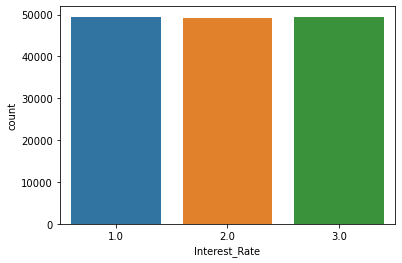

In [65]:
sns.countplot(ytrain)

In [66]:
cb=CatBoostClassifier(depth=6,iterations=500,learning_rate=0.1)
cb_model=cb.fit(xtrain,ytrain)

0:	learn: 1.0830494	total: 62.2ms	remaining: 31s
1:	learn: 1.0697233	total: 110ms	remaining: 27.3s
2:	learn: 1.0589427	total: 163ms	remaining: 27s
3:	learn: 1.0486528	total: 211ms	remaining: 26.2s
4:	learn: 1.0405407	total: 261ms	remaining: 25.9s
5:	learn: 1.0320633	total: 313ms	remaining: 25.7s
6:	learn: 1.0254588	total: 363ms	remaining: 25.6s
7:	learn: 1.0191676	total: 414ms	remaining: 25.4s
8:	learn: 1.0122877	total: 469ms	remaining: 25.6s
9:	learn: 1.0060793	total: 523ms	remaining: 25.6s
10:	learn: 1.0011456	total: 572ms	remaining: 25.4s
11:	learn: 0.9964585	total: 620ms	remaining: 25.2s
12:	learn: 0.9920507	total: 669ms	remaining: 25.1s
13:	learn: 0.9882320	total: 723ms	remaining: 25.1s
14:	learn: 0.9831895	total: 771ms	remaining: 24.9s
15:	learn: 0.9799406	total: 816ms	remaining: 24.7s
16:	learn: 0.9757739	total: 859ms	remaining: 24.4s
17:	learn: 0.9725901	total: 904ms	remaining: 24.2s
18:	learn: 0.9699666	total: 959ms	remaining: 24.3s
19:	learn: 0.9672138	total: 1s	remaining: 24

163:	learn: 0.8755403	total: 7.68s	remaining: 15.7s
164:	learn: 0.8751263	total: 7.73s	remaining: 15.7s
165:	learn: 0.8749529	total: 7.77s	remaining: 15.6s
166:	learn: 0.8745113	total: 7.81s	remaining: 15.6s
167:	learn: 0.8742908	total: 7.86s	remaining: 15.5s
168:	learn: 0.8739952	total: 7.9s	remaining: 15.5s
169:	learn: 0.8738879	total: 7.94s	remaining: 15.4s
170:	learn: 0.8737646	total: 7.98s	remaining: 15.4s
171:	learn: 0.8733722	total: 8.03s	remaining: 15.3s
172:	learn: 0.8731997	total: 8.07s	remaining: 15.3s
173:	learn: 0.8730783	total: 8.11s	remaining: 15.2s
174:	learn: 0.8728699	total: 8.16s	remaining: 15.2s
175:	learn: 0.8725200	total: 8.2s	remaining: 15.1s
176:	learn: 0.8720733	total: 8.24s	remaining: 15s
177:	learn: 0.8716444	total: 8.29s	remaining: 15s
178:	learn: 0.8714355	total: 8.33s	remaining: 14.9s
179:	learn: 0.8712002	total: 8.38s	remaining: 14.9s
180:	learn: 0.8710122	total: 8.42s	remaining: 14.8s
181:	learn: 0.8708951	total: 8.46s	remaining: 14.8s
182:	learn: 0.8707

324:	learn: 0.8461614	total: 14.8s	remaining: 7.97s
325:	learn: 0.8460941	total: 14.8s	remaining: 7.92s
326:	learn: 0.8459473	total: 14.9s	remaining: 7.88s
327:	learn: 0.8457909	total: 14.9s	remaining: 7.83s
328:	learn: 0.8457153	total: 15s	remaining: 7.78s
329:	learn: 0.8456185	total: 15s	remaining: 7.74s
330:	learn: 0.8454568	total: 15.1s	remaining: 7.69s
331:	learn: 0.8452096	total: 15.1s	remaining: 7.65s
332:	learn: 0.8451428	total: 15.2s	remaining: 7.6s
333:	learn: 0.8450657	total: 15.2s	remaining: 7.55s
334:	learn: 0.8449768	total: 15.2s	remaining: 7.5s
335:	learn: 0.8444963	total: 15.3s	remaining: 7.46s
336:	learn: 0.8443172	total: 15.3s	remaining: 7.41s
337:	learn: 0.8442209	total: 15.4s	remaining: 7.37s
338:	learn: 0.8441473	total: 15.4s	remaining: 7.32s
339:	learn: 0.8440121	total: 15.5s	remaining: 7.28s
340:	learn: 0.8439458	total: 15.5s	remaining: 7.23s
341:	learn: 0.8438541	total: 15.5s	remaining: 7.18s
342:	learn: 0.8437347	total: 15.6s	remaining: 7.14s
343:	learn: 0.8436

486:	learn: 0.8303072	total: 21.9s	remaining: 586ms
487:	learn: 0.8301789	total: 22s	remaining: 541ms
488:	learn: 0.8301122	total: 22s	remaining: 496ms
489:	learn: 0.8300495	total: 22.1s	remaining: 451ms
490:	learn: 0.8299563	total: 22.1s	remaining: 406ms
491:	learn: 0.8298877	total: 22.2s	remaining: 361ms
492:	learn: 0.8298291	total: 22.2s	remaining: 315ms
493:	learn: 0.8298036	total: 22.3s	remaining: 270ms
494:	learn: 0.8297507	total: 22.3s	remaining: 225ms
495:	learn: 0.8296787	total: 22.3s	remaining: 180ms
496:	learn: 0.8295959	total: 22.4s	remaining: 135ms
497:	learn: 0.8295239	total: 22.4s	remaining: 90.2ms
498:	learn: 0.8294239	total: 22.5s	remaining: 45.1ms
499:	learn: 0.8292479	total: 22.5s	remaining: 0us


In [67]:
print(classification_report(ytrain,cb_model.predict(xtrain)))
print(classification_report(ytest,cb_model.predict(xtest)))

              precision    recall  f1-score   support

         1.0       0.70      0.65      0.67     49478
         2.0       0.52      0.58      0.55     49272
         3.0       0.60      0.58      0.59     49468

    accuracy                           0.60    148218
   macro avg       0.61      0.60      0.60    148218
weighted avg       0.61      0.60      0.61    148218

              precision    recall  f1-score   support

         1.0       0.69      0.64      0.66     21102
         2.0       0.50      0.56      0.53     21308
         3.0       0.58      0.56      0.57     21112

    accuracy                           0.59     63522
   macro avg       0.59      0.59      0.59     63522
weighted avg       0.59      0.59      0.59     63522



### Inference -
So include the result of smote at the end 
even though dataset has sufficient number of records for each class, 
smote has shown an improved performance.. 
Hence we require additional features to extract out the variability of the dependent variable

However, "we require additional features to extract out the variability of the dependent variable" implies that the existing features may not be capturing all the relevant information for predicting the dependent variable. This could be due to several reasons such as missing information, irrelevant or redundant features, or non-linear relationships between the features and the dependent variable. In such cases, it may be useful to explore alternative feature engineering techniques or consider collecting additional data to improve the predictive power of the models.

Overall, the improved performance of the models after applying SMOTE suggests that the dataset may have class imbalance, and addressing class imbalance can be an important step in improving the performance of the models. However, it is important to note that SMOTE alone may not be sufficient, and it is important to explore other techniques such as feature engineering, model selection, and hyperparameter tuning to further improve the performance of the models.